In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn

In [6]:
df = pd.read_csv("D11-02.csv")

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (229,234) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [7]:
    drop_features = [u'idncase', u'idnproceeding',u'comp_date',u'eoirattyid', u'alienattyid',
                     u'flag_mismatch_base_city', u'flag_mismatch_hearing',u'min_osc_date',
                     u'max_osc_date', u'min_input_date', u'max_input_date', u'flag_unknowntime',
                     u'flag_unknownorderwithinday',u'order_raw',u'comp_dow',u'grantraw',u'L1grant2',
                     u'L2grant2',u'lojudgemeanyear', u'lojudgemeannatyear', u'lojudgemeannatdefyear',
                     u'difmeanyear', u'difmeannatyear', u'difmeannatdefyear', u'absdifmeanyear', 
                     u'absdifmeannatyear', u'absdifmeannatdefyear', u'outliermeanyear', u'outliermeannatyear', 
                     u'outliermeannatdefyear', u'negoutliermeanyear', u'negoutliermeannatyear',u'moderategrantrawnatdef',
                     u'Gender', u'DateofAppointment',u'famcode', u'ij_court_code',u'FirstName', u'LastName',
                     u'FirstUndergrad', u'Judge_name_SLR', u'judge_name_caps', u'OtherLocationsMentioned',
                     u'Year_College_SLR', u'courtid', u'ij_code']
    #  drop famcode and ij_court_code because there are too many of them. drop ij_code, FirstName,LastName,Judge_name_SLR and judge_name_caps
    #  because they are redundant with IJ_NAME; drop courtid because it is redundant with Court_SLR, drop Year_College_SLR
    #  because it is equal to YearofFirstUndergradGraduatio
    label_column = u'grant'
    profile_columns = [u'hearing_loc_code', u'lawyer', u'defensive', u'natid', u'written',
                       u'flag_decisionerror_strdes', u'flag_decisionerror_idncaseproc', u'adj_time_start',
                       u'flag_earlystarttime', u'numinfamily',
                       u'numfamsperslot',u'year', u'meangrant_judge', u'numdecisions_judge', u'lomeangrant_judge',
                       u'meangrantraw_judge', u'numdecisionsraw_judge', u'lomeangrantraw_judge', u'moderategrant3070', 
                       u'moderategrantraw3070',u'numdecisions_judgenat', u'lomeangrant_judgenat', u'meangrantraw_judgenat',
                       u'numdecisionsraw_judgenat', u'lomeangrantraw_judgenat', u'meangrant_judgedef', 
                       u'numdecisions_judgedef', u'lomeangrant_judgedef', u'meangrantraw_judgedef', 
                       u'numdecisionsraw_judgedef', u'lomeangrantraw_judgedef', u'meangrant_judgenatdef', 
                       u'numdecisions_judgenatdef', u'lomeangrant_judgenatdef', u'meangrantraw_judgenatdef',
                       u'numdecisionsraw_judgenatdef', u'lomeangrantraw_judgenatdef', u'meangrant_judgelawyer',
                       u'numdecisions_judgelawyer', u'lomeangrant_judgelawyer', u'meangrantraw_judgelawyer', 
                       u'numdecisionsraw_judgelawyer', u'lomeangrantraw_judgelawyer', u'natcourtcode', u'natdefcode',
                       u'natdefcourtcode', u'samenat', u'haseoir', u'samedefensive', u'morning', u'lunchtime', 
                       u'afternoon', u'numcases_judgeday', u'numcases_judge', u'numcases_court', u'numcases_court_hearing',
                       u'avgnumanycasesperday', u'avgnumasylumcasesperday', u'avgnumpeopleperday', u'avgnumfamsperday',
                       u'JudgeUndergradLocation', u'LawSchool',
                       u'JudgeLawSchoolLocation', u'Bar', u'IJ_NAME',
                       u'Male_judge', u'Court_SLR', u'Year_Appointed_SLR', 
                       u'YearofFirstUndergradGraduatio', u'Year_Law_school_SLR',
                       u'President_SLR', u'Government_Years_SLR', u'Govt_nonINS_SLR', u'INS_Years_SLR', 
                       u'INS_Every5Years_SLR', u'Military_Years_SLR', u'NGO_Years_SLR', u'Privateprac_Years_SLR', 
                       u'Academia_Years_SLR', u'experience',u'log_experience', u'log_gov_experience',
                       u'log_INS_experience', u'log_military_experience', u'log_private_experience', 
                       u'log_academic_experience', u'govD', u'INSD', u'militaryD', u'privateD', u'academicD',
                       u'democrat', u'republican',u'hour_start']
    
    previous_columns = [u'numanycasesperday', u'flag_multiple_proceedings', u'flag_notfirstproceeding',
                        u'flag_multiple_proceedings2',u'flag_notfirstproceeding2', u'flag_prevprocgrant',
                        u'flag_prevprocdeny', u'numasylumcasesperday',u'numpeopleperday', u'orderwithinday',
                        u'lastindayD', u'L1grant', u'L1grant_sameday', u'L2grant', u'L2grant_sameday',u'numgrant_prev5',
                        u'numgrant_prev6', u'numgrant_prev7', u'numgrant_prev8', u'numgrant_prev9', u'numgrant_prev10',
                        u'prev5_dayslapse', u'prev6_dayslapse', u'prev7_dayslapse', u'prev8_dayslapse', u'prev9_dayslapse',
                        u'prev10_dayslapse', u'raw_order_court', u'numcourtgrant_prev5', u'numcourtgrantself_prev5', 
                        u'numcourtdecideself_prev5', u'numcourtgrant_prev6', u'numcourtdecideself_prev6', 
                        u'numcourtgrantself_prev6', u'numcourtgrant_prev7', u'numcourtdecideself_prev7', 
                        u'numcourtgrantself_prev7', u'numcourtgrant_prev8', u'numcourtdecideself_prev8', 
                        u'numcourtgrantself_prev8', u'numcourtgrant_prev9', u'numcourtdecideself_prev9', 
                        u'numcourtgrantself_prev9', u'numcourtgrant_prev10', u'numcourtdecideself_prev10', 
                        u'numcourtgrantself_prev10', u'numcourtgrant_prev11', u'numcourtdecideself_prev11', 
                        u'numcourtgrantself_prev11', u'numcourtgrant_prev12', u'numcourtdecideself_prev12', 
                        u'numcourtgrantself_prev12', u'numcourtgrant_prev13', u'numcourtdecideself_prev13', 
                        u'numcourtgrantself_prev13', u'numcourtgrant_prev14', u'numcourtdecideself_prev14',
                        u'numcourtgrantself_prev14', u'numcourtgrant_prev15', u'numcourtdecideself_prev15', 
                        u'numcourtgrantself_prev15', u'numcourtgrant_prev16', u'numcourtdecideself_prev16',
                        u'numcourtgrant_prev17', u'numcourtdecideself_prev17', u'numcourtgrantself_prev17', 
                        u'numcourtgrant_prev18', u'numcourtdecideself_prev18', u'numcourtgrantself_prev18', 
                        u'numcourtgrant_prev19', u'numcourtdecideself_prev19', u'numcourtgrantself_prev19', 
                        u'numcourtgrant_prev20', u'numcourtdecideself_prev20', u'numcourtgrantself_prev20', 
                        u'courtprev5_dayslapse', u'courtprev6_dayslapse', u'courtprev7_dayslapse', 
                        u'courtprev8_dayslapse', u'courtprev9_dayslapse', u'courtprev10_dayslapse', 
                        u'courtprev11_dayslapse', u'courtprev12_dayslapse', u'courtprev13_dayslapse', 
                        u'courtprev14_dayslapse', u'courtprev15_dayslapse', u'courtprev16_dayslapse',
                        u'courtprev17_dayslapse', u'courtprev18_dayslapse', u'courtprev19_dayslapse', 
                        u'courtprev20_dayslapse', u'numcourtgrantother_prev5', u'courtprevother5_dayslapse', 
                        u'numcourtgrantother_prev6', u'courtprevother6_dayslapse', u'numcourtgrantother_prev7', 
                        u'courtprevother7_dayslapse', u'numcourtgrantother_prev8', u'courtprevother8_dayslapse', 
                        u'numcourtgrantother_prev9', u'courtprevother9_dayslapse', u'numcourtgrantother_prev10', 
                        u'courtprevother10_dayslapse', u'courtmeanyear', u'courtmeannatyear', 
                        u'courtmeannatdefyear', u'judgemeanyear', u'judgemeannatyear', u'judgemeannatdefyear', 
                        u'judgenumdecyear', u'judgenumdecnatyear', u'judgenumdecnatdefyear',u'grantgrant', 
                        u'grantdeny', u'denygrant', u'denydeny']

    df = df.drop(drop_features,axis=1)
    df = df[pd.notnull(df[label_column])]
    
    # balance the two labels
    df_label_0 = df[df[label_column]==0]
    df_label_1 = df[df[label_column]==1]

    n = min(3000,len(df_label_1))
    df = pd.concat([df_label_0.loc[np.random.choice(df_label_0.index, n, replace=False)],
                    df_label_1.loc[np.random.choice(df_label_1.index, n, replace=False)]])


    df_prof = df[profile_columns]
    df_prev = df[previous_columns]
    df_label = df[label_column]
    
    prof_cate_columns = ['hearing_loc_code','natid',
            'year','hour_start','JudgeUndergradLocation',
            'LawSchool','JudgeLawSchoolLocation','Bar','IJ_NAME',
            'Court_SLR','Year_Appointed_SLR','YearofFirstUndergradGraduatio',
            'Year_Law_school_SLR','President_SLR']

In [8]:
prof_other = list(set(profile_columns)-set(prof_cate_columns))

/Library/Python/2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


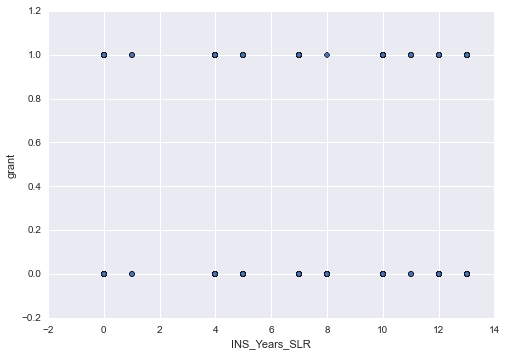

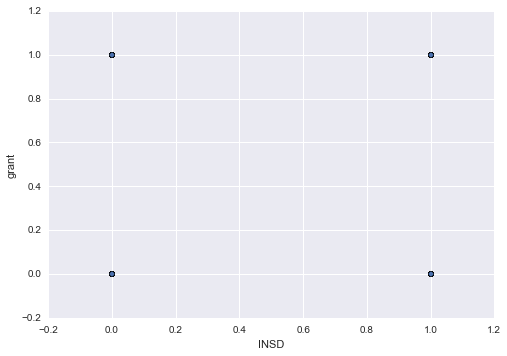

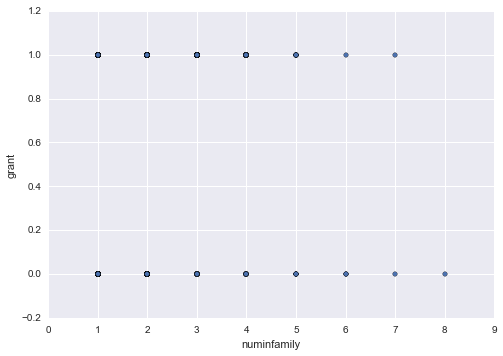

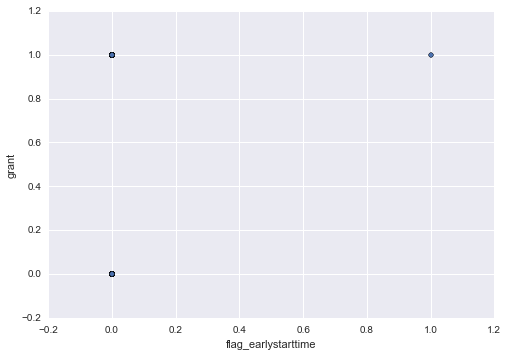

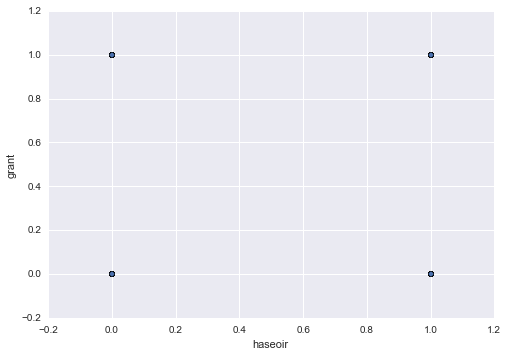

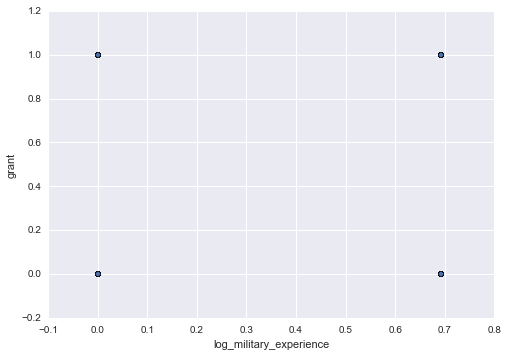

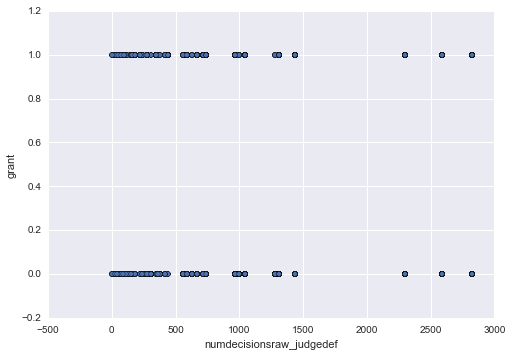

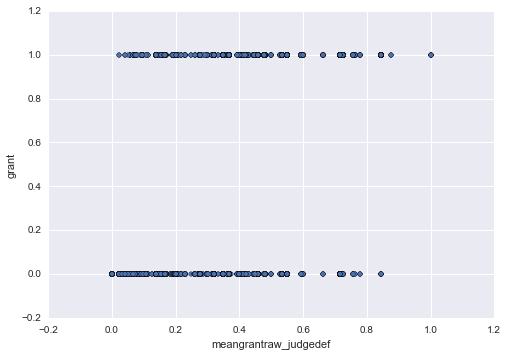

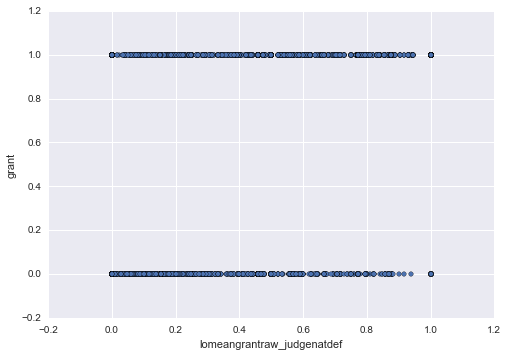

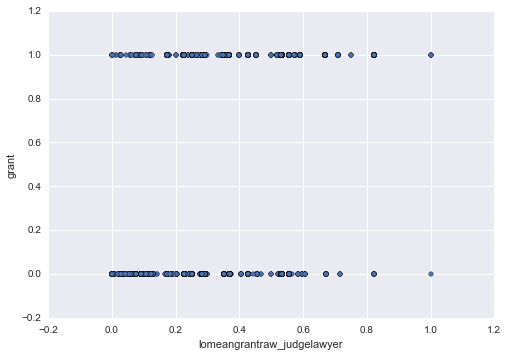

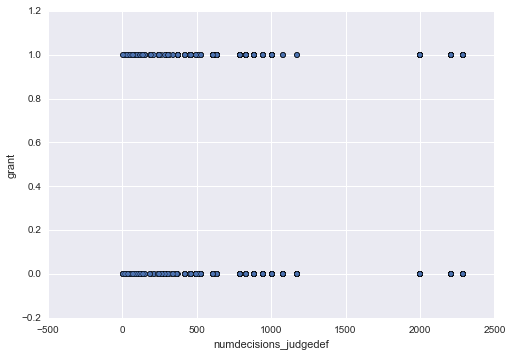

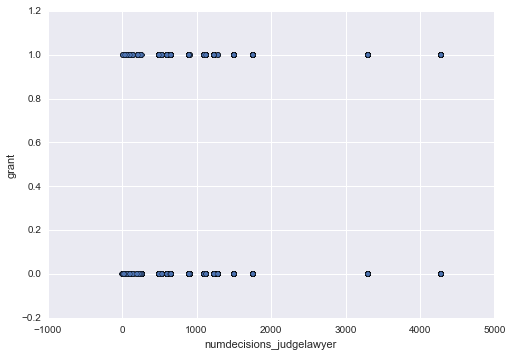

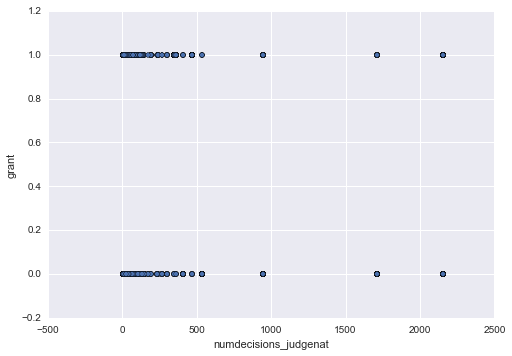

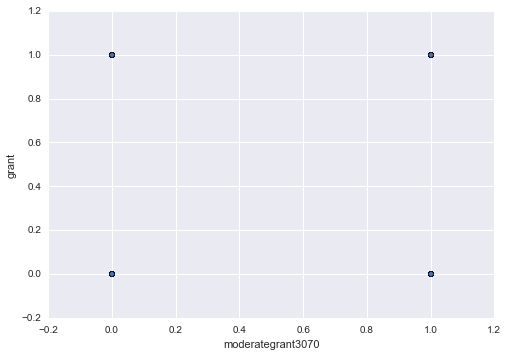

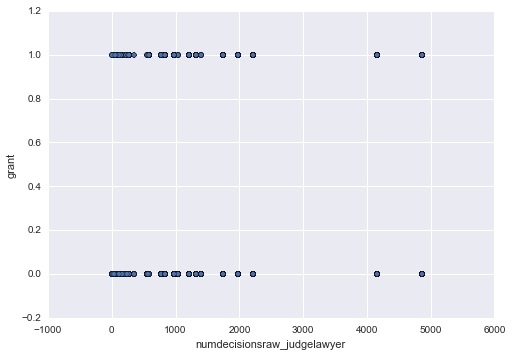

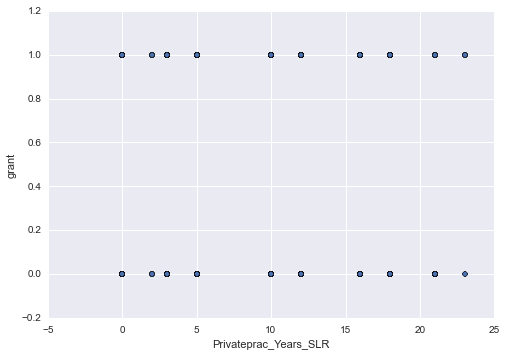

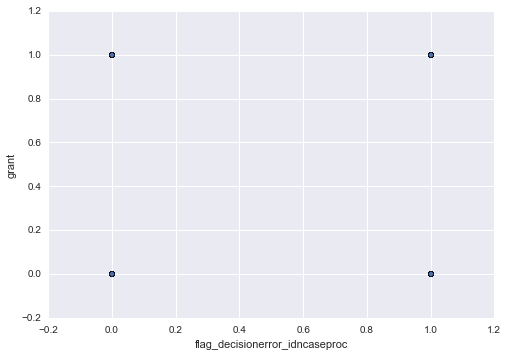

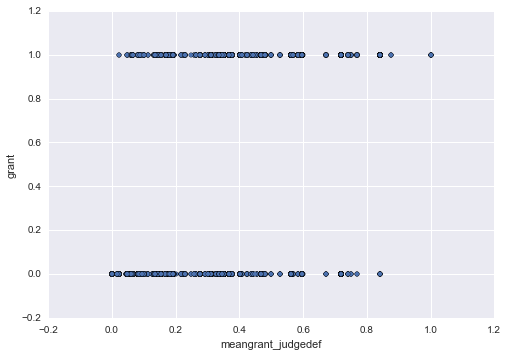

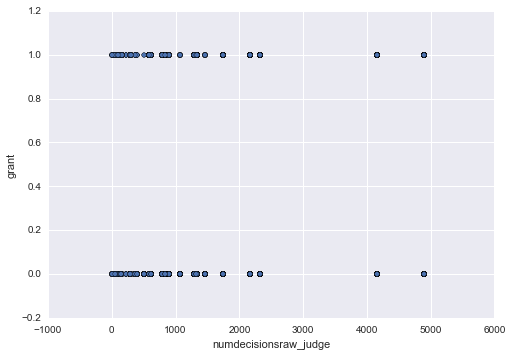

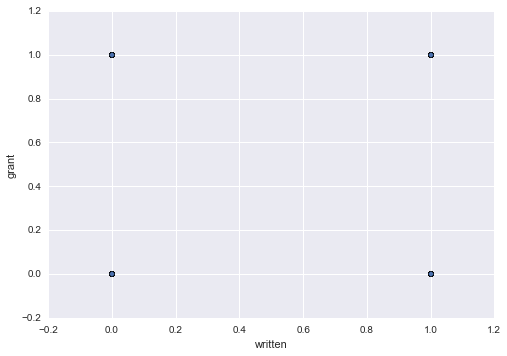

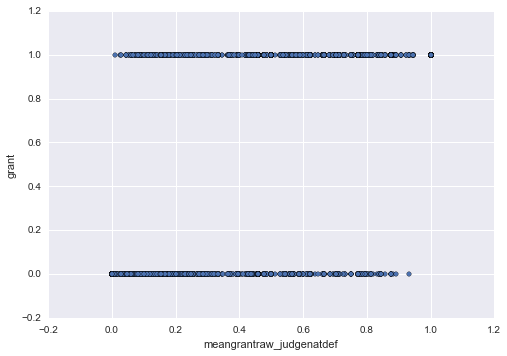

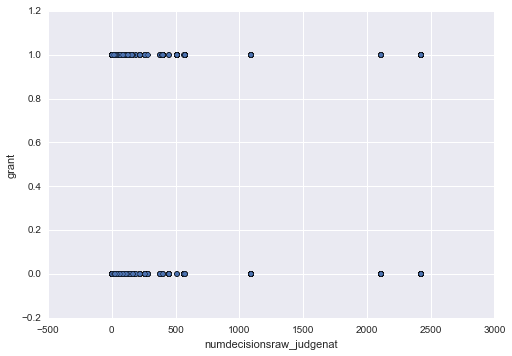

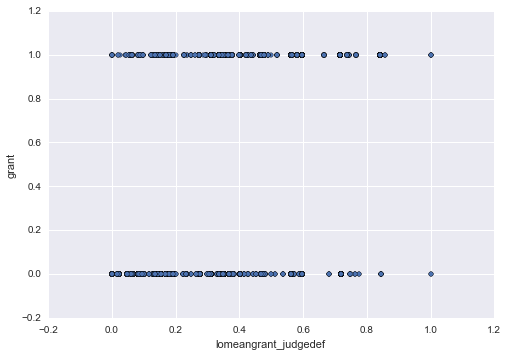

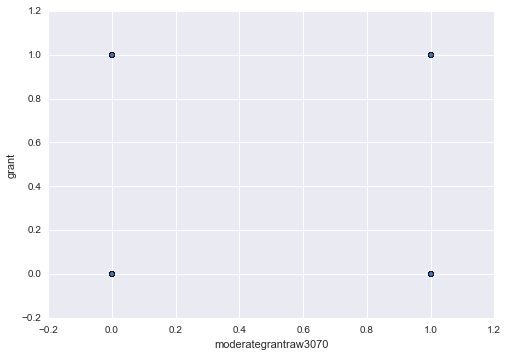

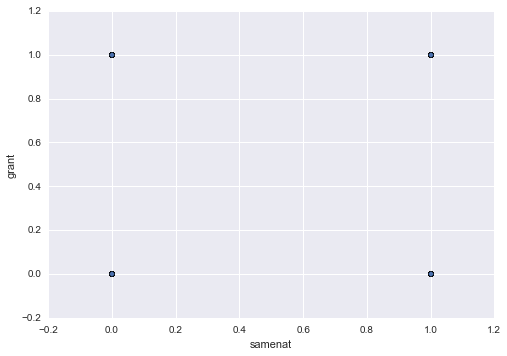

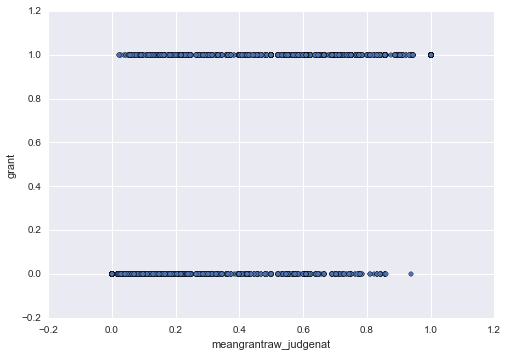

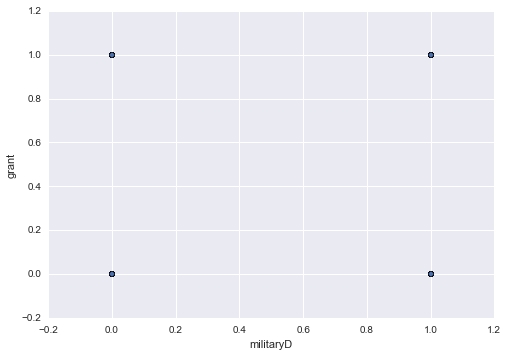

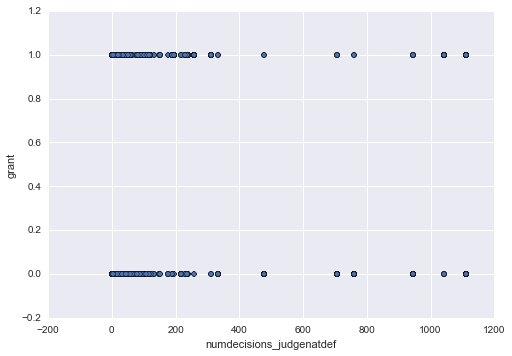

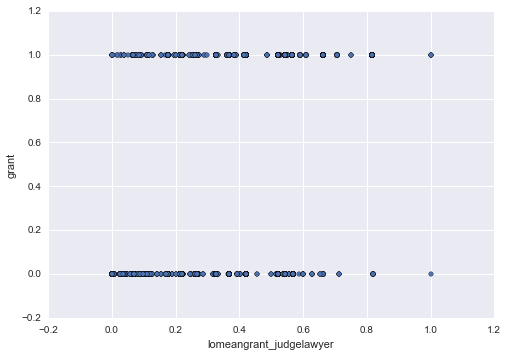

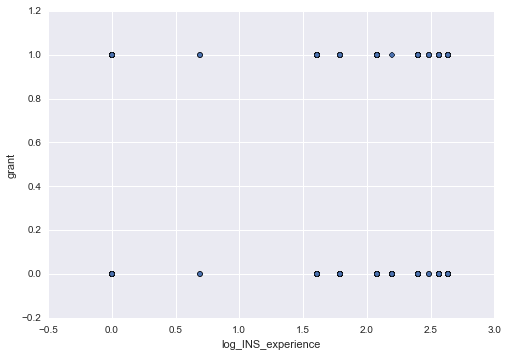

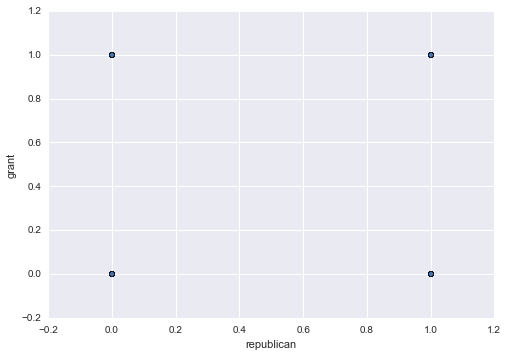

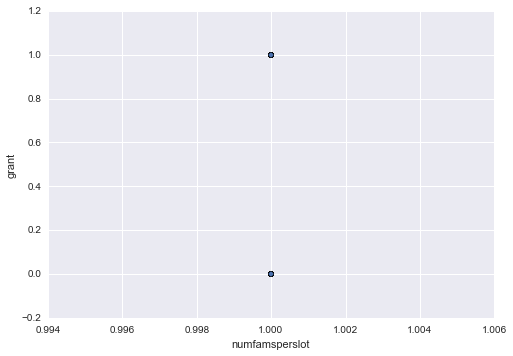

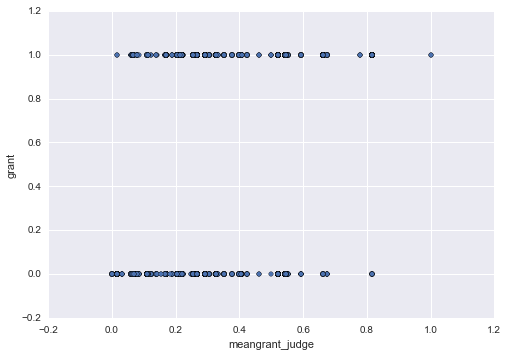

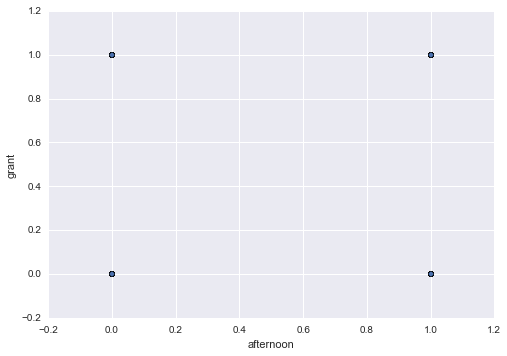

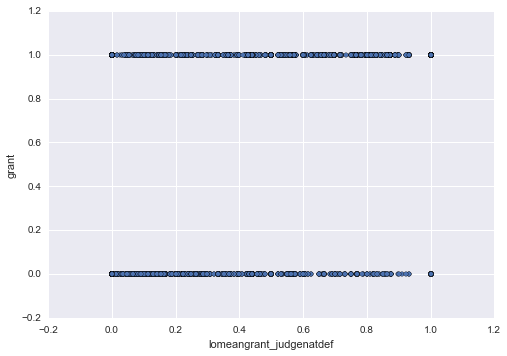

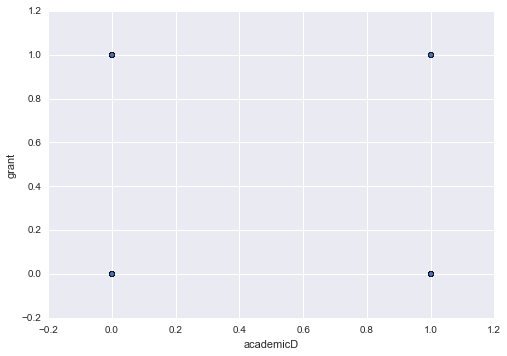

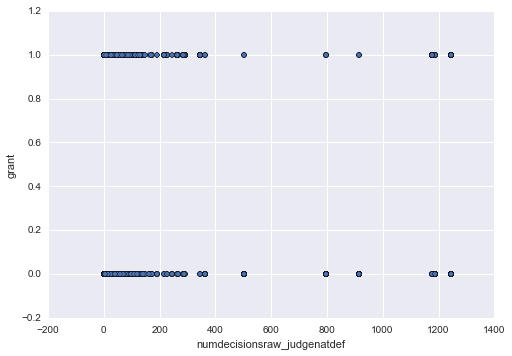

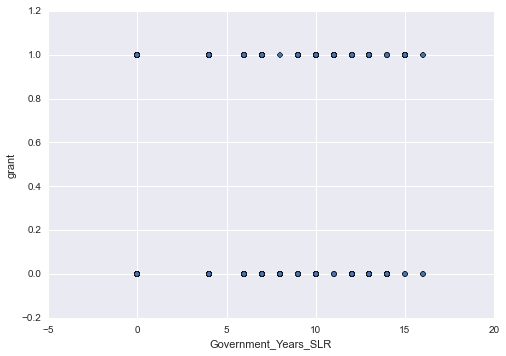

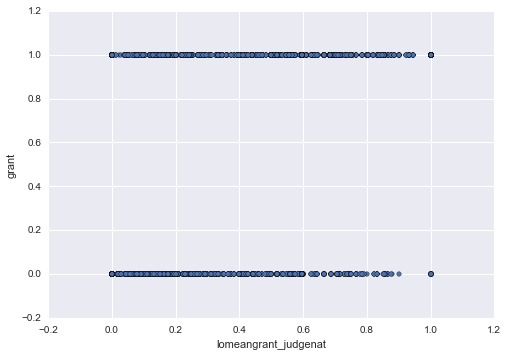

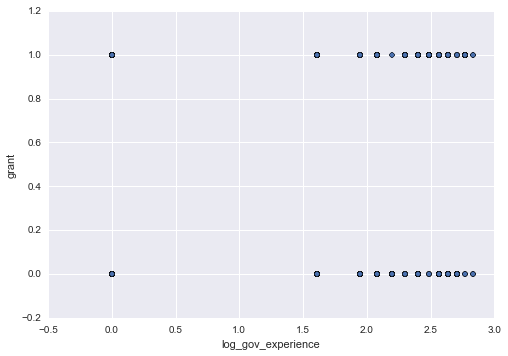

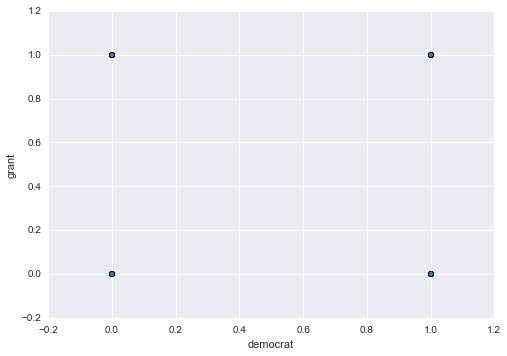

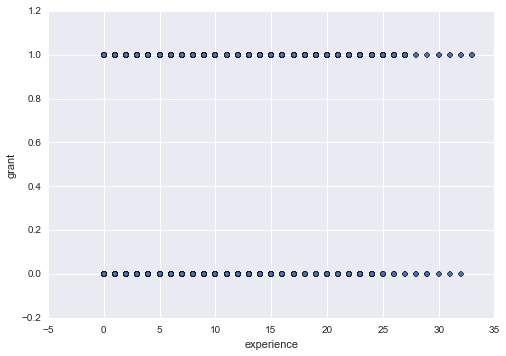

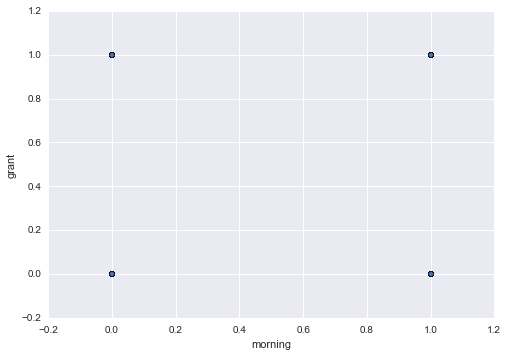

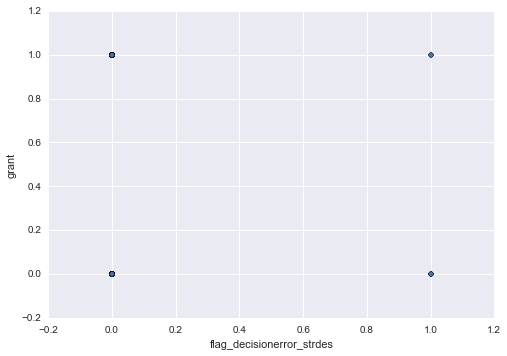

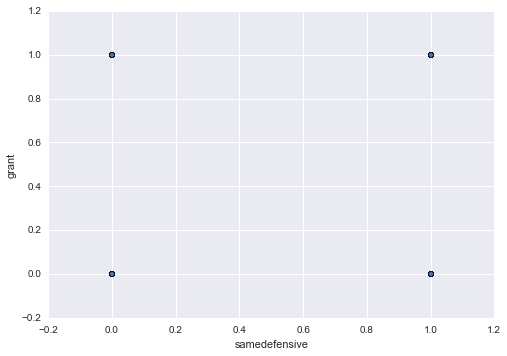

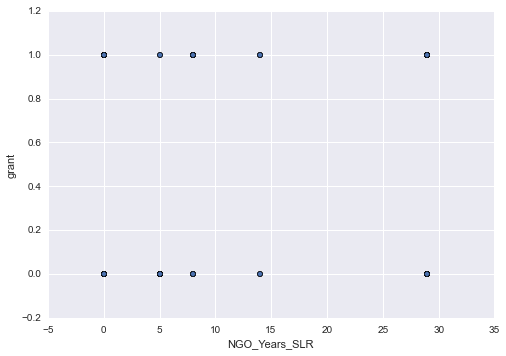

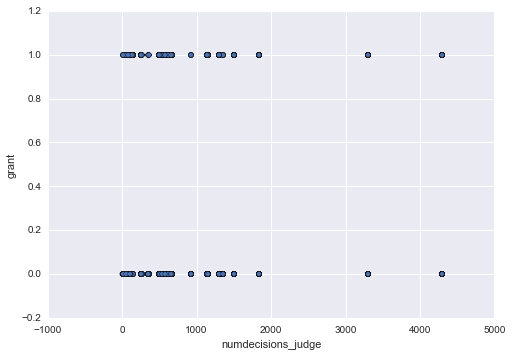

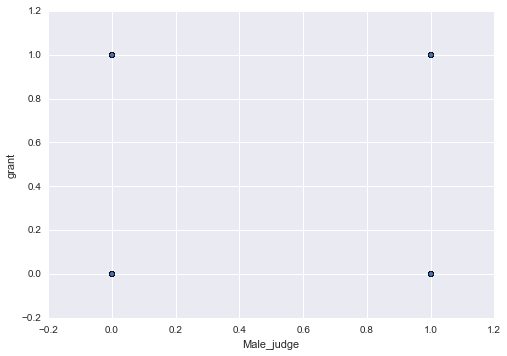

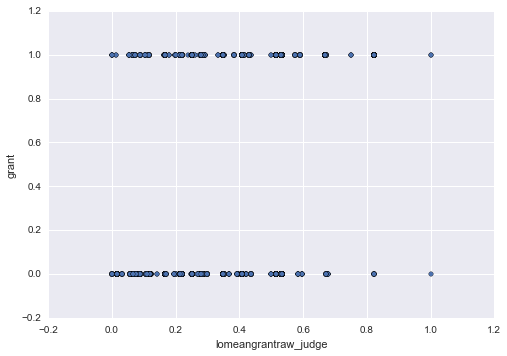

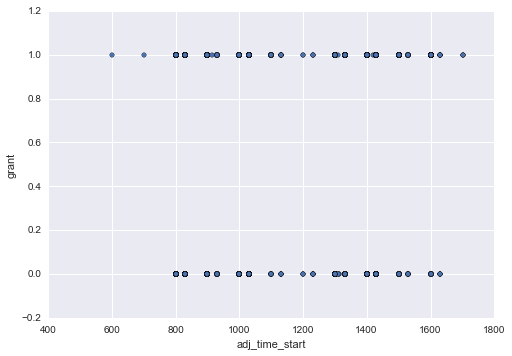

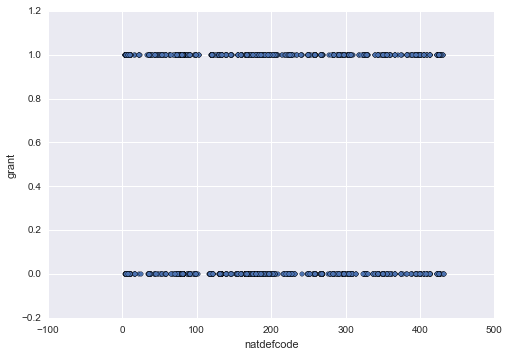

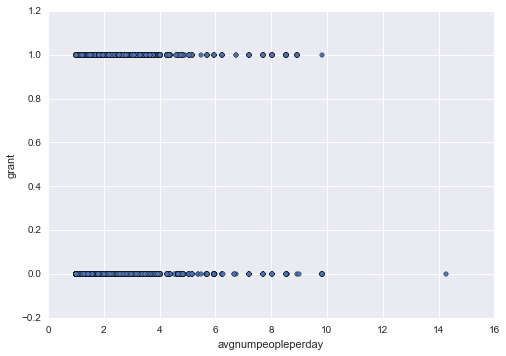

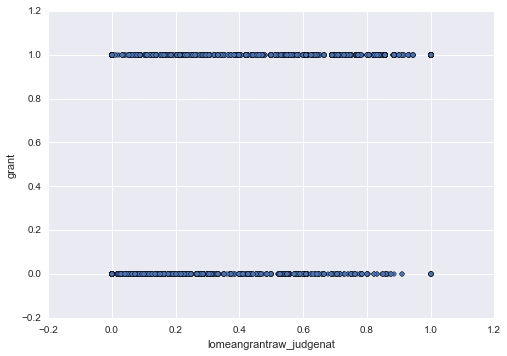

In [9]:
for i in range(len(prof_other)):
    df_plot = df[['grant',prof_other[i]]]
    df_plot.plot(kind='scatter', x=prof_other[i], y='grant')

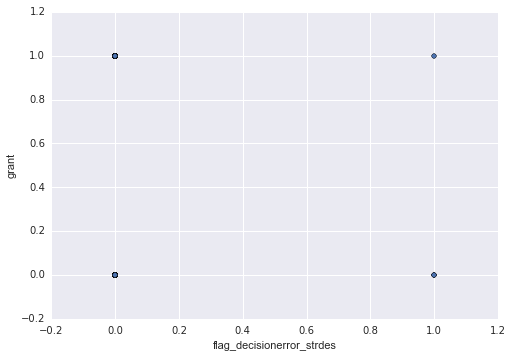

In [33]:
df_plot = df[['grant','flag_decisionerror_strdes']]
df_plot.plot(kind='scatter', x='flag_decisionerror_strdes', y='grant')

In [10]:
from sklearn.feature_extraction import DictVectorizer as DV
cat_df_prof = df_prof[prof_cate_columns]
cat_dict_prof = cat_df_prof.T.to_dict().values()

# select the columns which are categorical
cat_df_prof = df_prof[prof_cate_columns]

#convert numerical to string
cat_df_prof = cat_df_prof.applymap(str)

# dataframe to dictionary
cat_dict_prof = cat_df_prof.T.to_dict().values()

vec = DV(sparse=False)

#dummy array
cat_array_prof = vec.fit_transform(cat_dict_prof)

# convert back to dataframe
cat_df_prof_after = pd.DataFrame(cat_array_prof)

# set column name and index
dummy_columns = vec.get_feature_names()
cat_df_prof_after.columns = dummy_columns
cat_df_prof_after.index = df_prof.index

# replace the categorical columns with the dummy columns
df_prof_no_dummy = df_prof.drop(prof_cate_columns,axis=1)
df_prof = df_prof.drop(prof_cate_columns,axis=1)
df_prof = df_prof.join(cat_df_prof_after)
len(dummy_columns)    

442

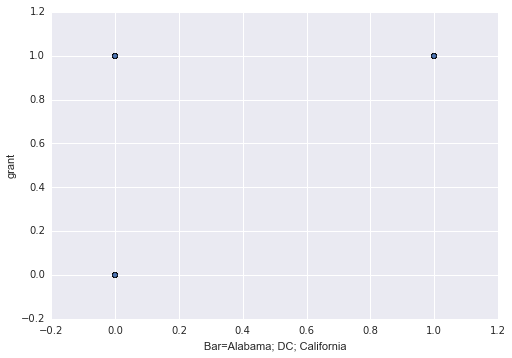

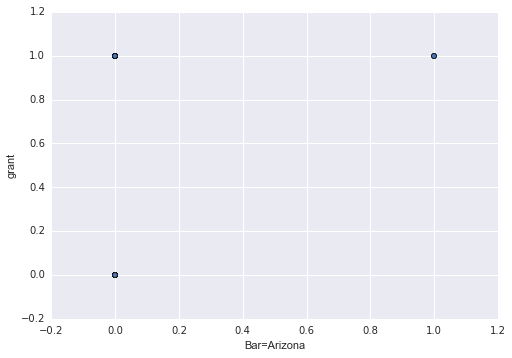

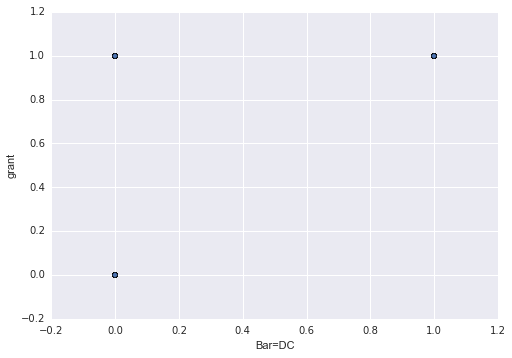

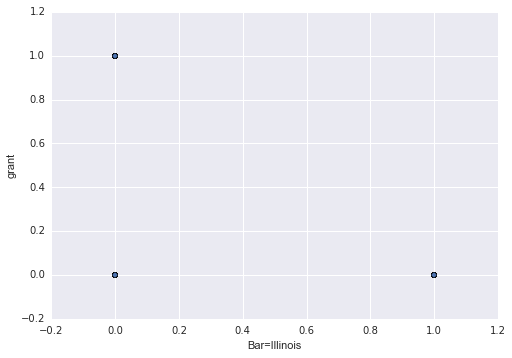

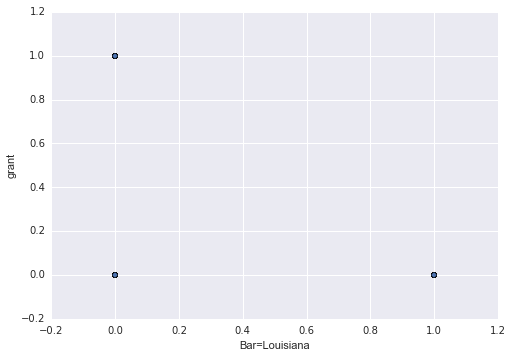

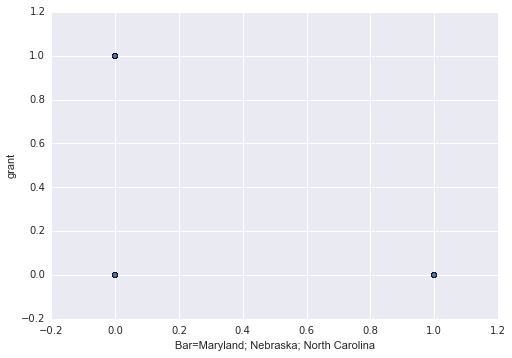

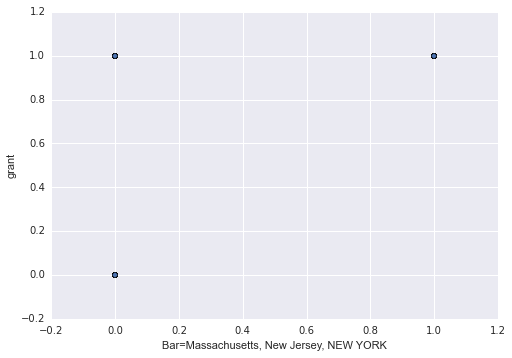

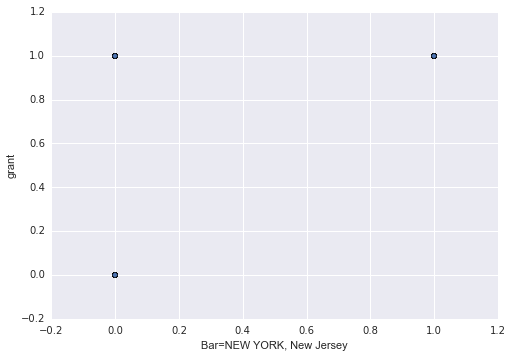

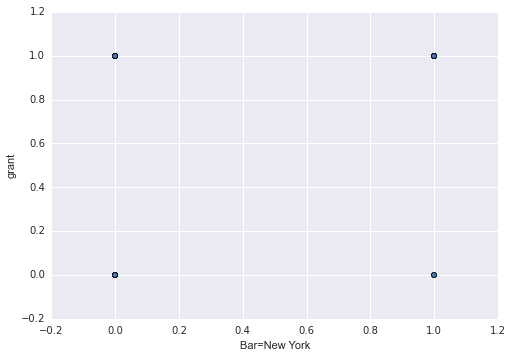

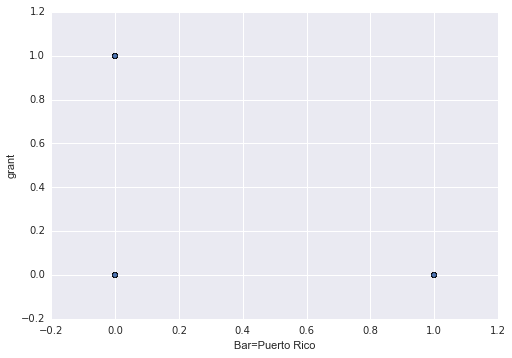

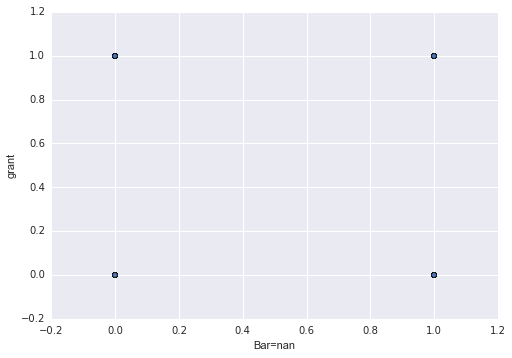

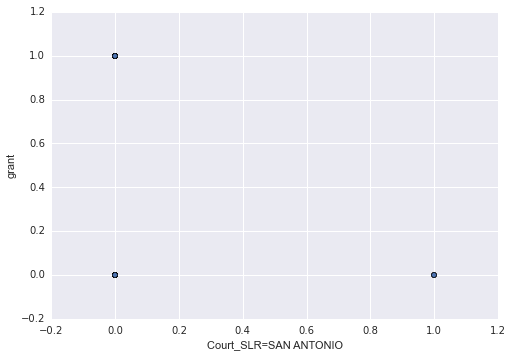

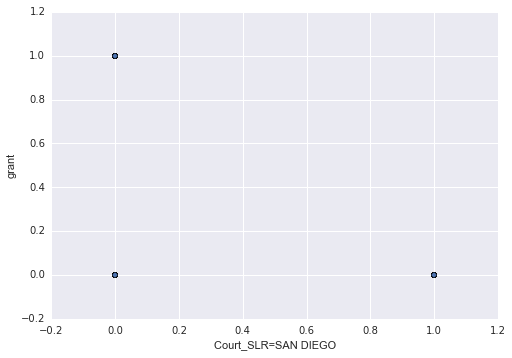

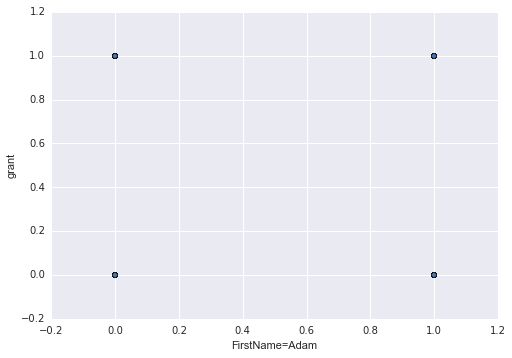

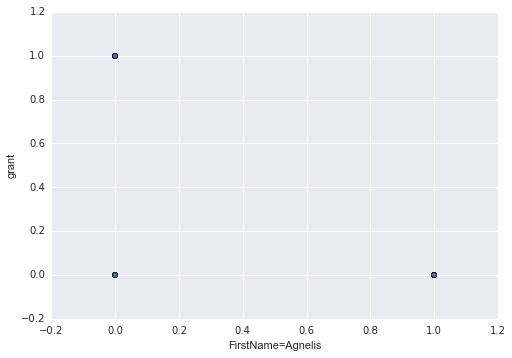

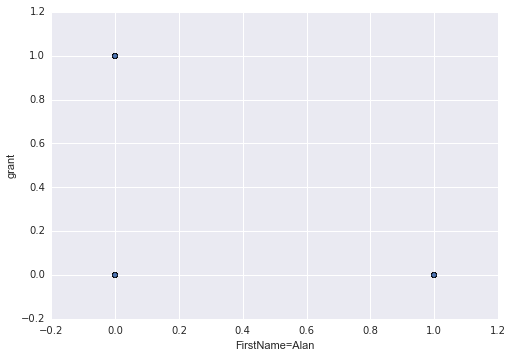

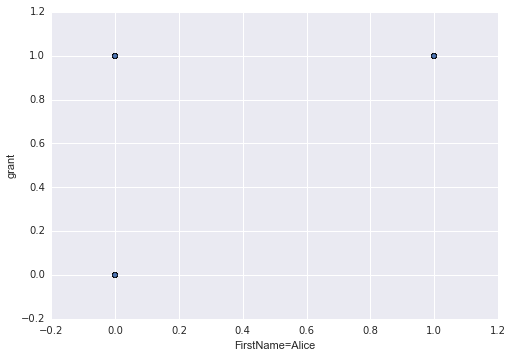

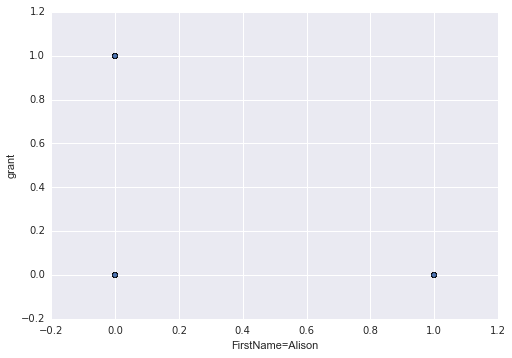

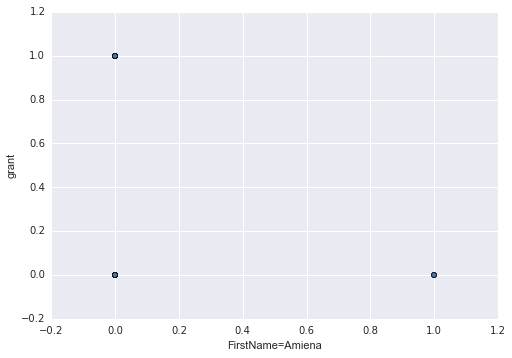

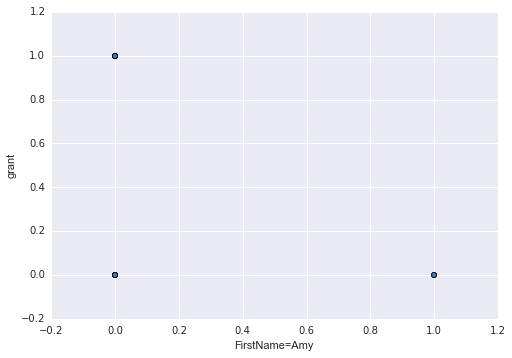

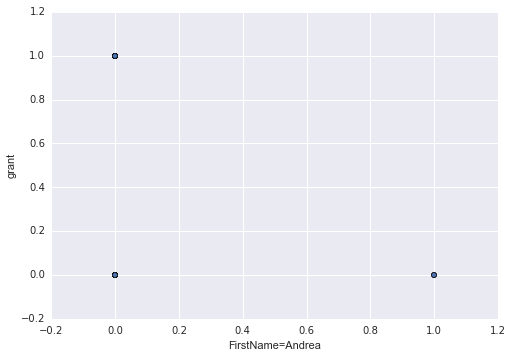

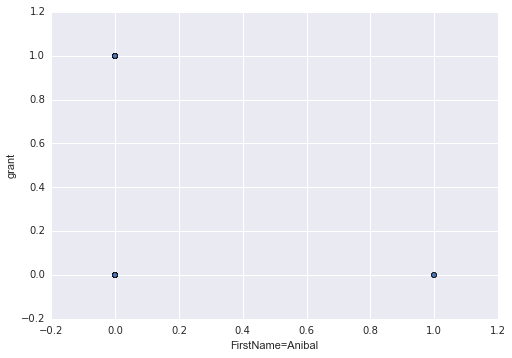

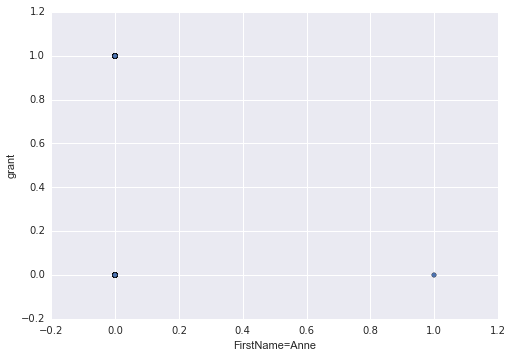

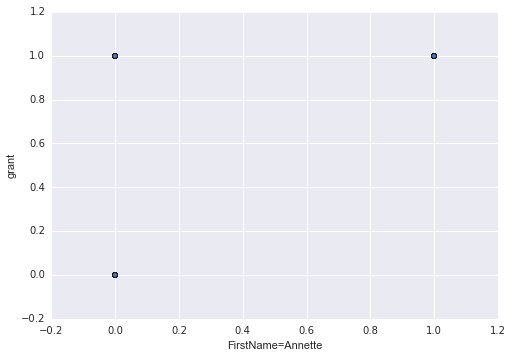

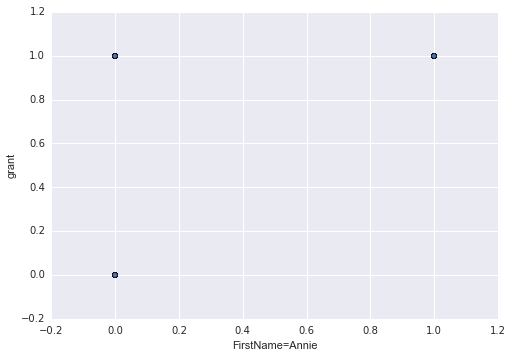

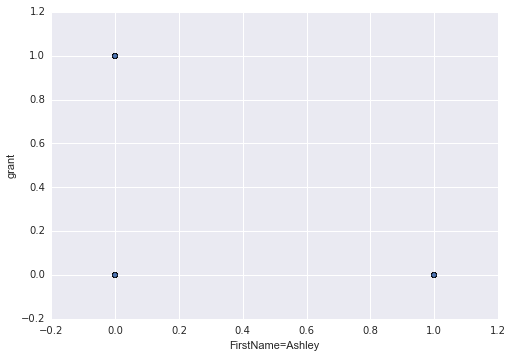

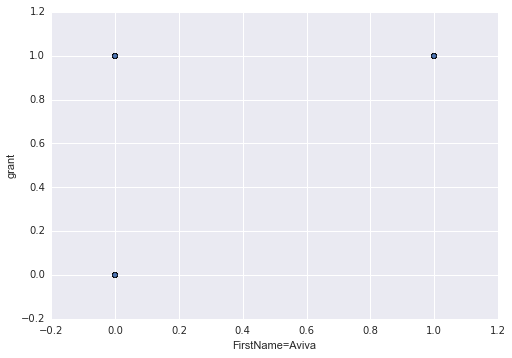

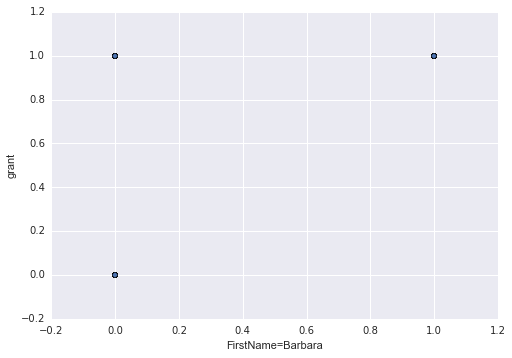

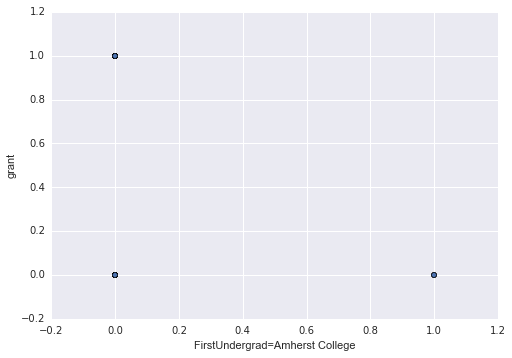

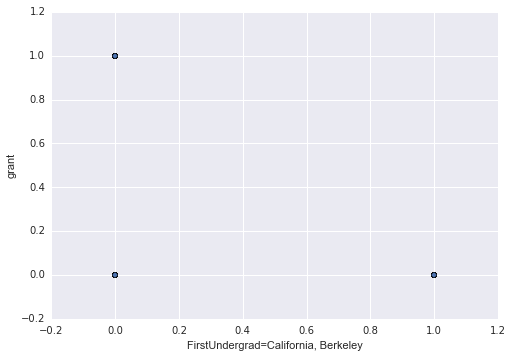

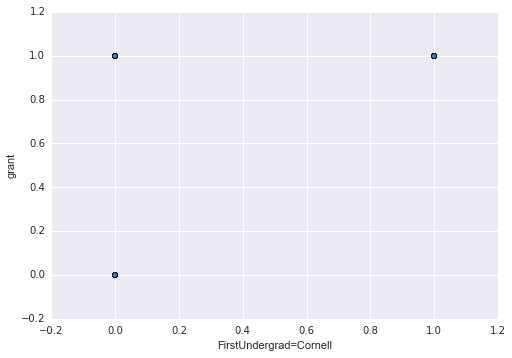

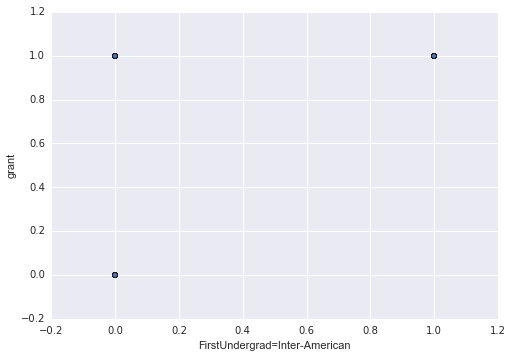

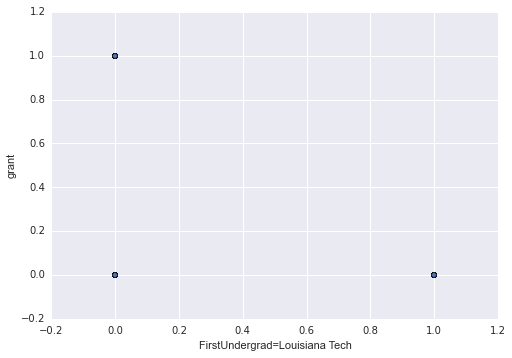

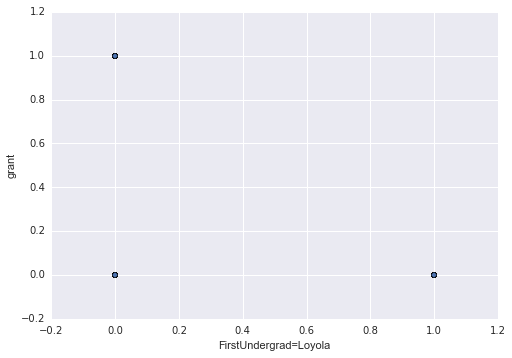

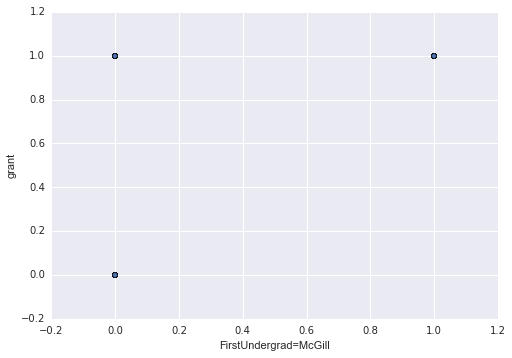

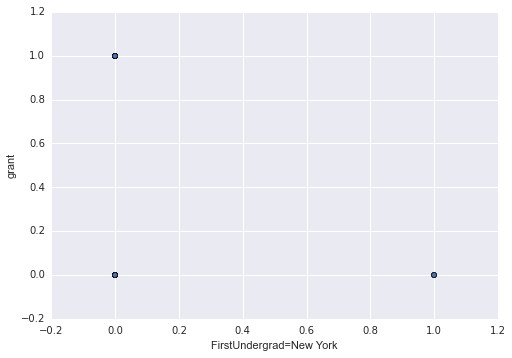

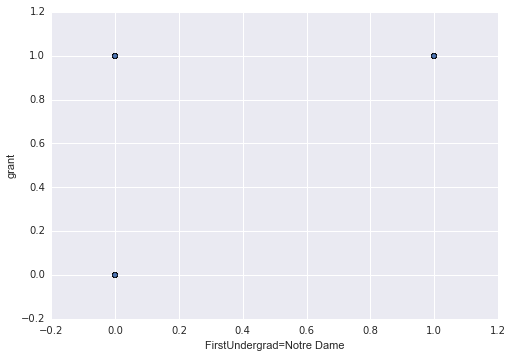

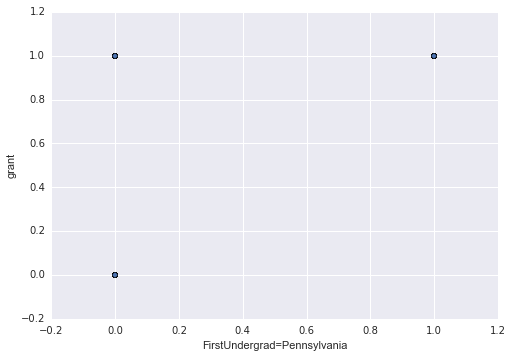

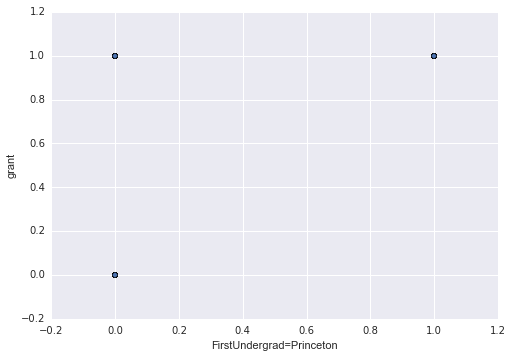

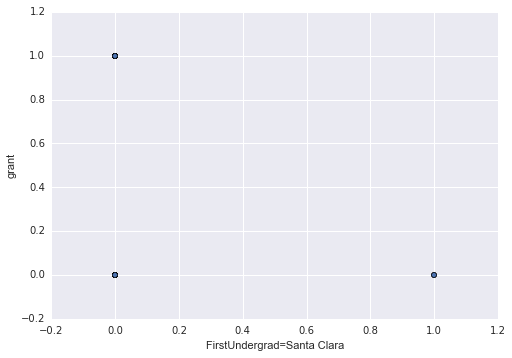

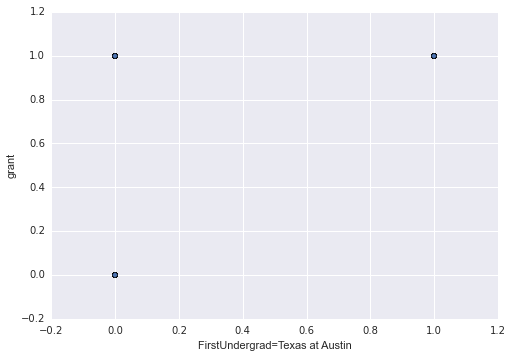

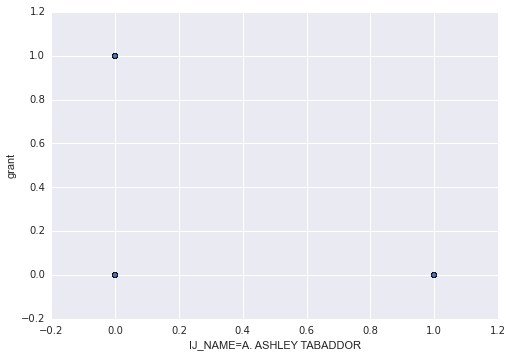

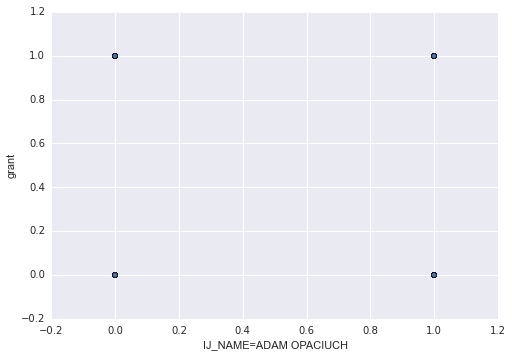

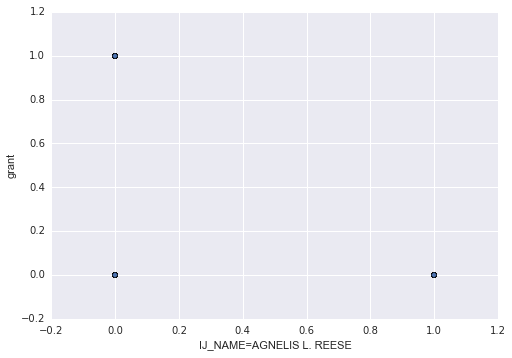

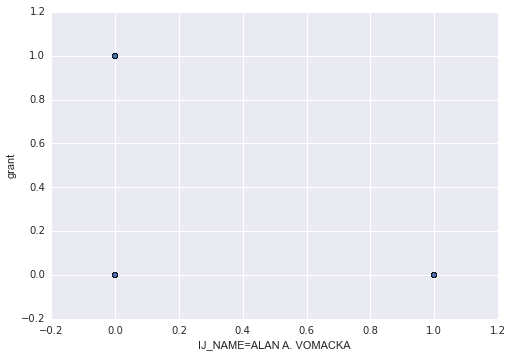

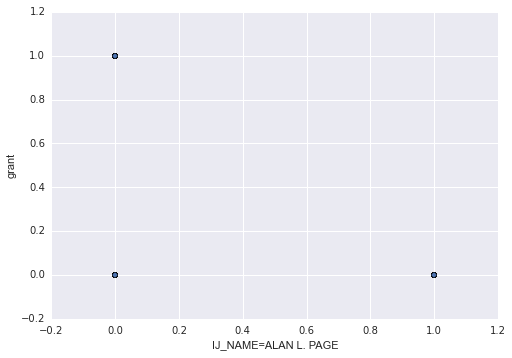

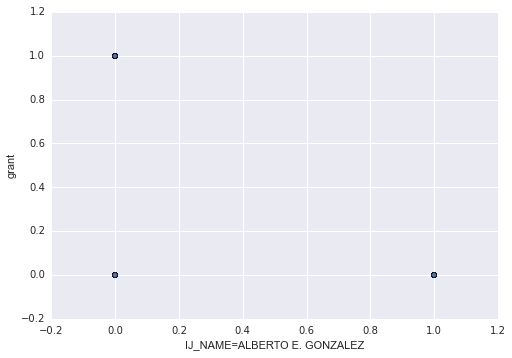

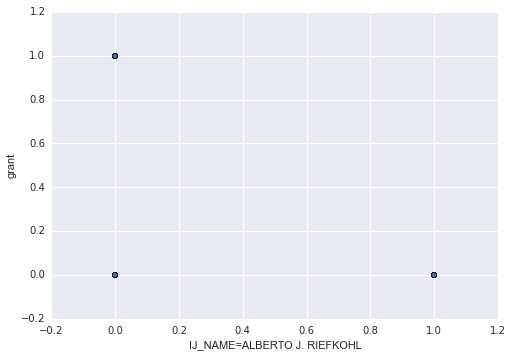

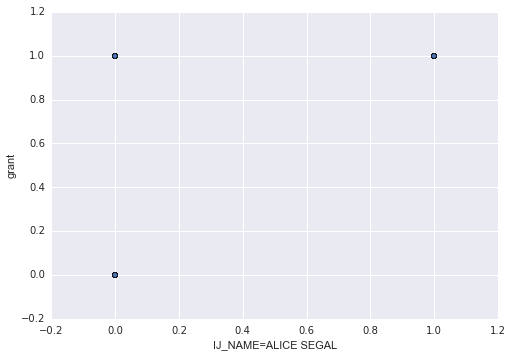

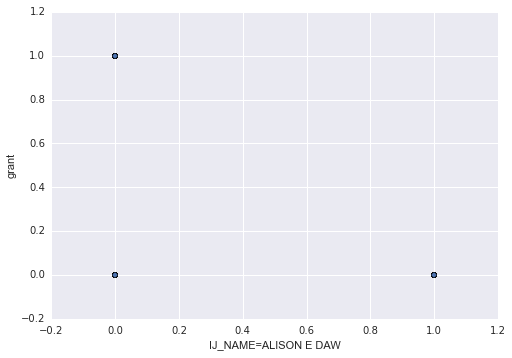

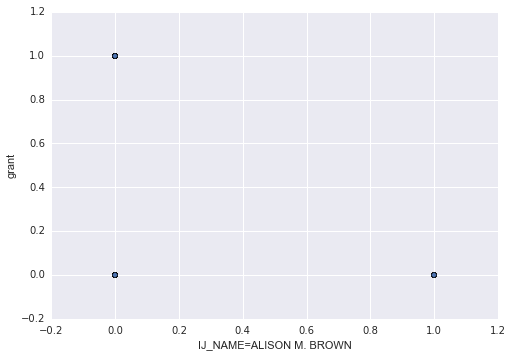

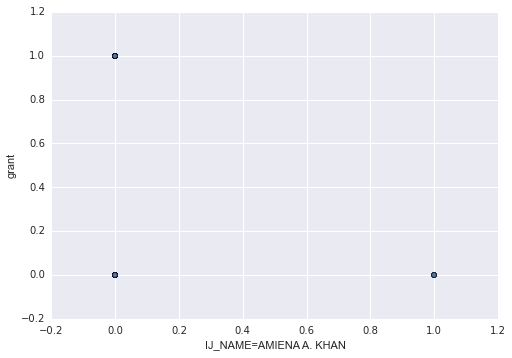

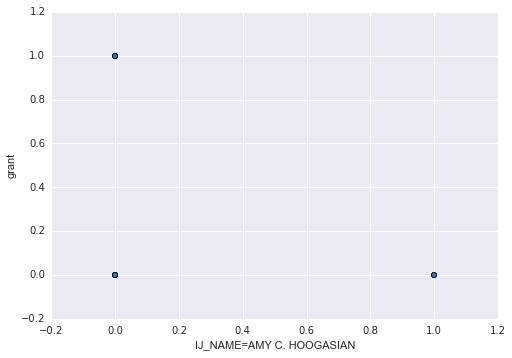

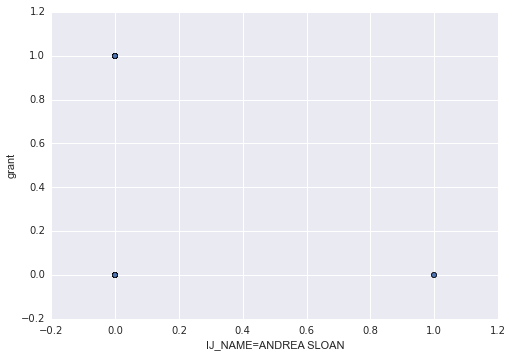

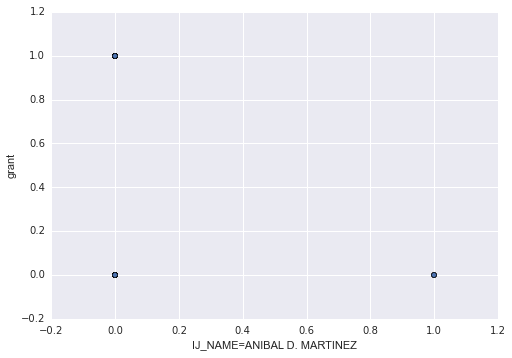

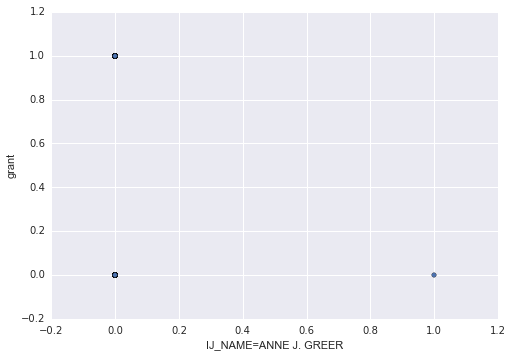

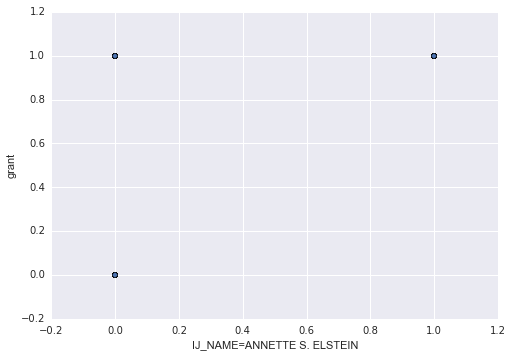

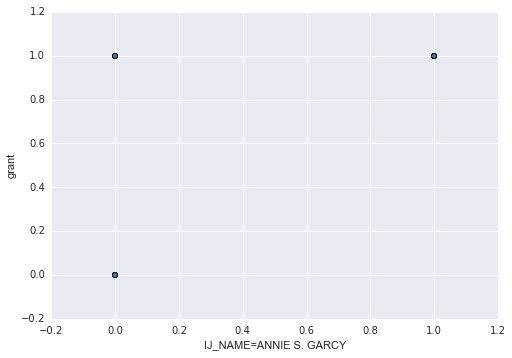

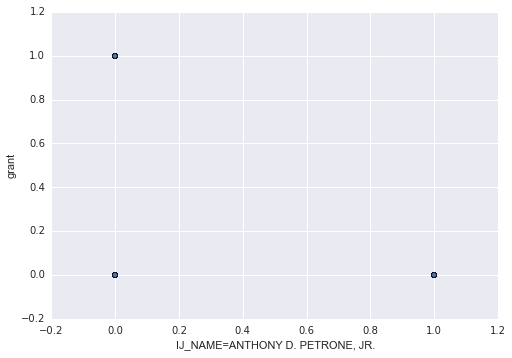

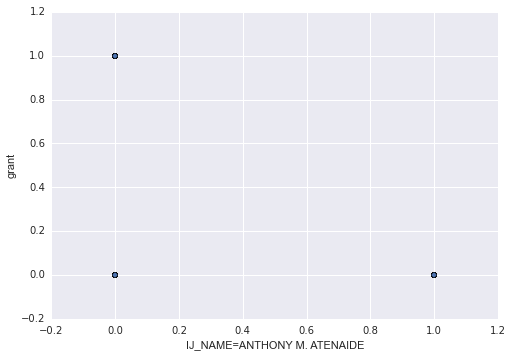

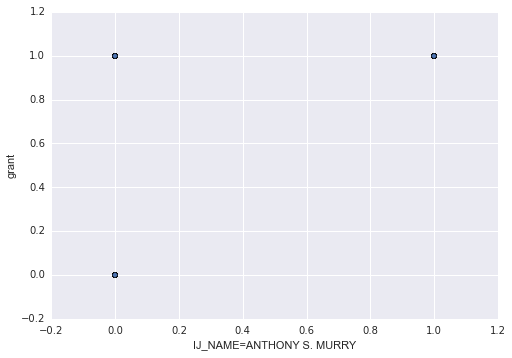

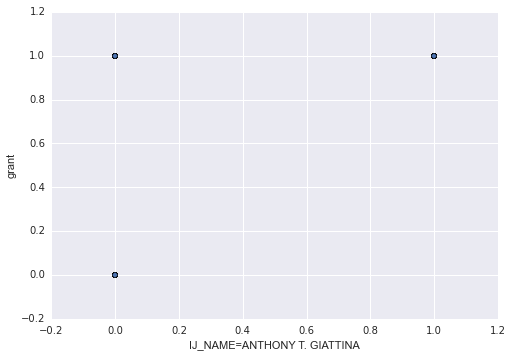

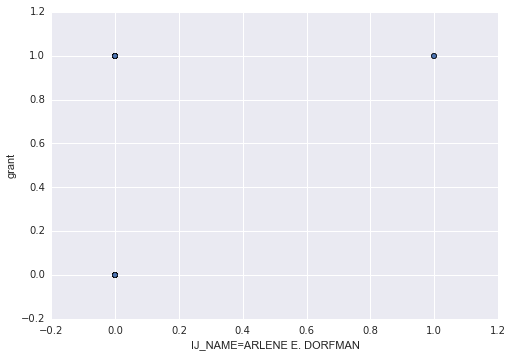

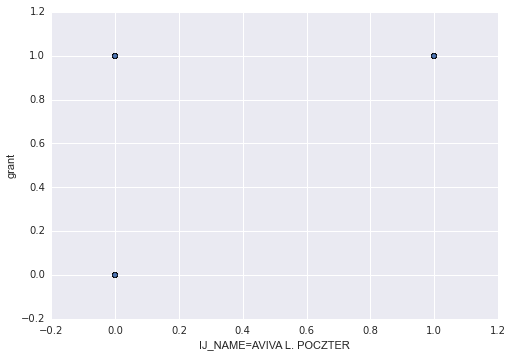

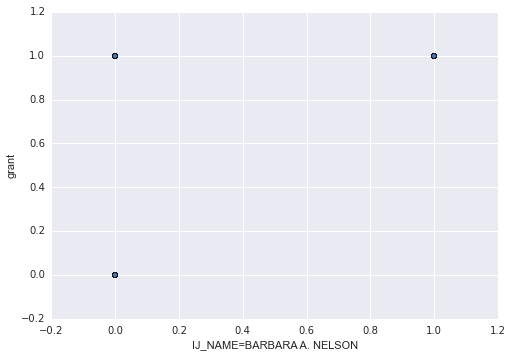

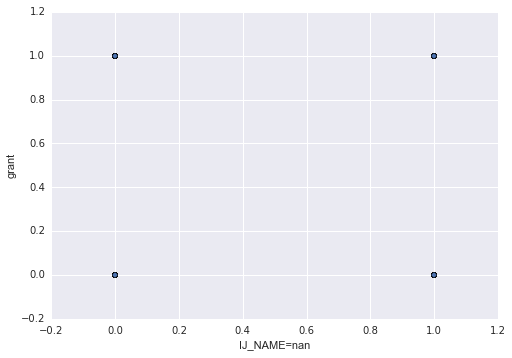

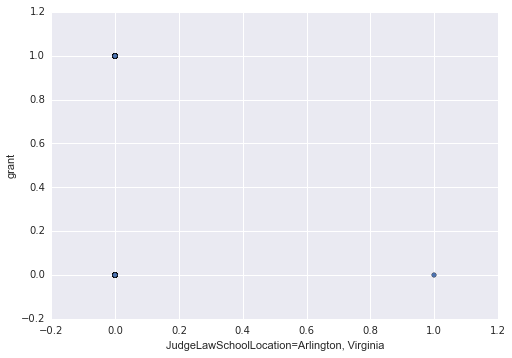

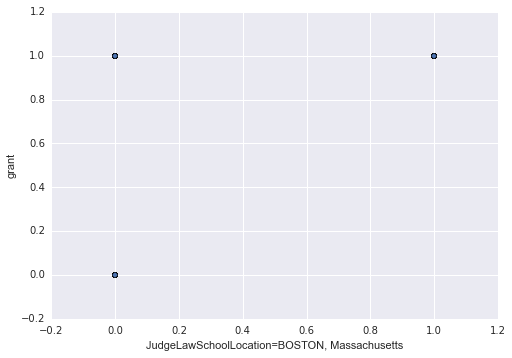

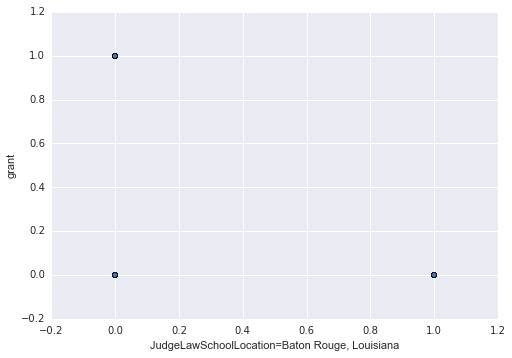

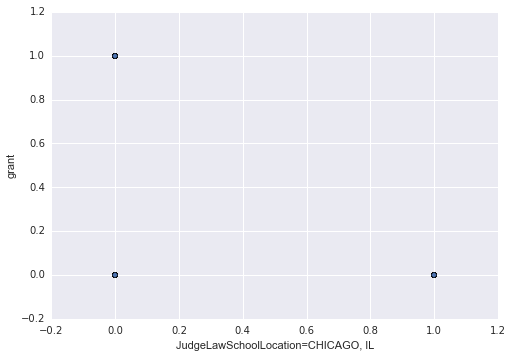

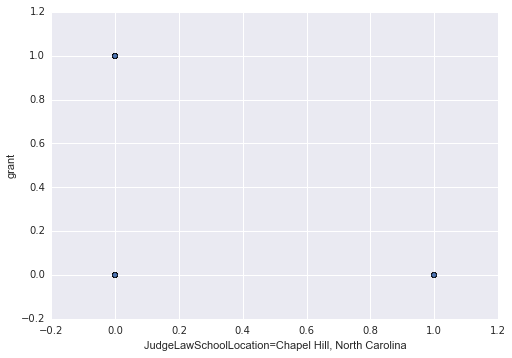

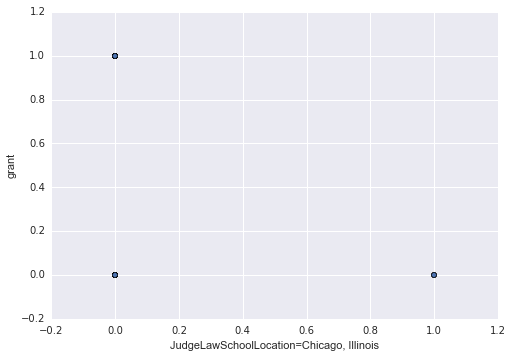

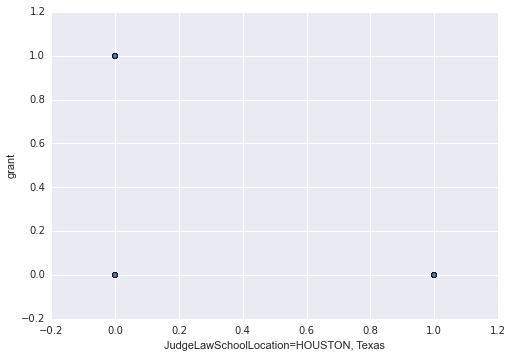

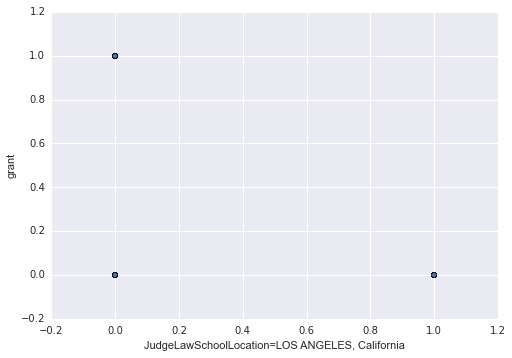

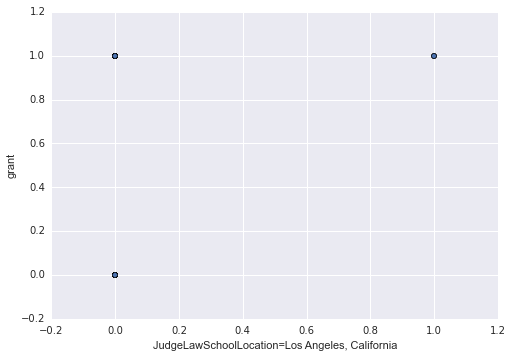

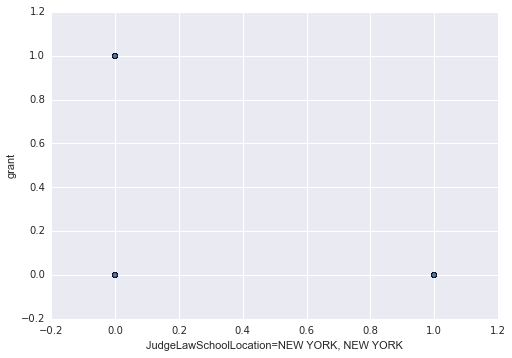

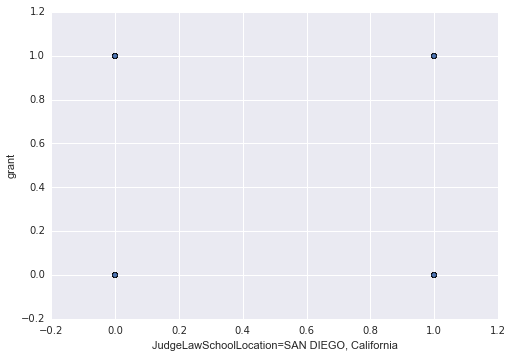

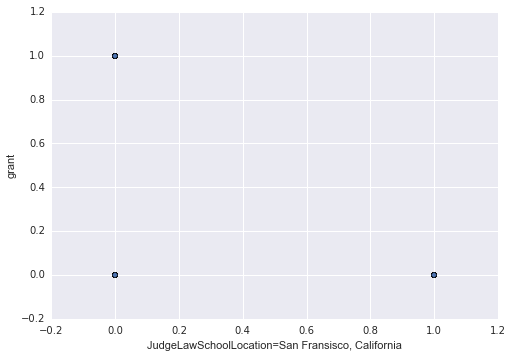

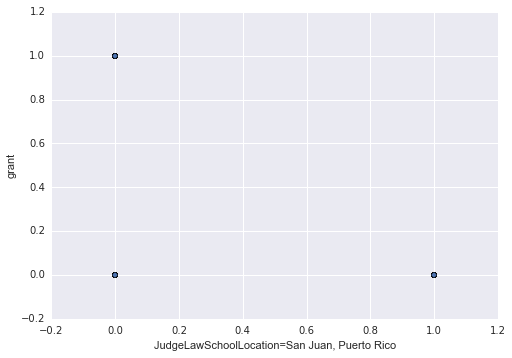

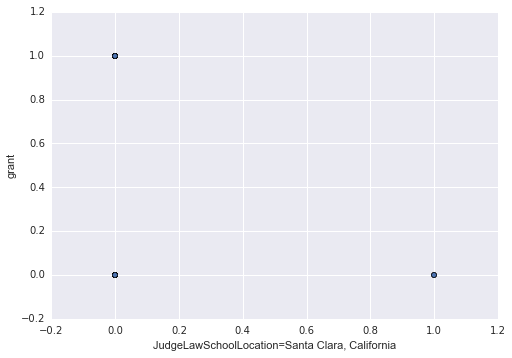

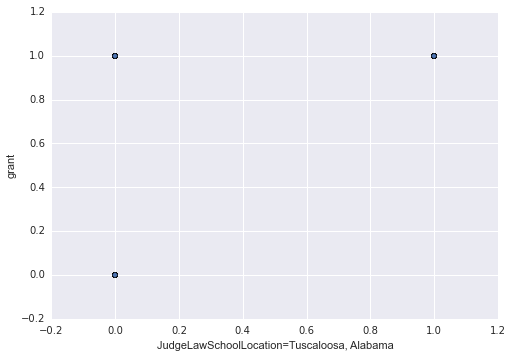

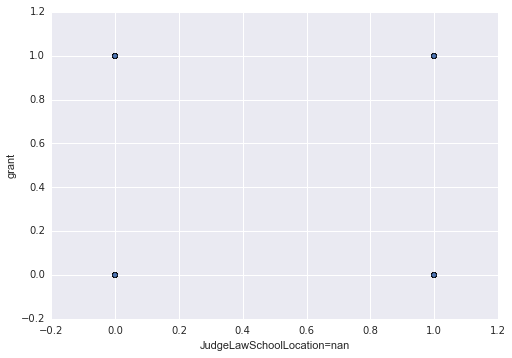

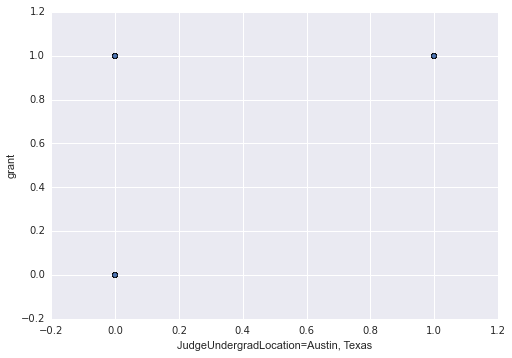

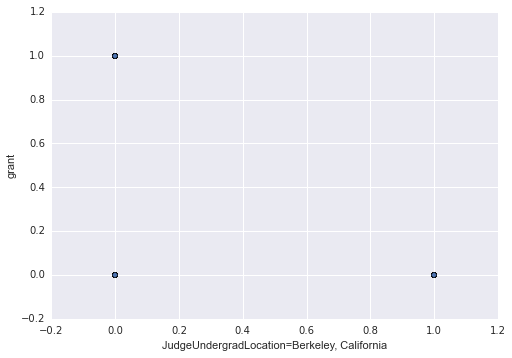

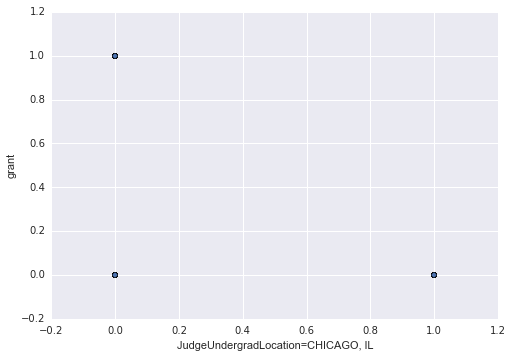

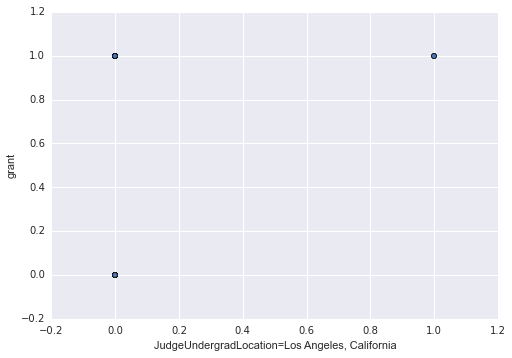

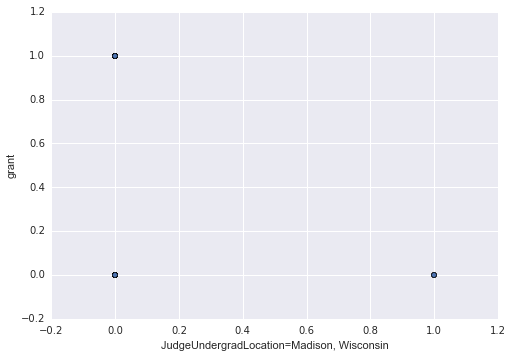

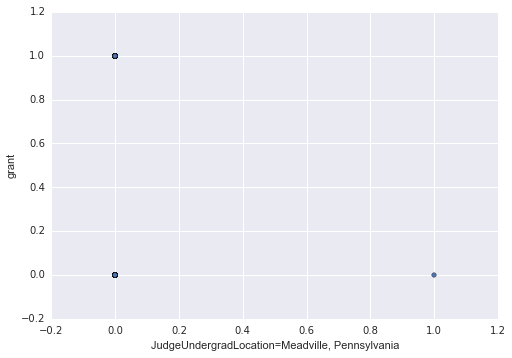

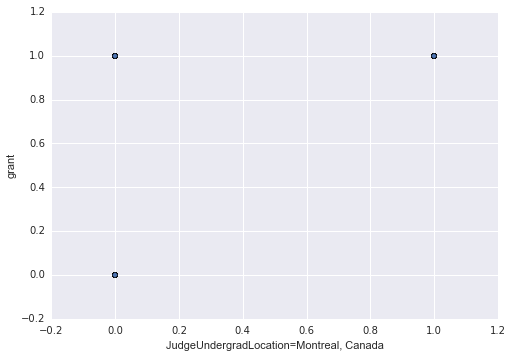

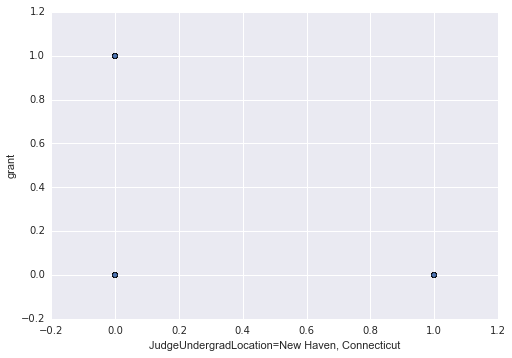

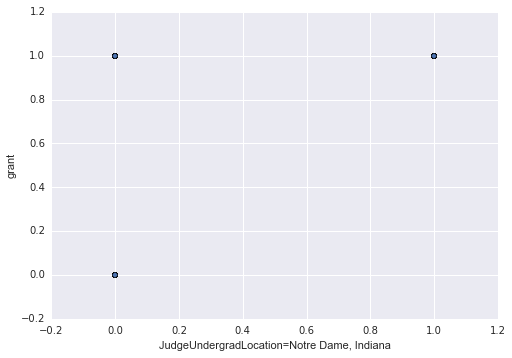

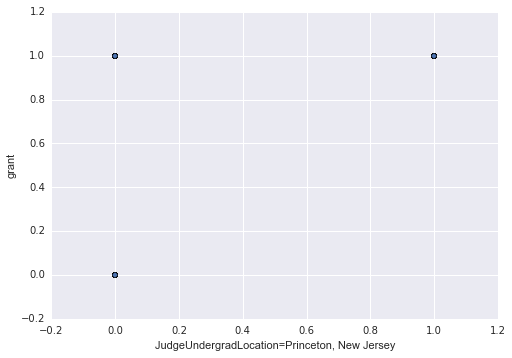

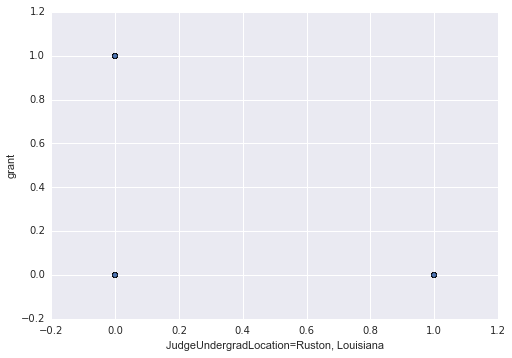

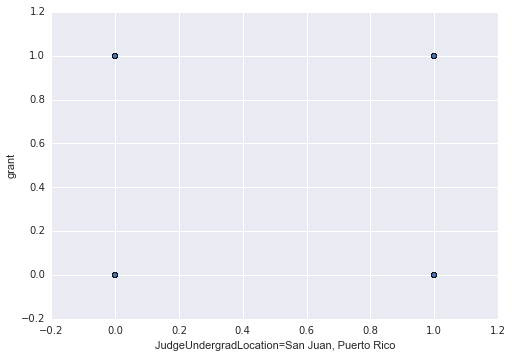

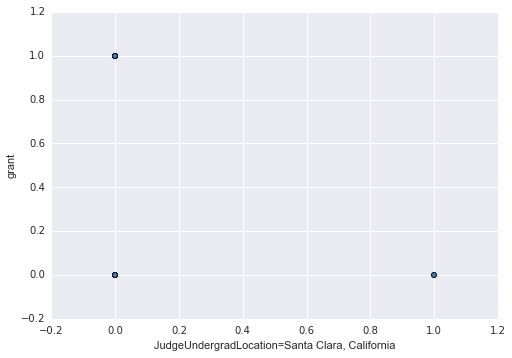

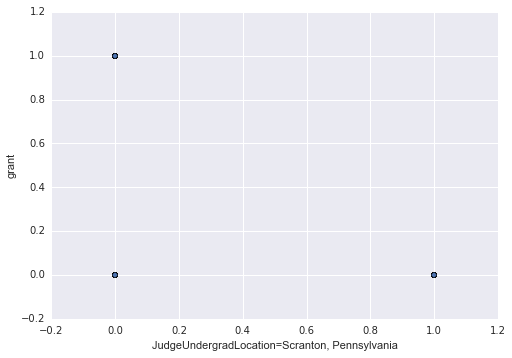

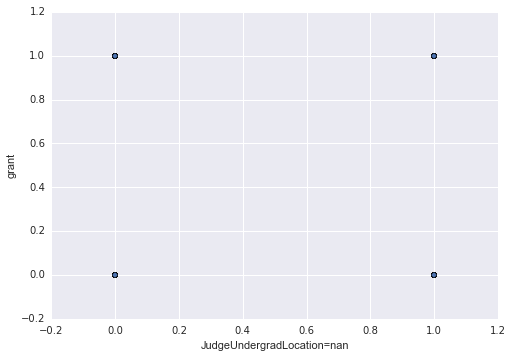

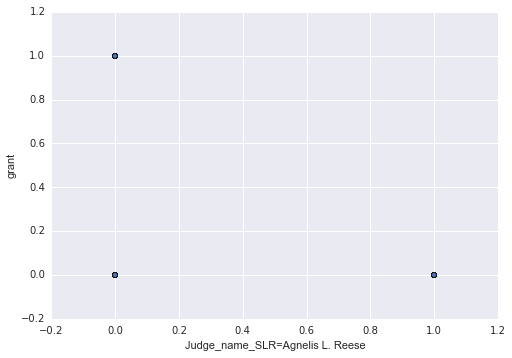

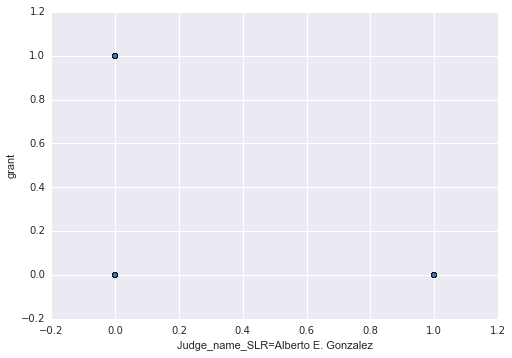

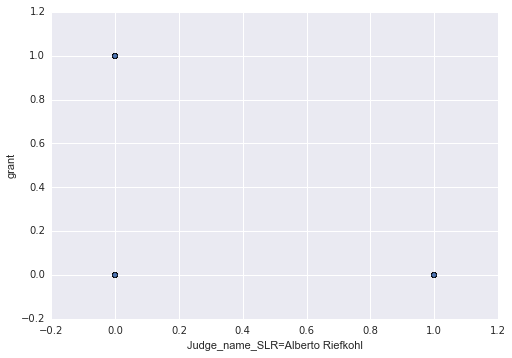

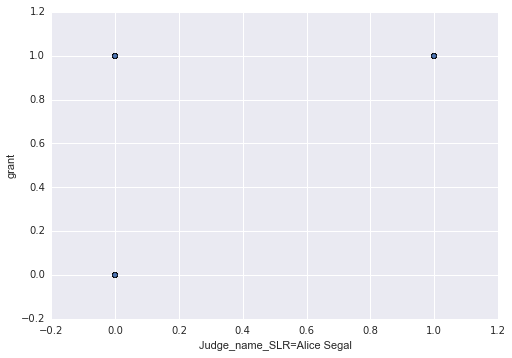

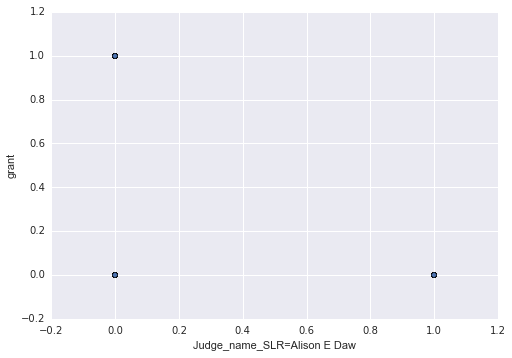

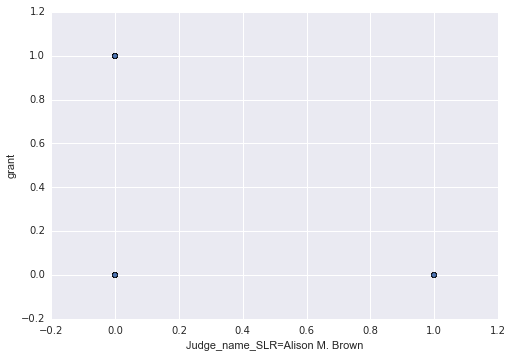

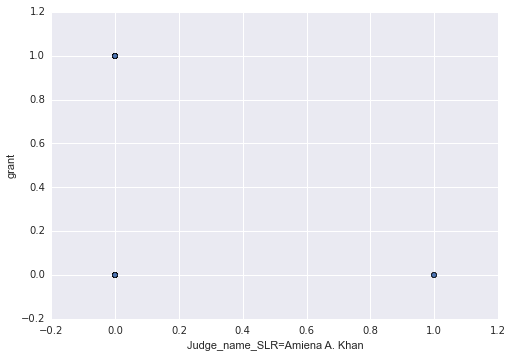

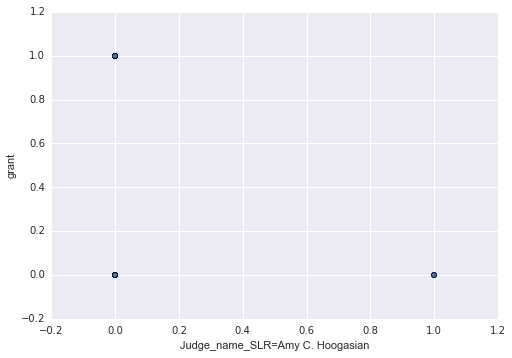

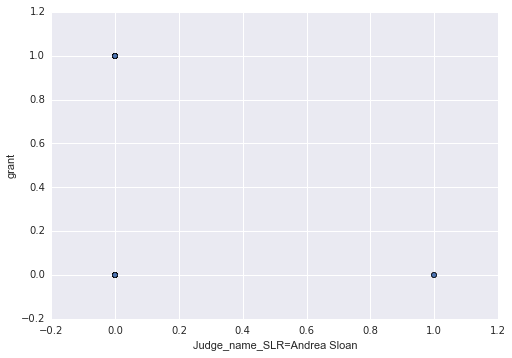

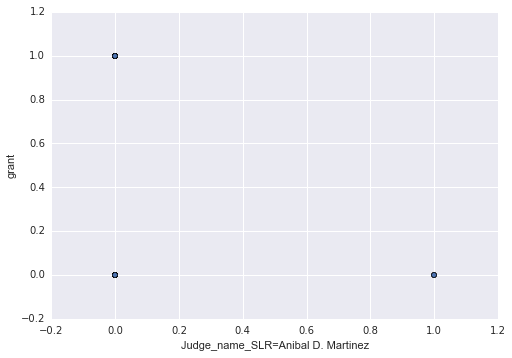

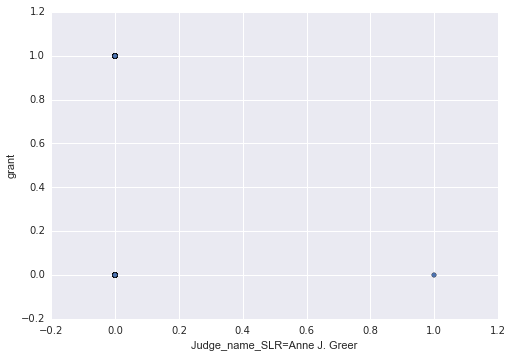

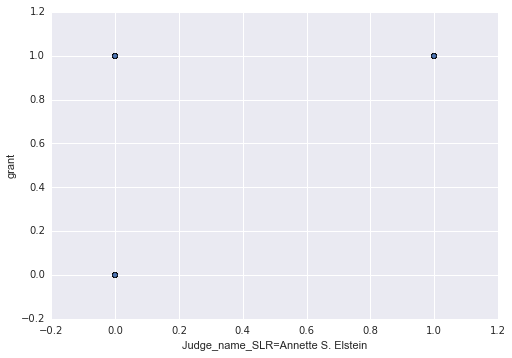

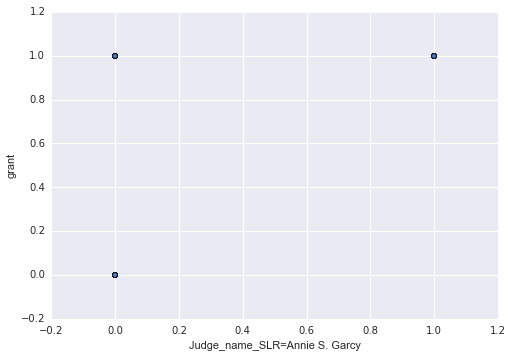

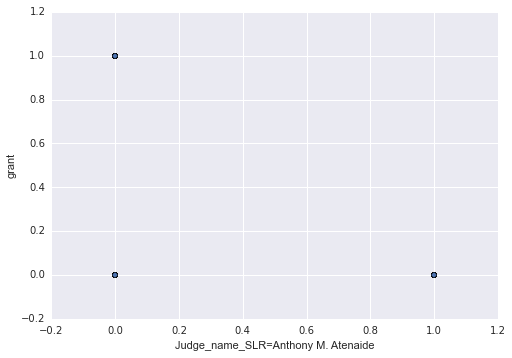

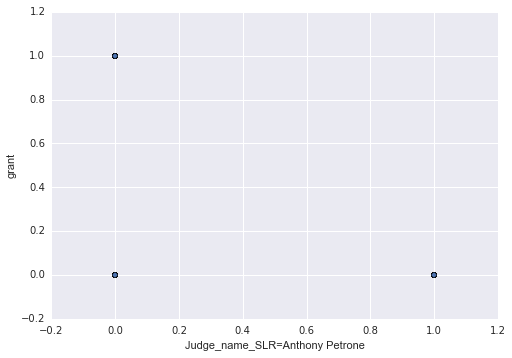

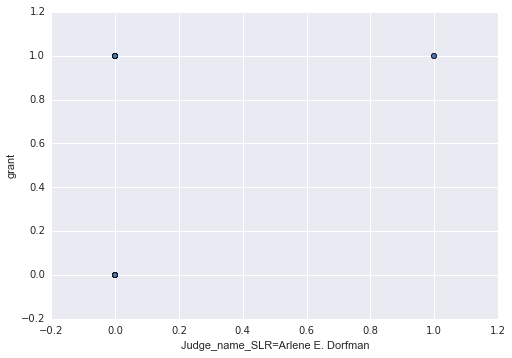

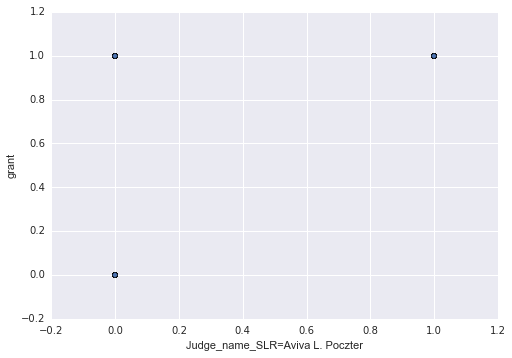

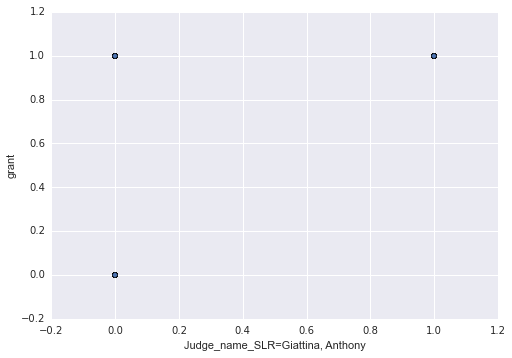

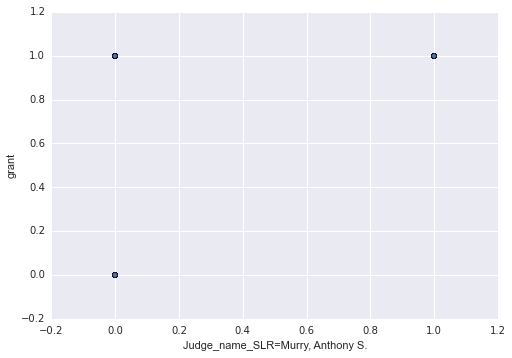

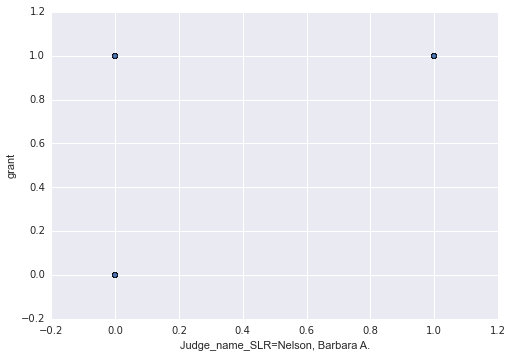

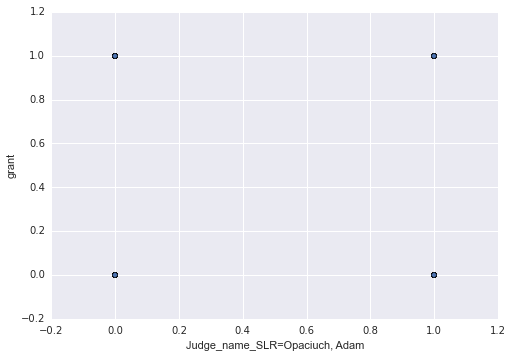

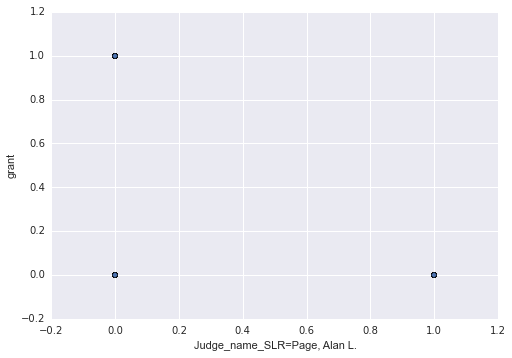

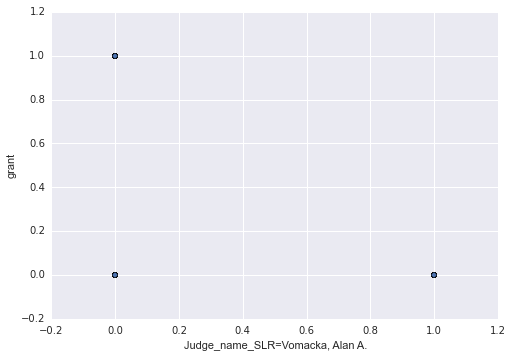

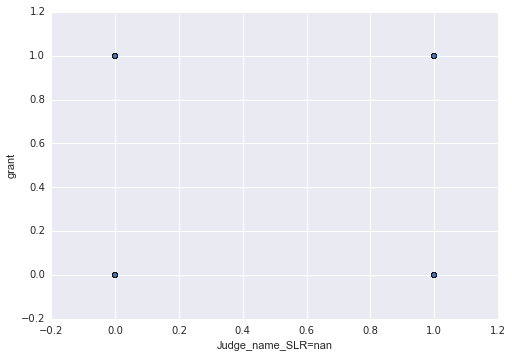

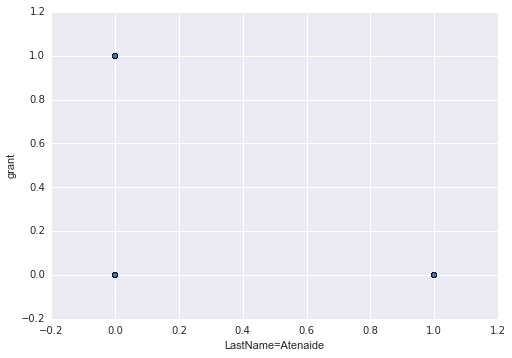

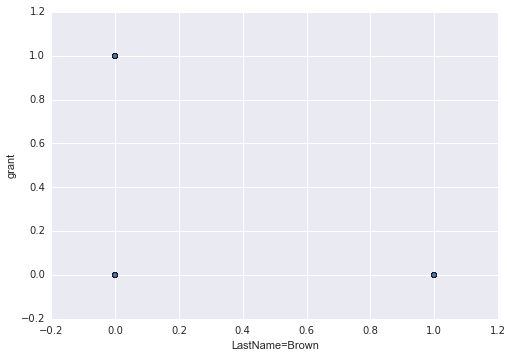

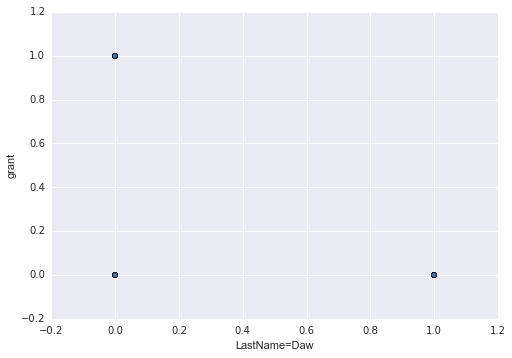

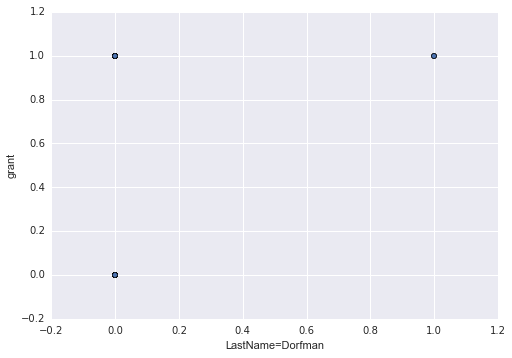

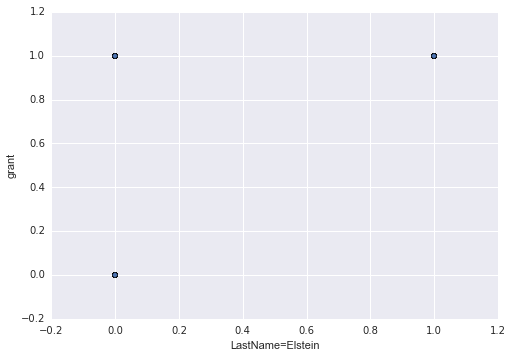

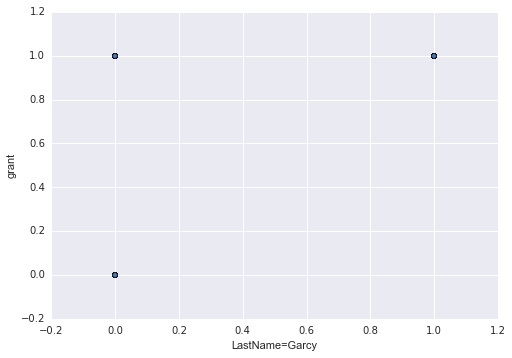

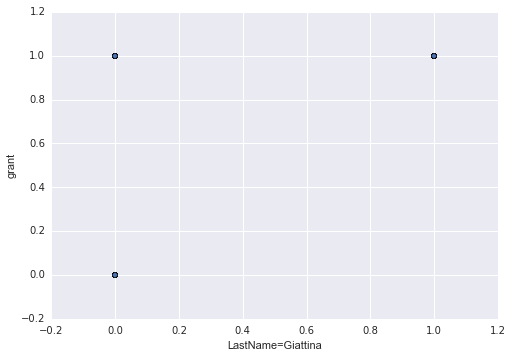

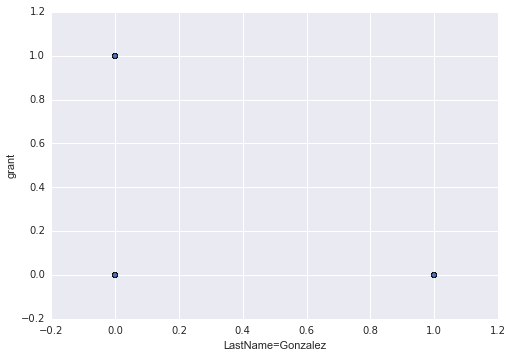

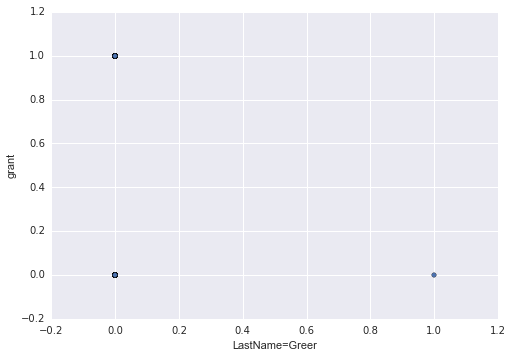

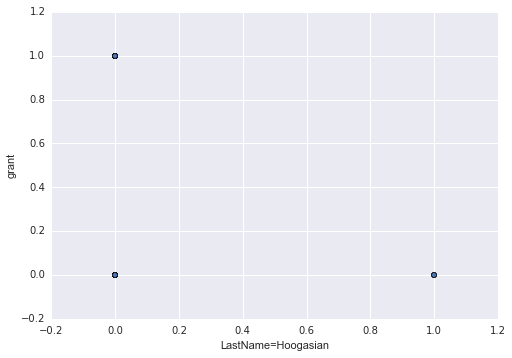

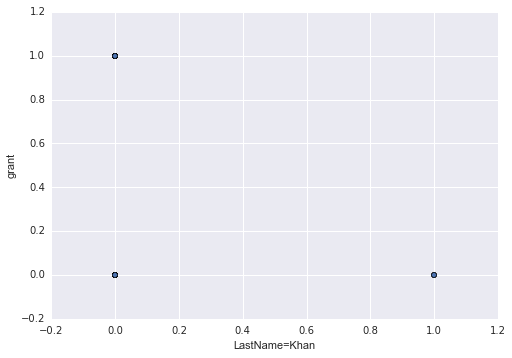

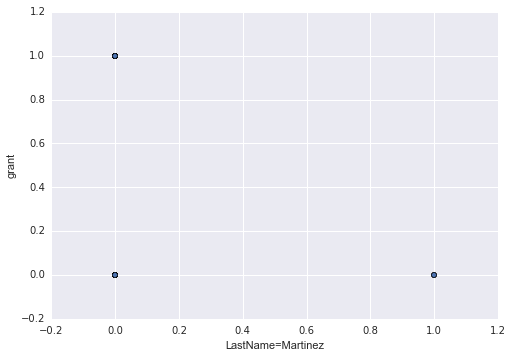

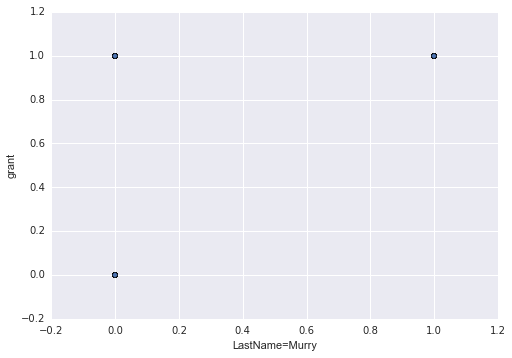

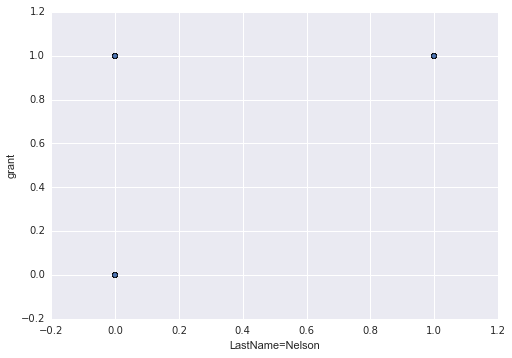

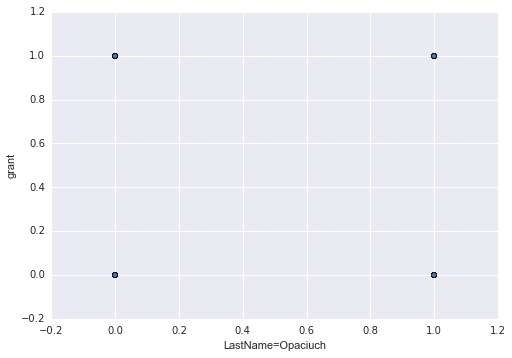

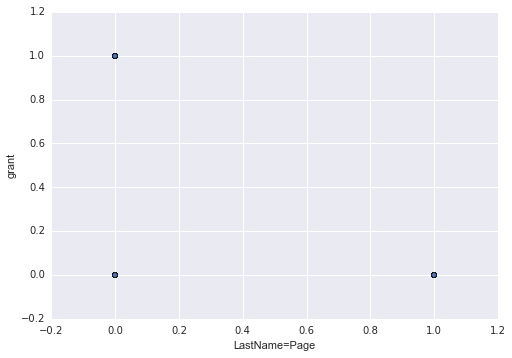

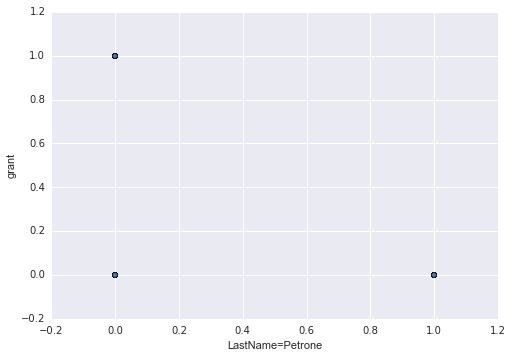

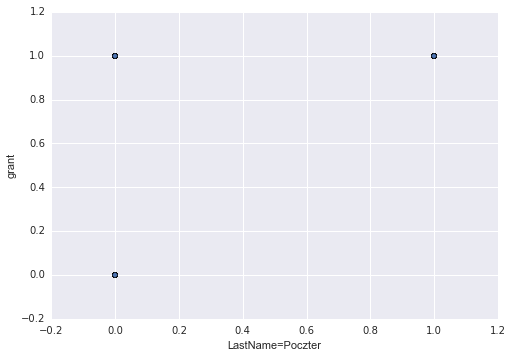

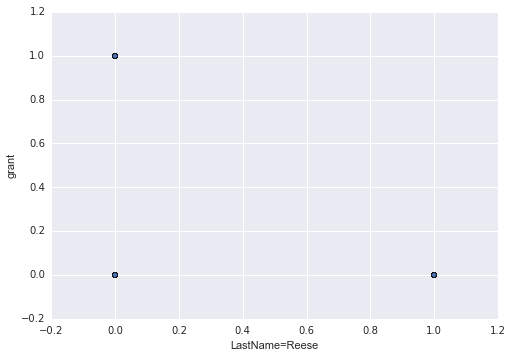

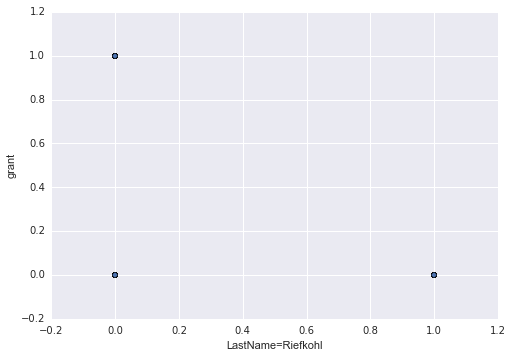

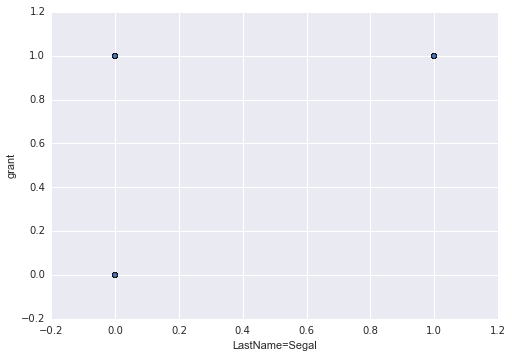

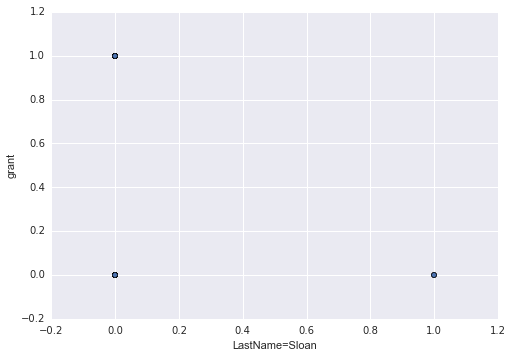

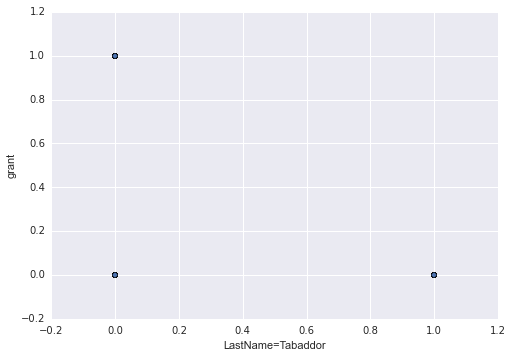

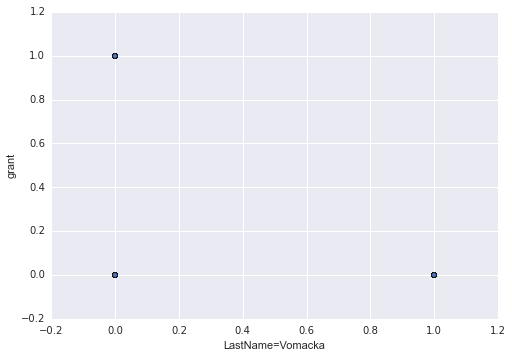

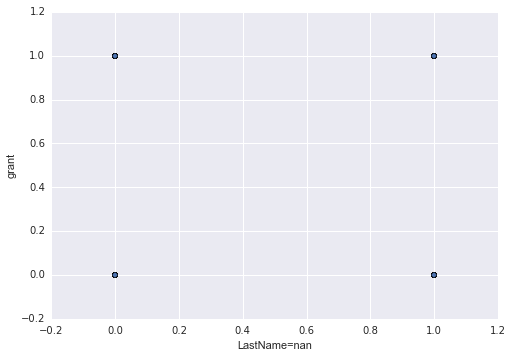

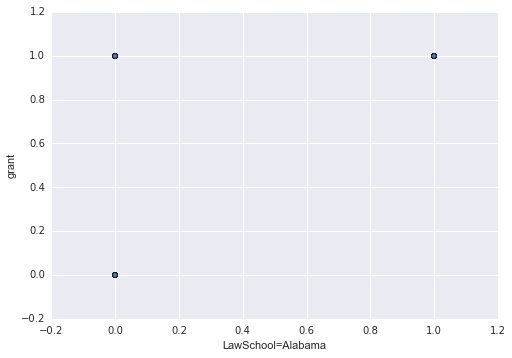

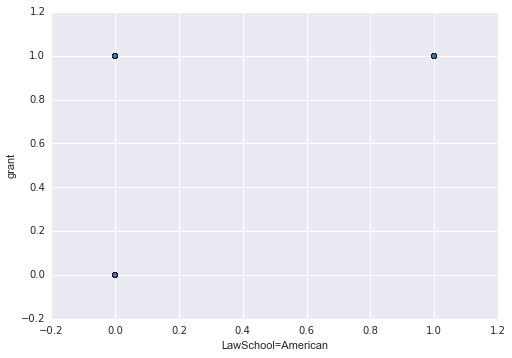

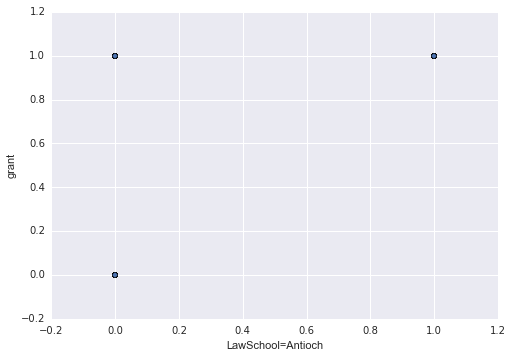

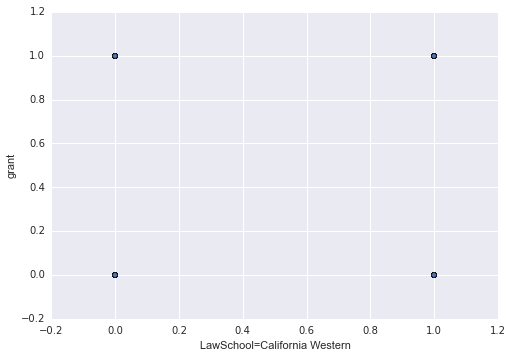

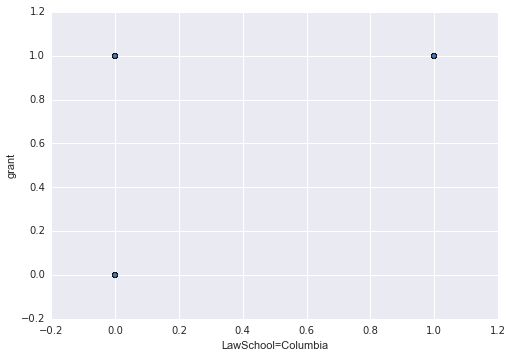

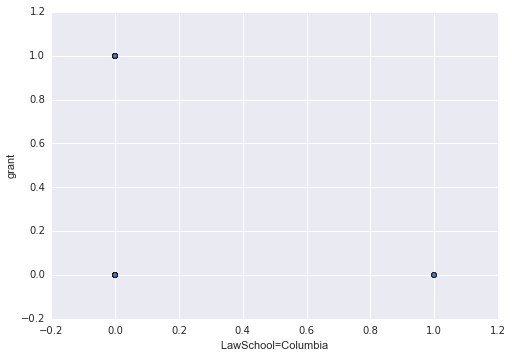

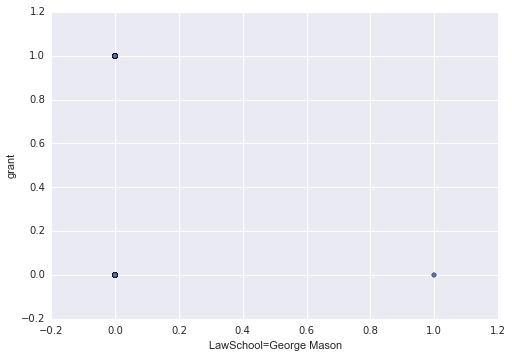

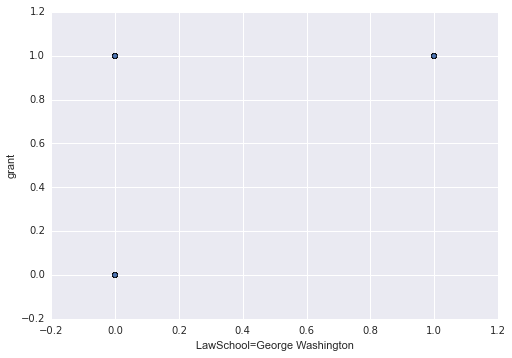

In [36]:
df_prof['grant'] = df['grant']
for i in range(200):
    df_plot = df_prof[['grant',dummy_columns[i]]]
    df_plot.plot(kind='scatter', x=dummy_columns[i], y='grant')

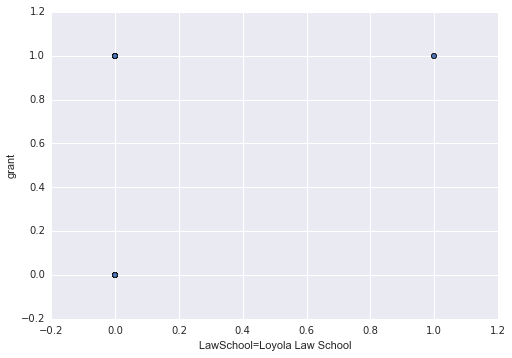

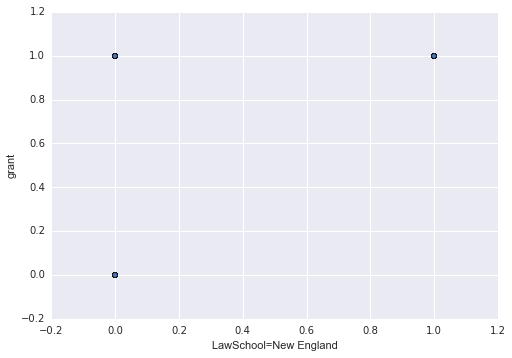

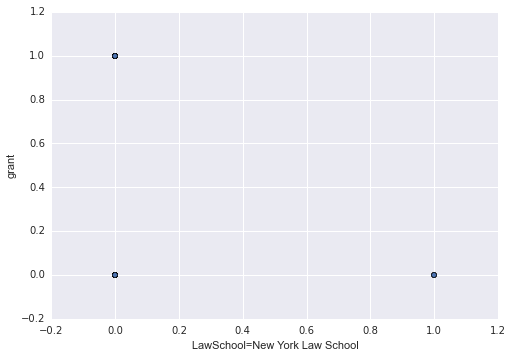

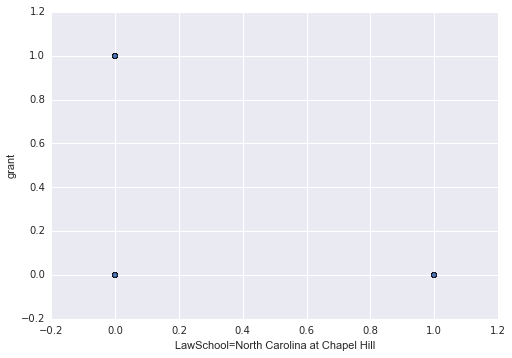

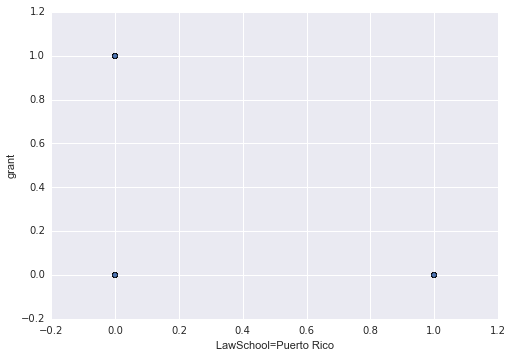

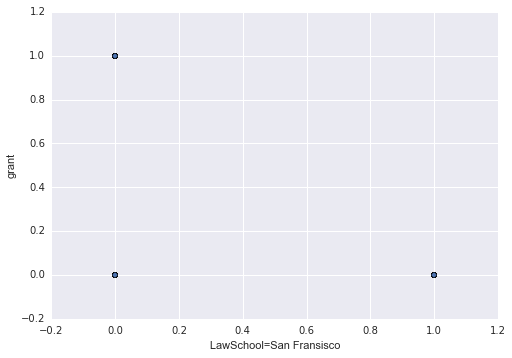

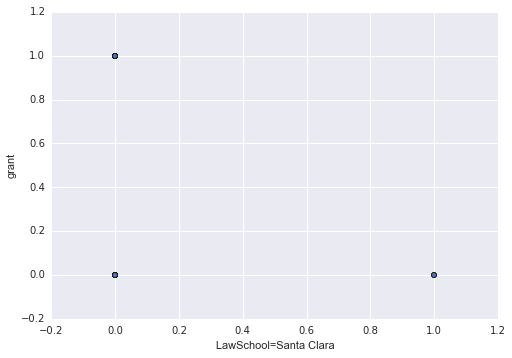

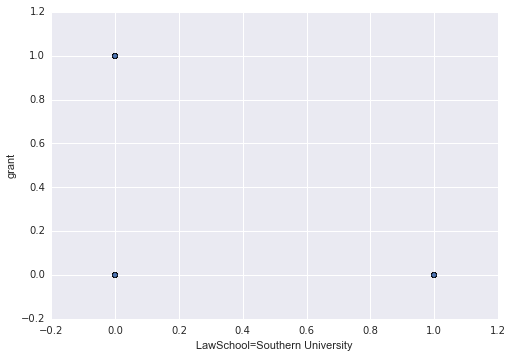

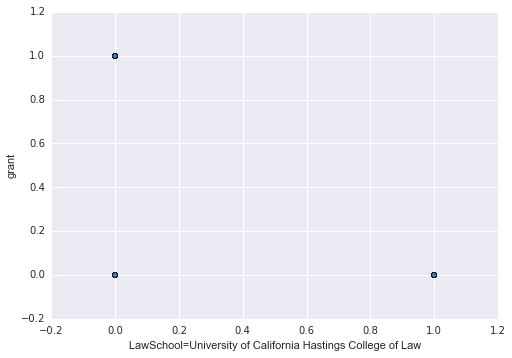

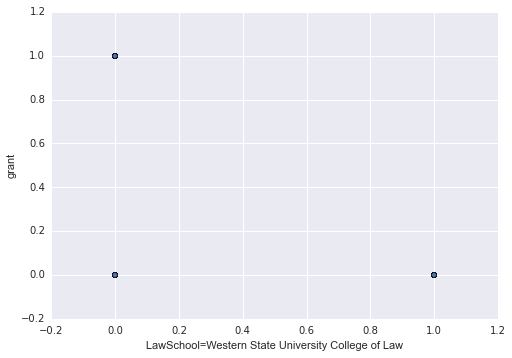

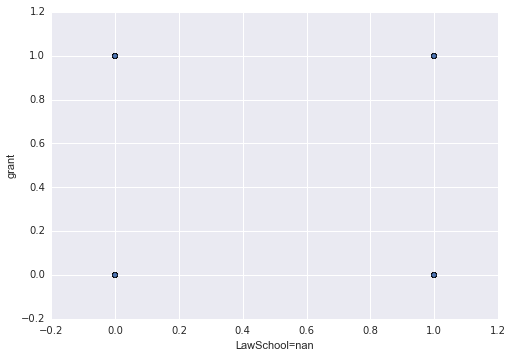

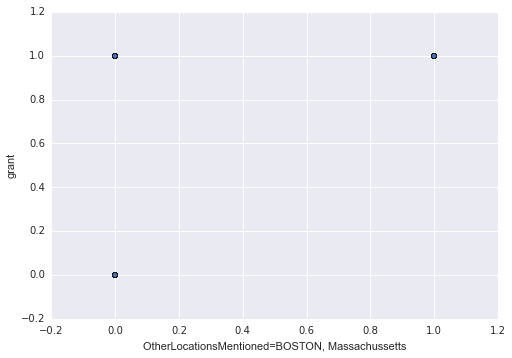

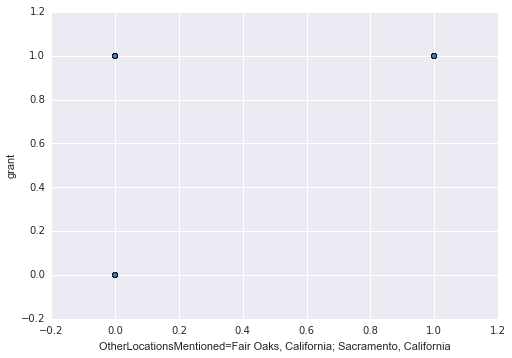

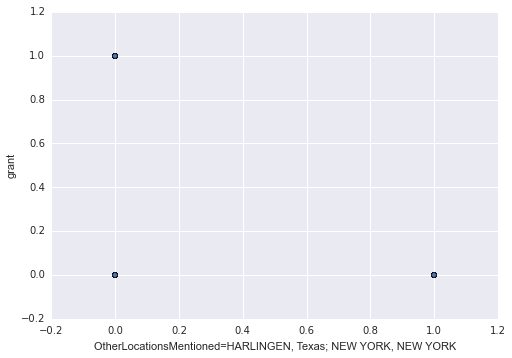

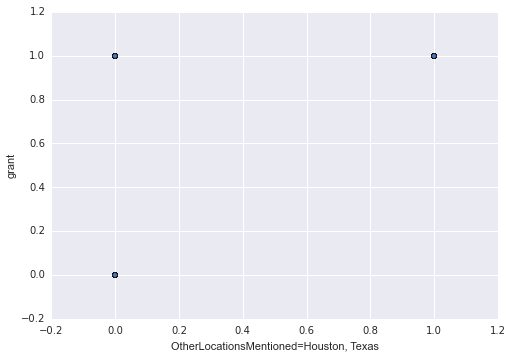

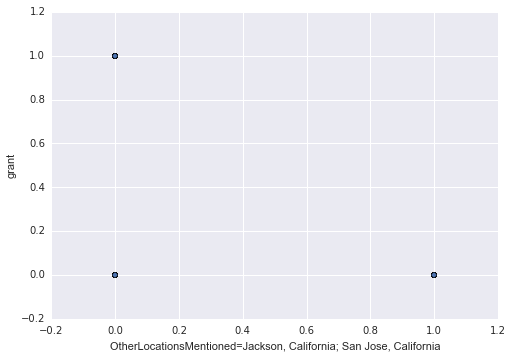

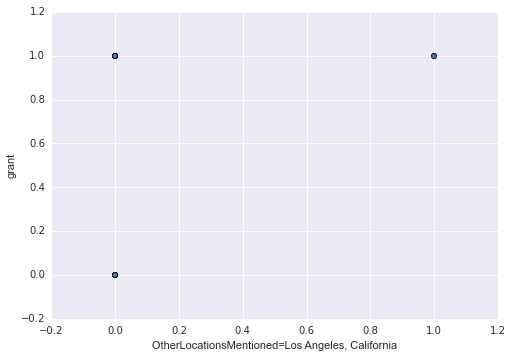

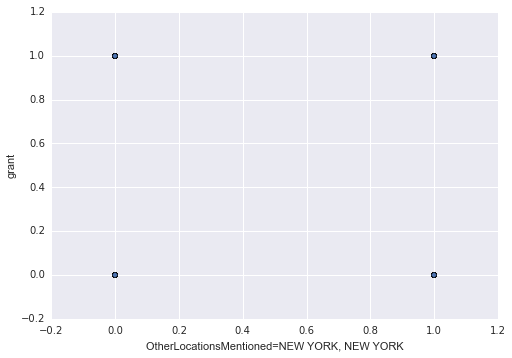

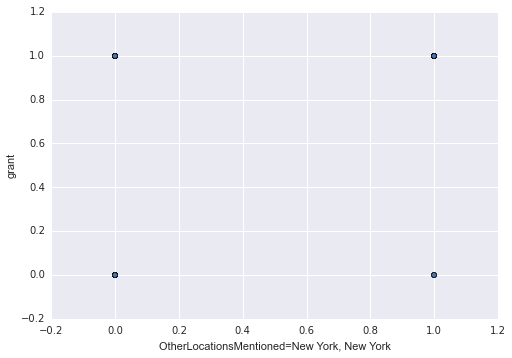

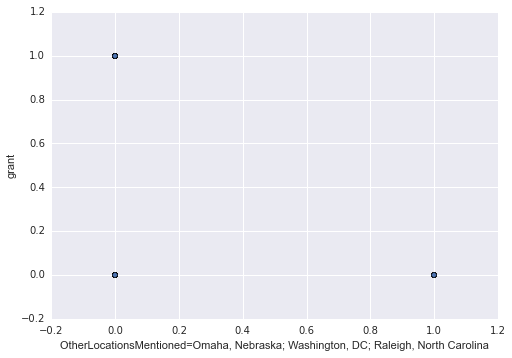

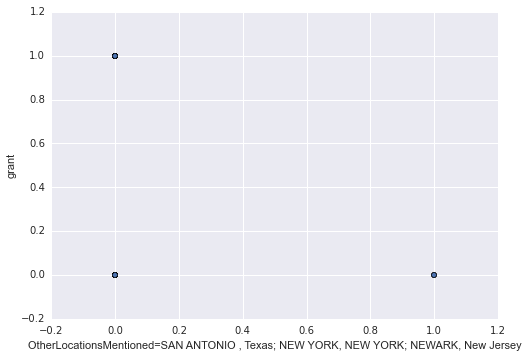

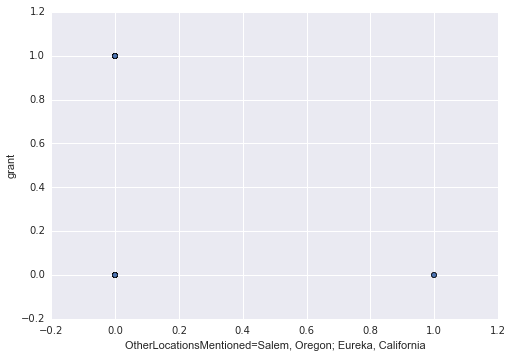

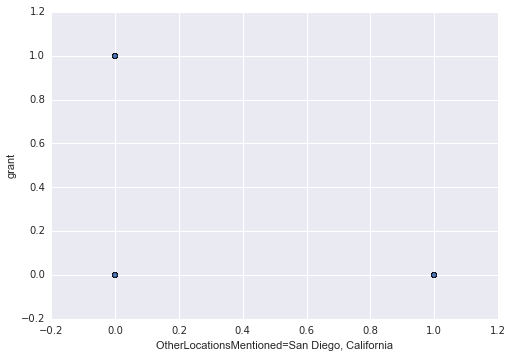

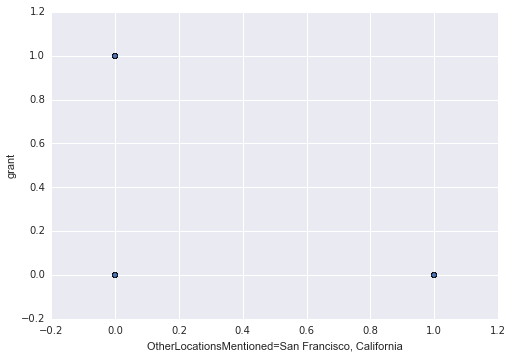

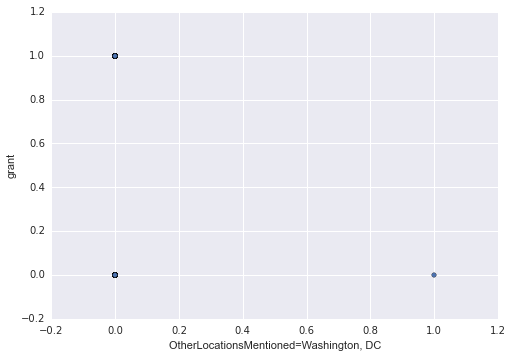

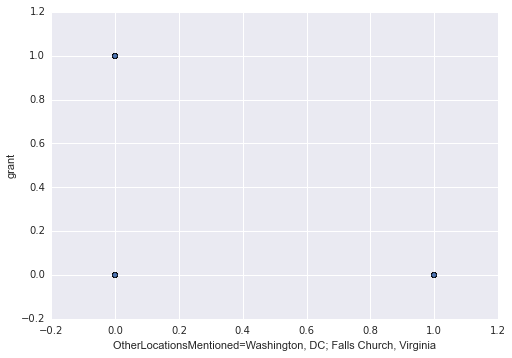

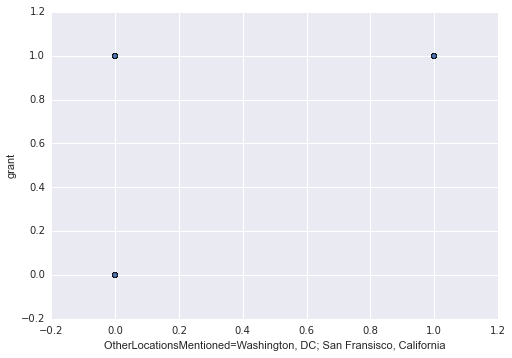

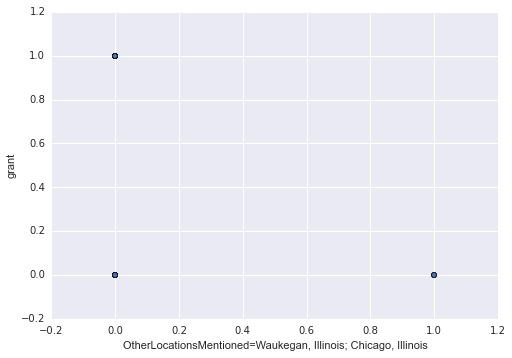

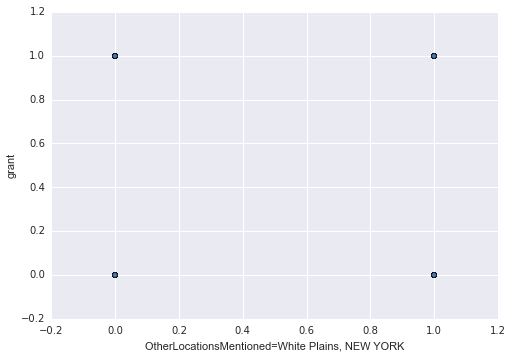

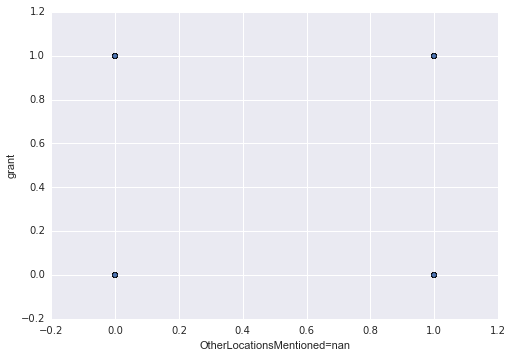

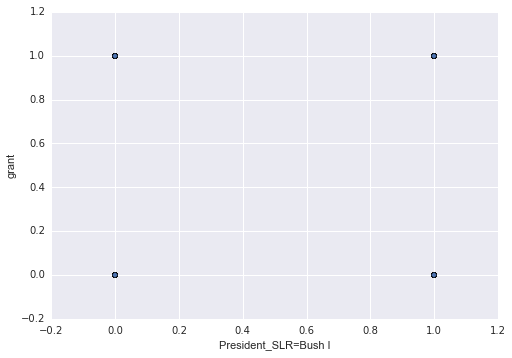

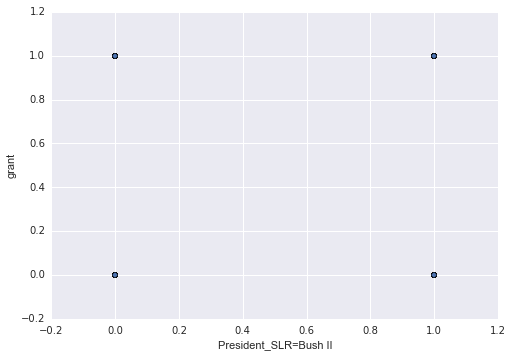

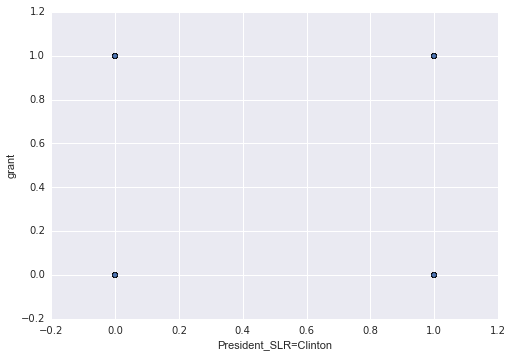

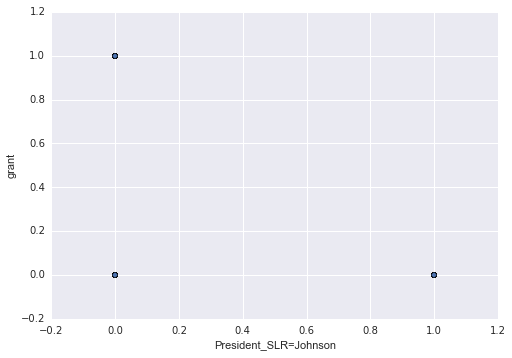

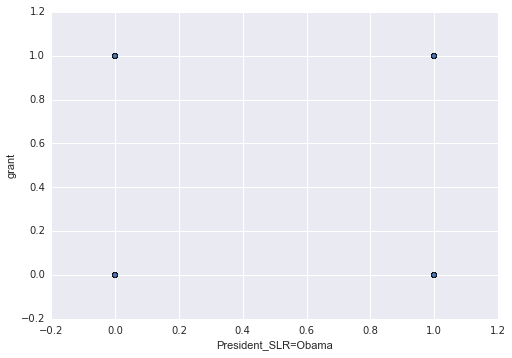

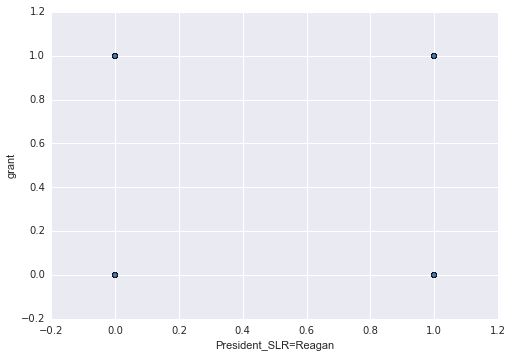

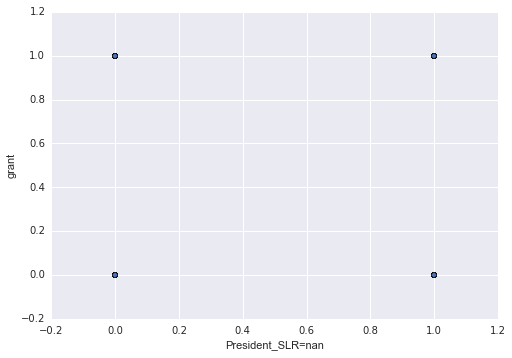

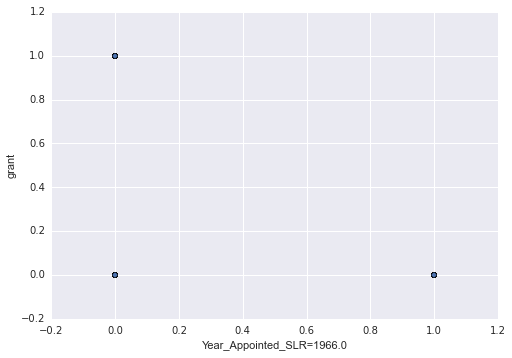

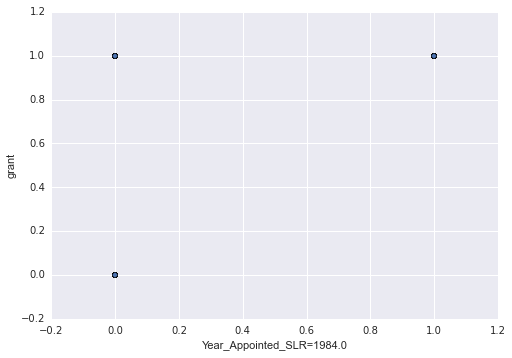

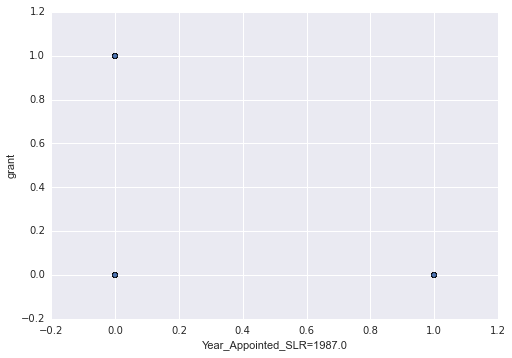

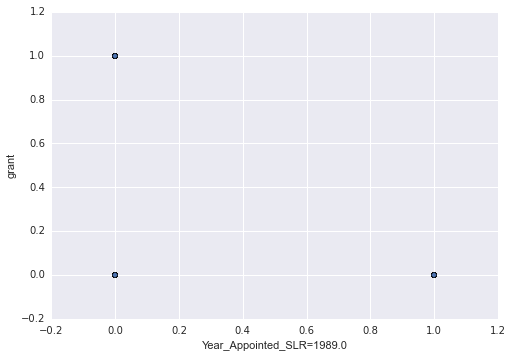

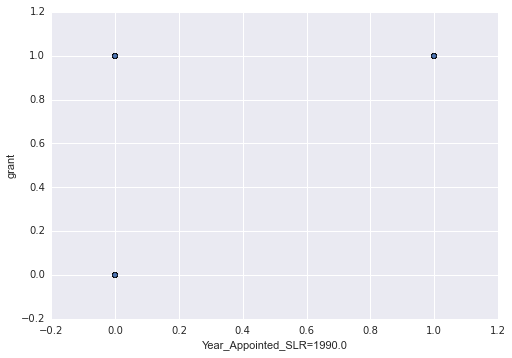

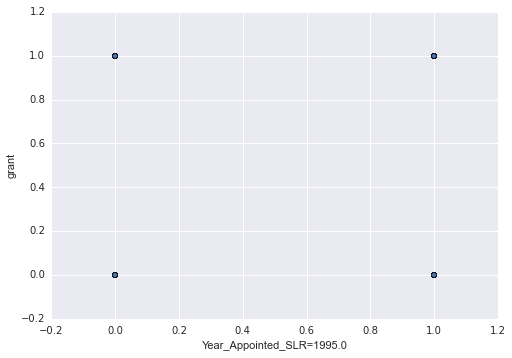

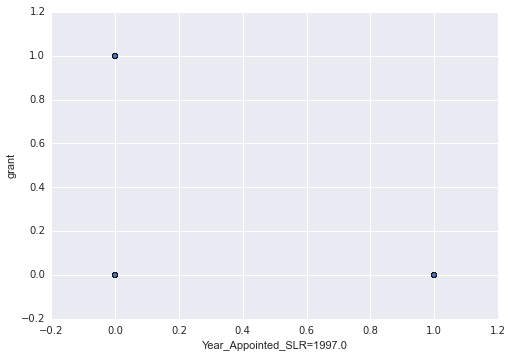

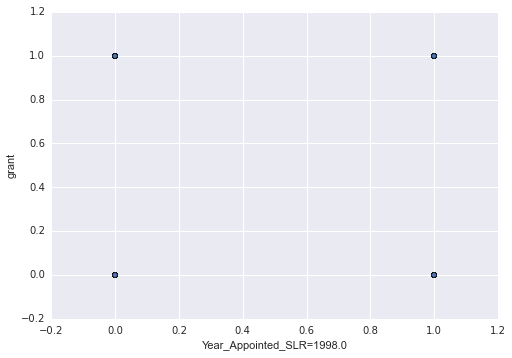

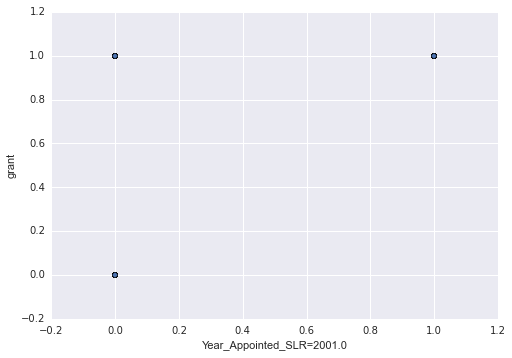

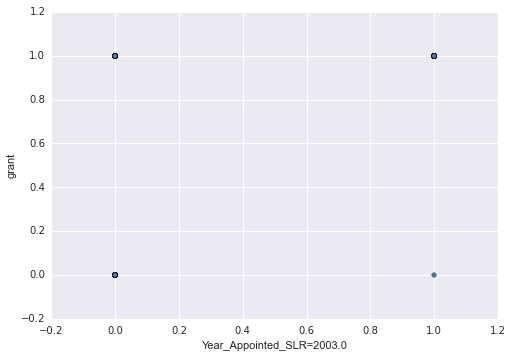

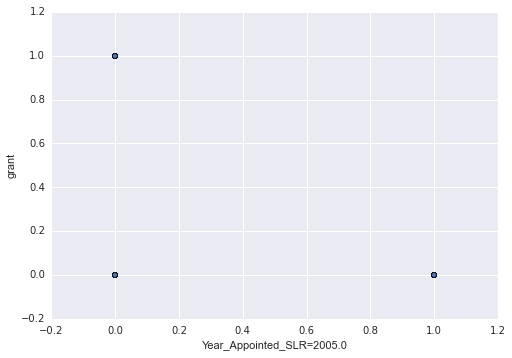

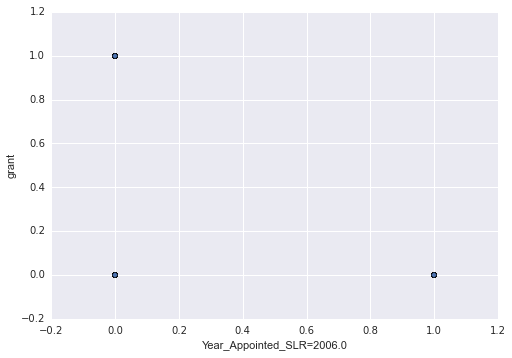

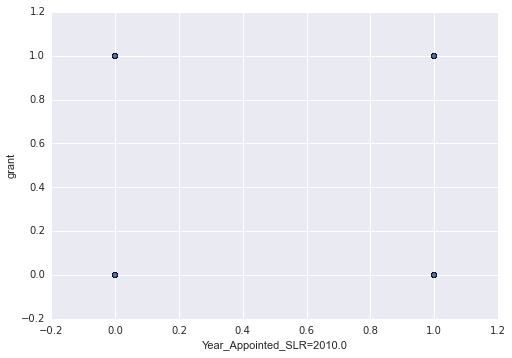

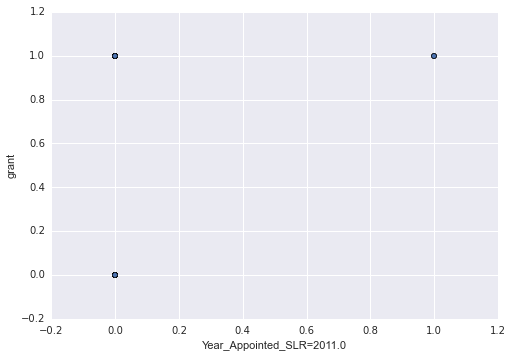

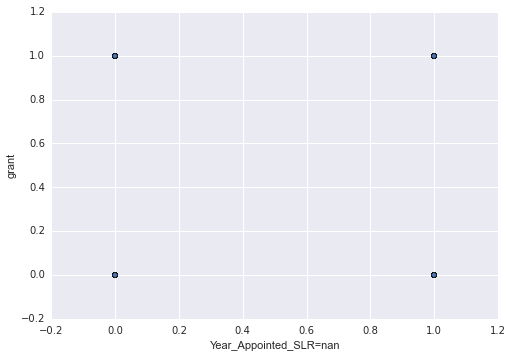

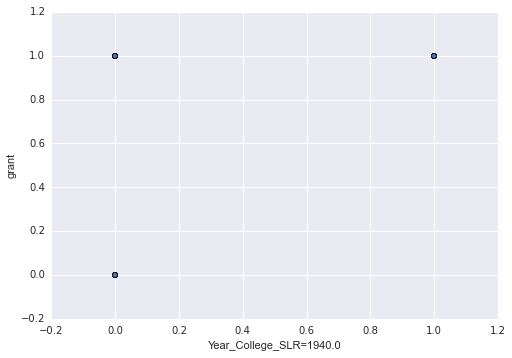

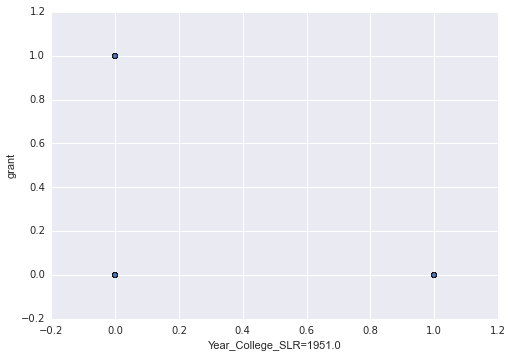

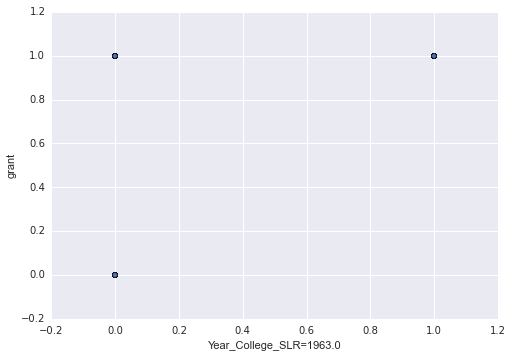

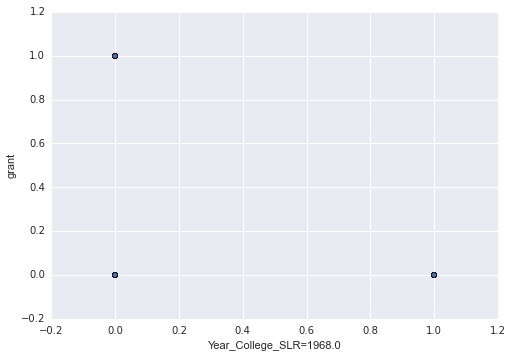

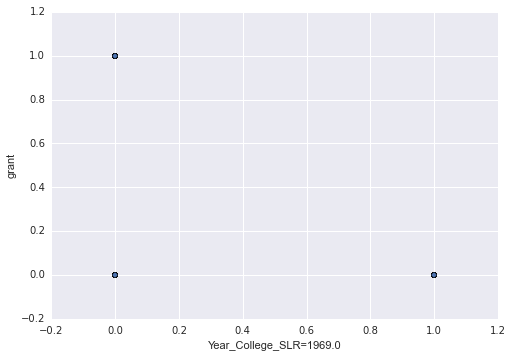

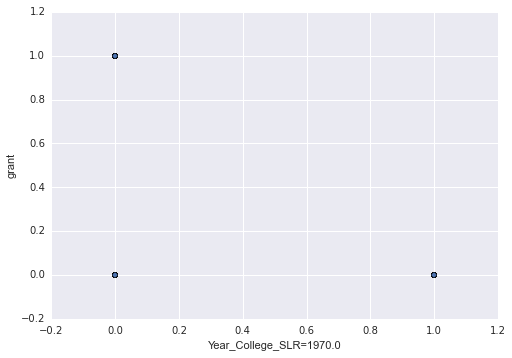

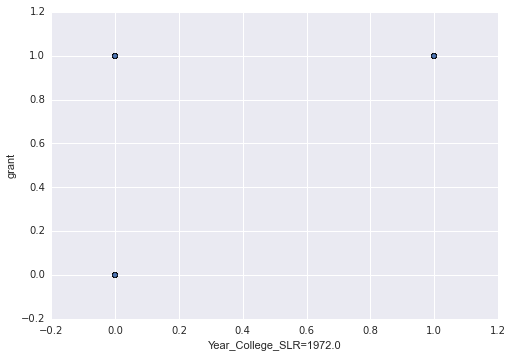

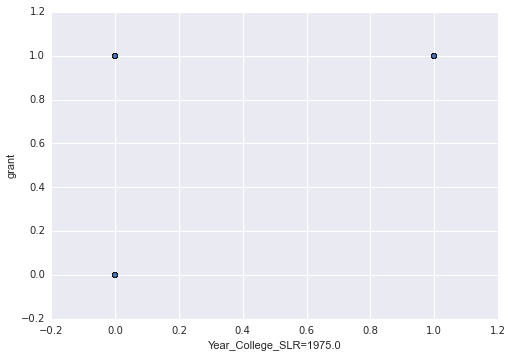

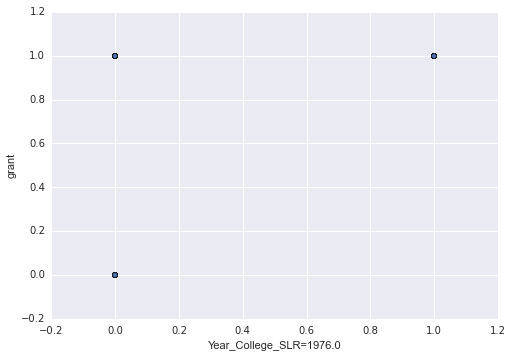

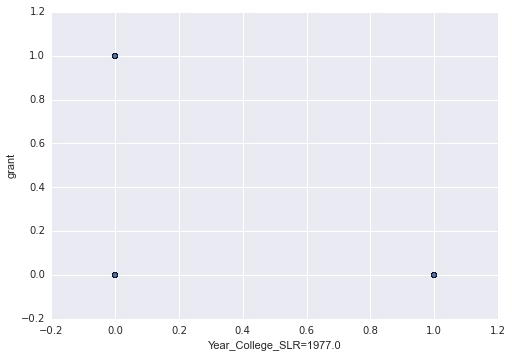

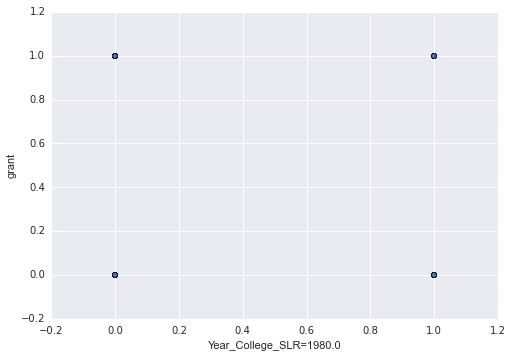

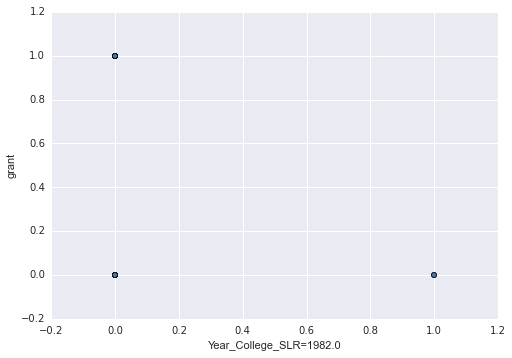

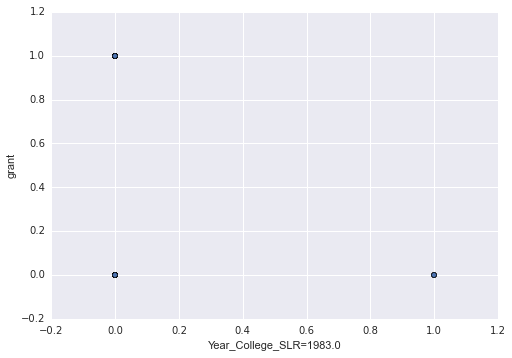

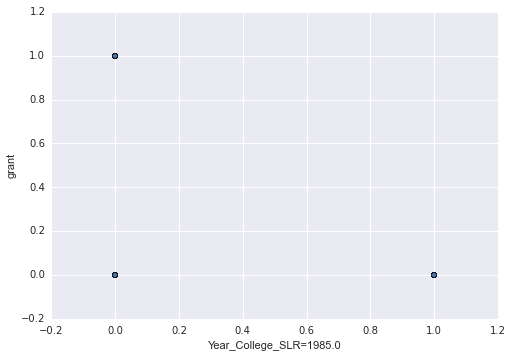

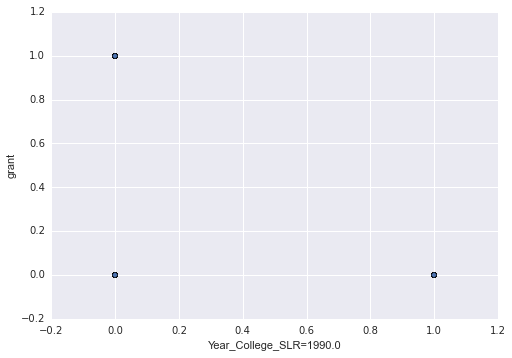

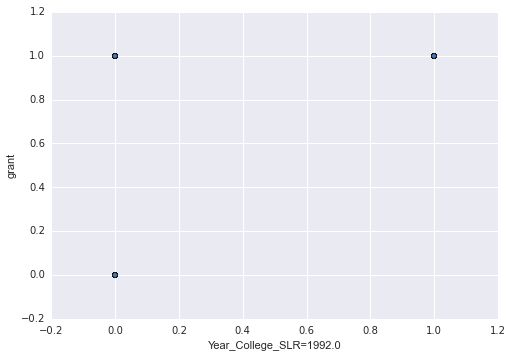

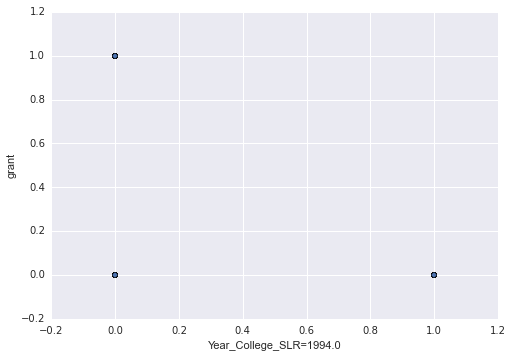

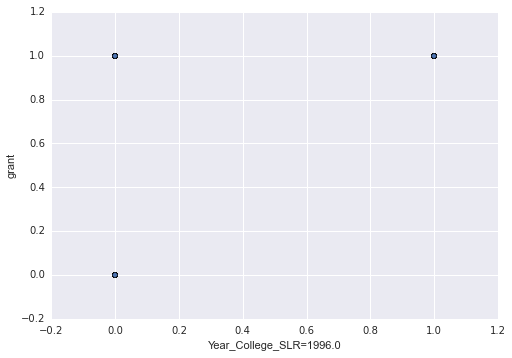

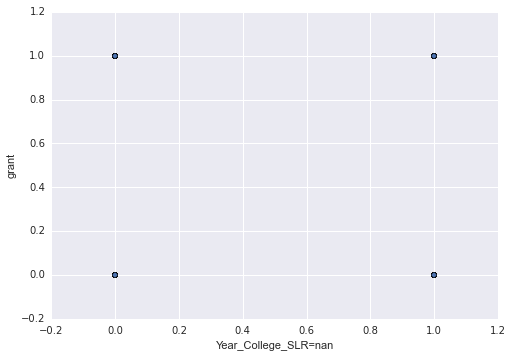

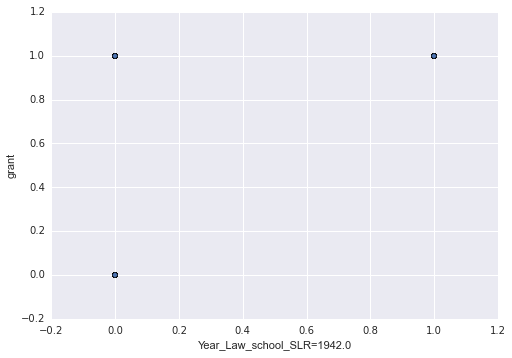

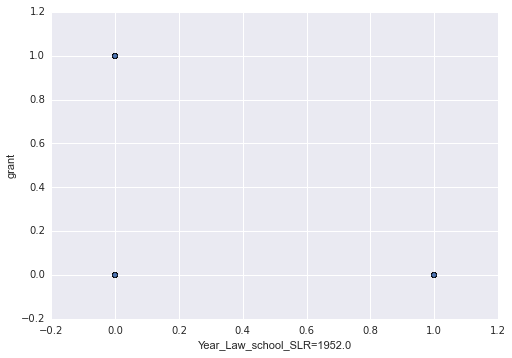

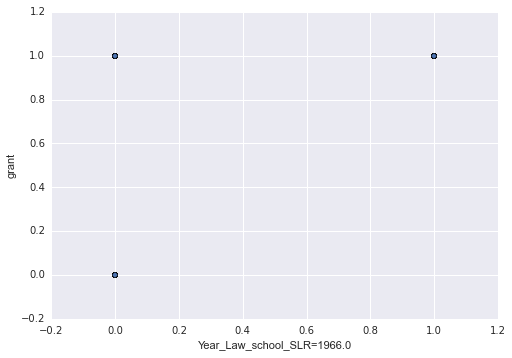

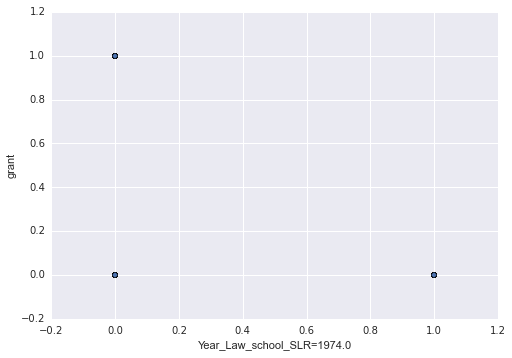

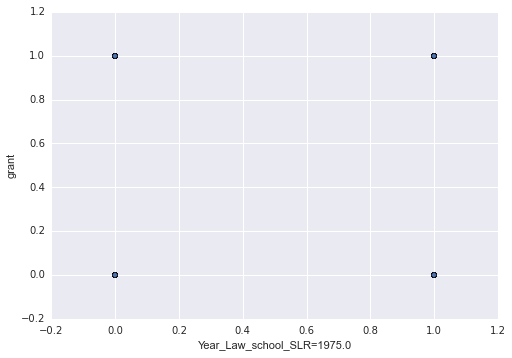

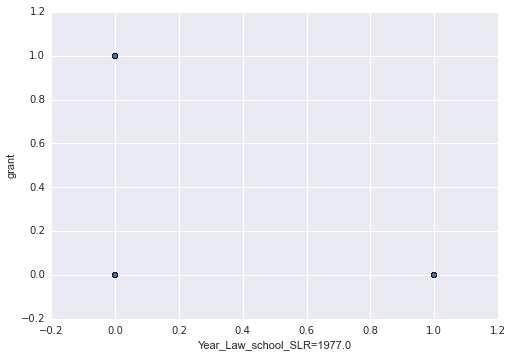

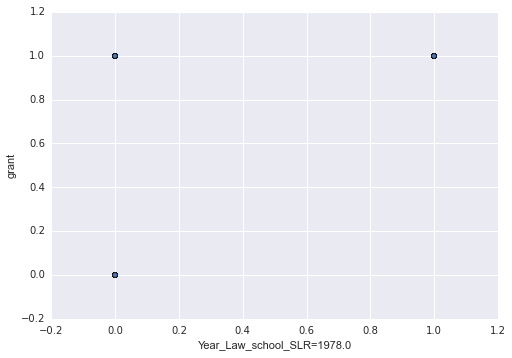

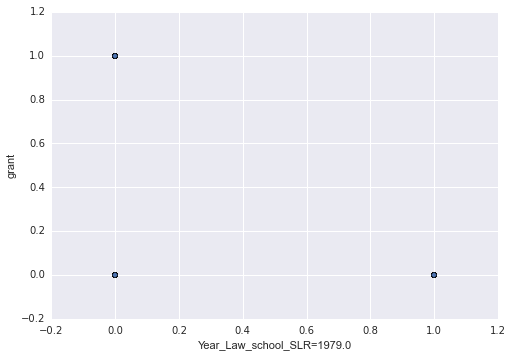

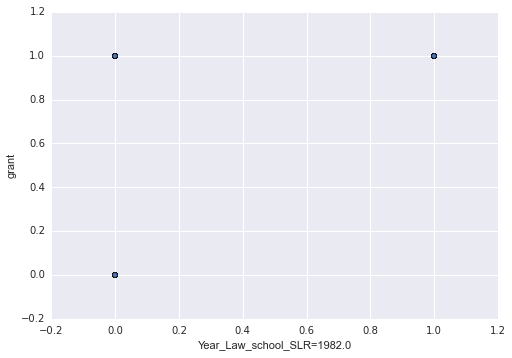

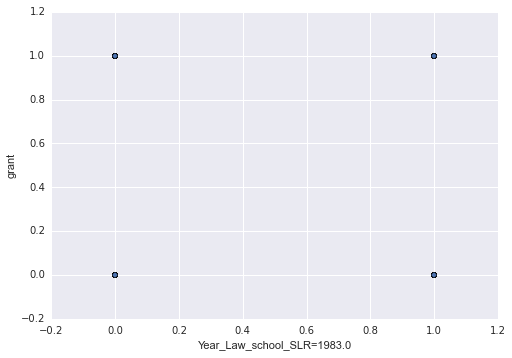

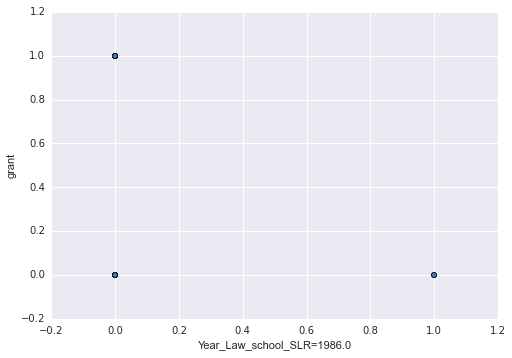

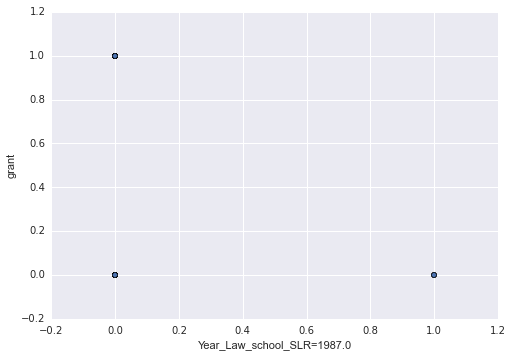

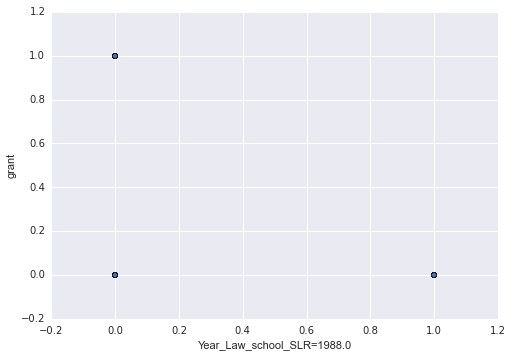

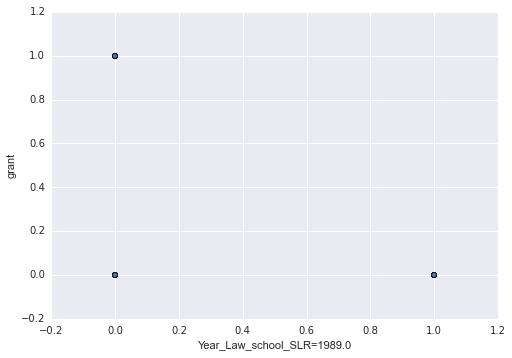

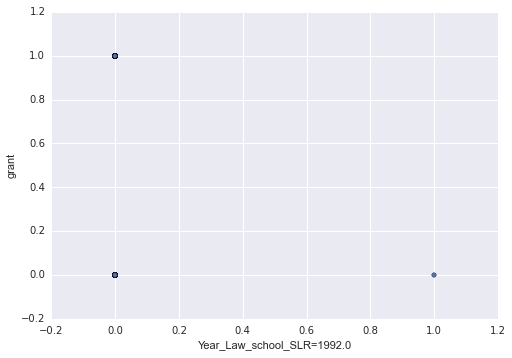

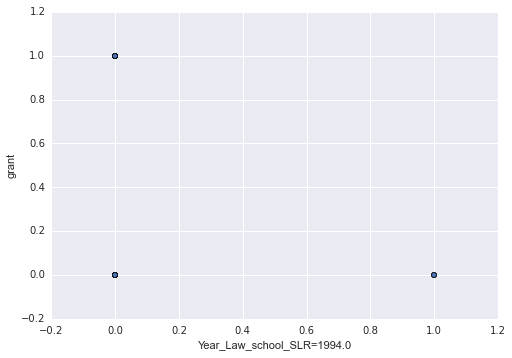

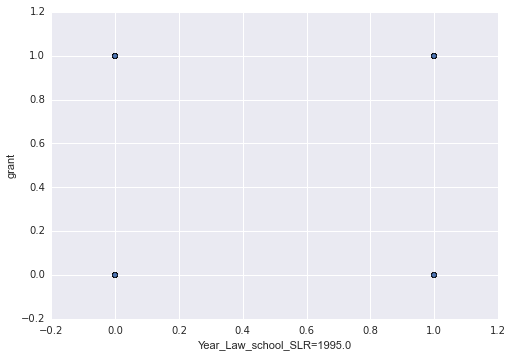

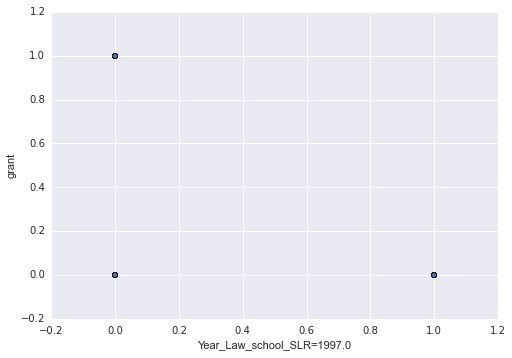

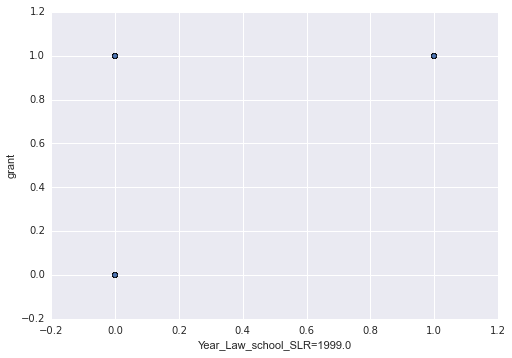

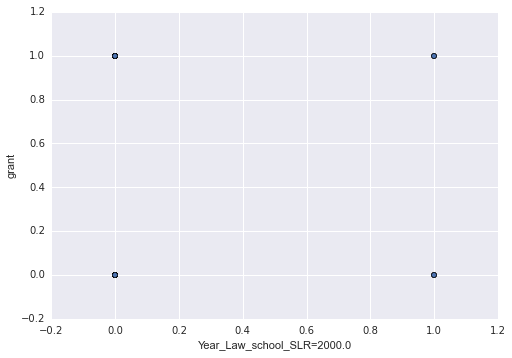

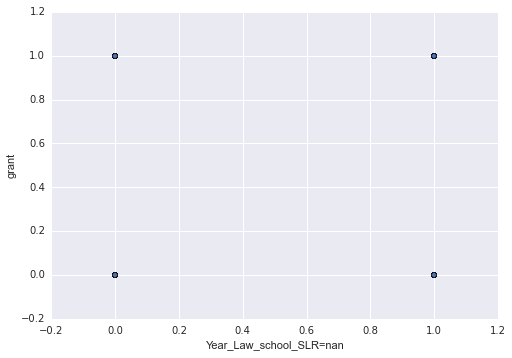

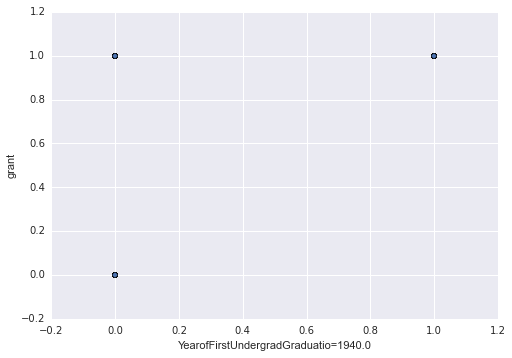

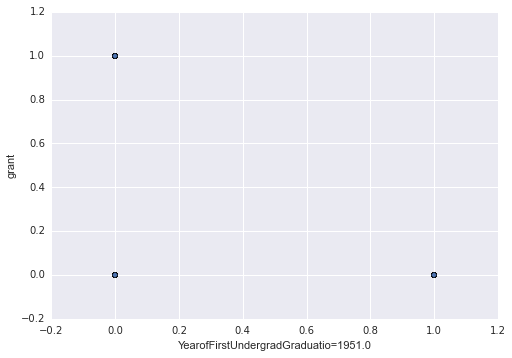

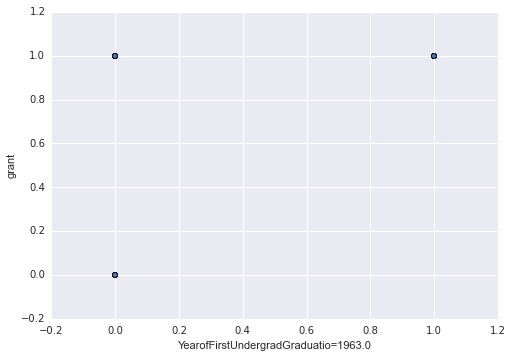

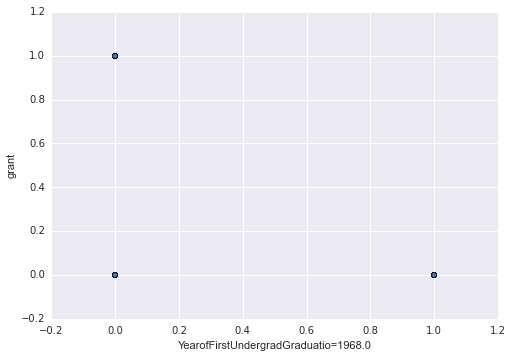

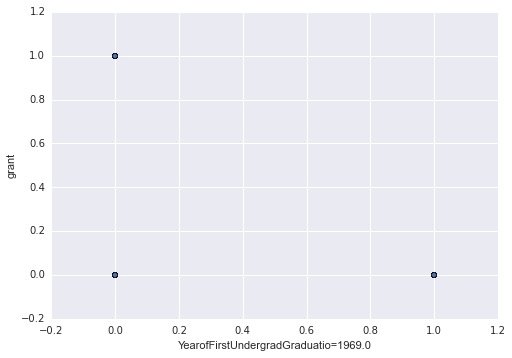

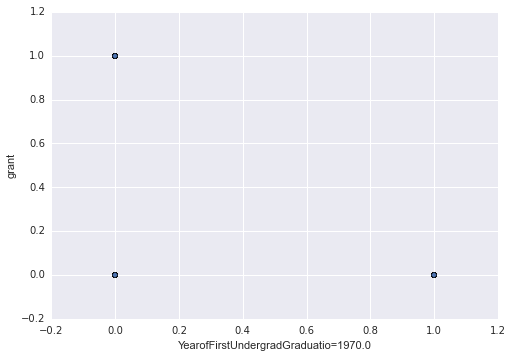

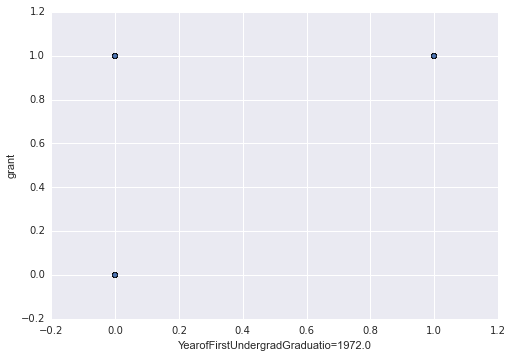

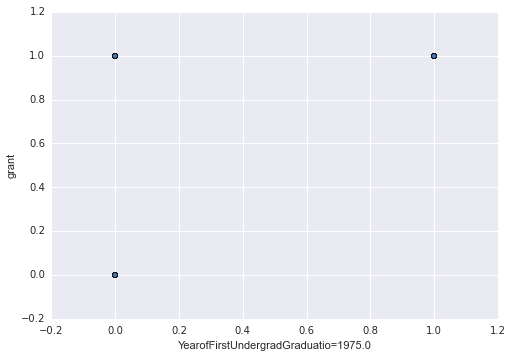

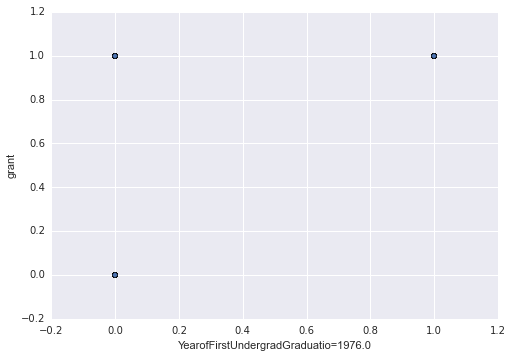

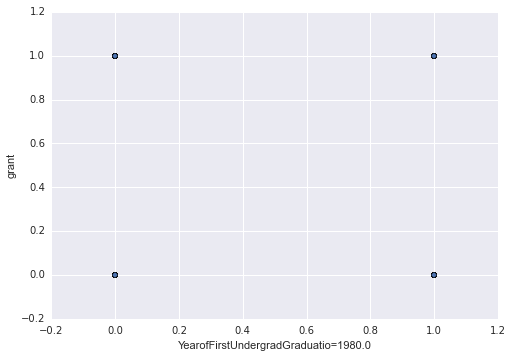

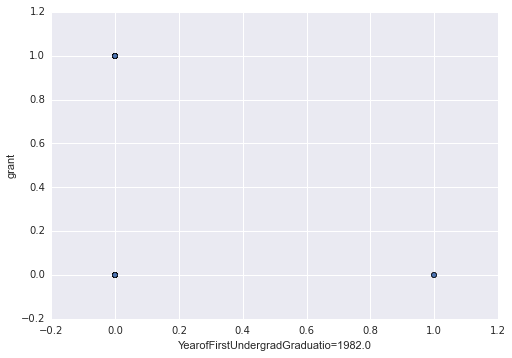

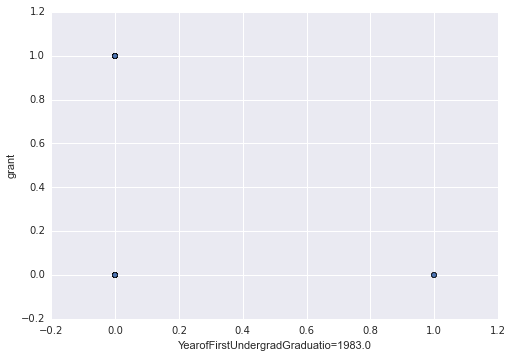

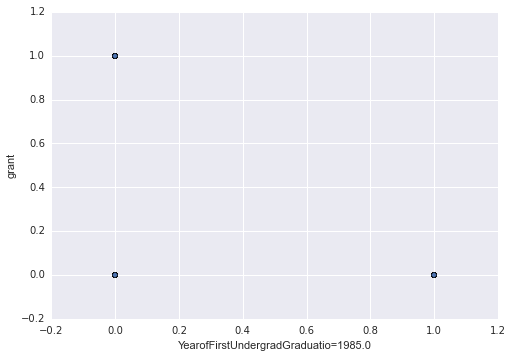

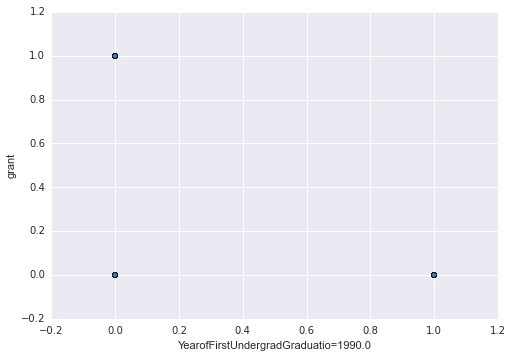

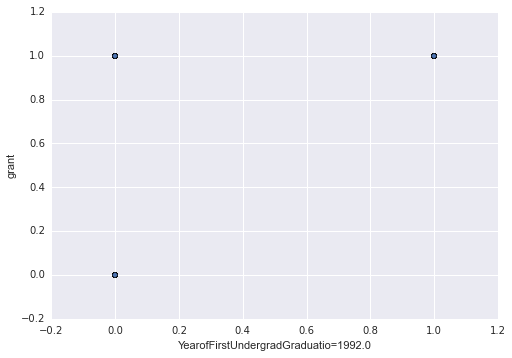

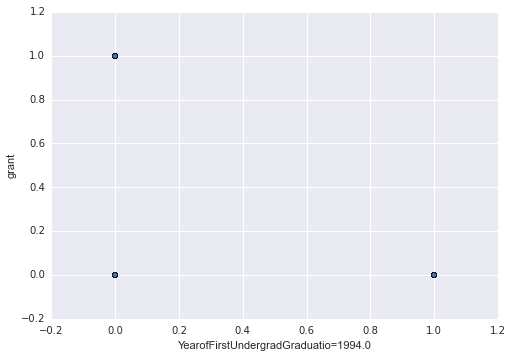

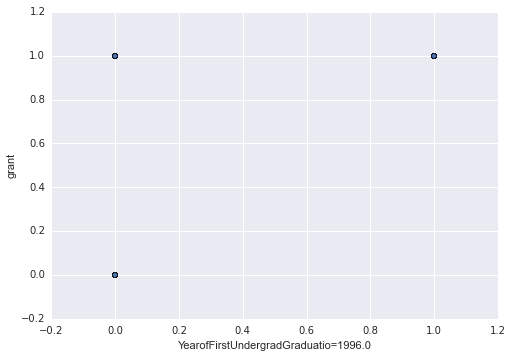

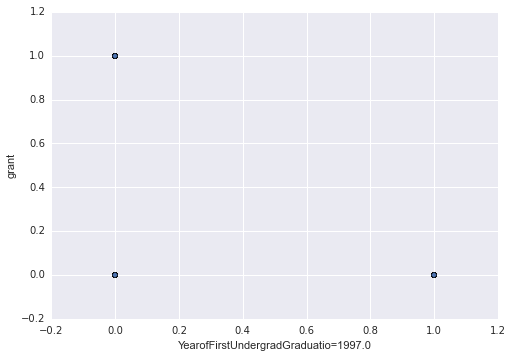

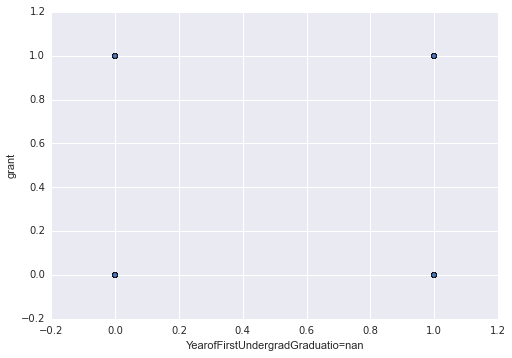

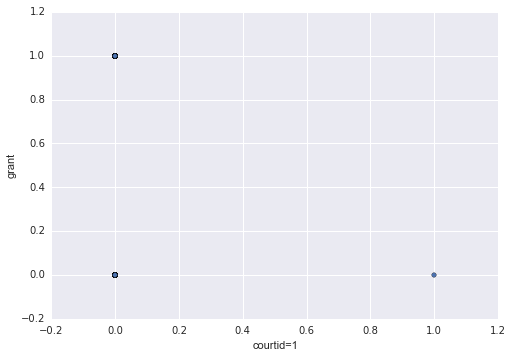

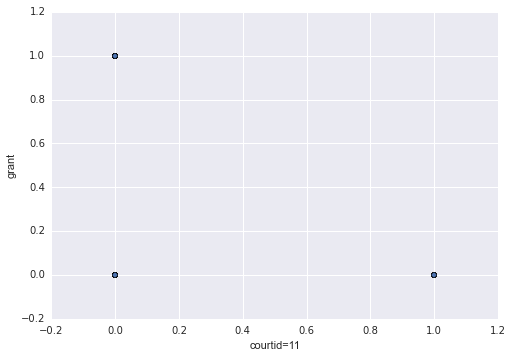

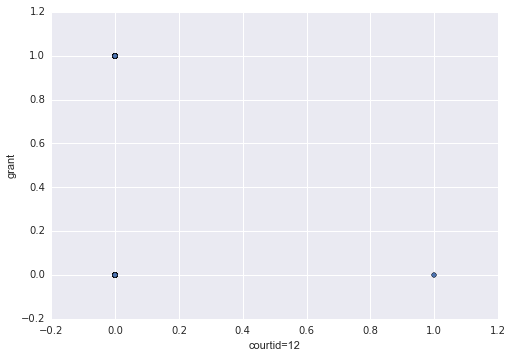

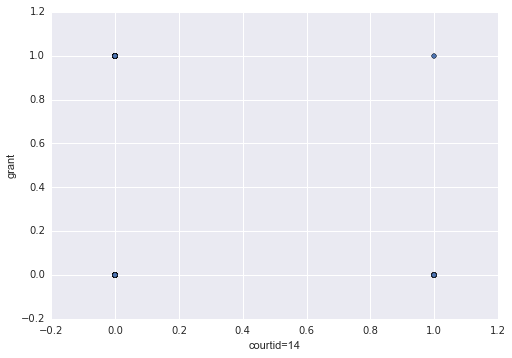

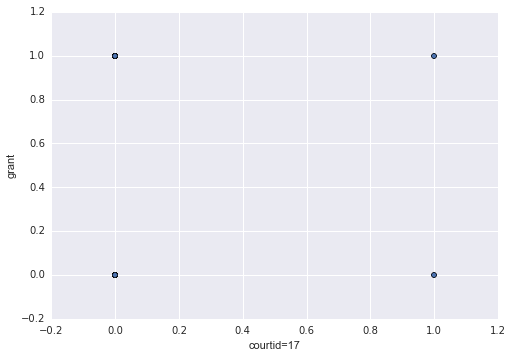

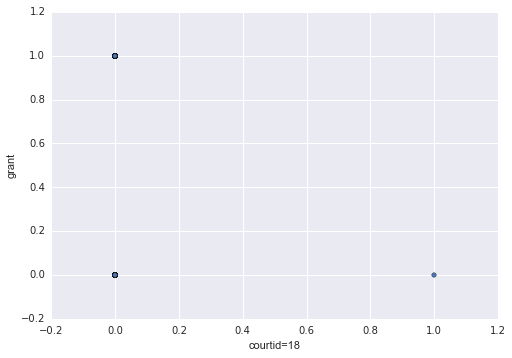

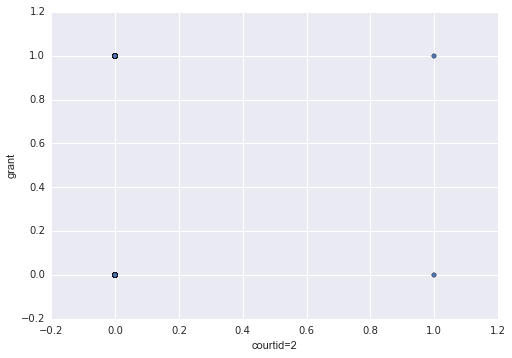

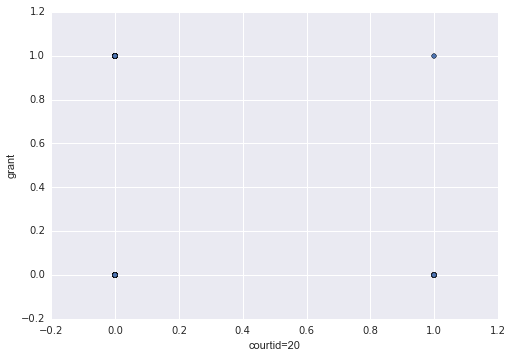

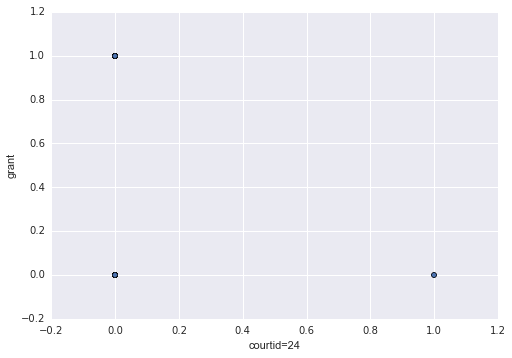

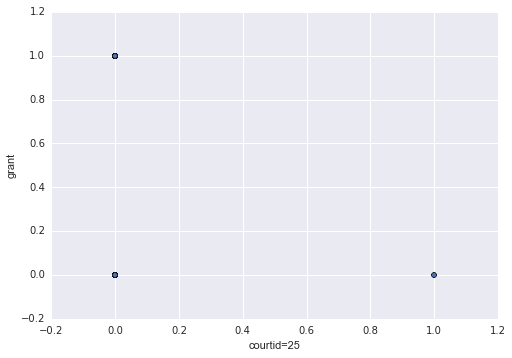

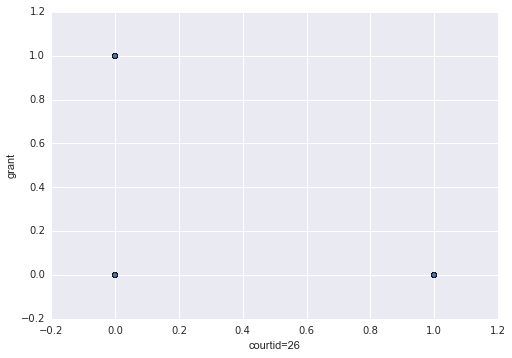

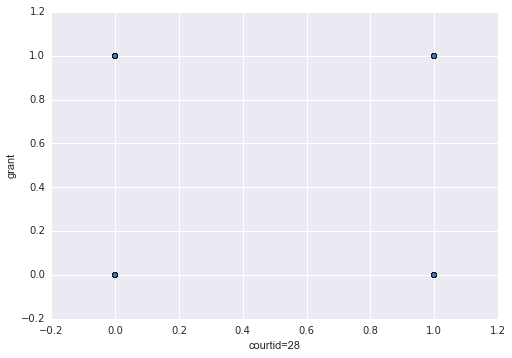

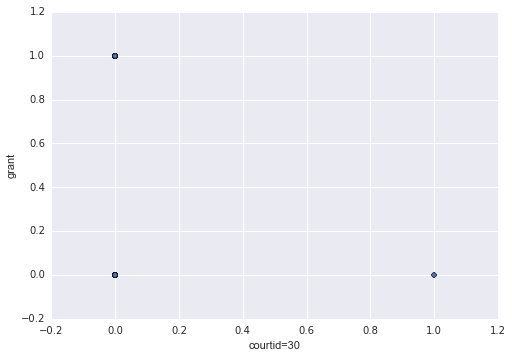

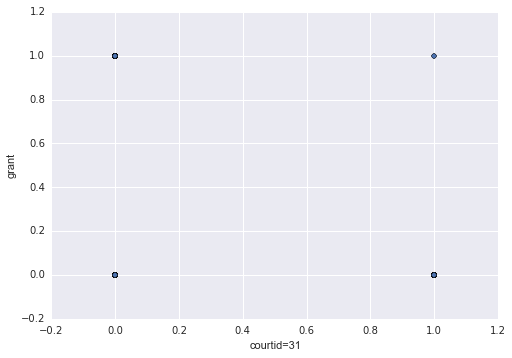

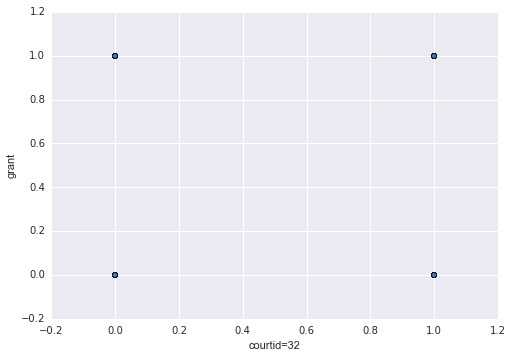

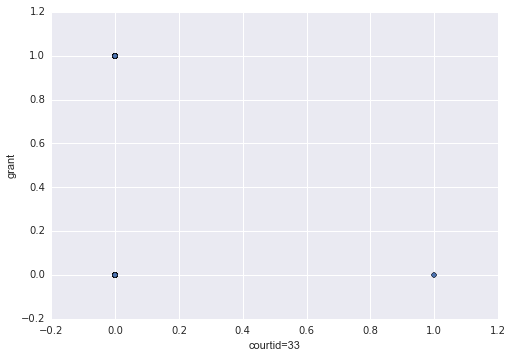

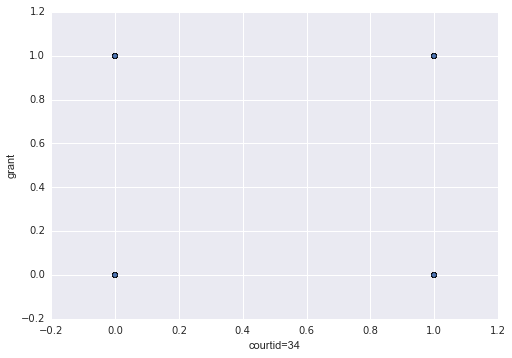

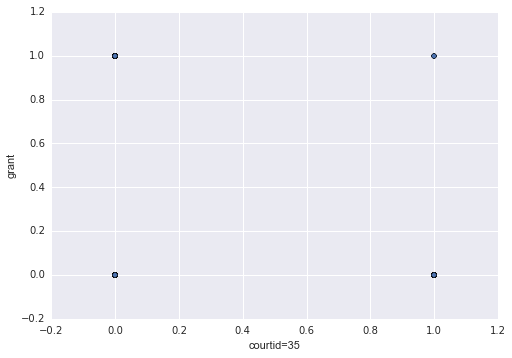

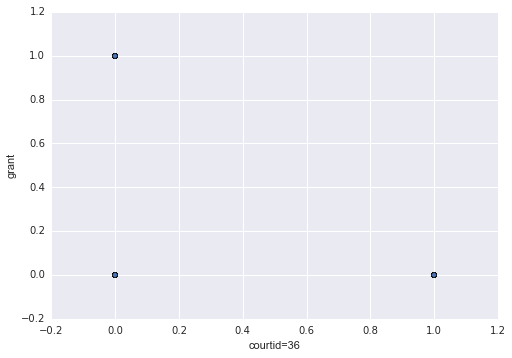

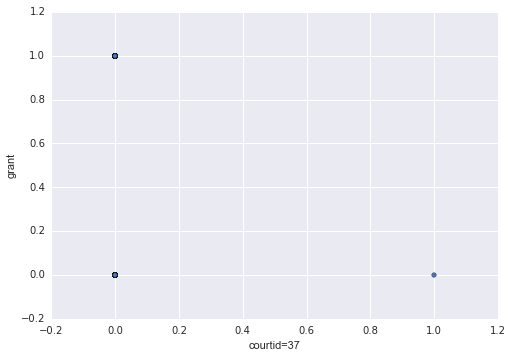

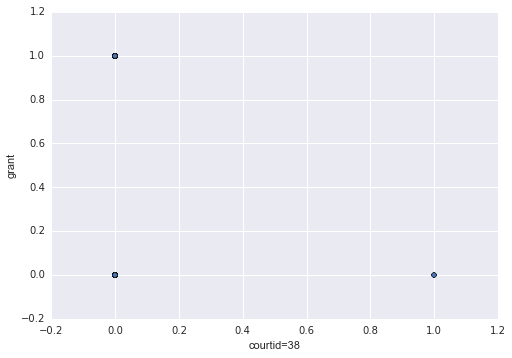

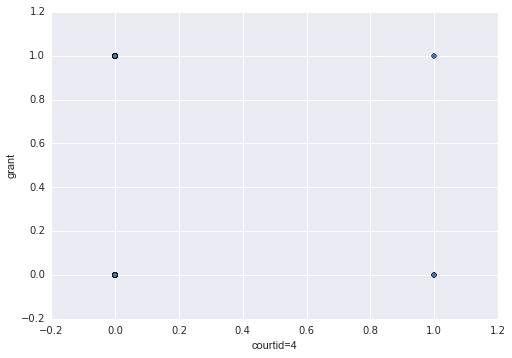

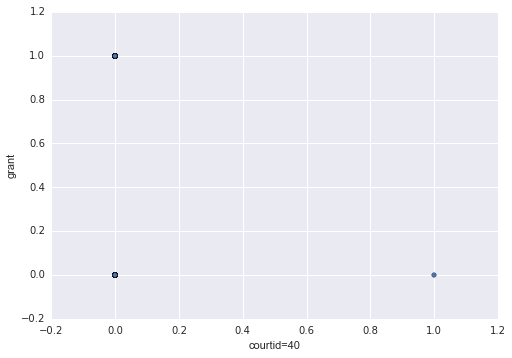

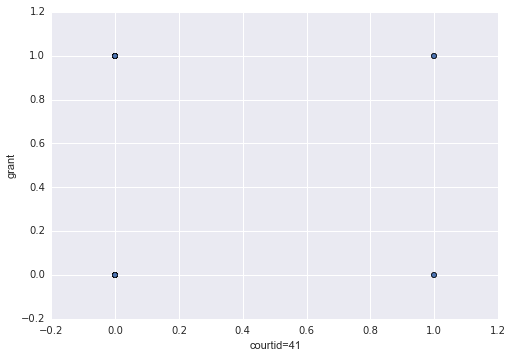

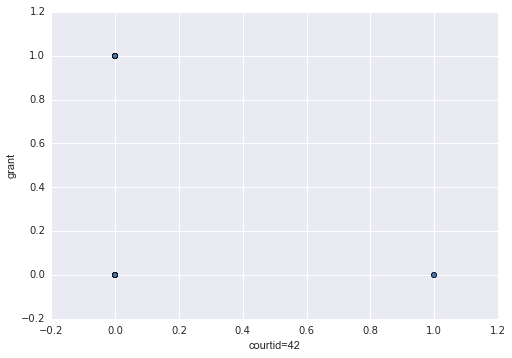

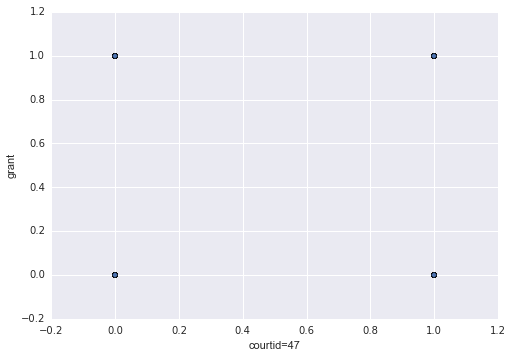

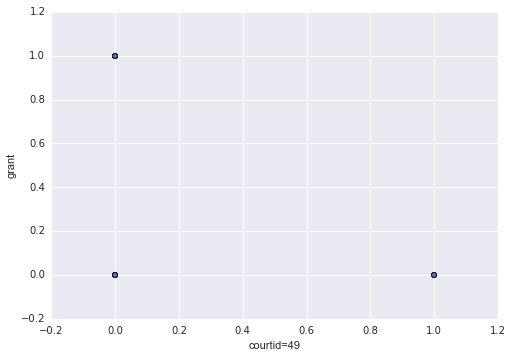

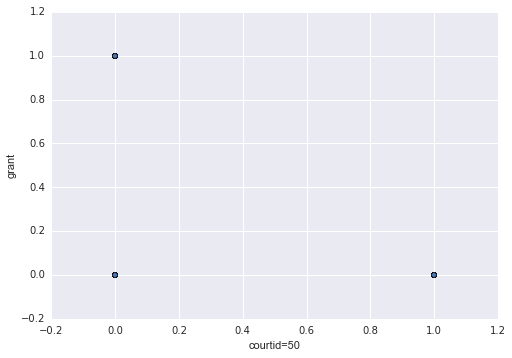

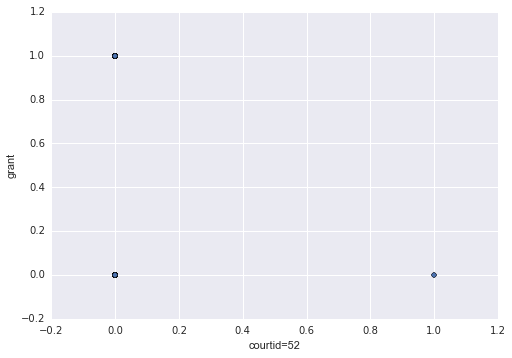

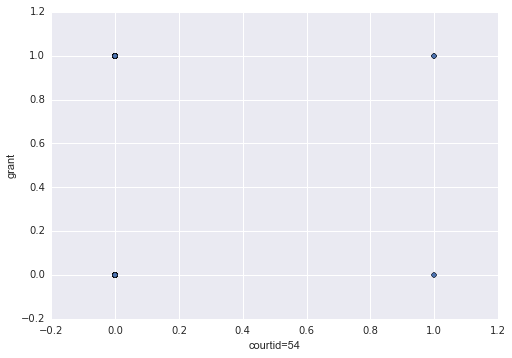

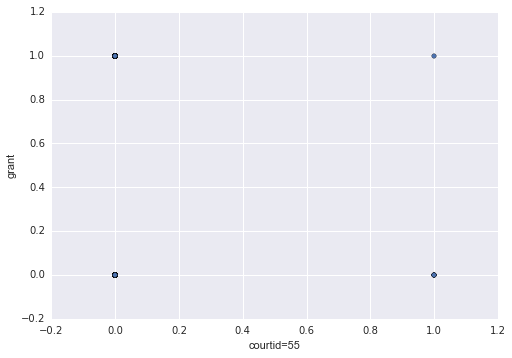

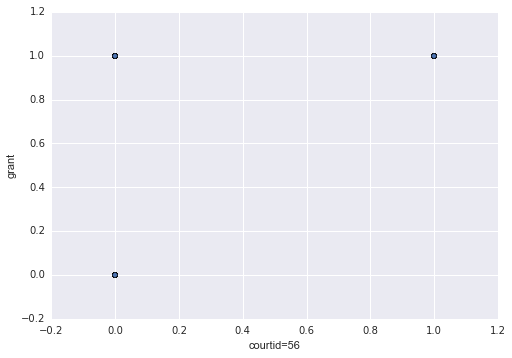

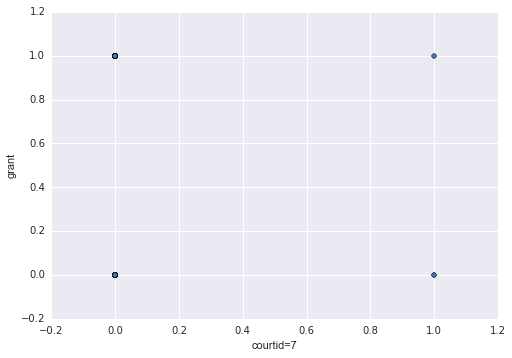

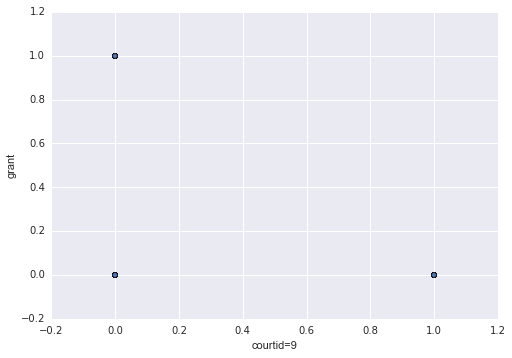

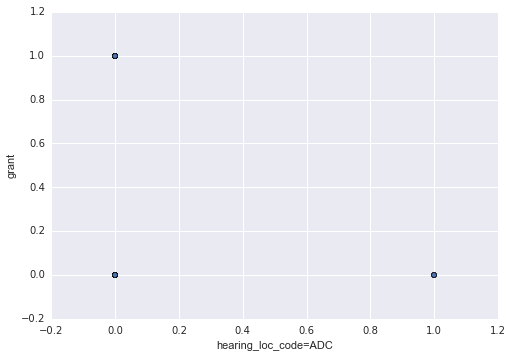

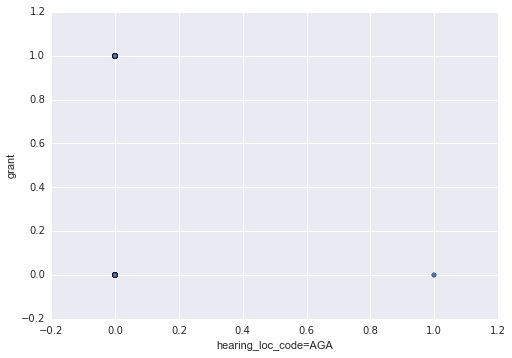

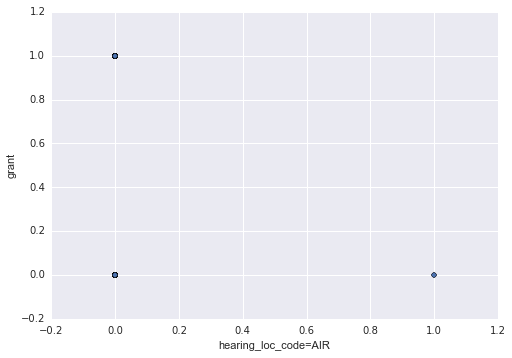

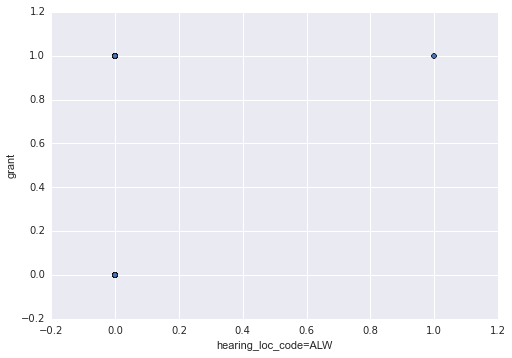

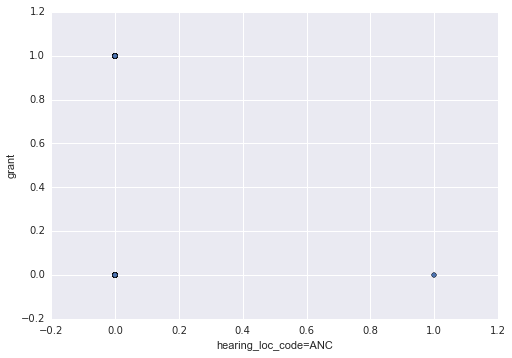

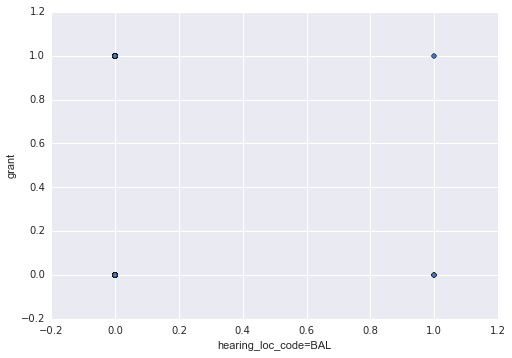

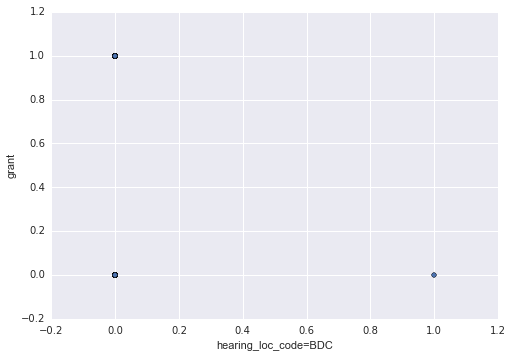

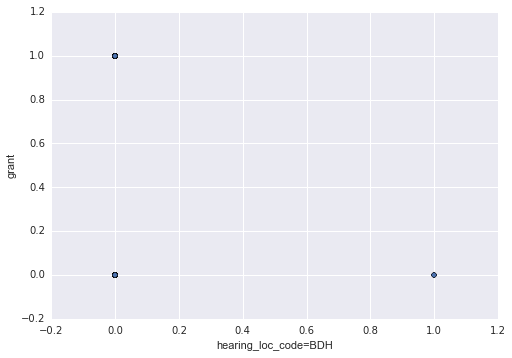

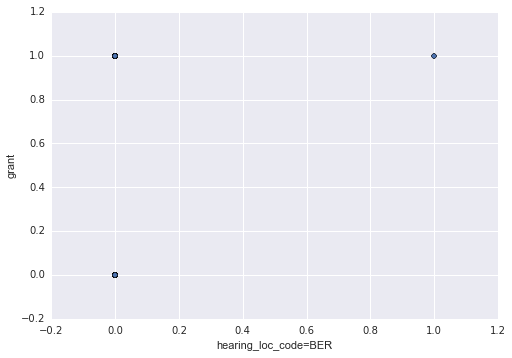

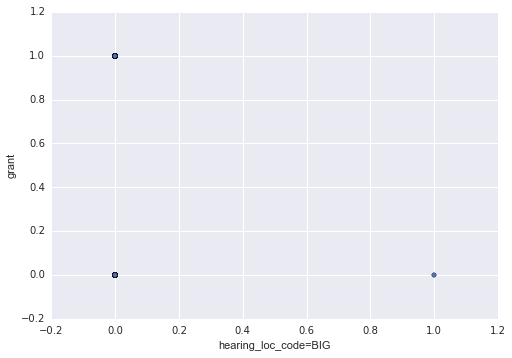

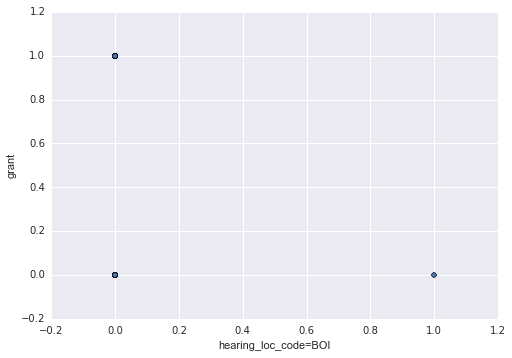

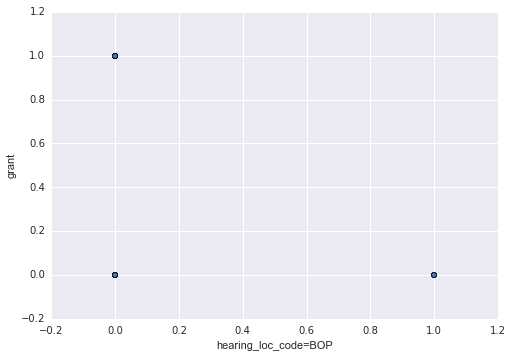

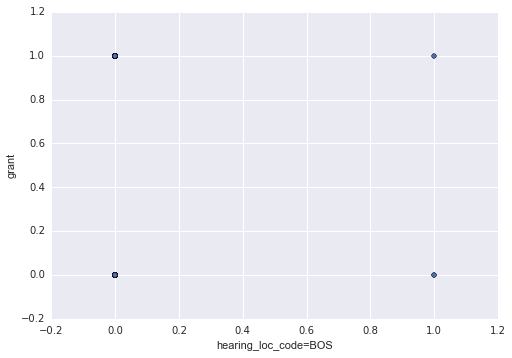

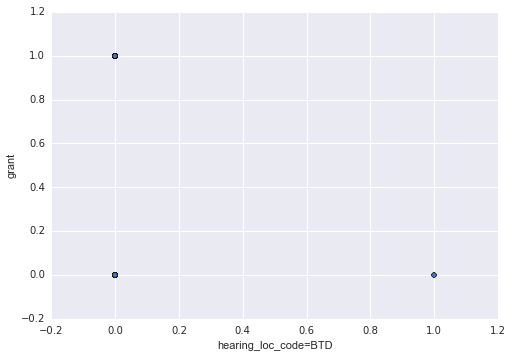

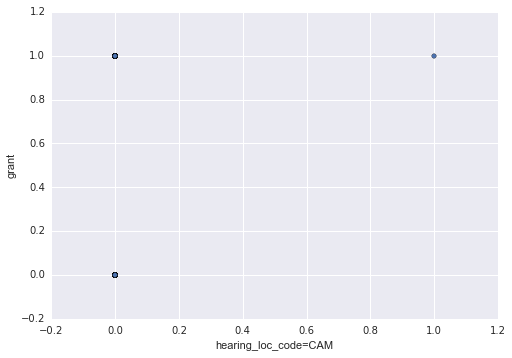

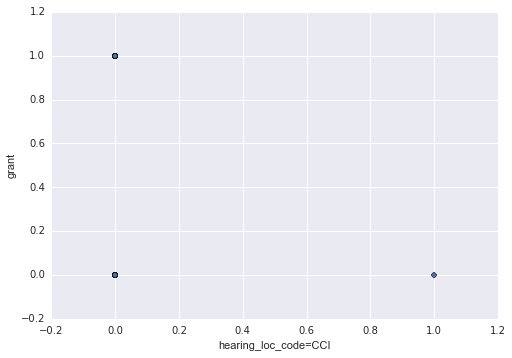

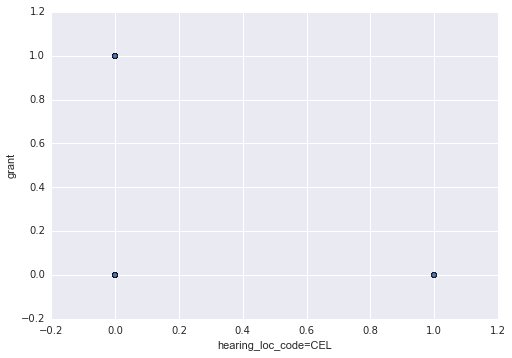

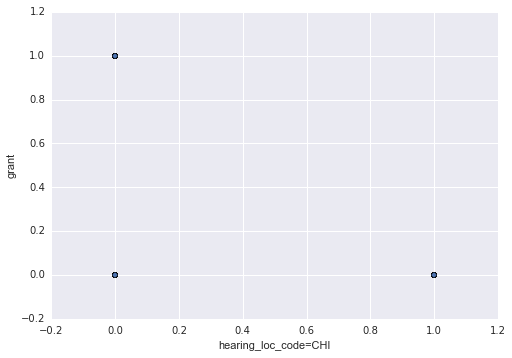

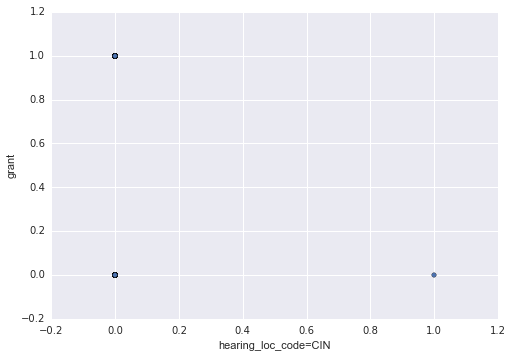

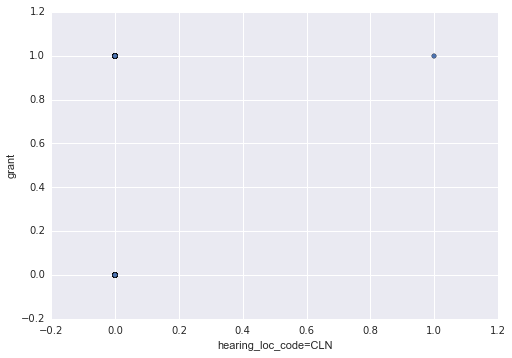

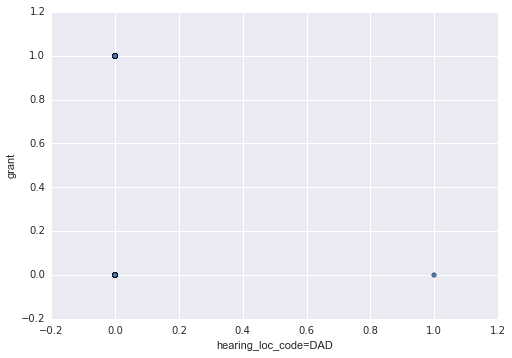

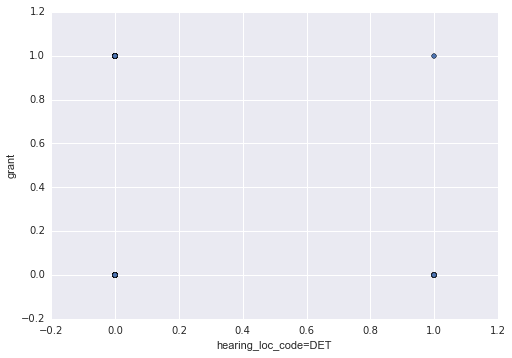

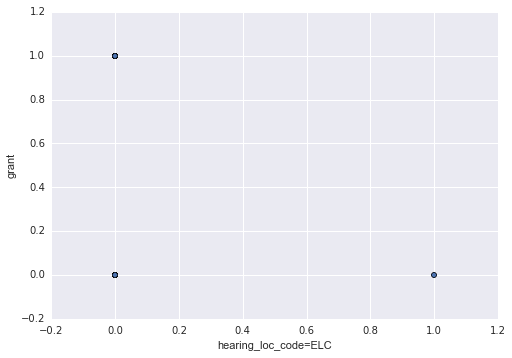

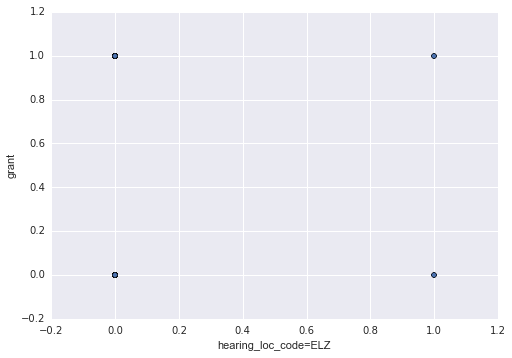

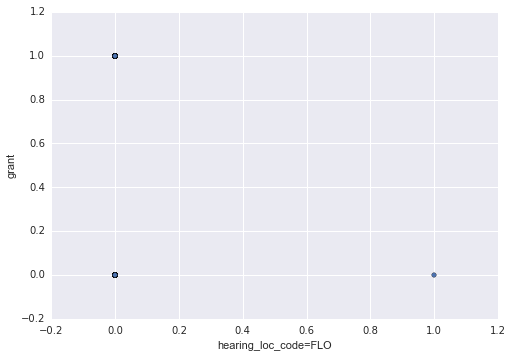

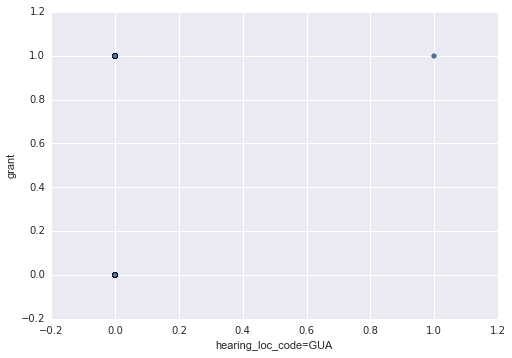

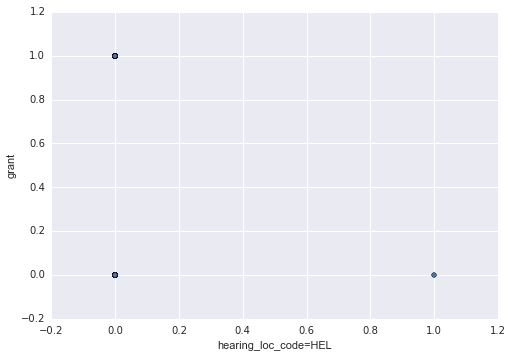

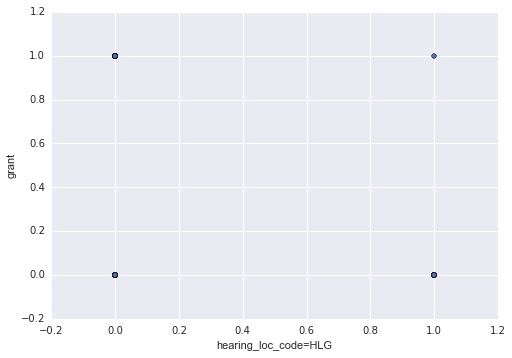

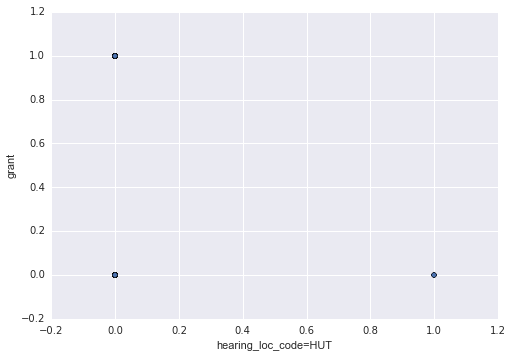

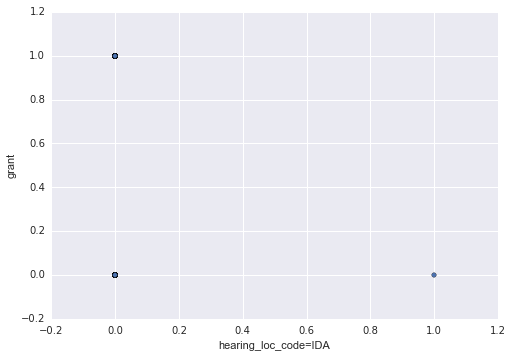

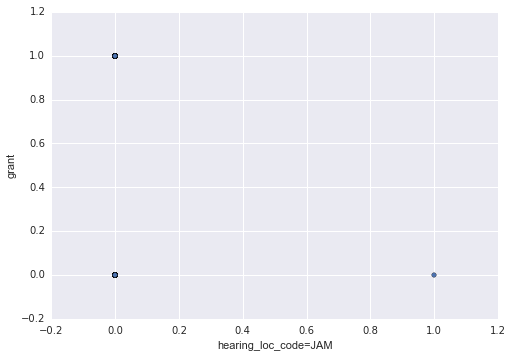

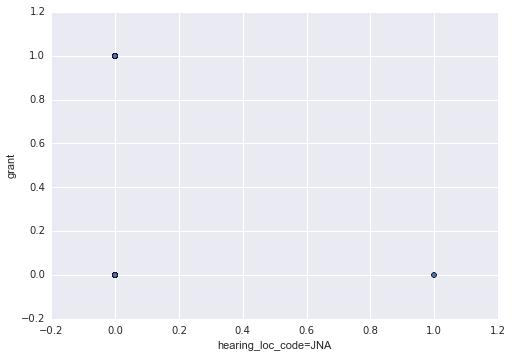

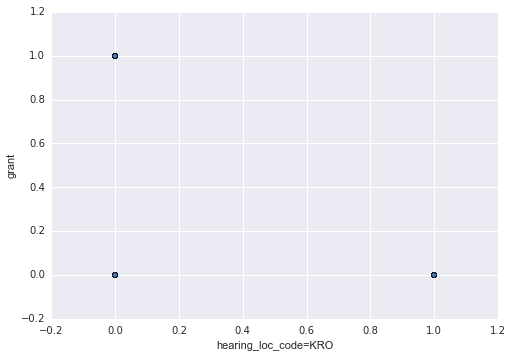

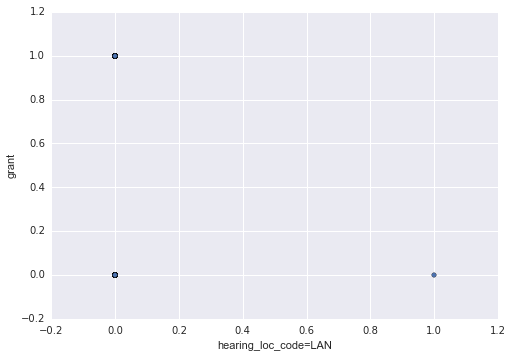

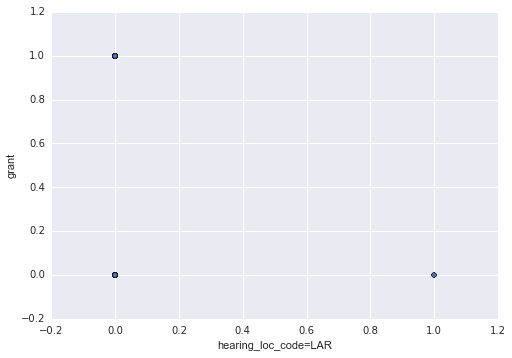

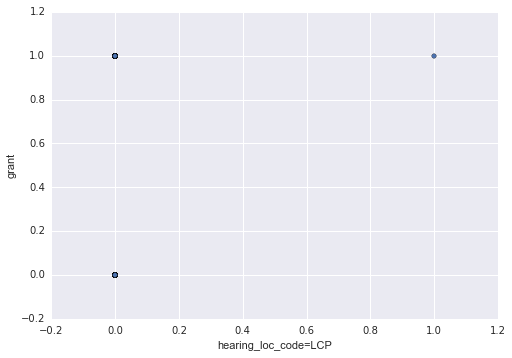

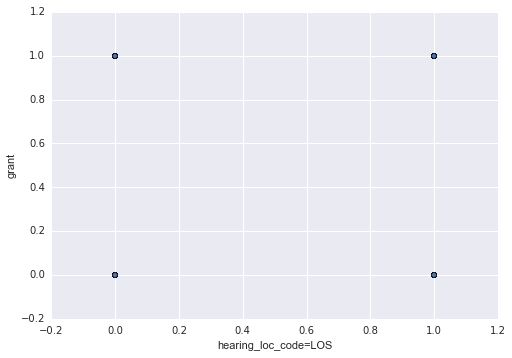

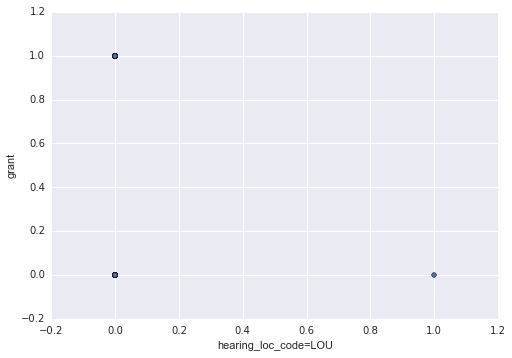

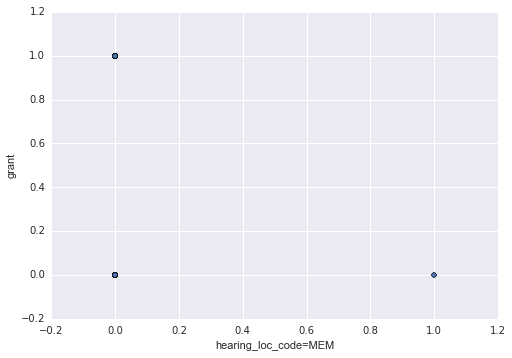

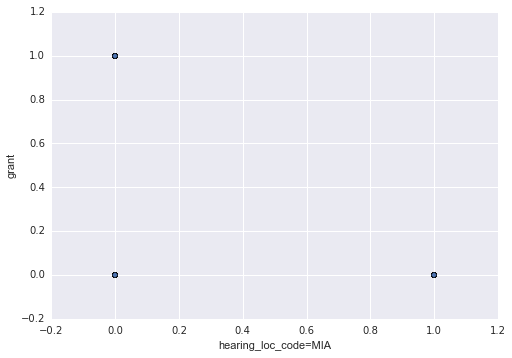

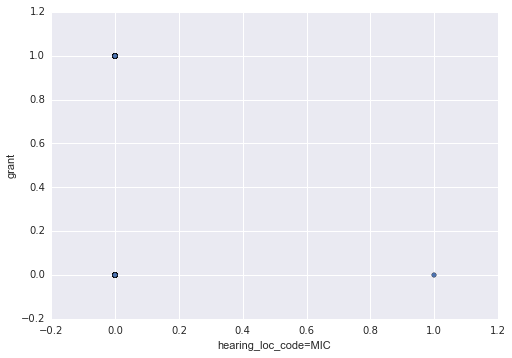

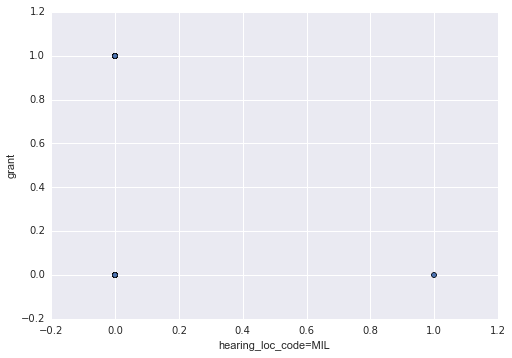

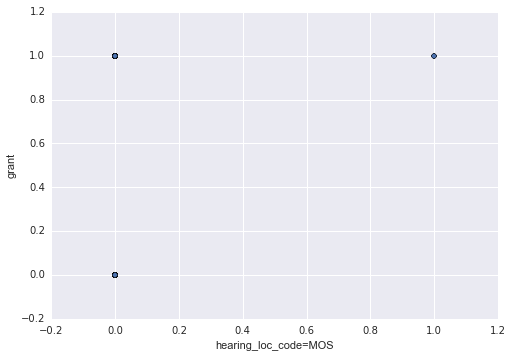

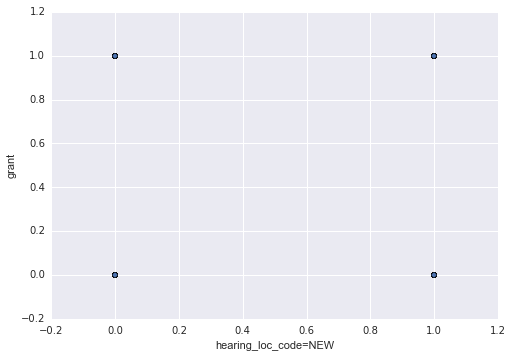

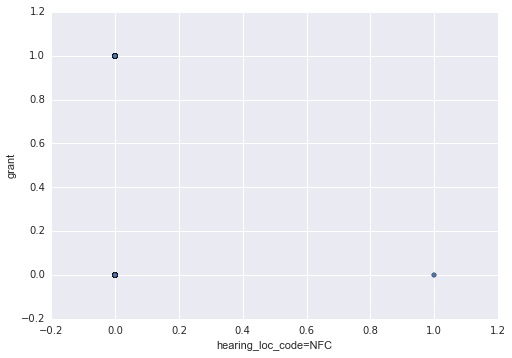

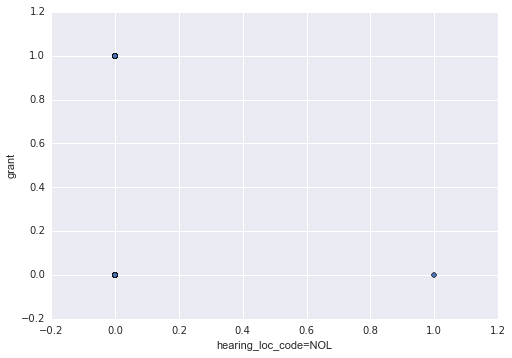

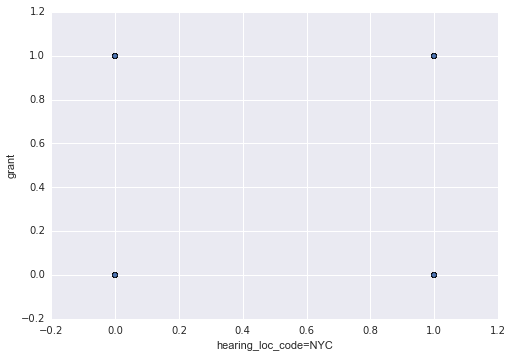

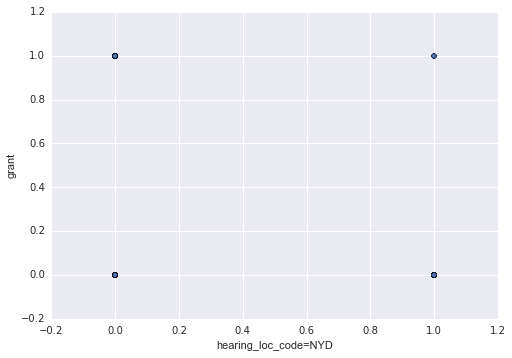

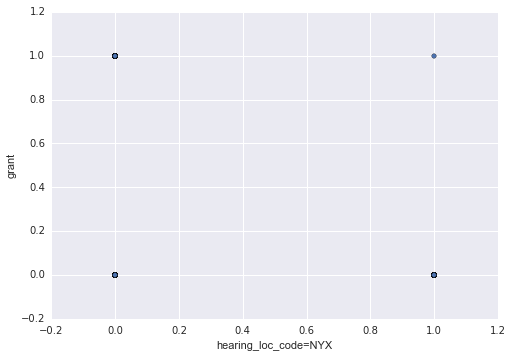

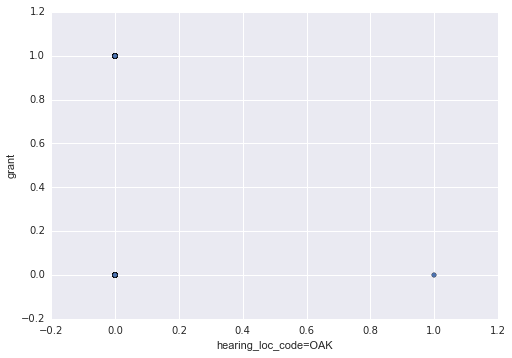

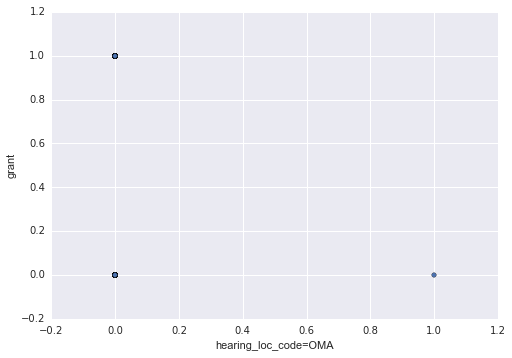

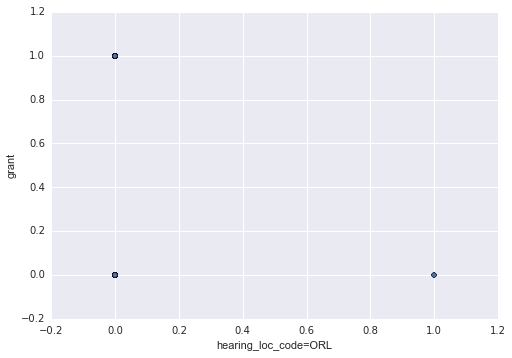

In [37]:
for i in range(201,400):
    df_plot = df_prof[['grant',dummy_columns[i]]]
    df_plot.plot(kind='scatter', x=dummy_columns[i], y='grant')

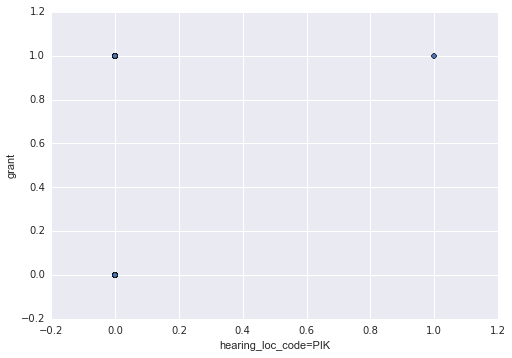

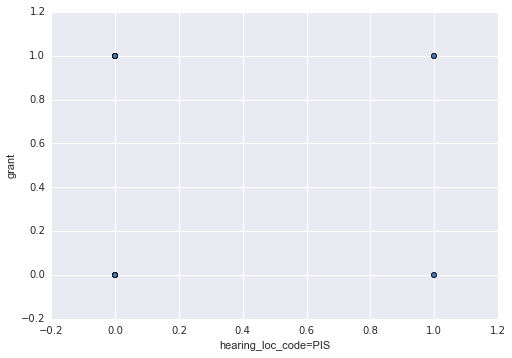

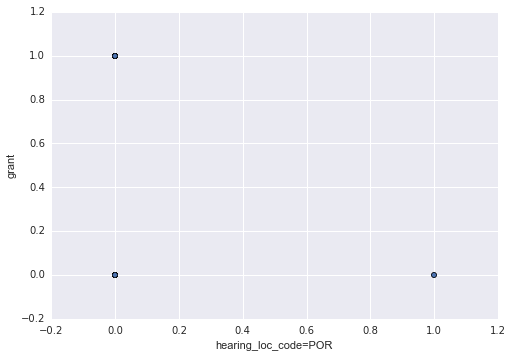

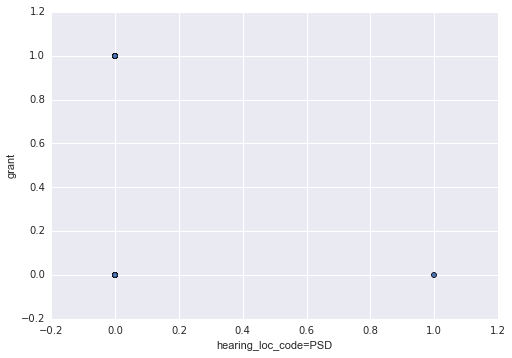

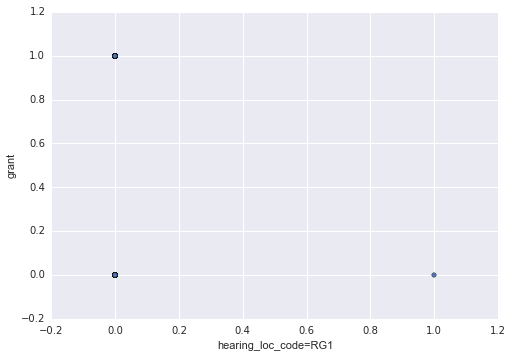

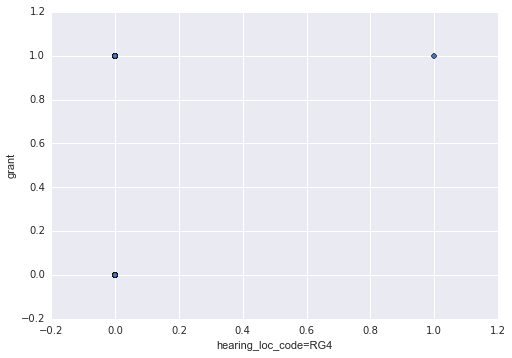

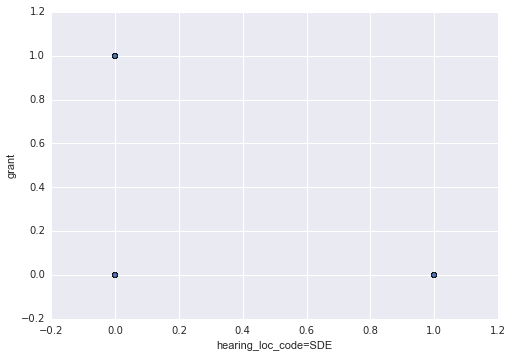

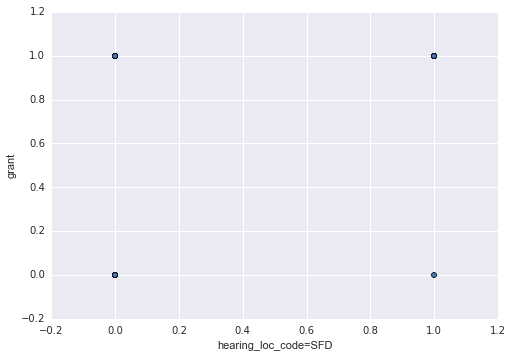

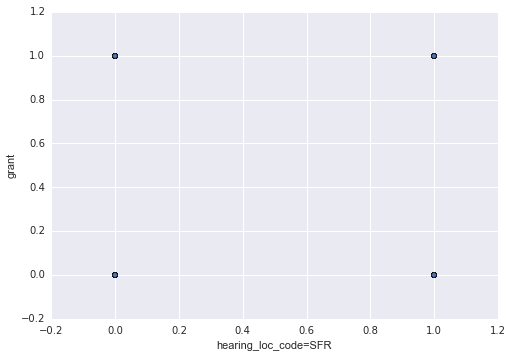

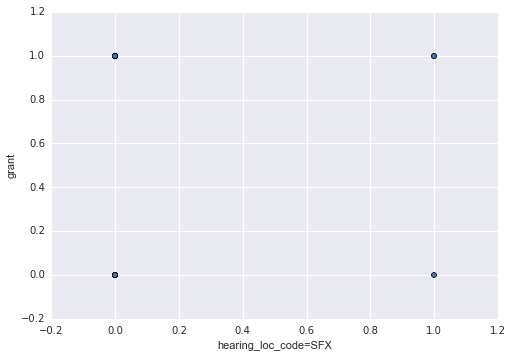

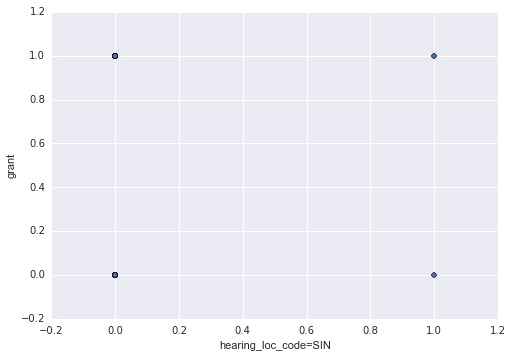

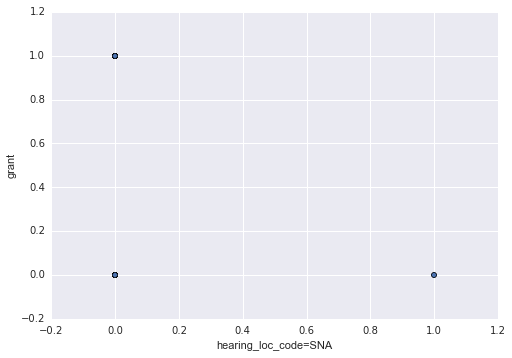

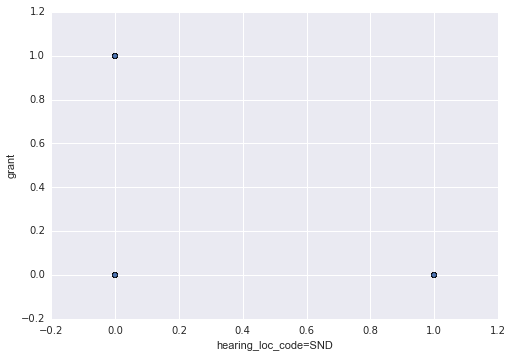

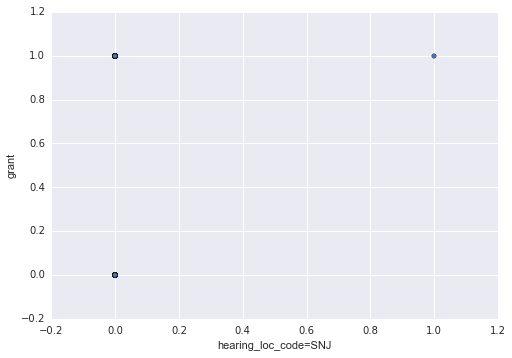

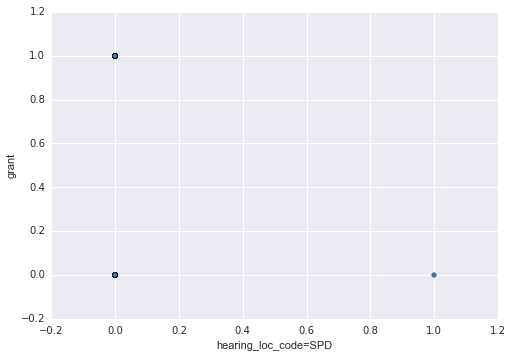

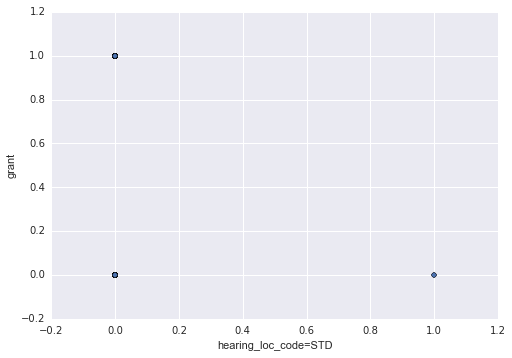

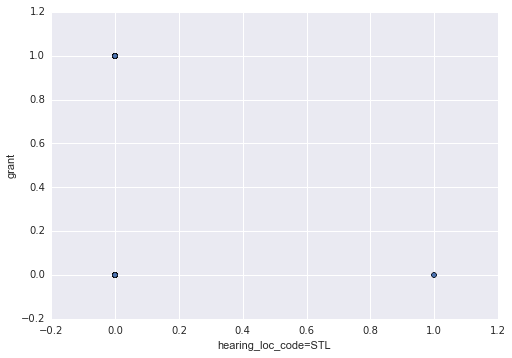

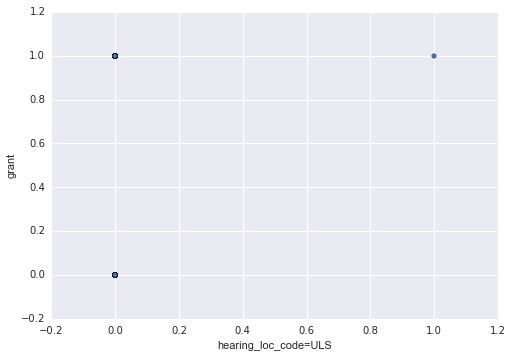

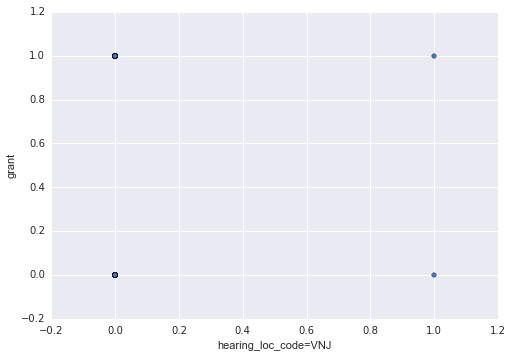

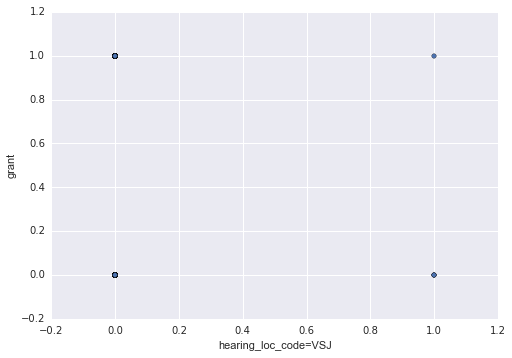

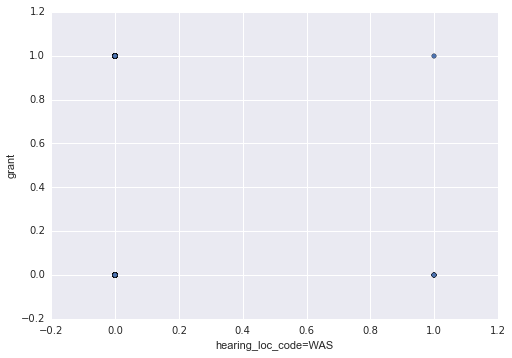

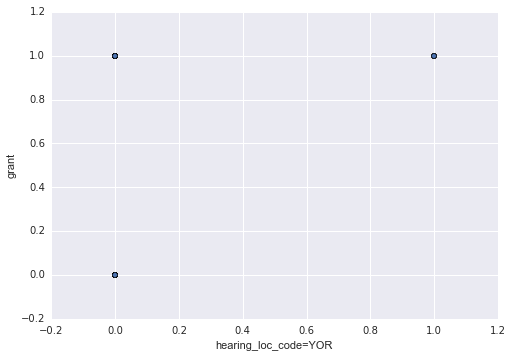

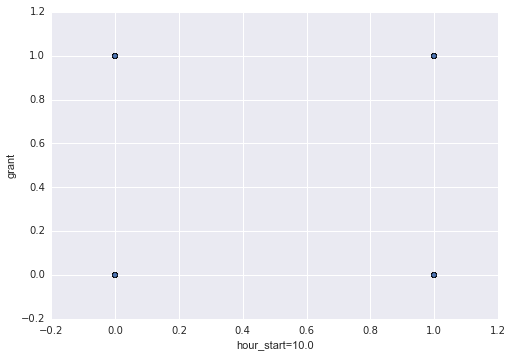

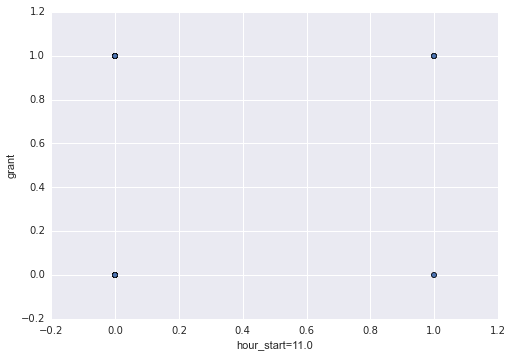

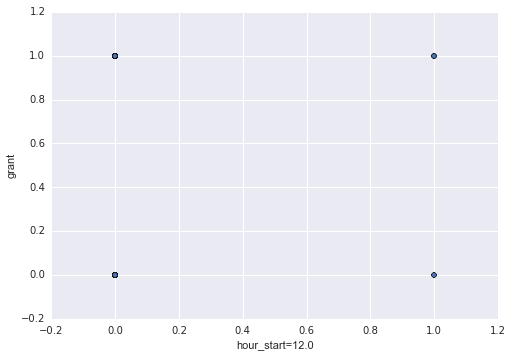

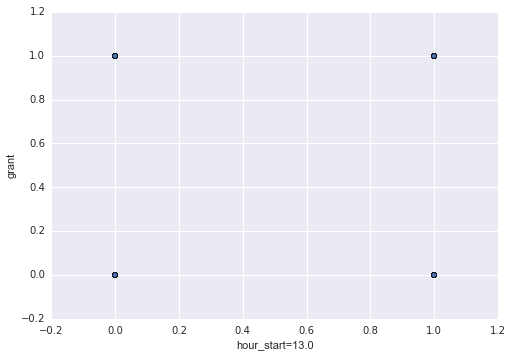

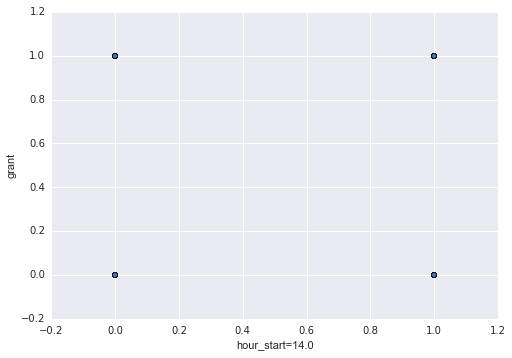

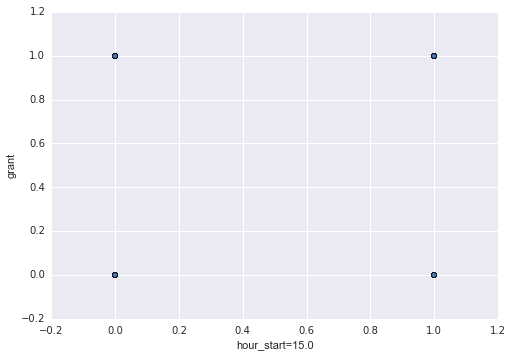

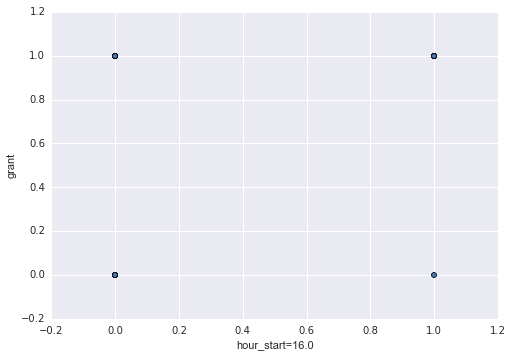

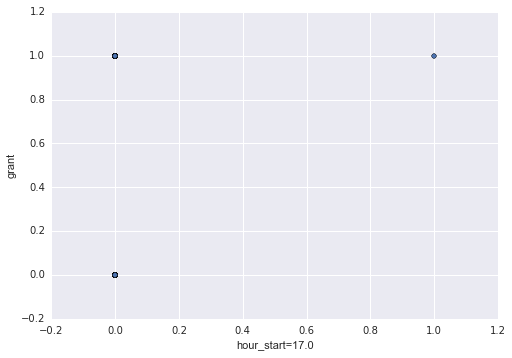

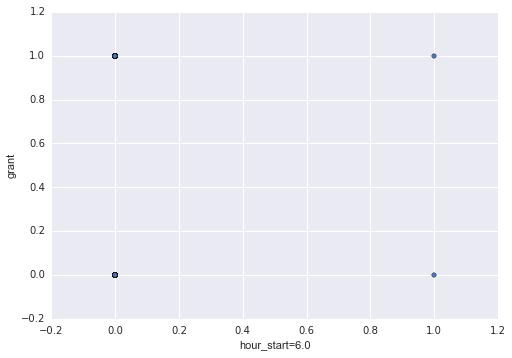

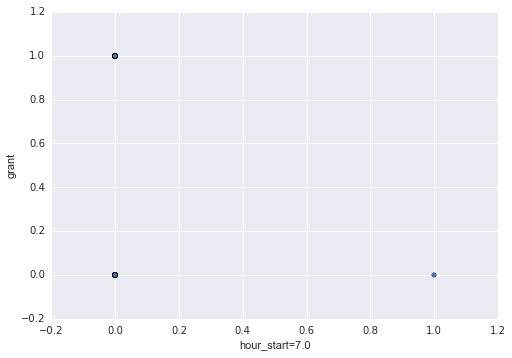

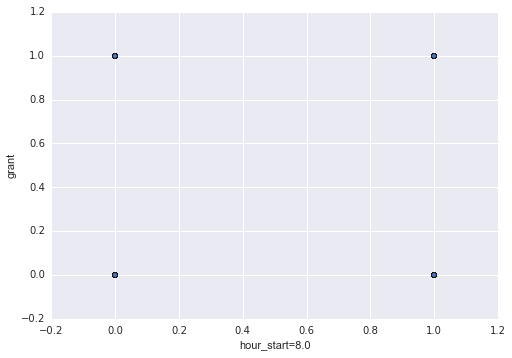

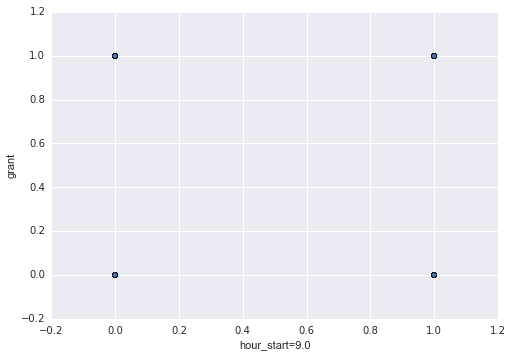

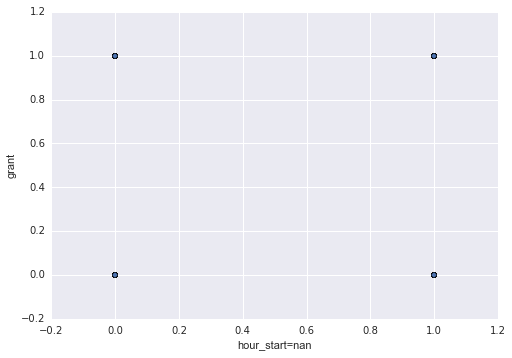

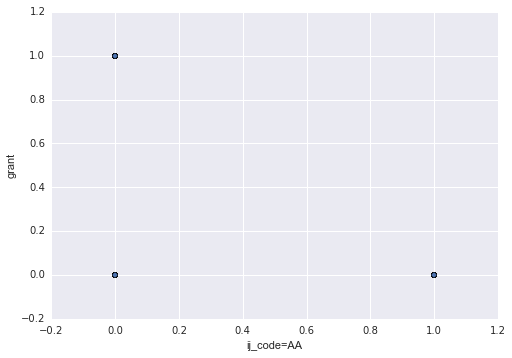

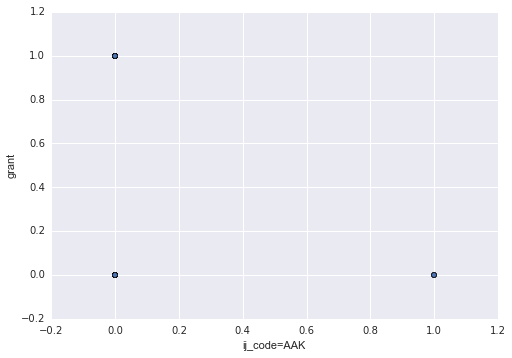

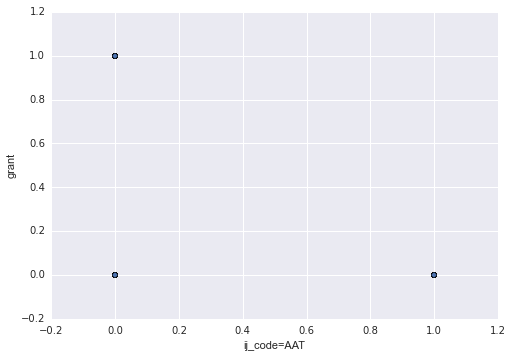

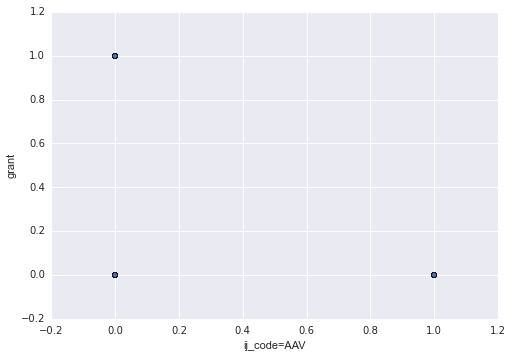

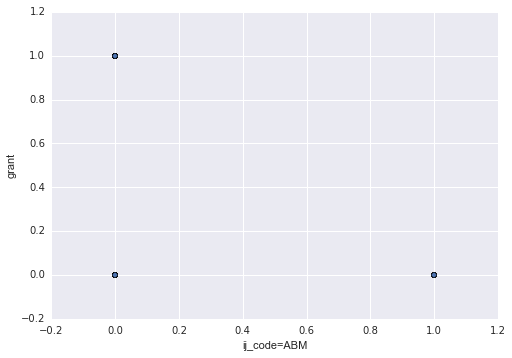

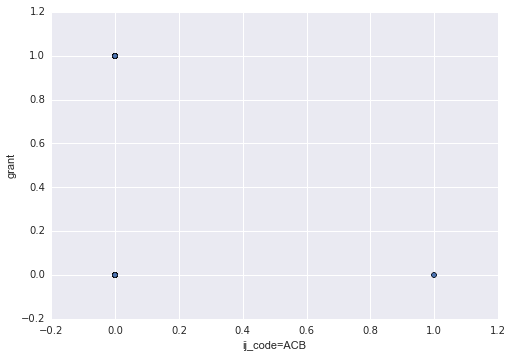

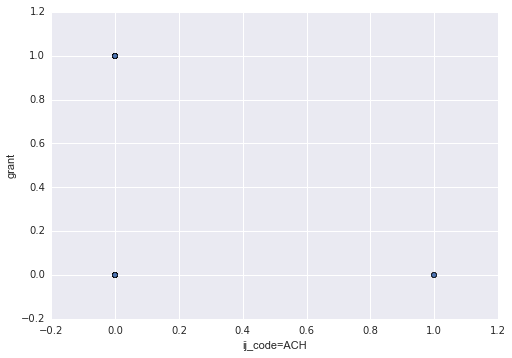

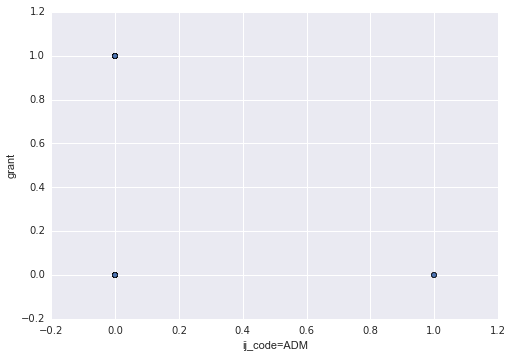

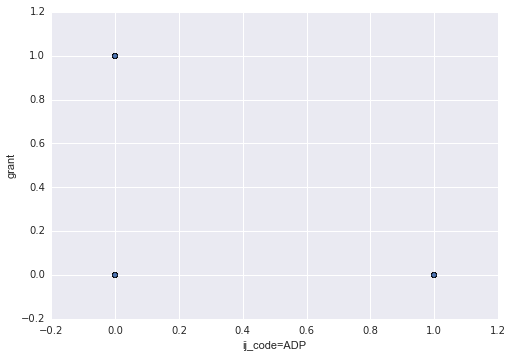

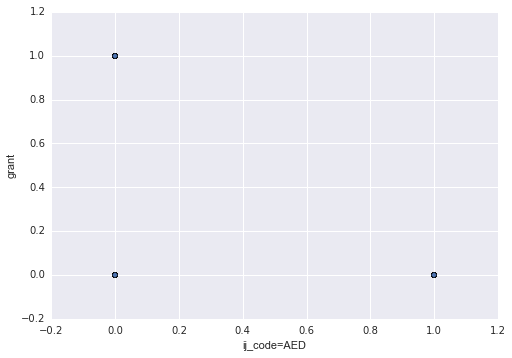

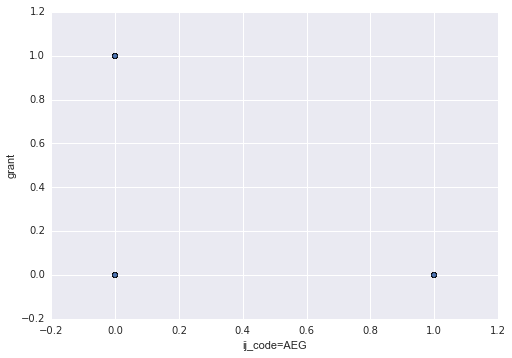

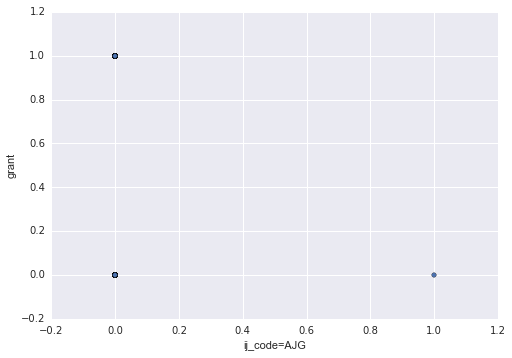

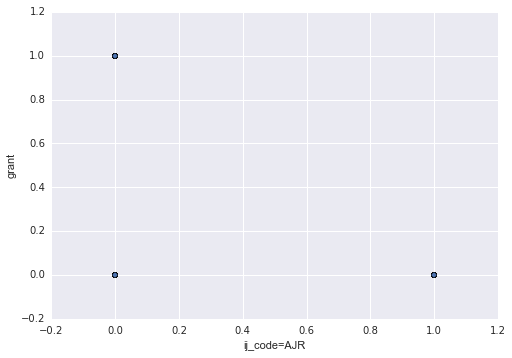

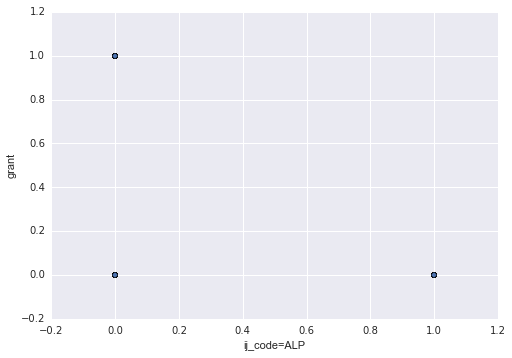

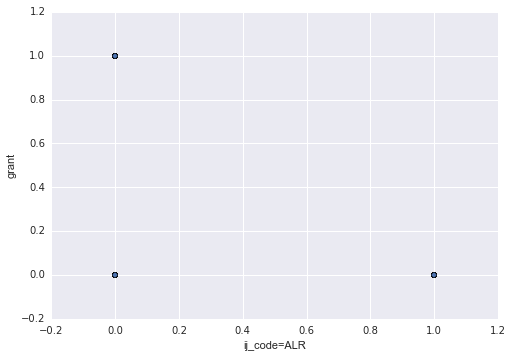

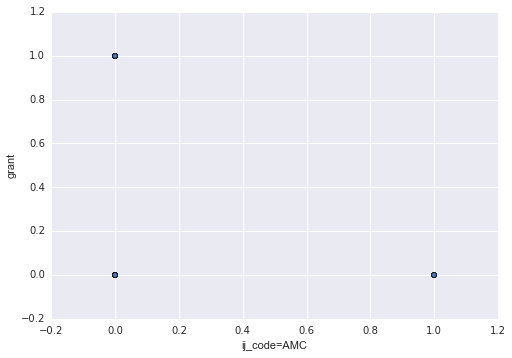

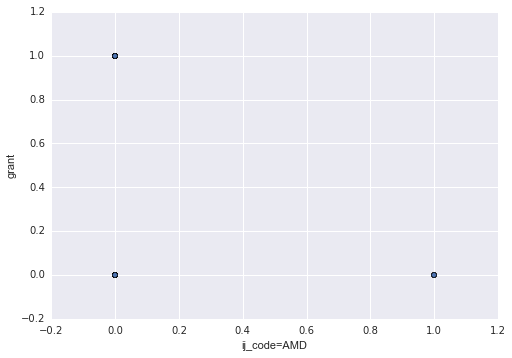

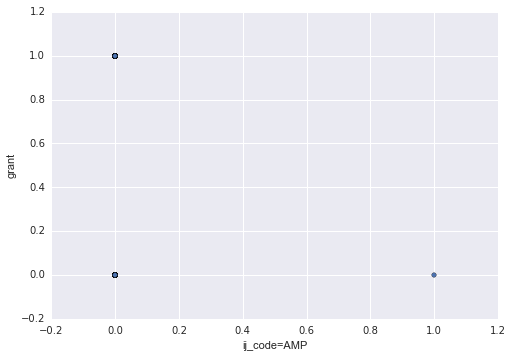

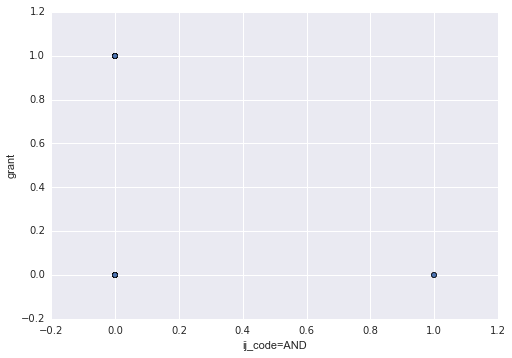

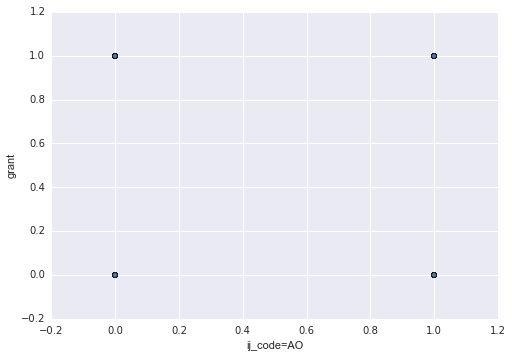

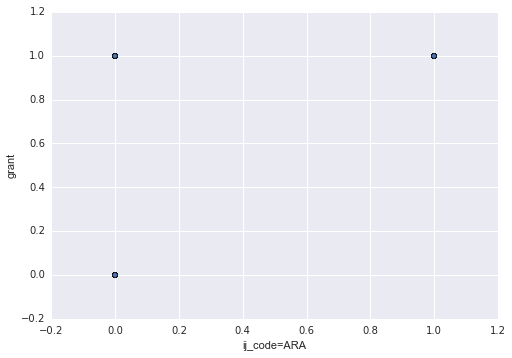

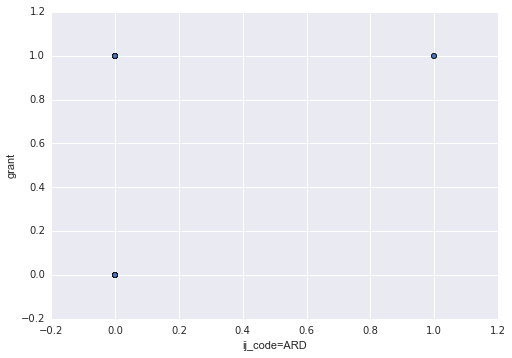

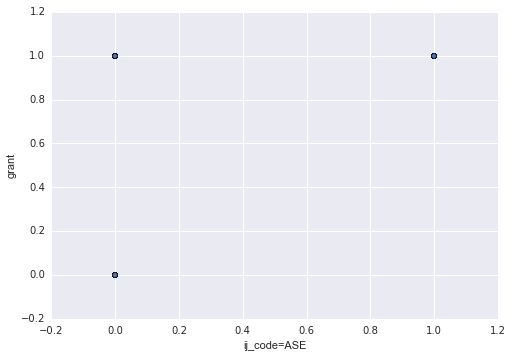

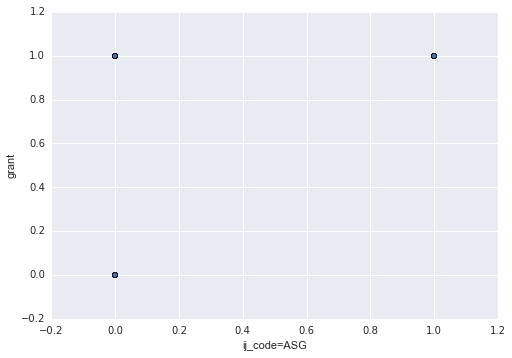

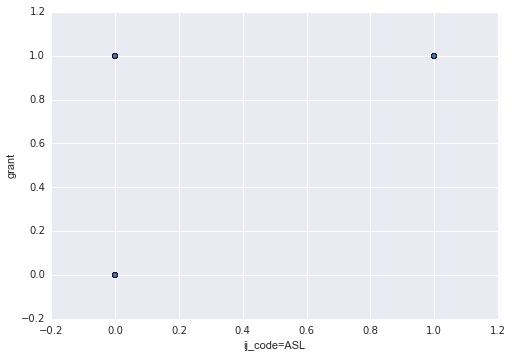

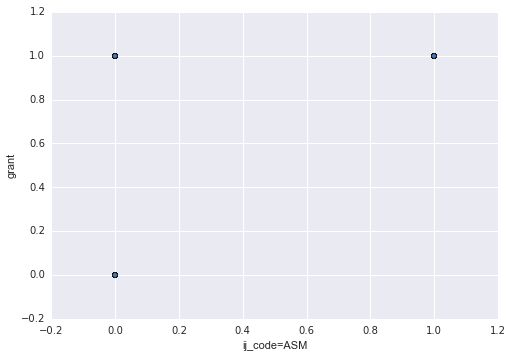

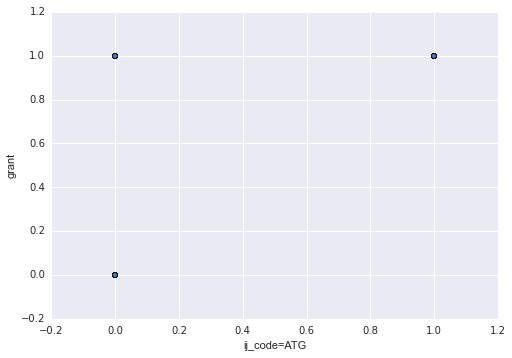

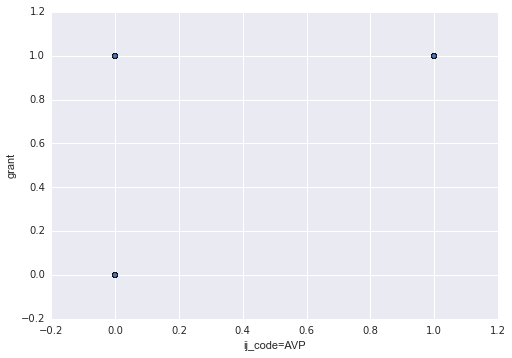

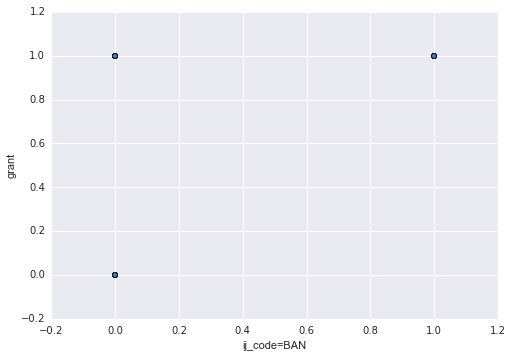

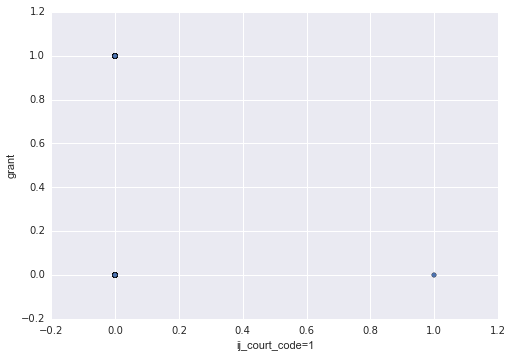

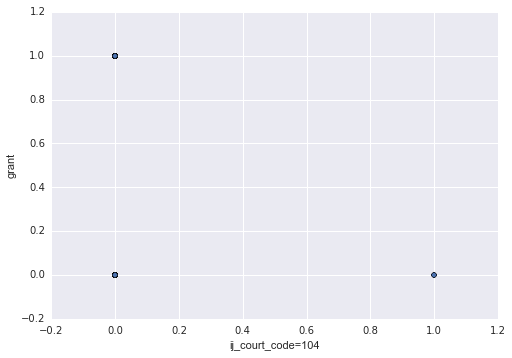

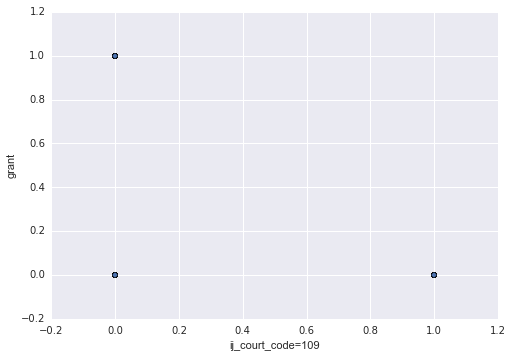

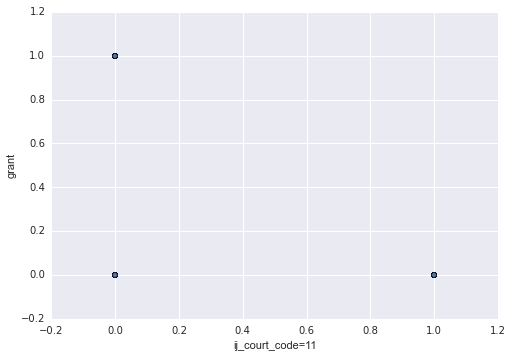

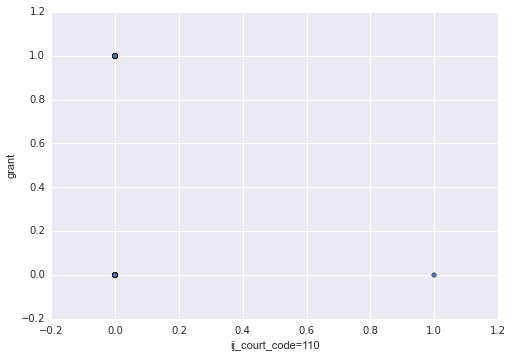

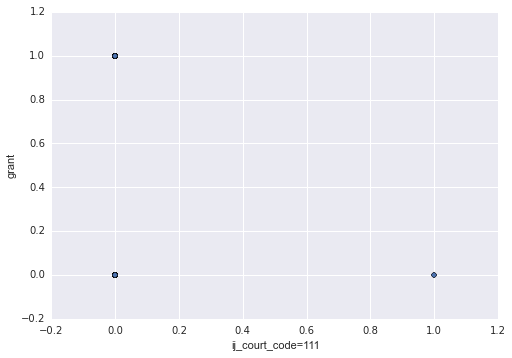

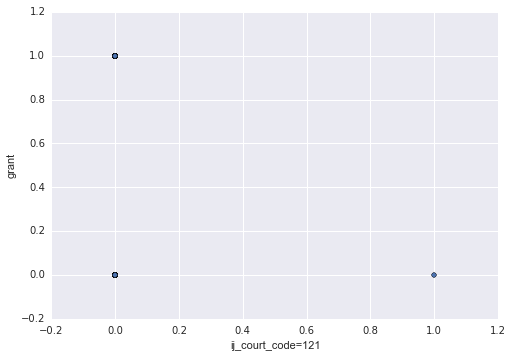

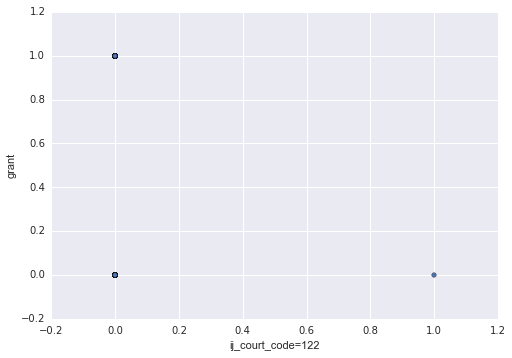

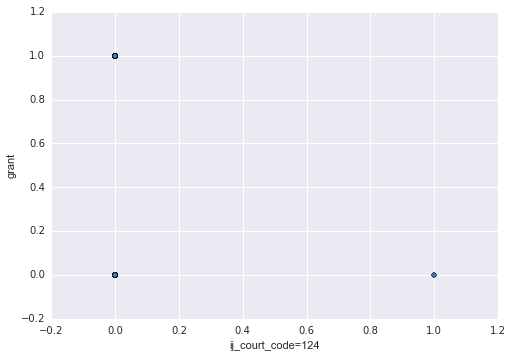

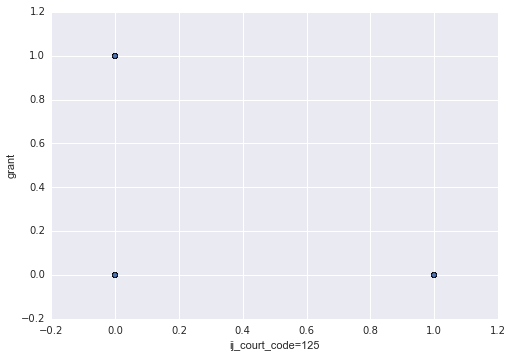

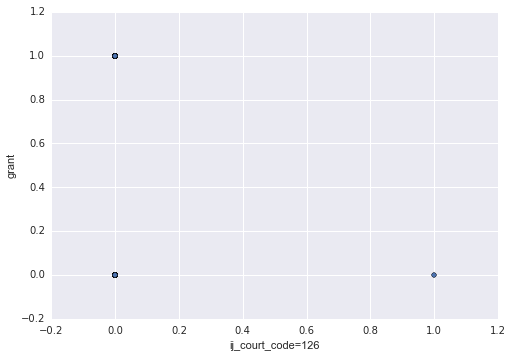

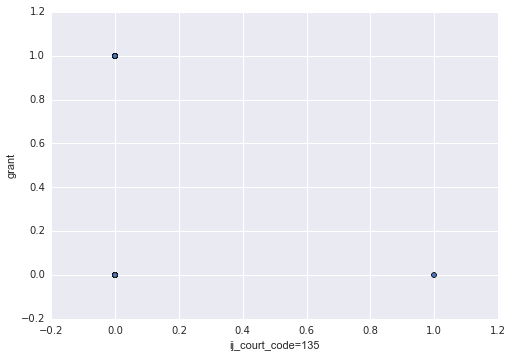

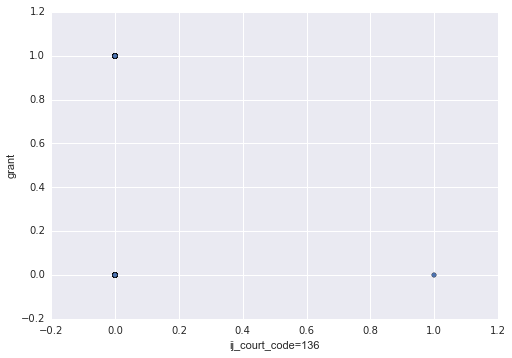

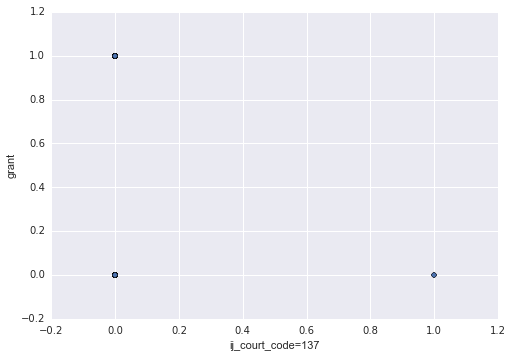

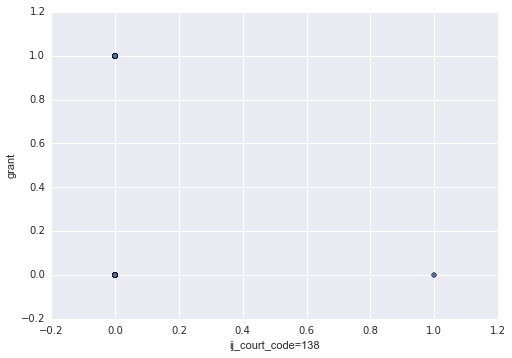

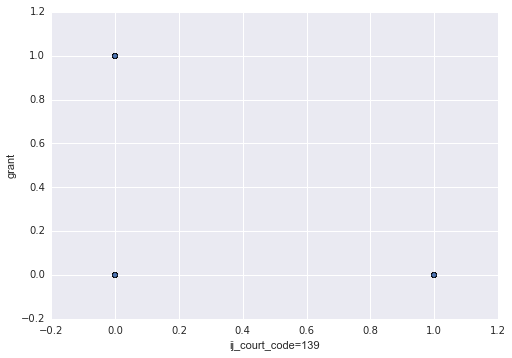

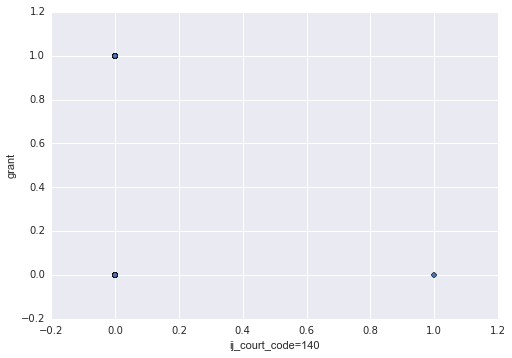

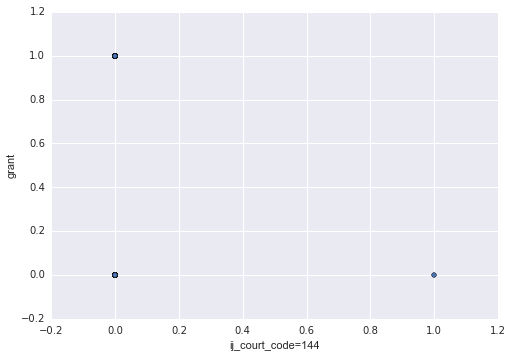

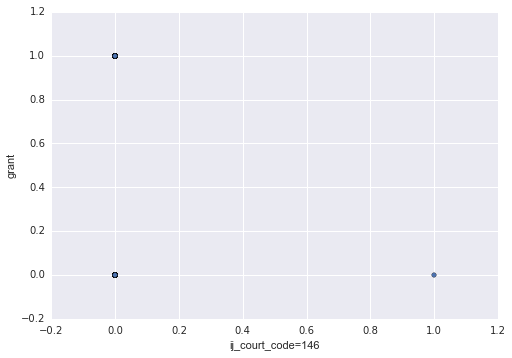

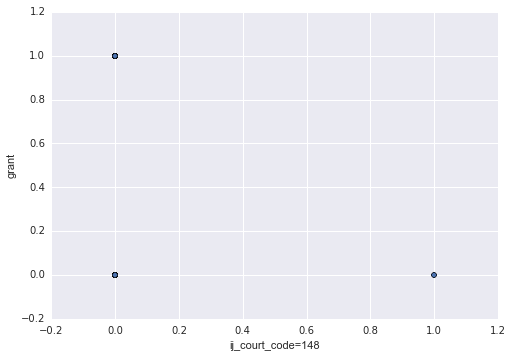

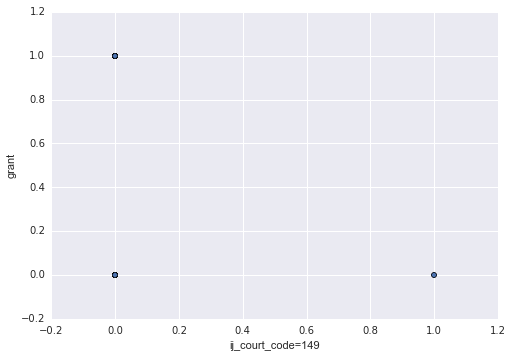

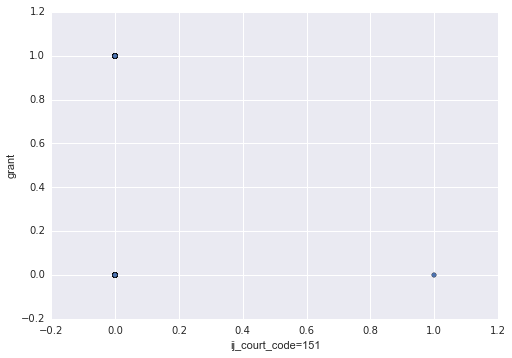

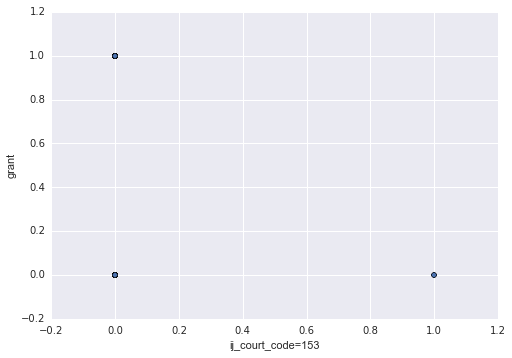

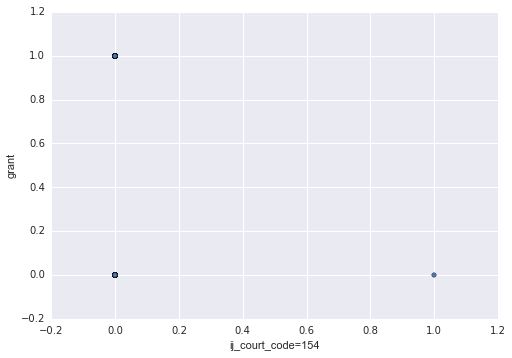

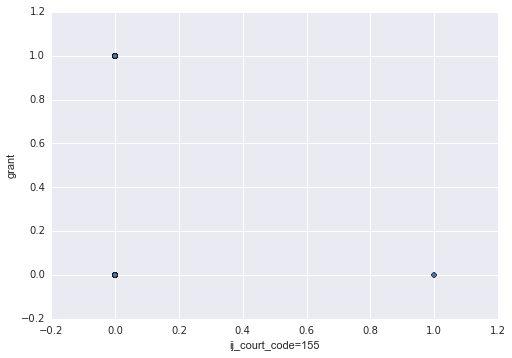

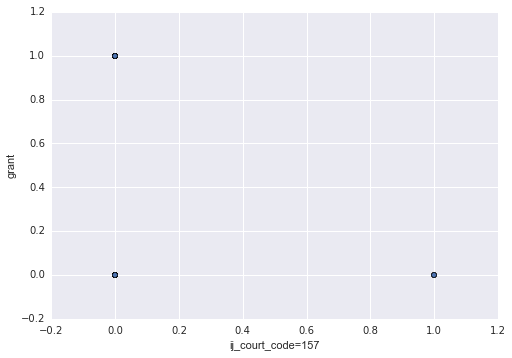

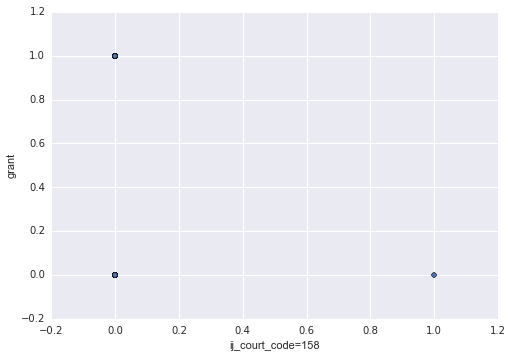

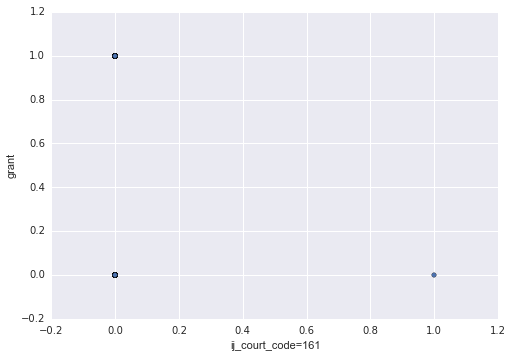

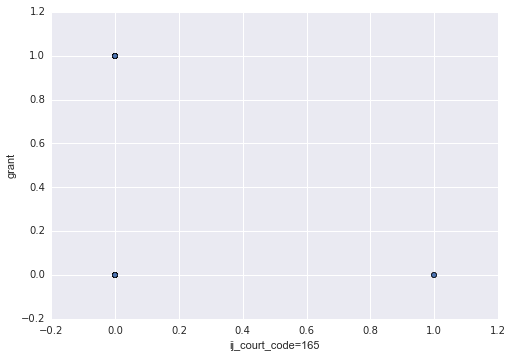

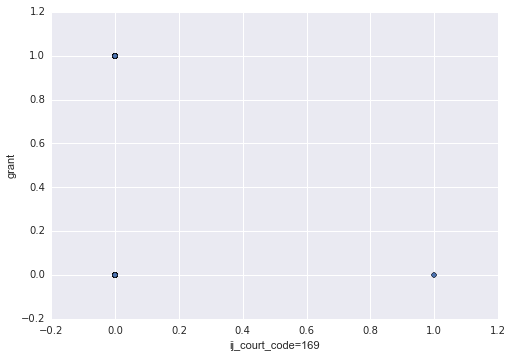

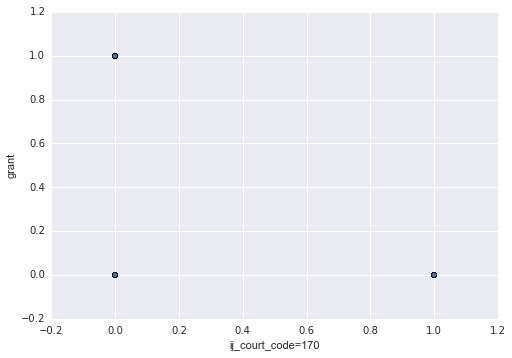

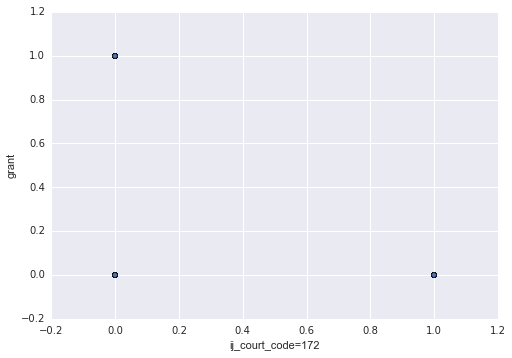

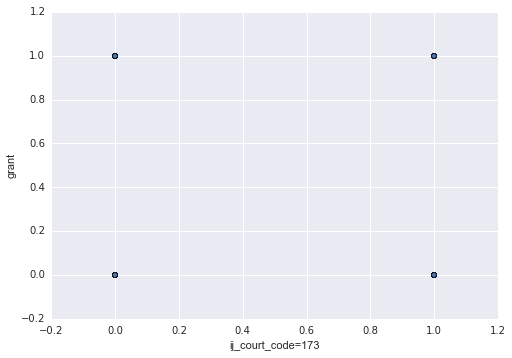

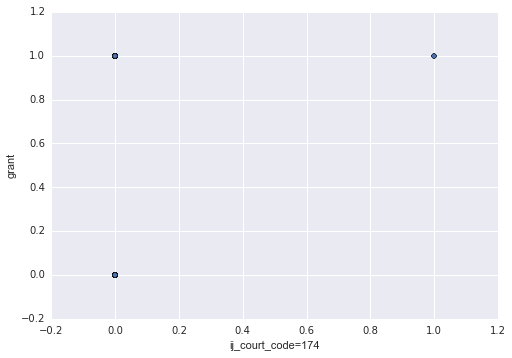

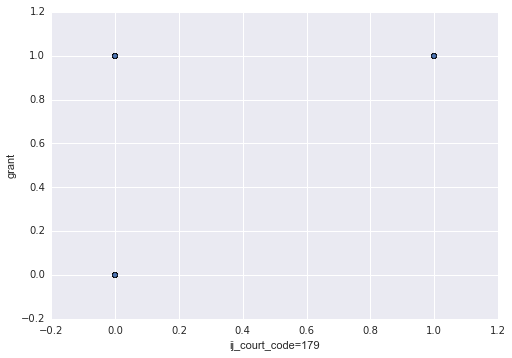

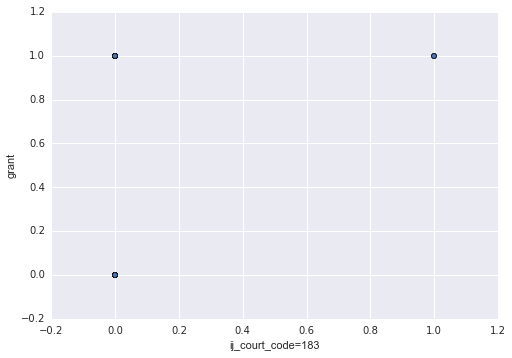

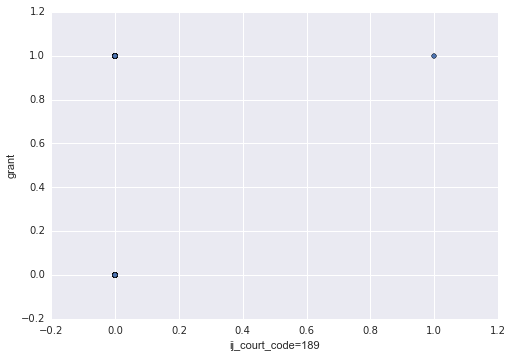

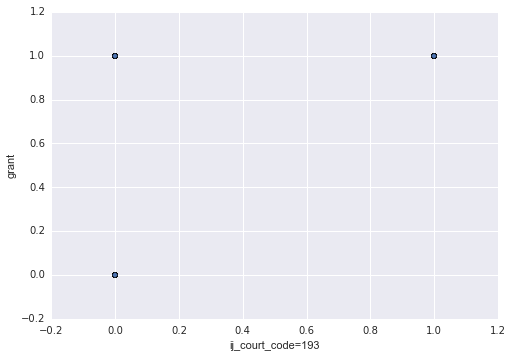

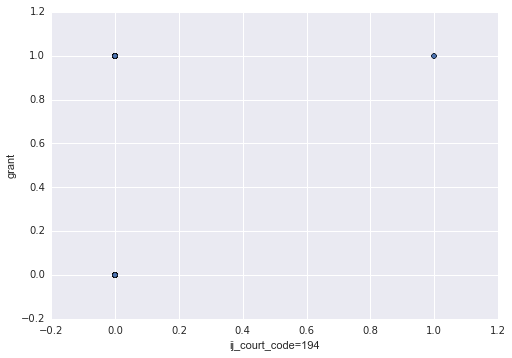

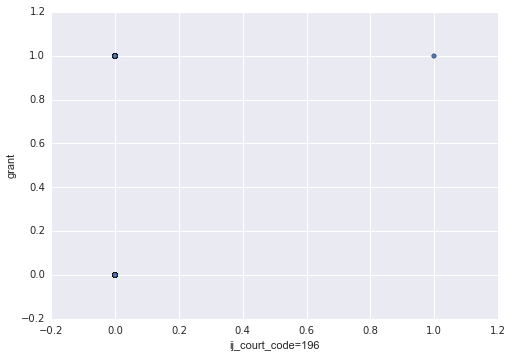

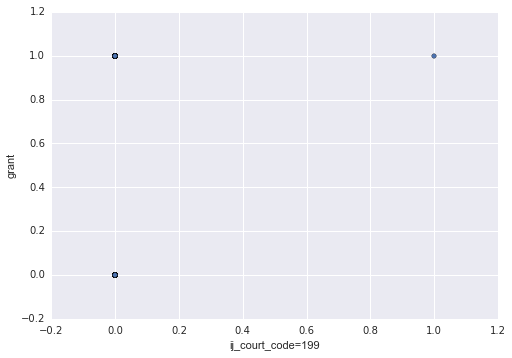

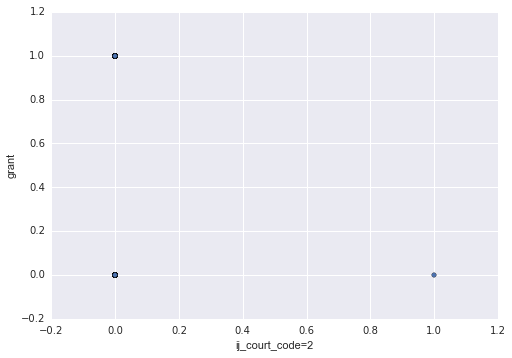

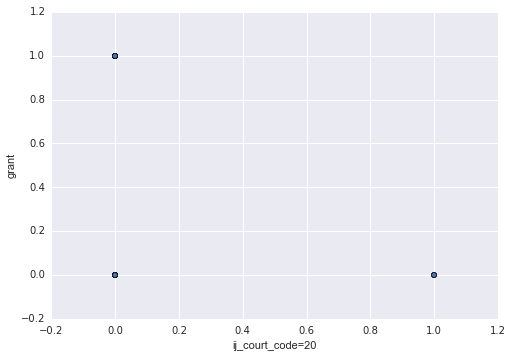

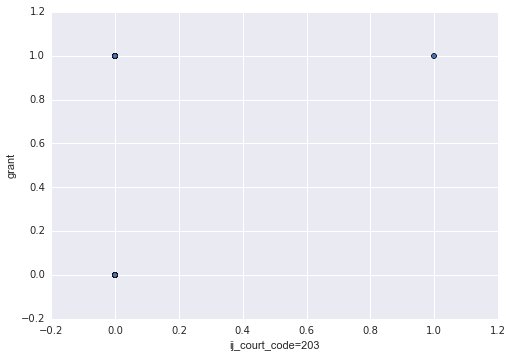

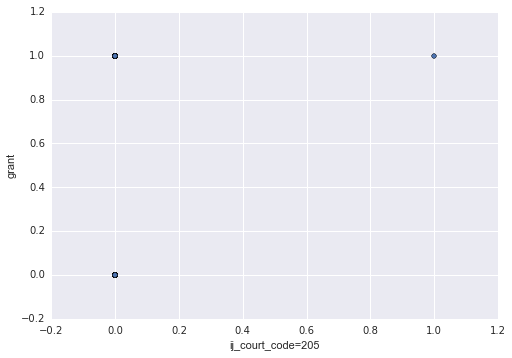

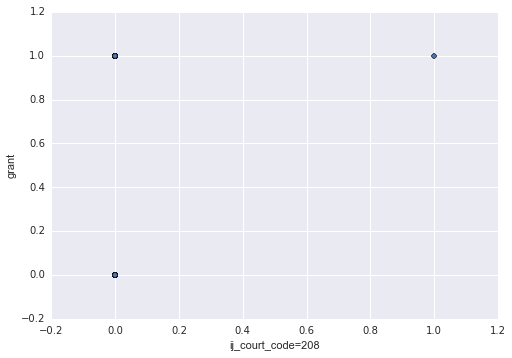

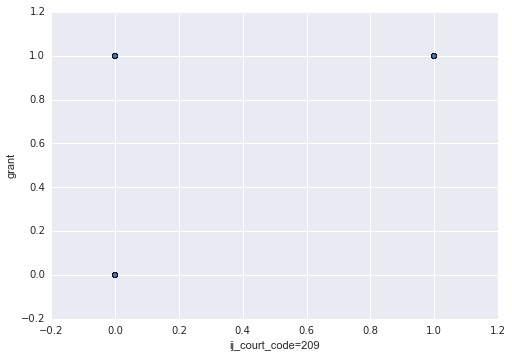

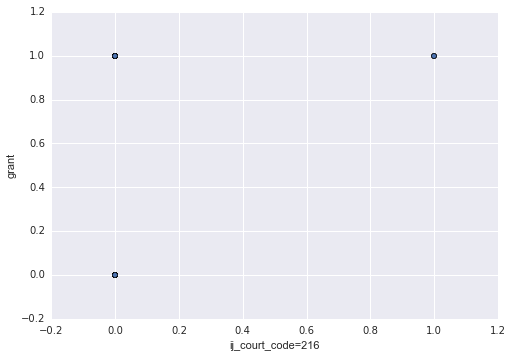

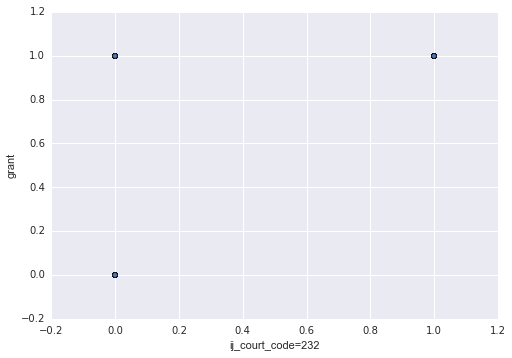

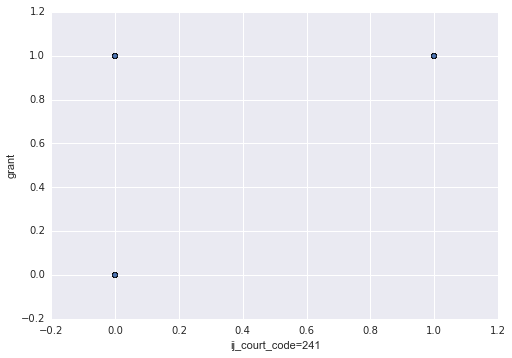

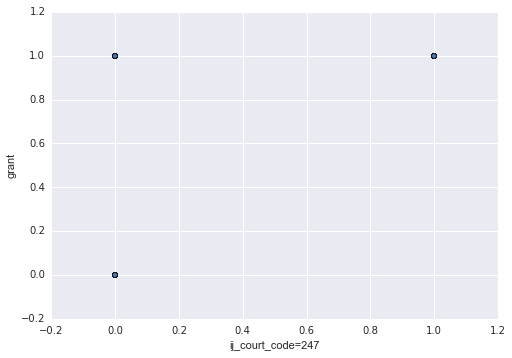

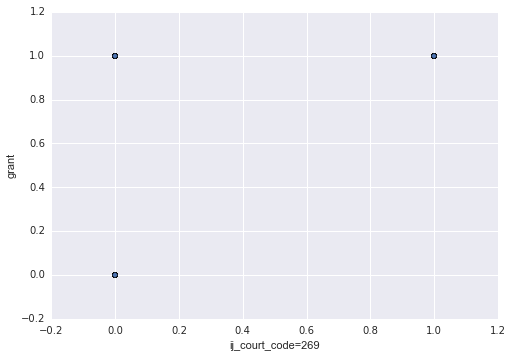

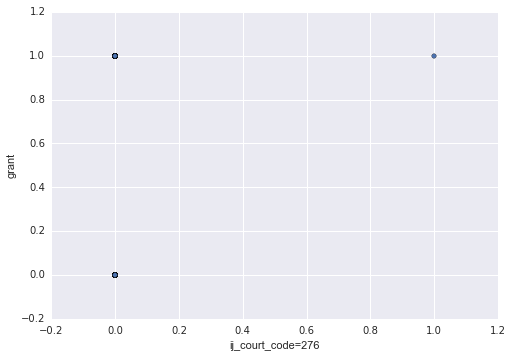

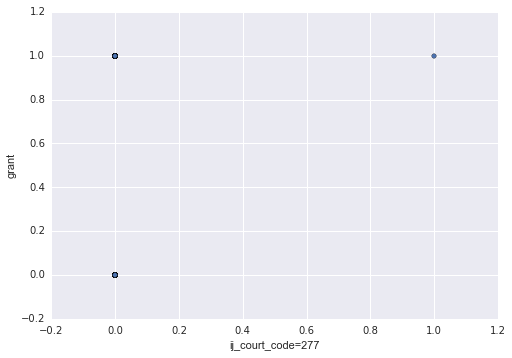

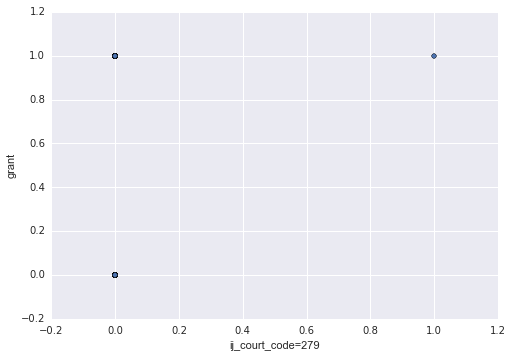

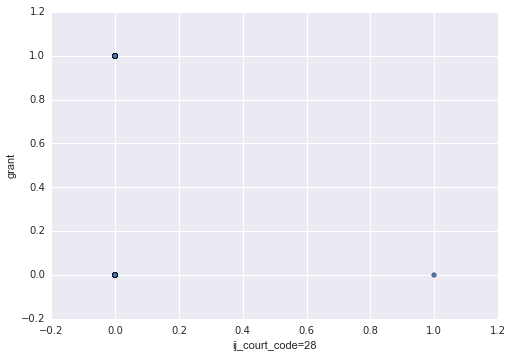

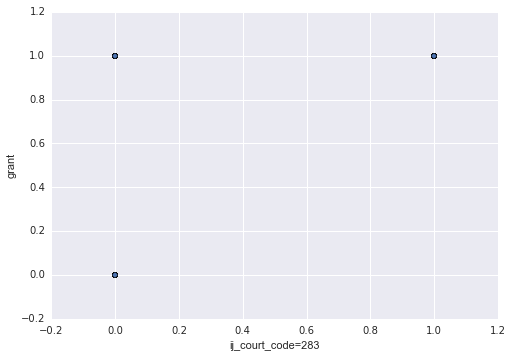

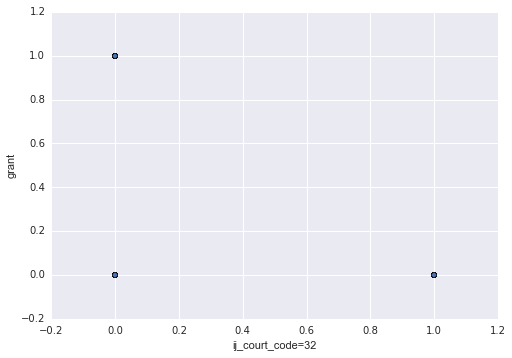

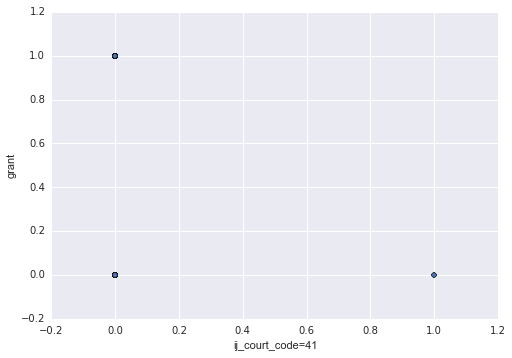

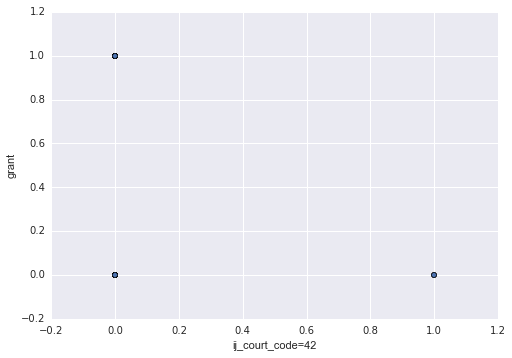

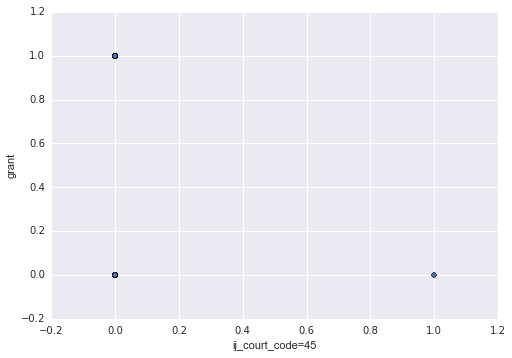

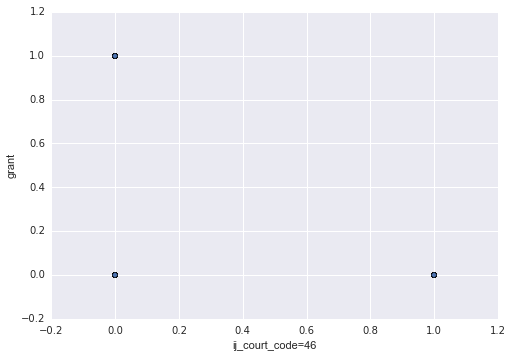

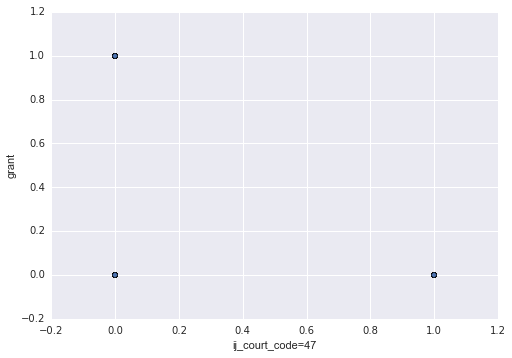

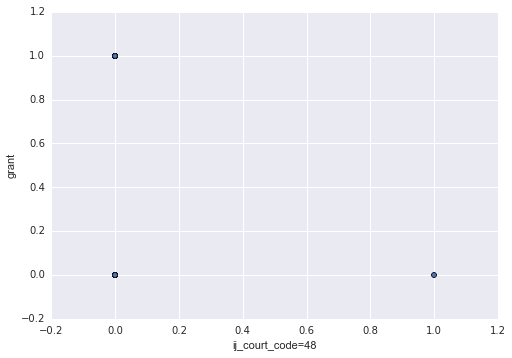

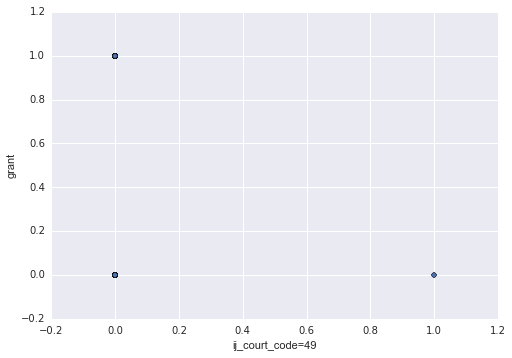

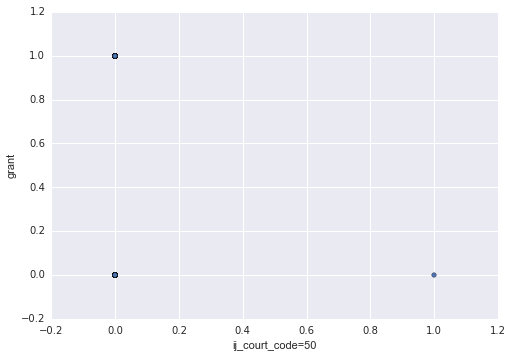

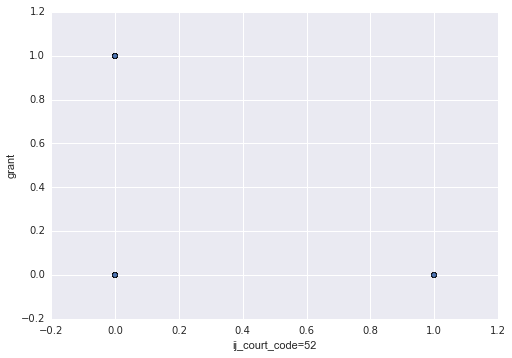

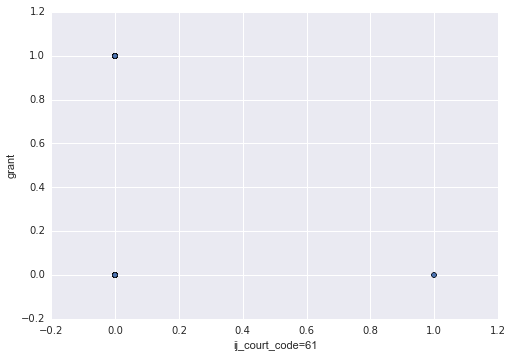

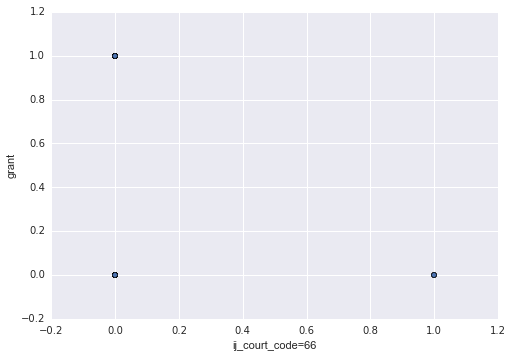

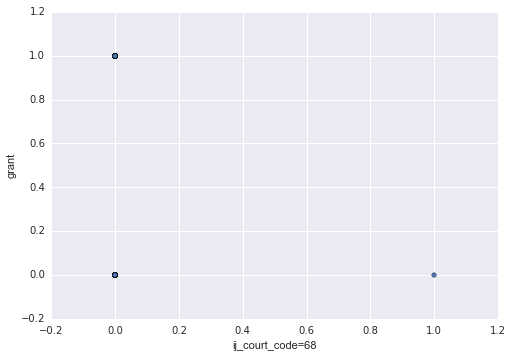

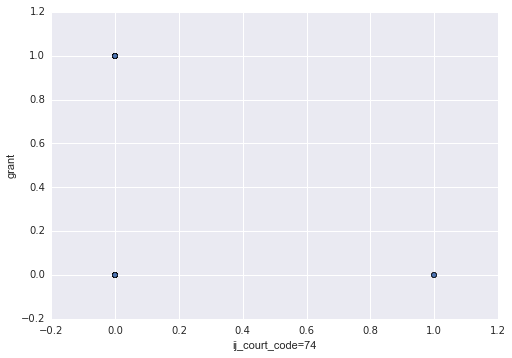

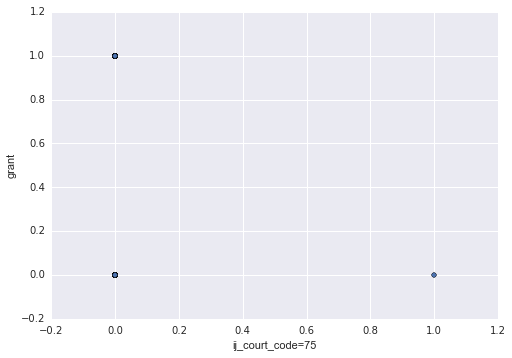

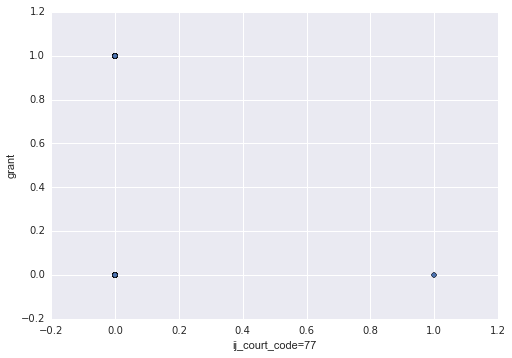

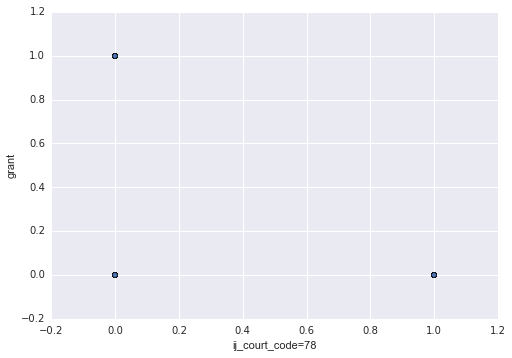

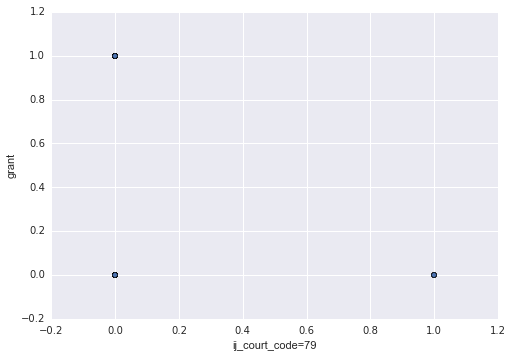

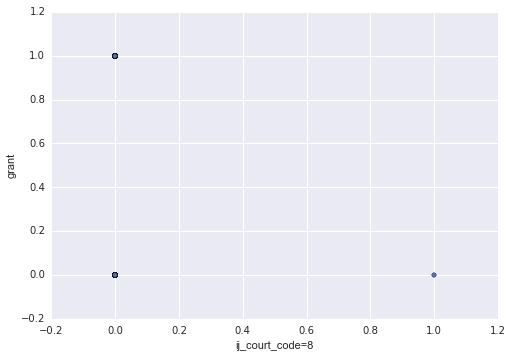

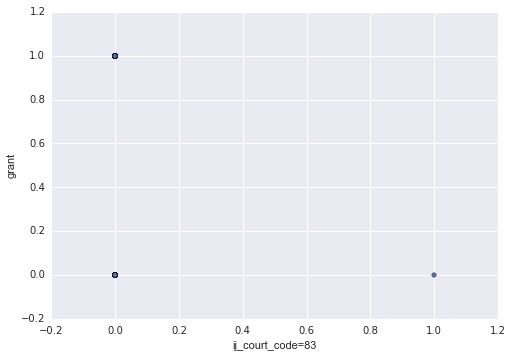

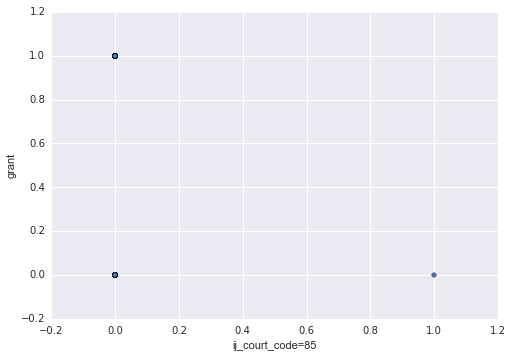

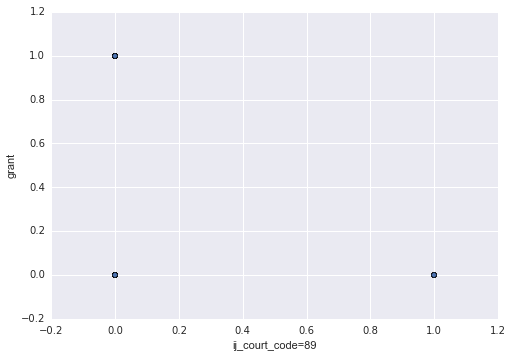

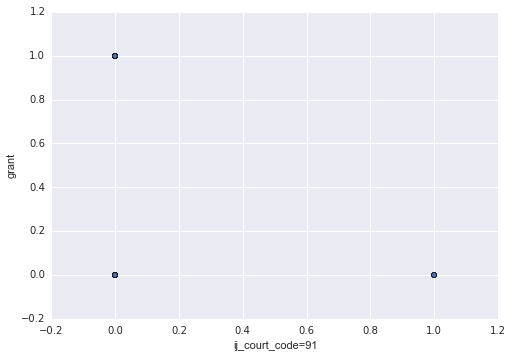

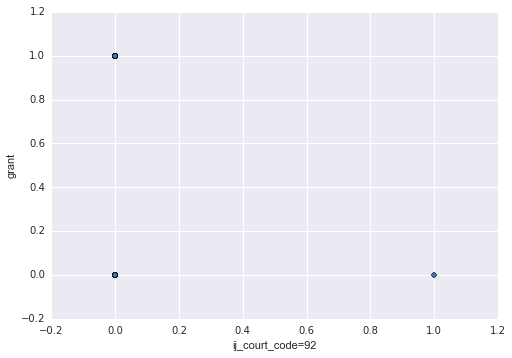

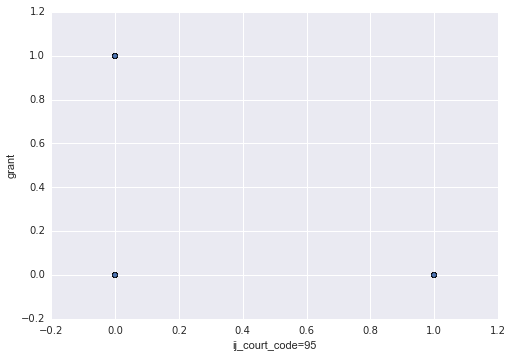

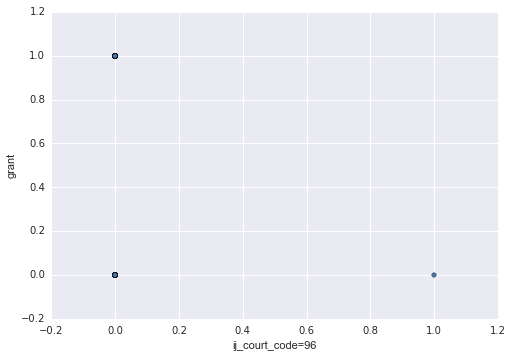

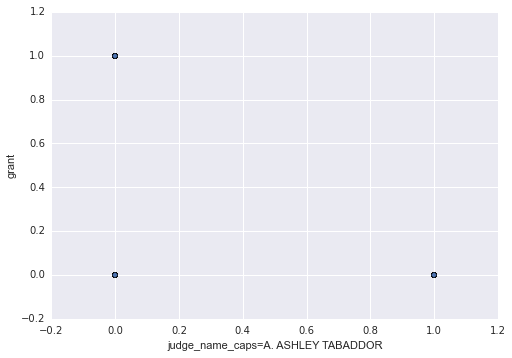

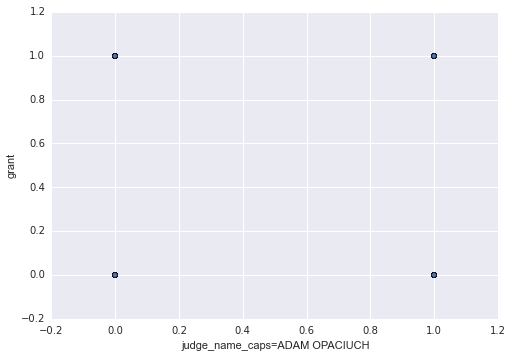

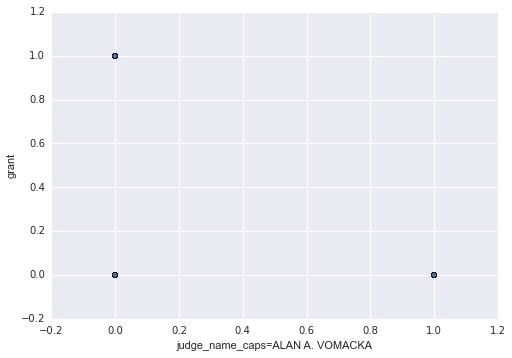

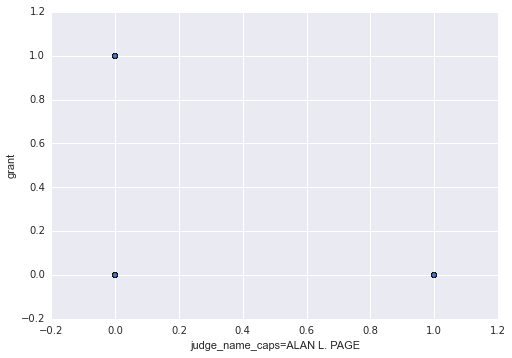

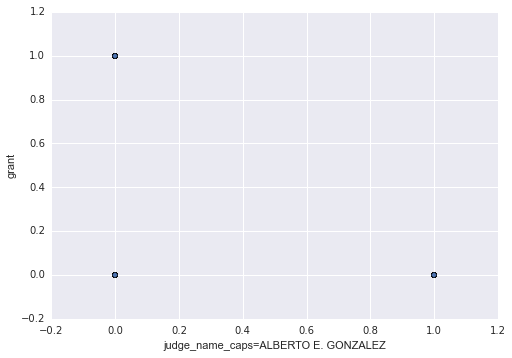

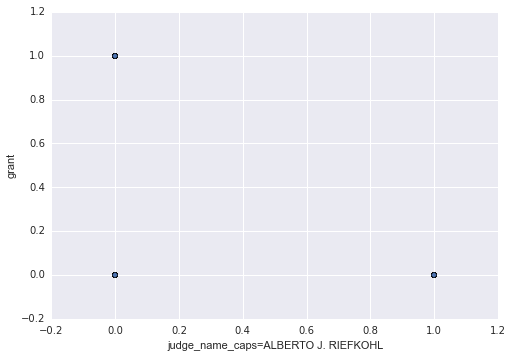

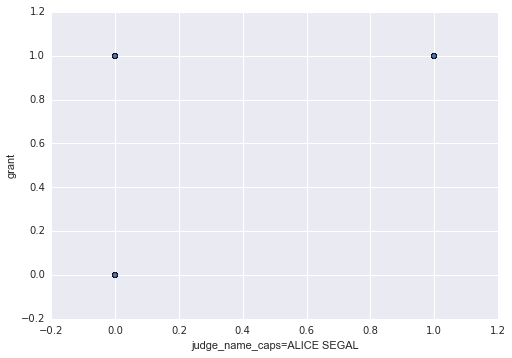

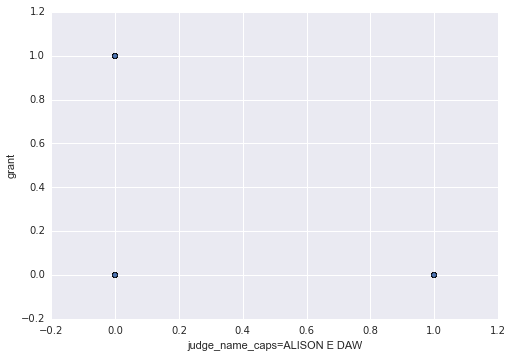

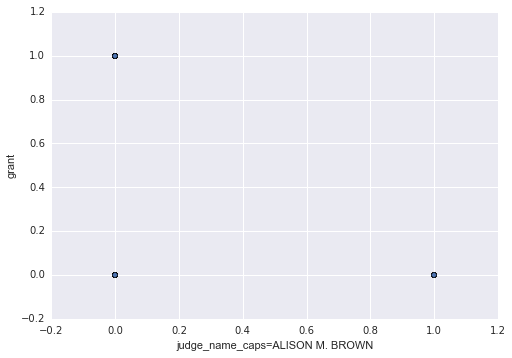

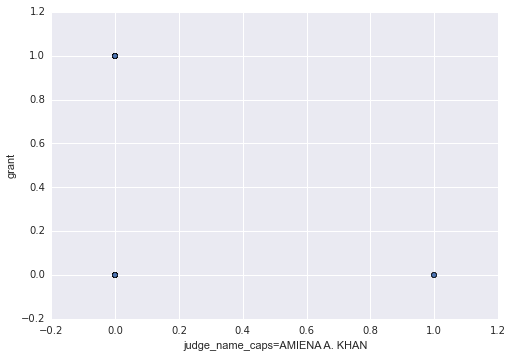

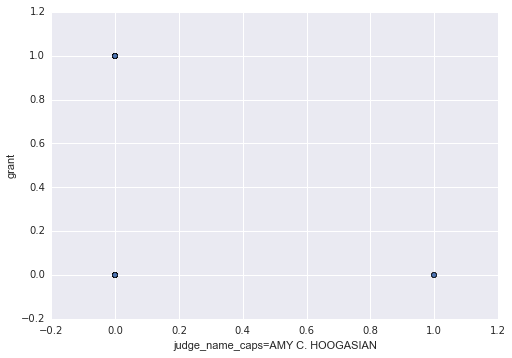

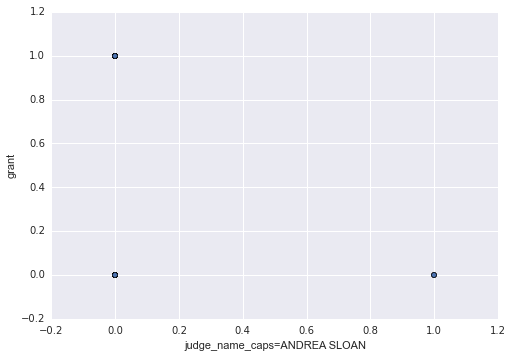

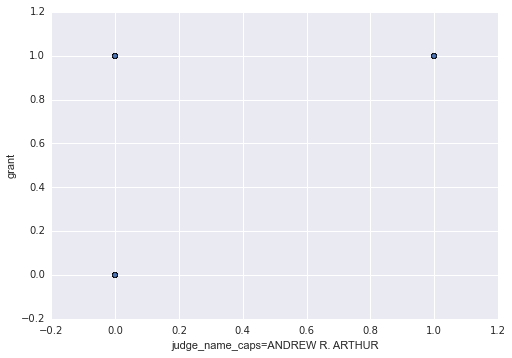

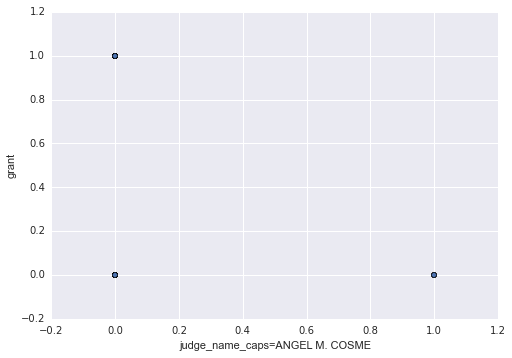

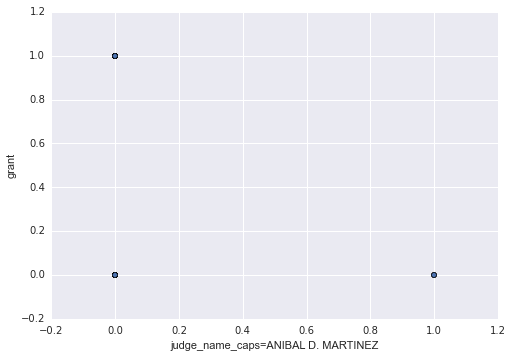

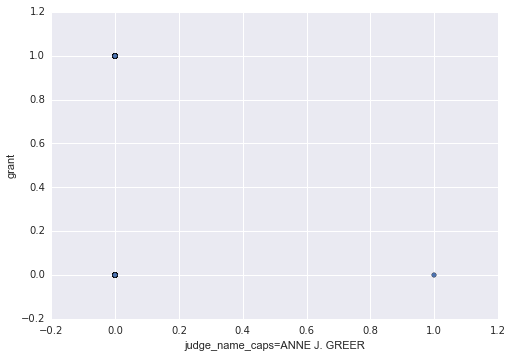

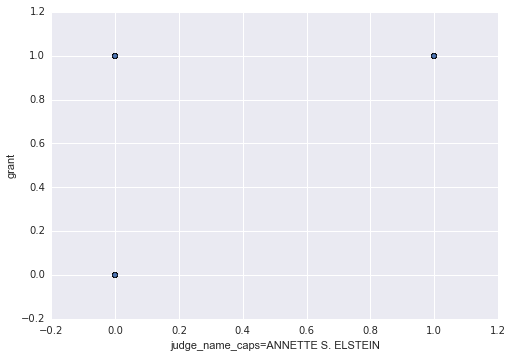

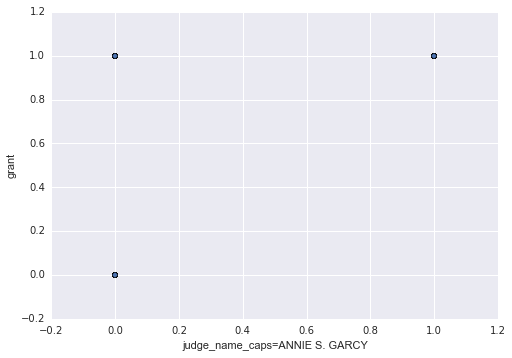

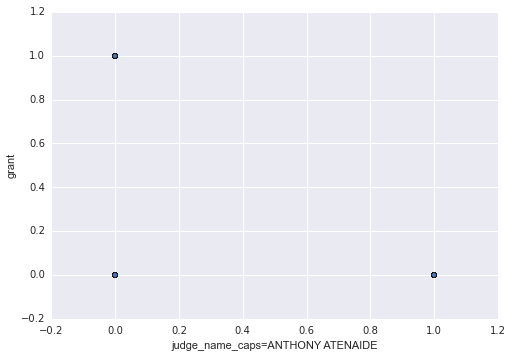

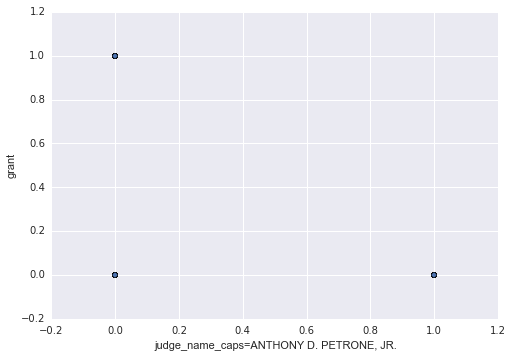

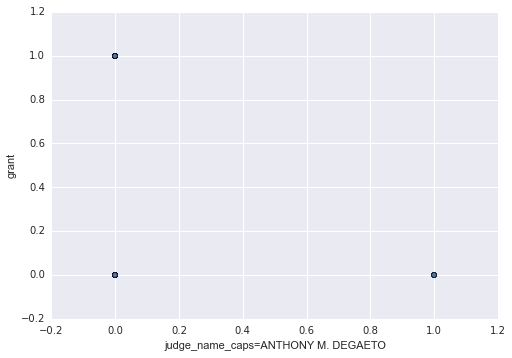

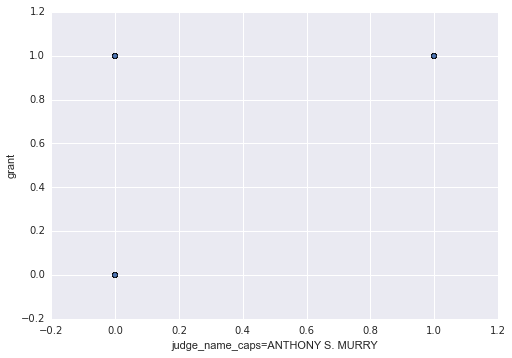

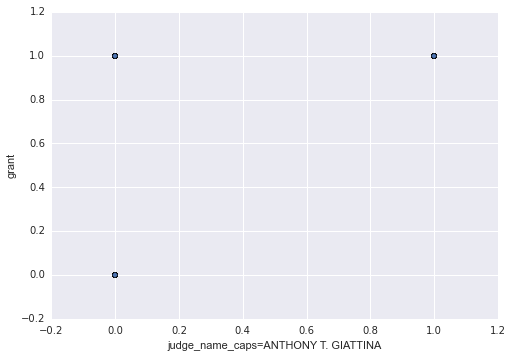

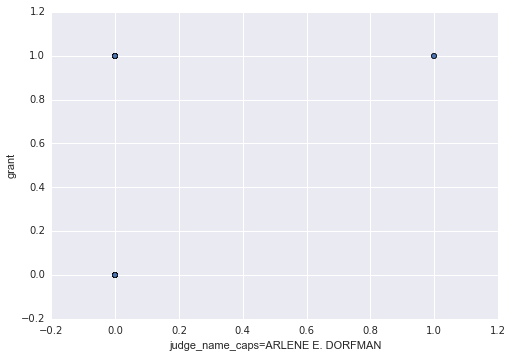

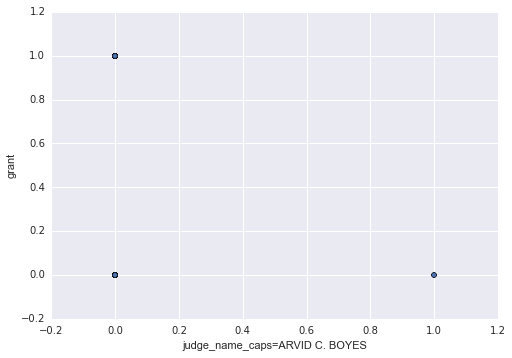

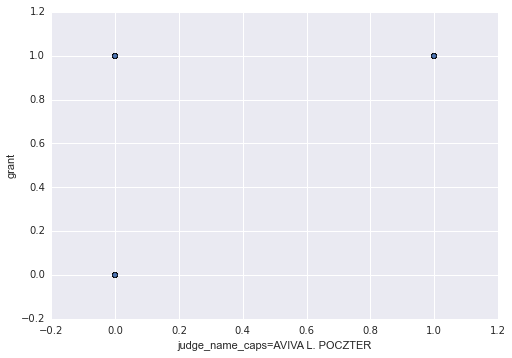

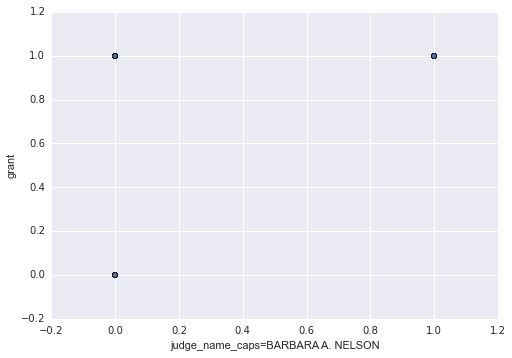

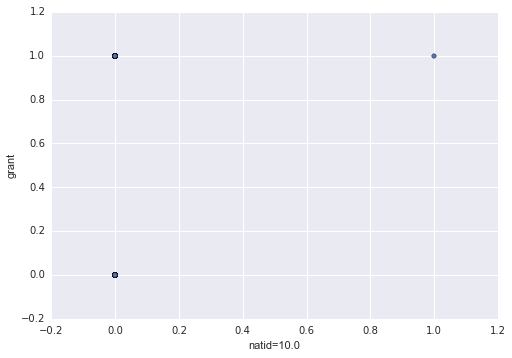

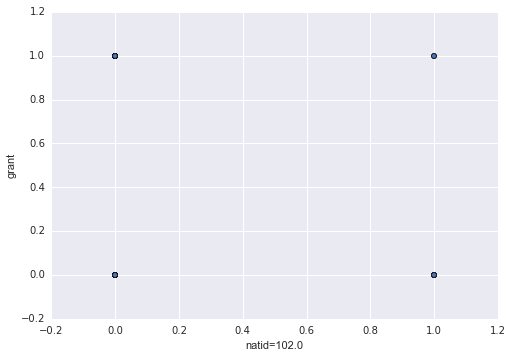

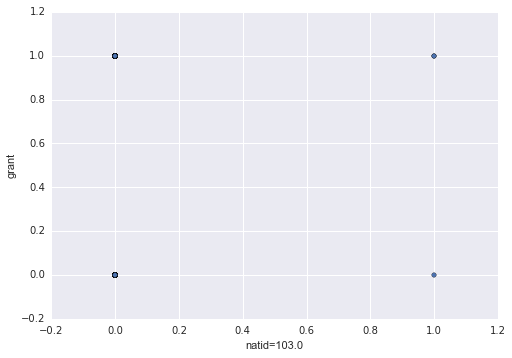

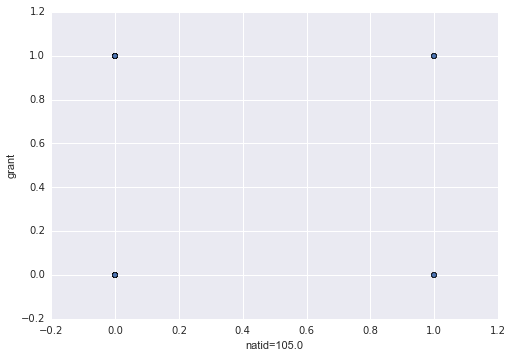

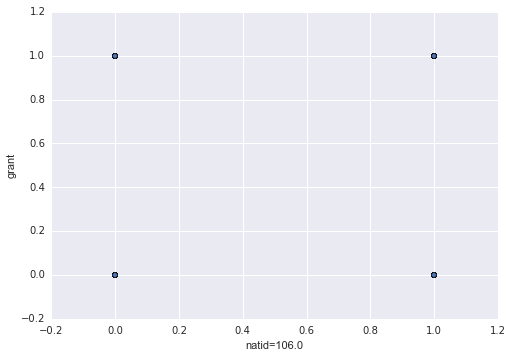

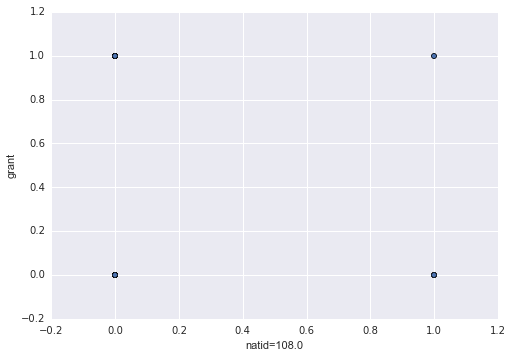

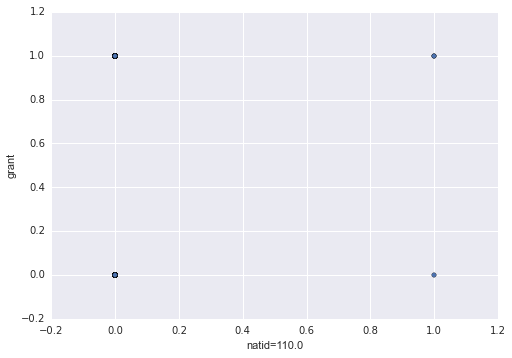

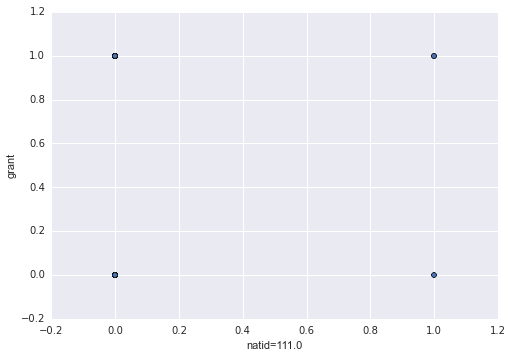

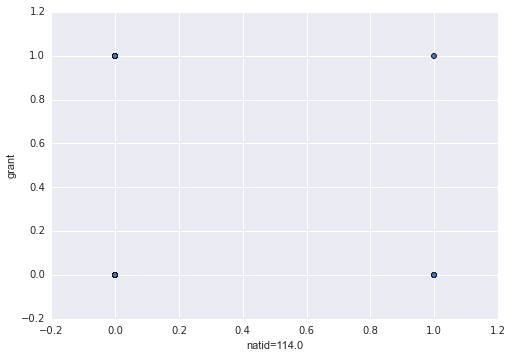

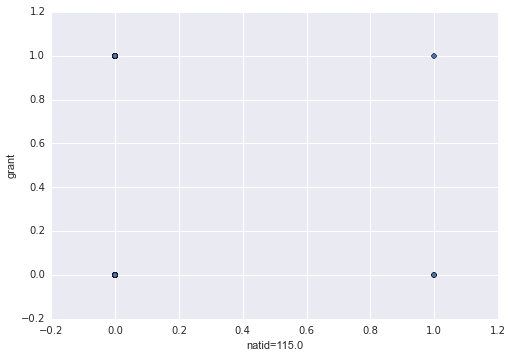

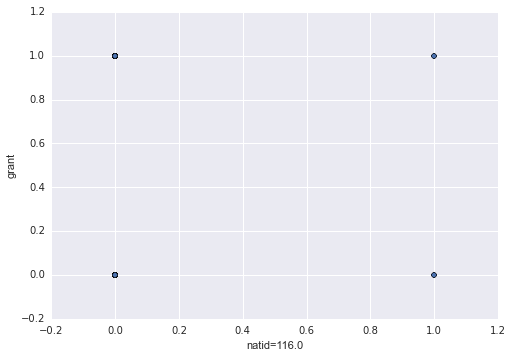

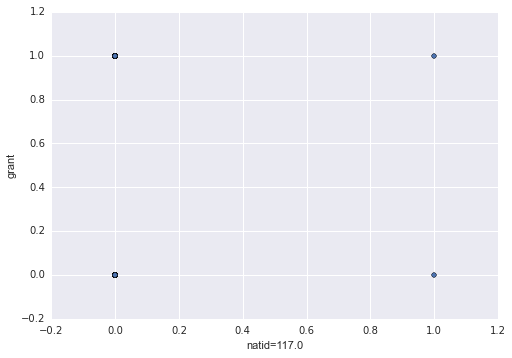

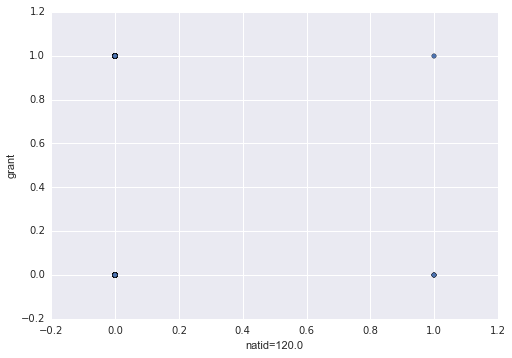

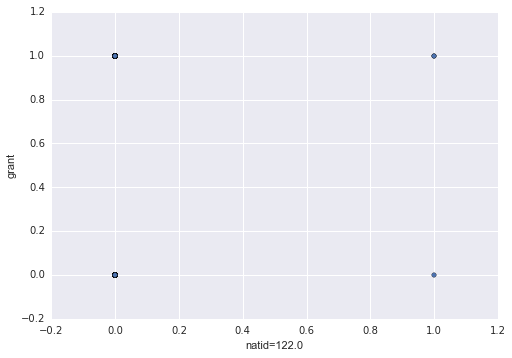

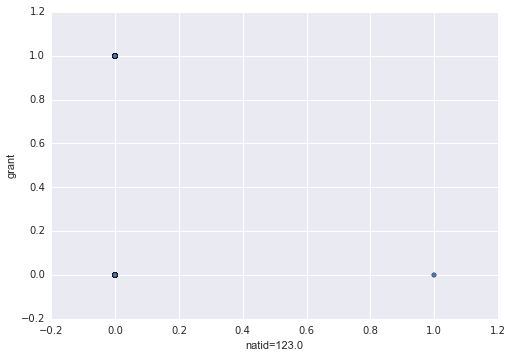

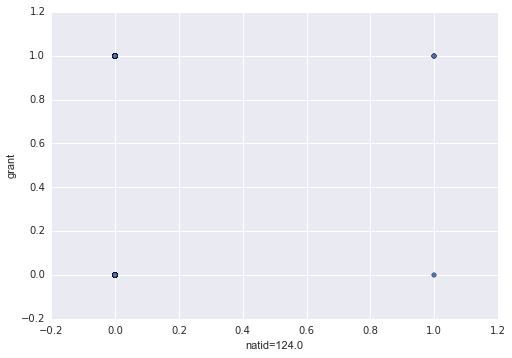

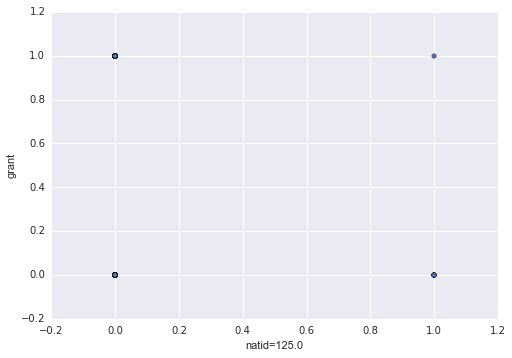

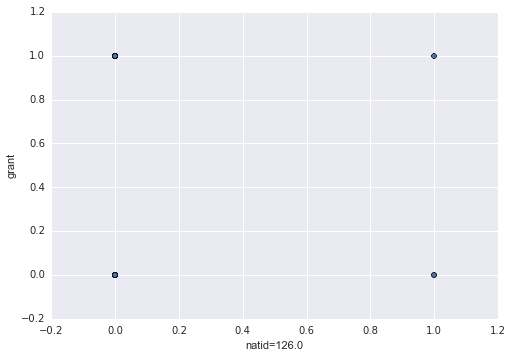

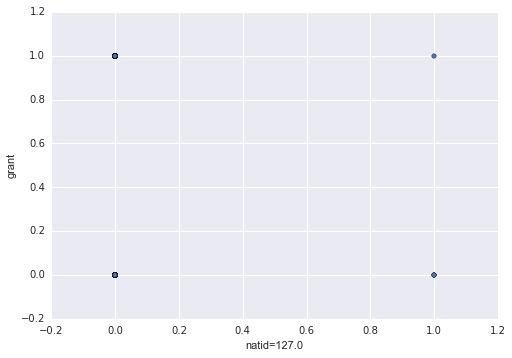

In [38]:
for i in range(401,600):
    df_plot = df_prof[['grant',dummy_columns[i]]]
    df_plot.plot(kind='scatter', x=dummy_columns[i], y='grant')

IndexError: list index out of range

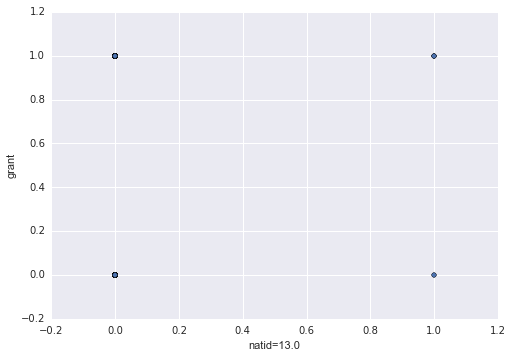

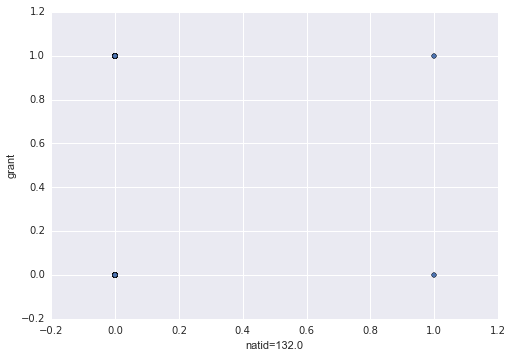

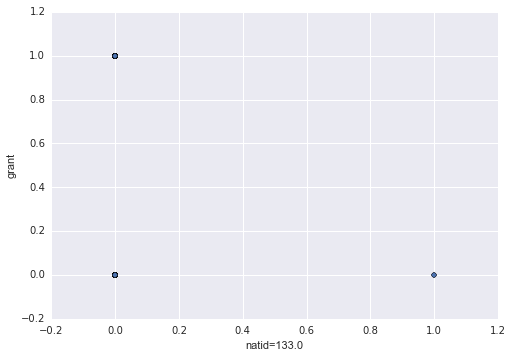

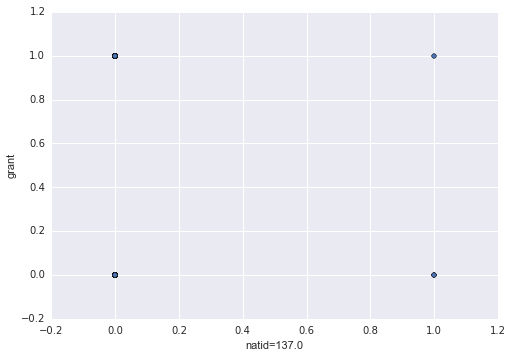

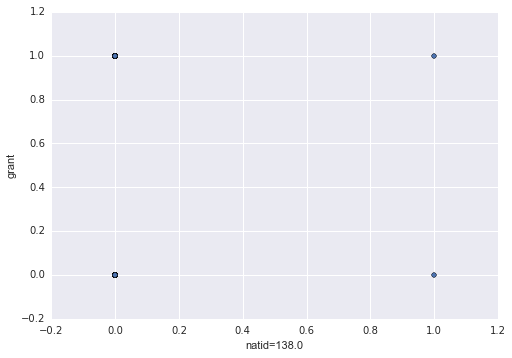

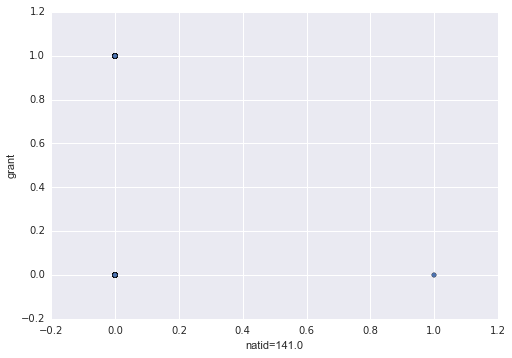

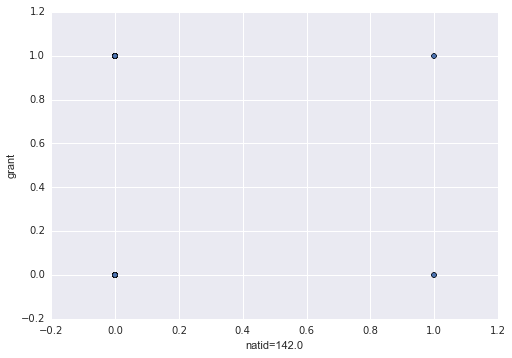

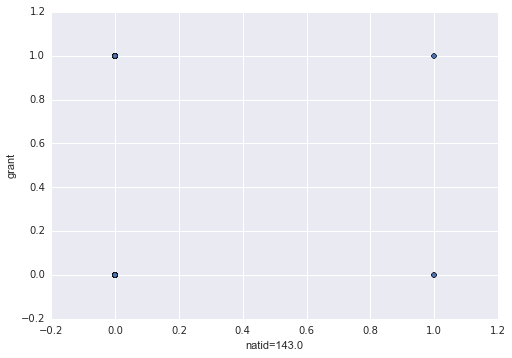

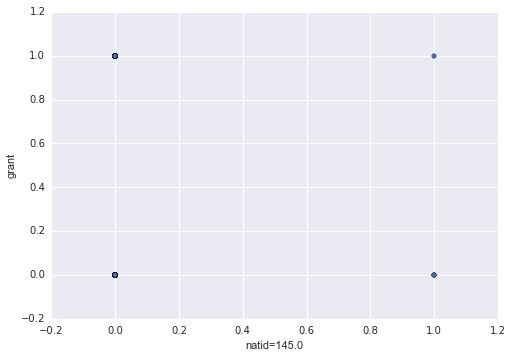

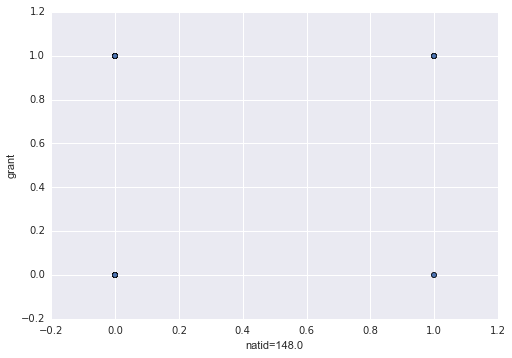

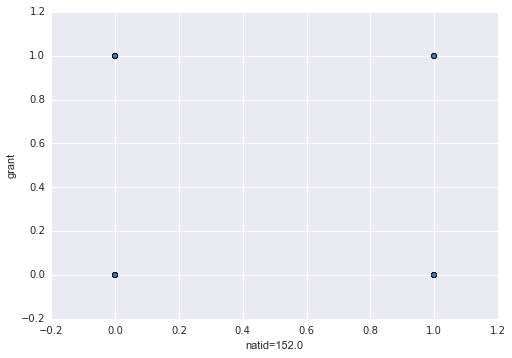

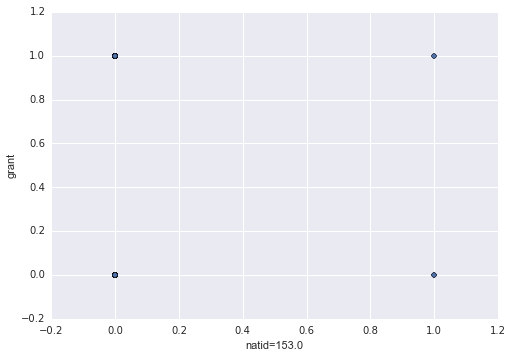

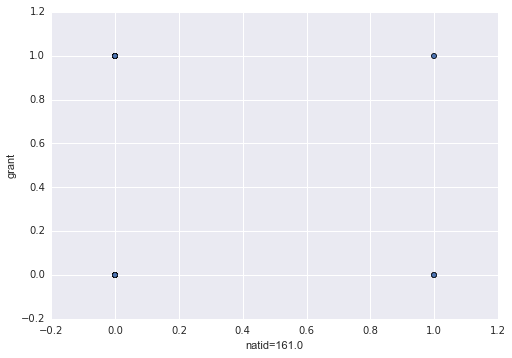

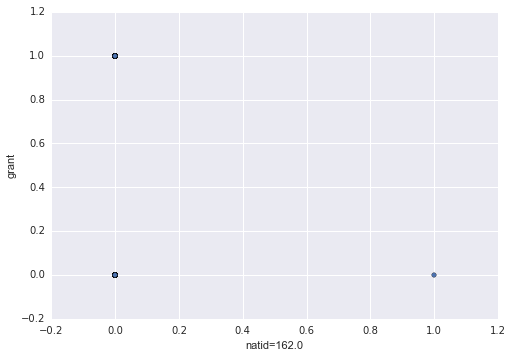

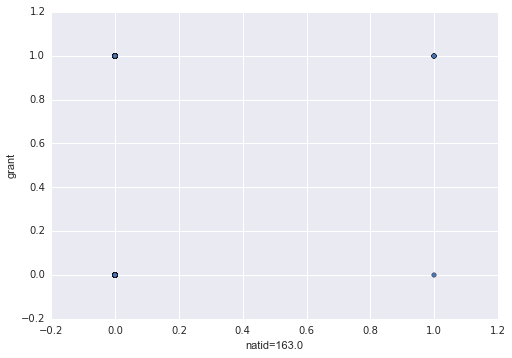

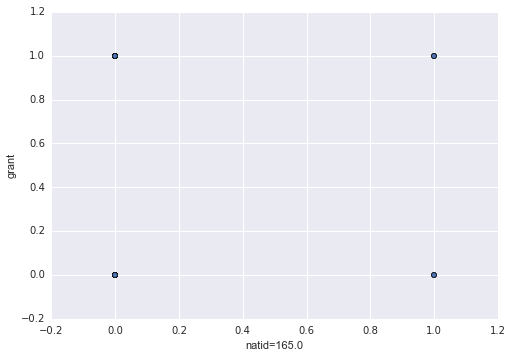

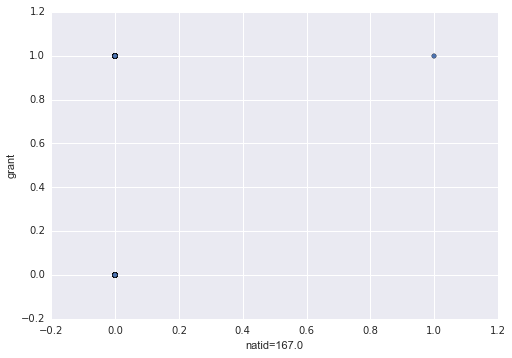

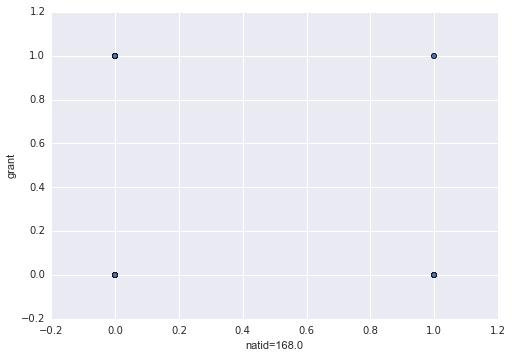

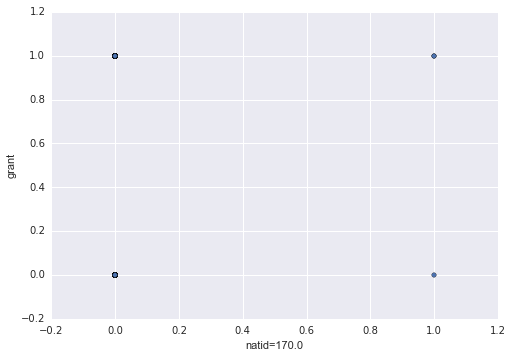

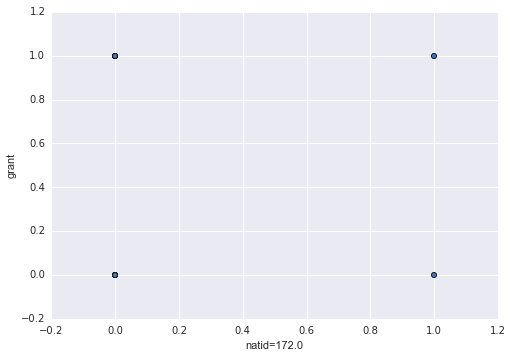

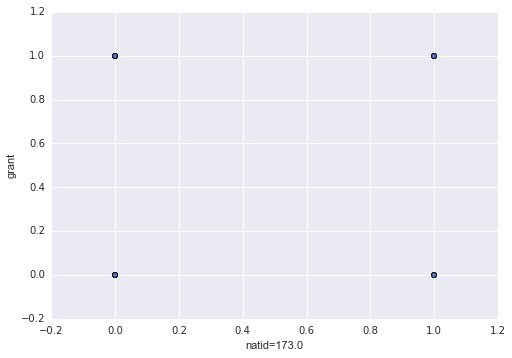

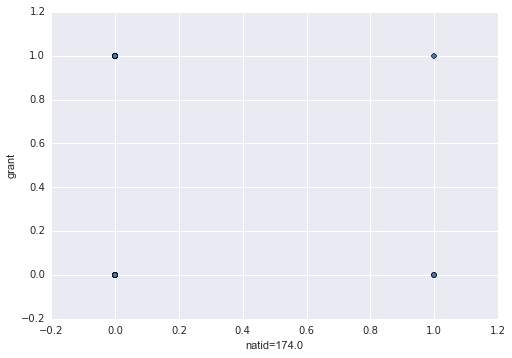

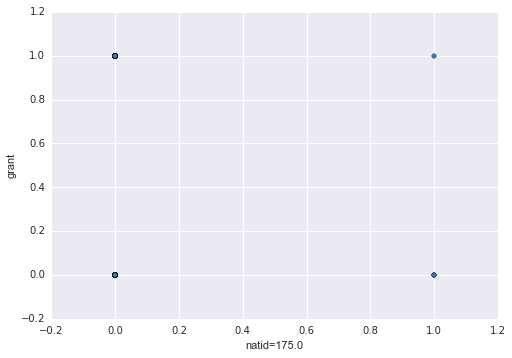

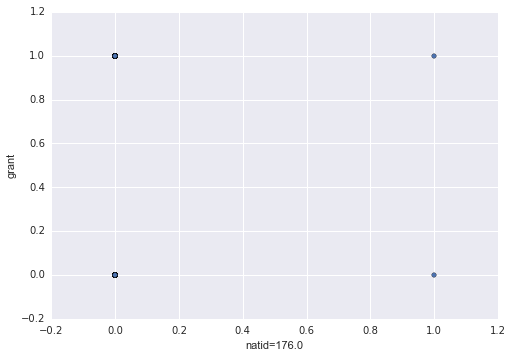

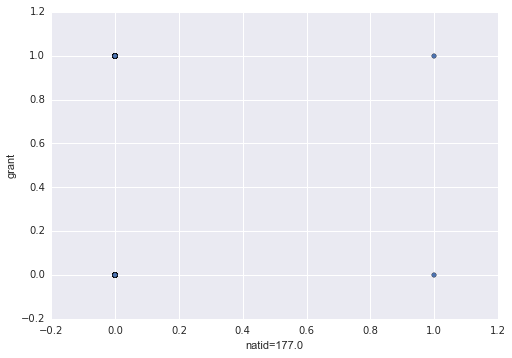

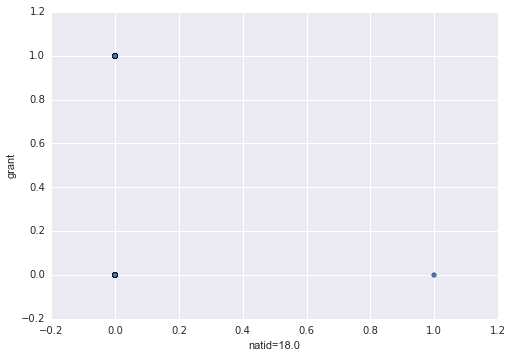

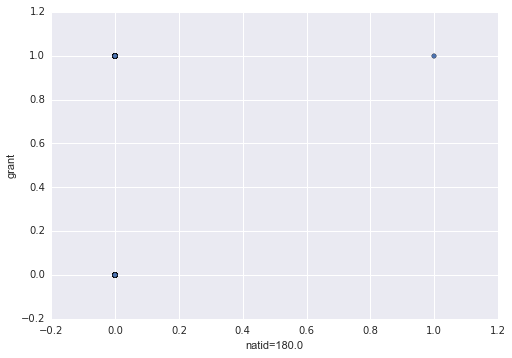

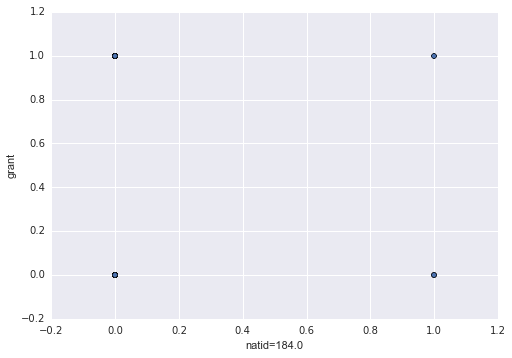

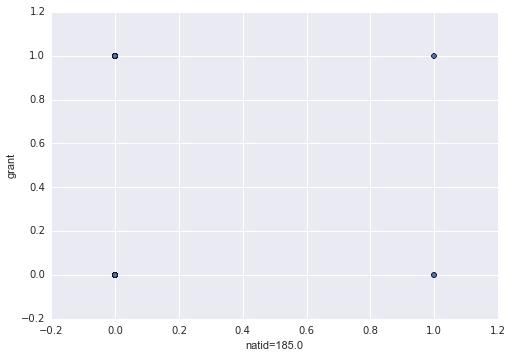

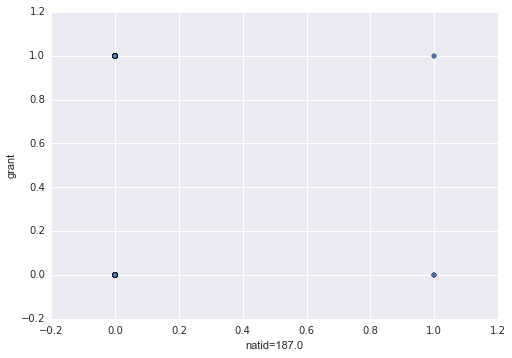

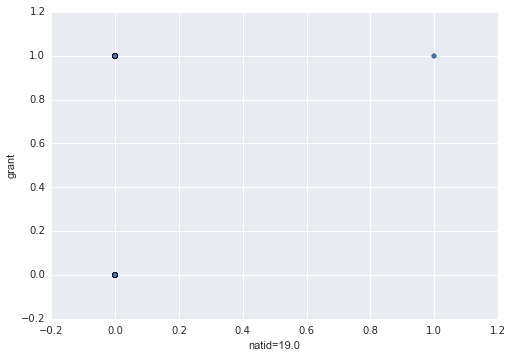

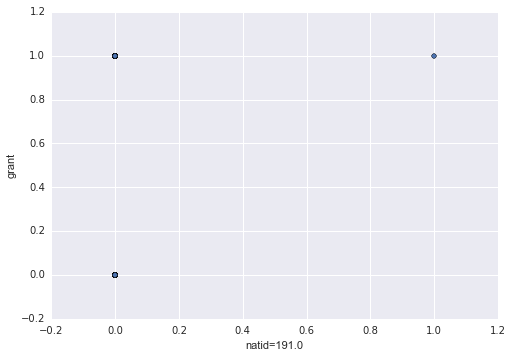

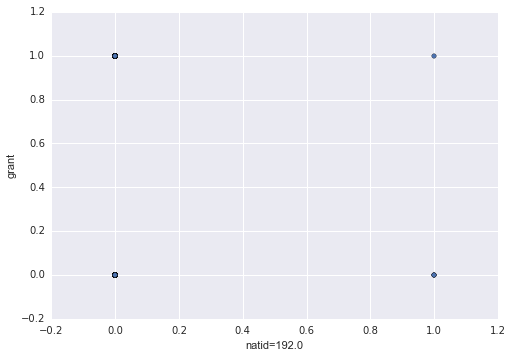

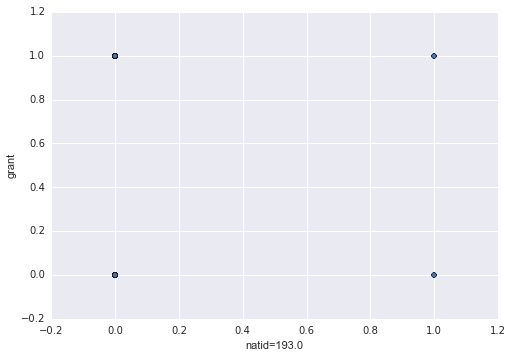

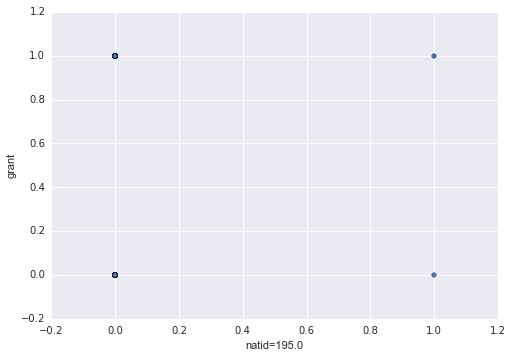

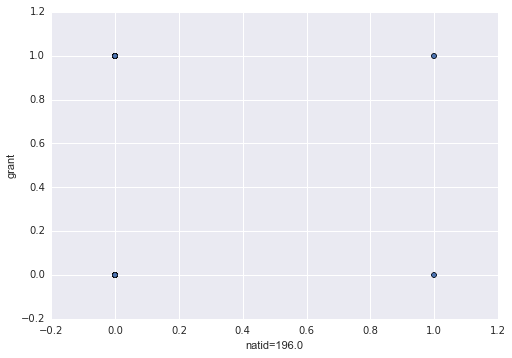

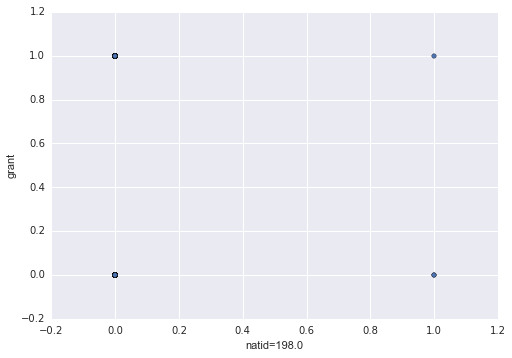

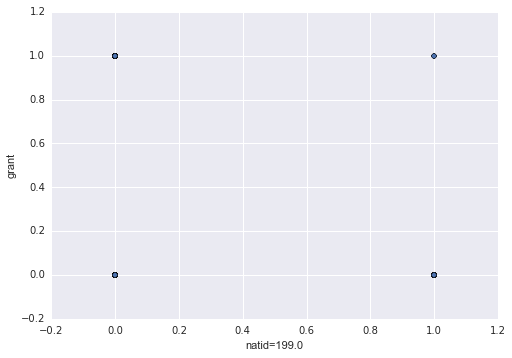

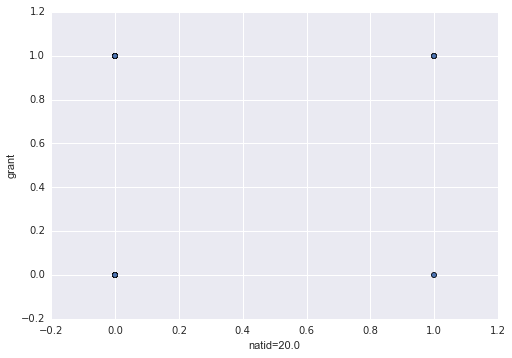

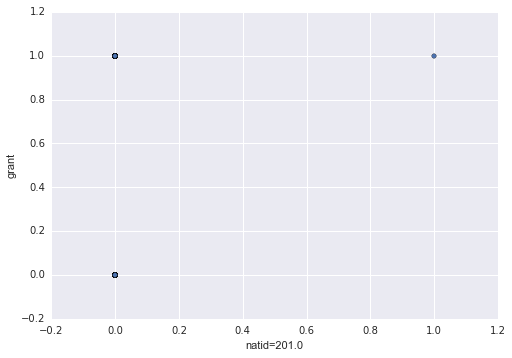

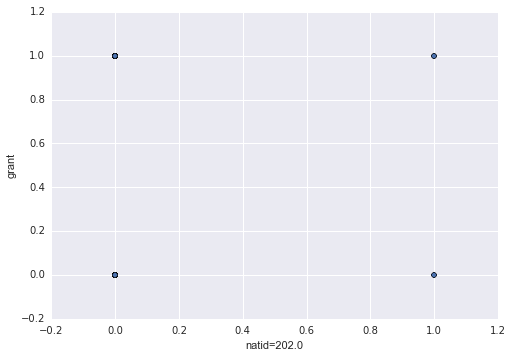

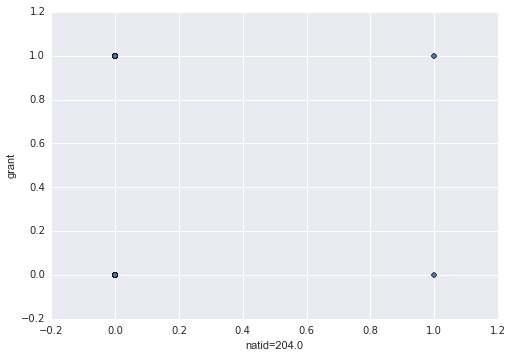

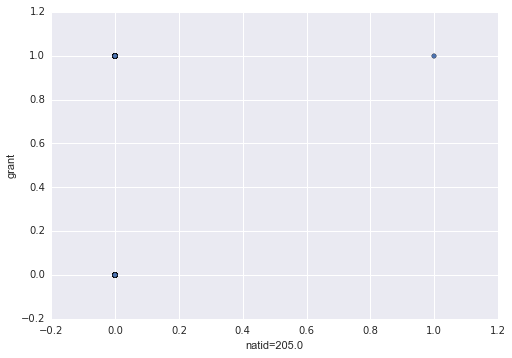

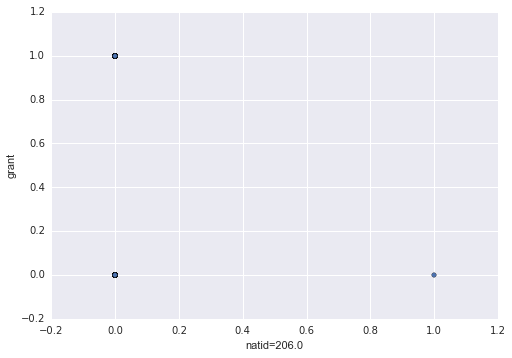

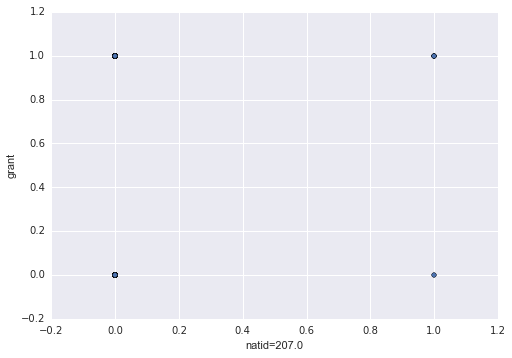

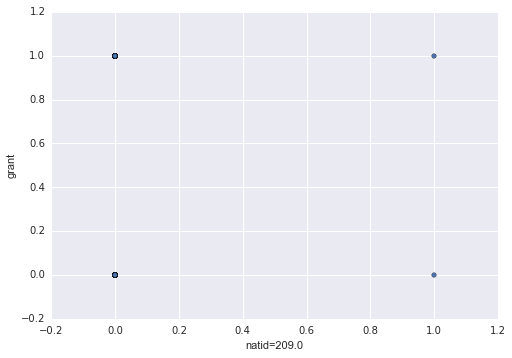

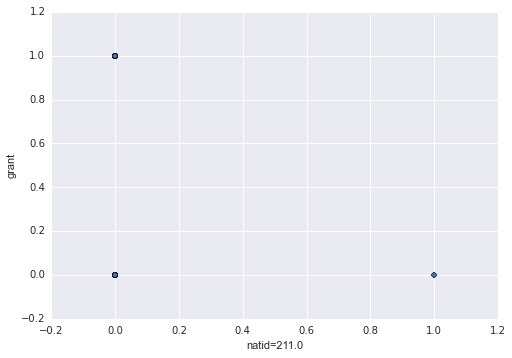

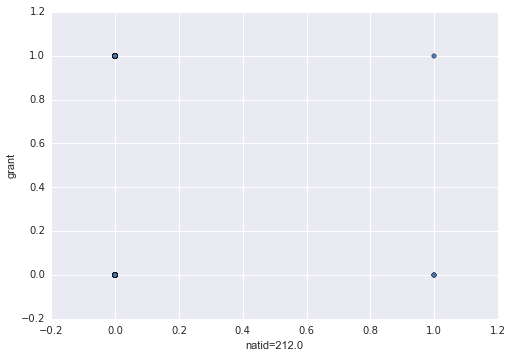

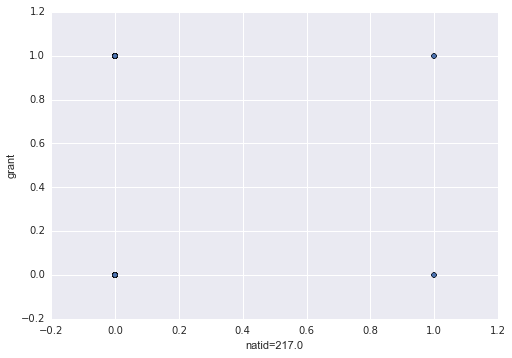

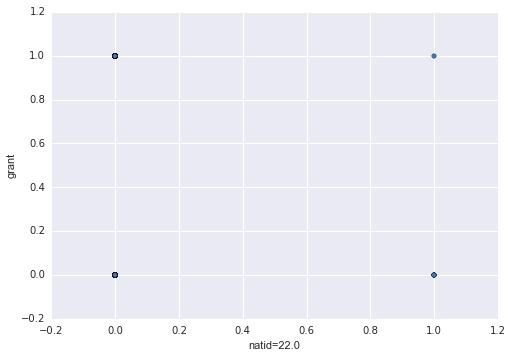

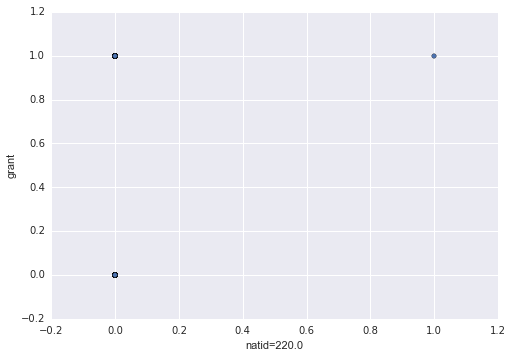

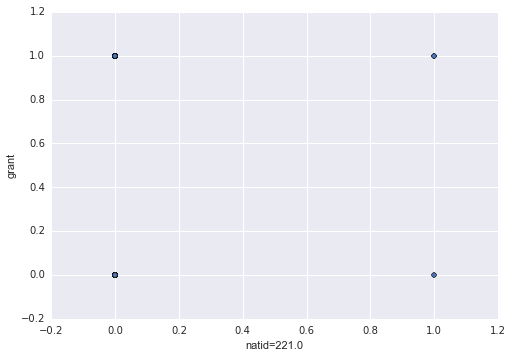

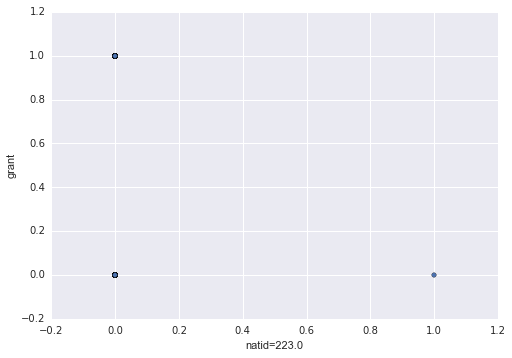

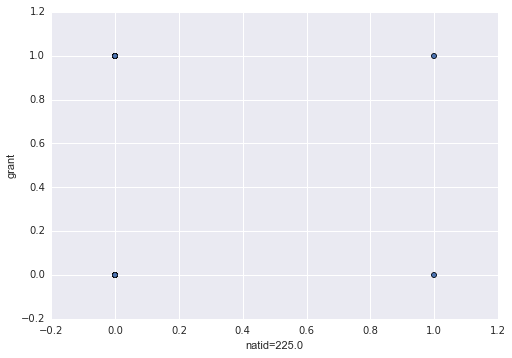

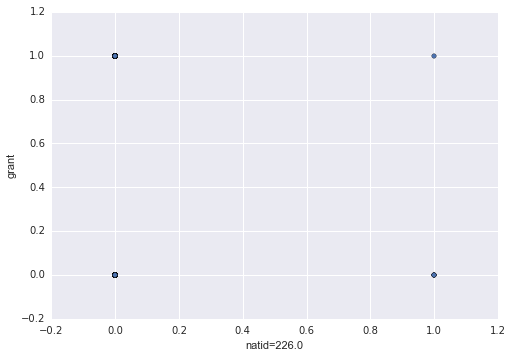

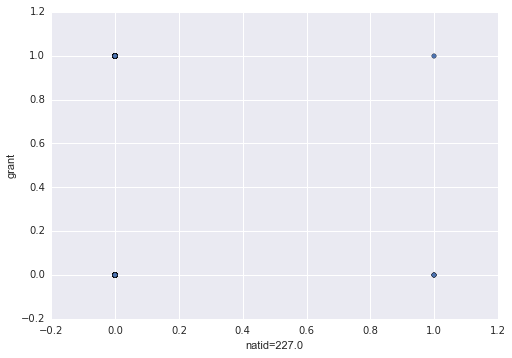

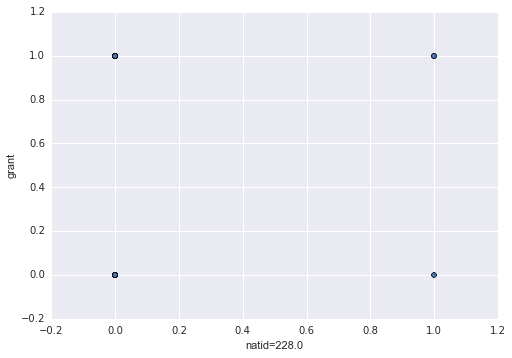

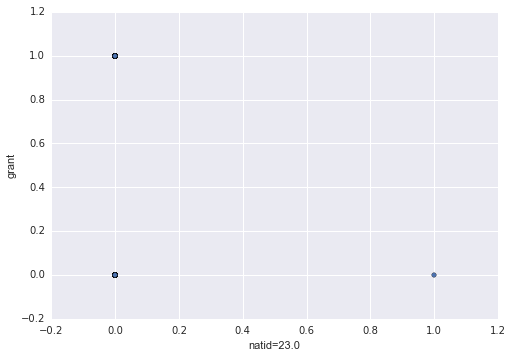

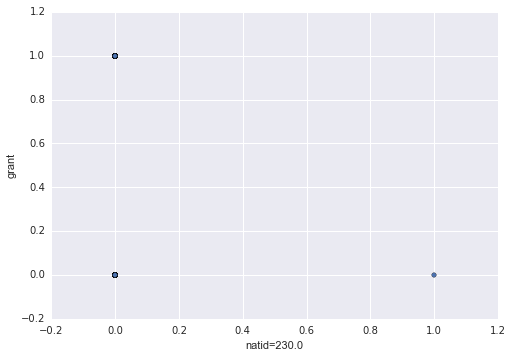

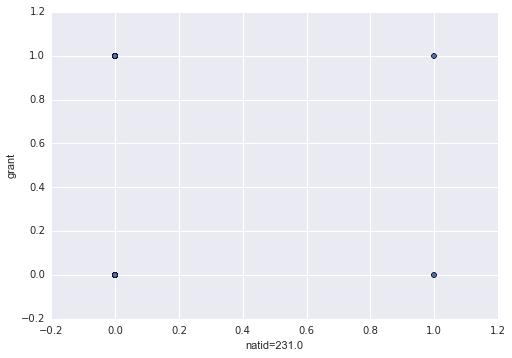

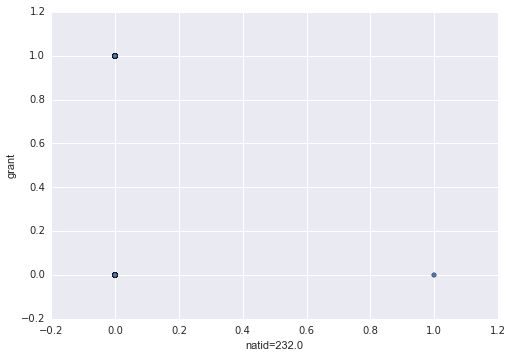

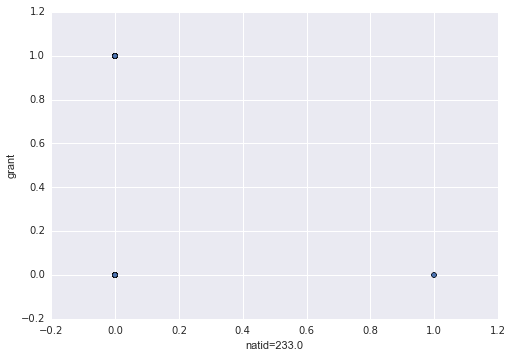

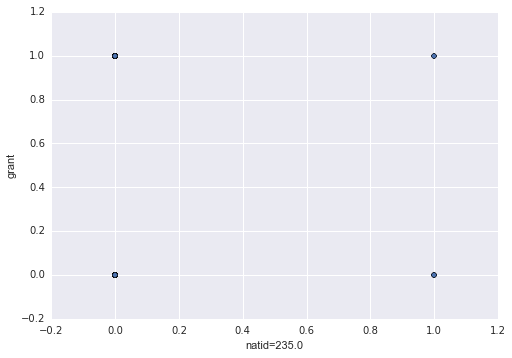

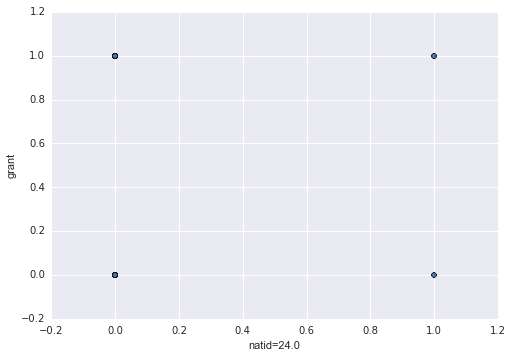

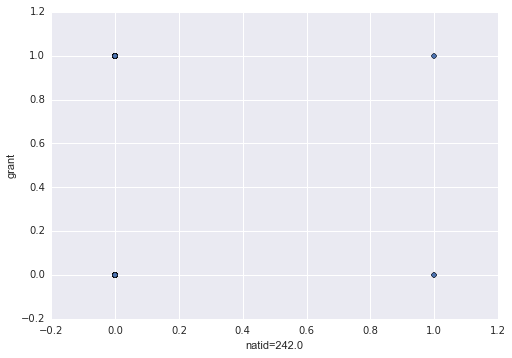

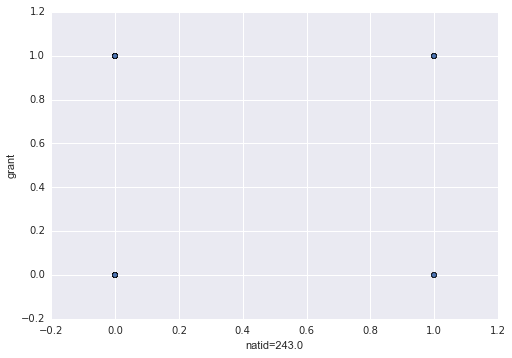

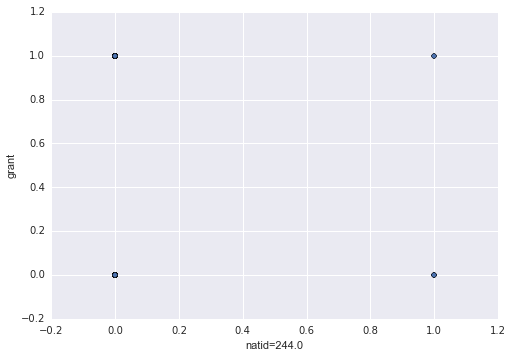

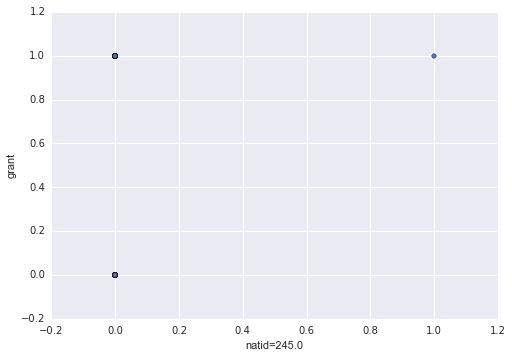

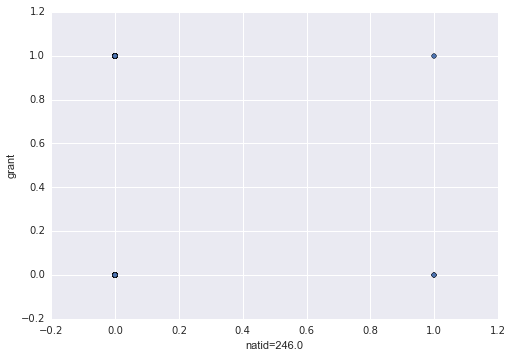

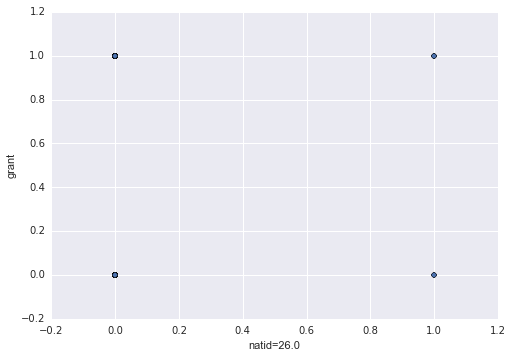

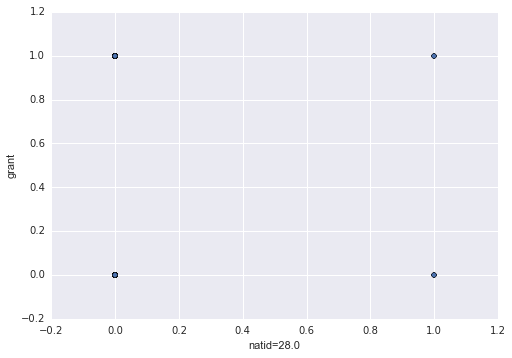

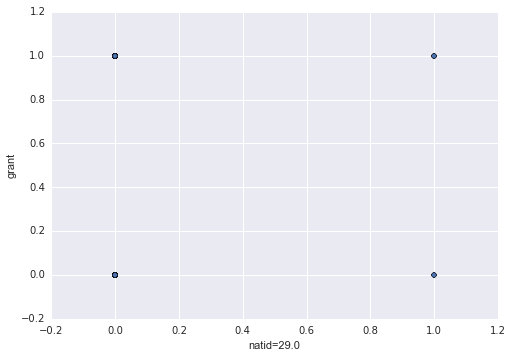

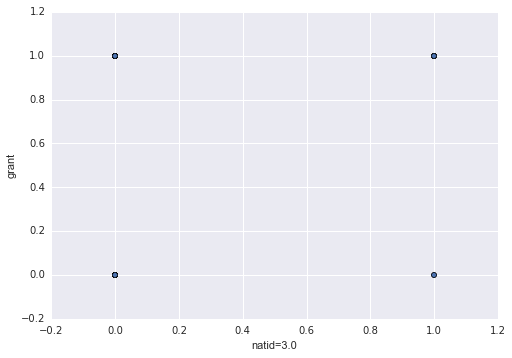

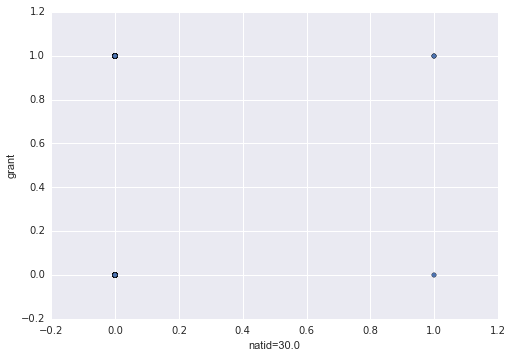

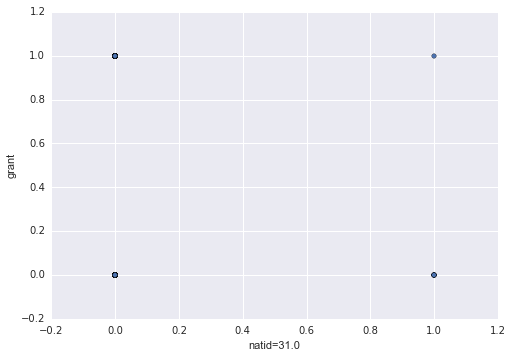

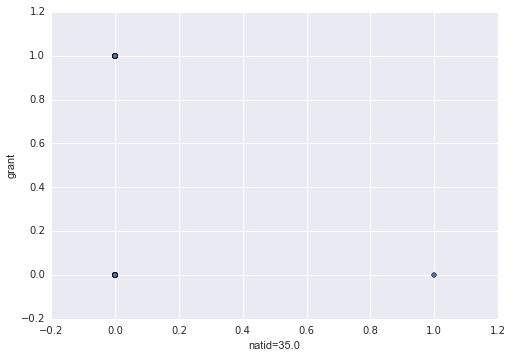

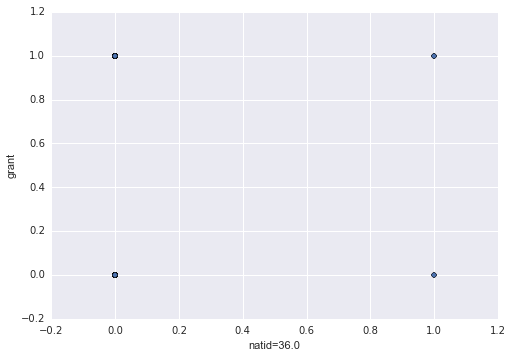

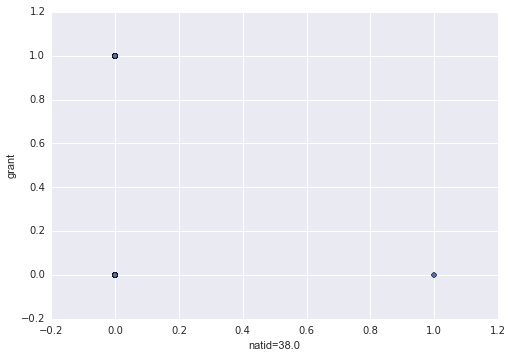

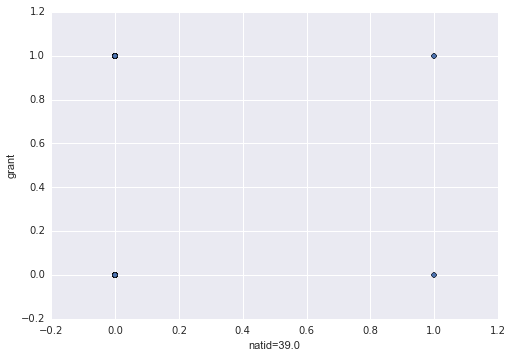

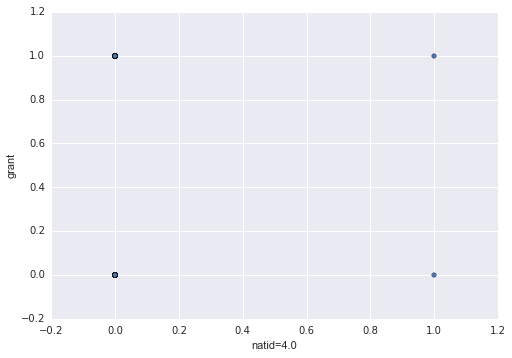

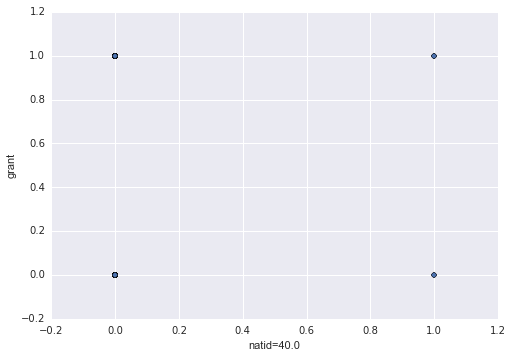

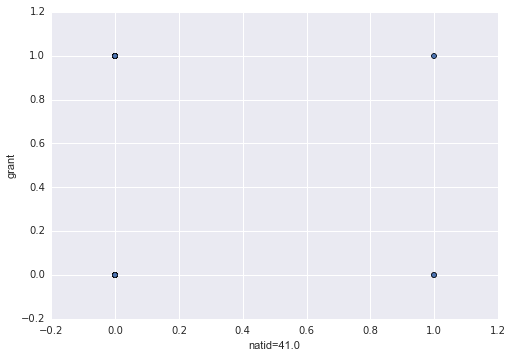

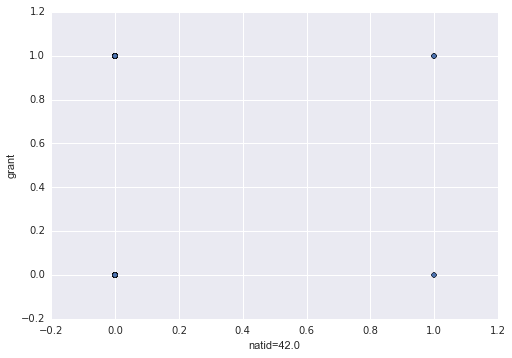

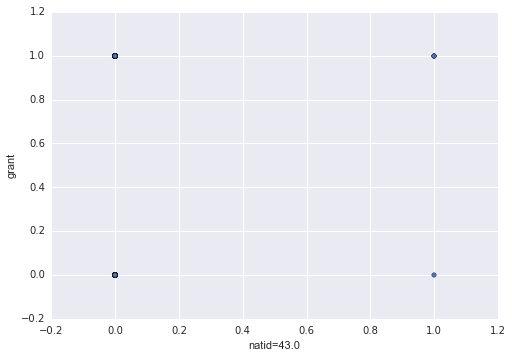

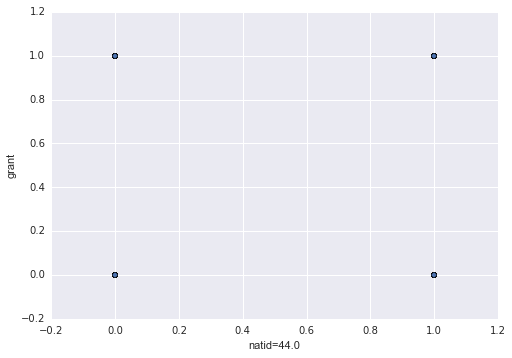

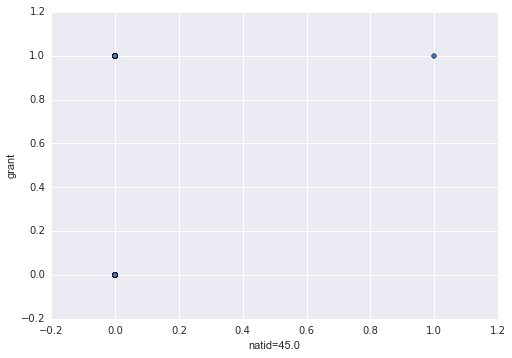

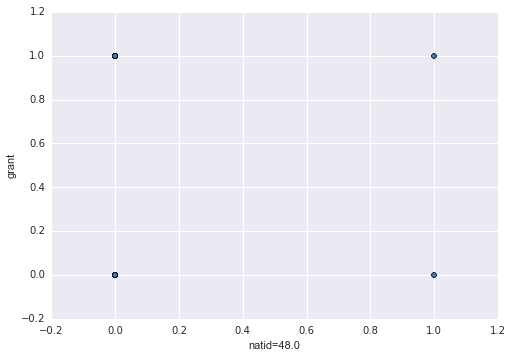

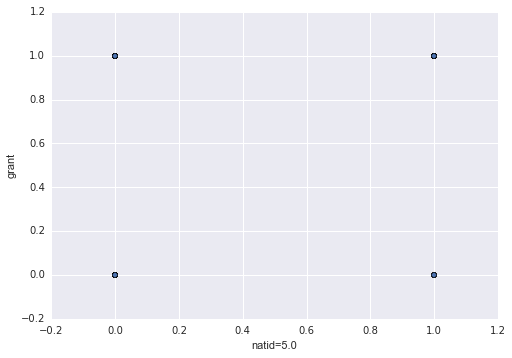

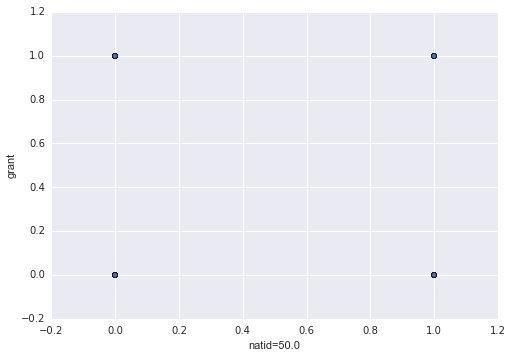

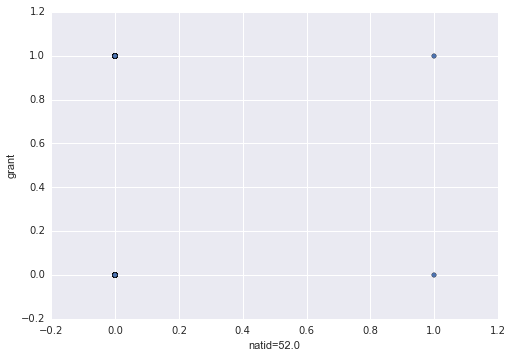

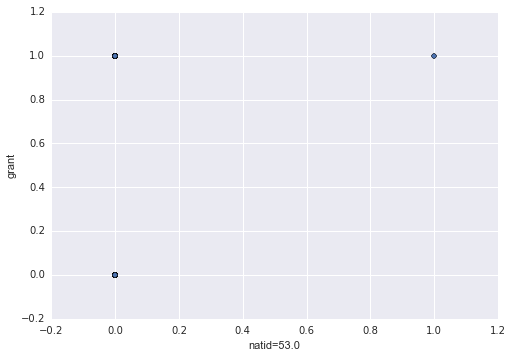

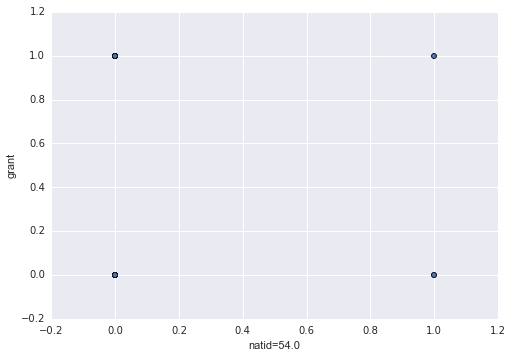

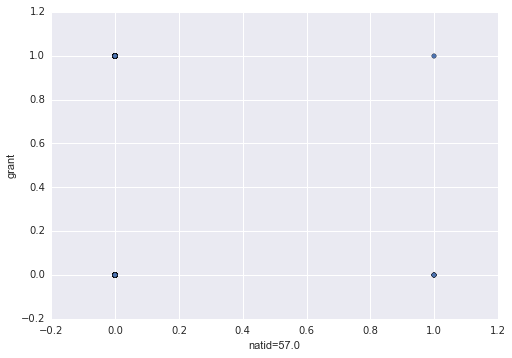

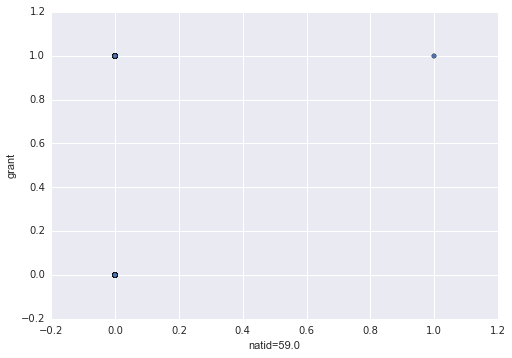

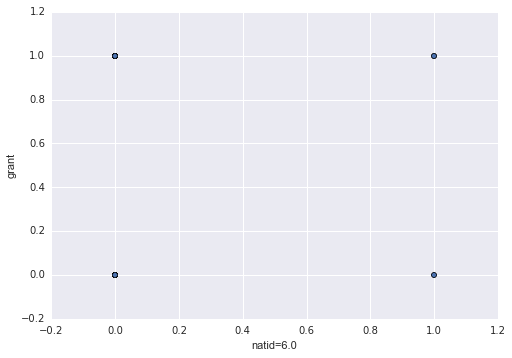

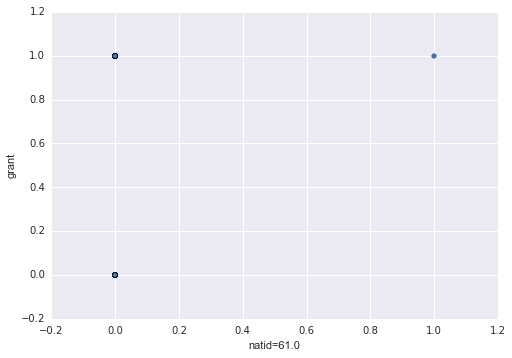

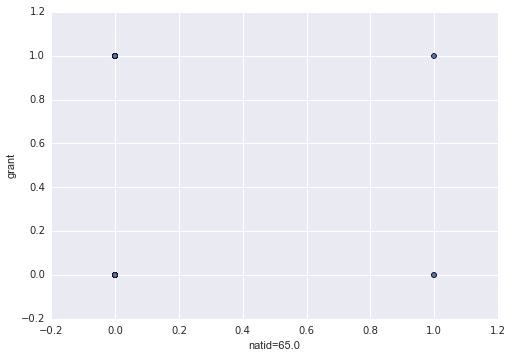

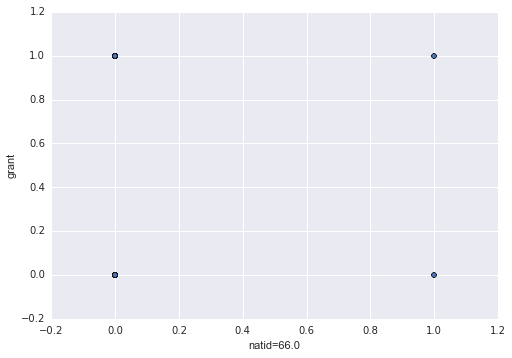

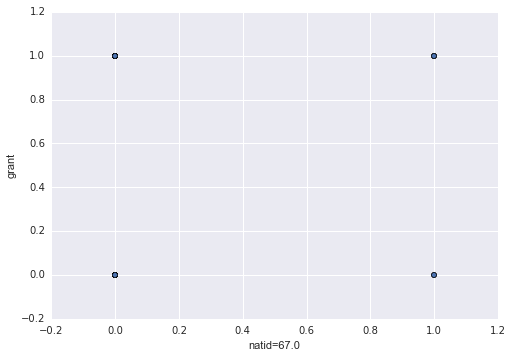

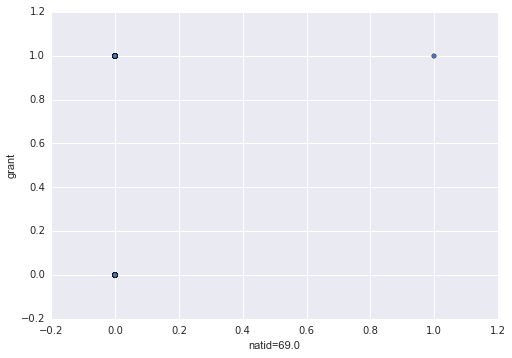

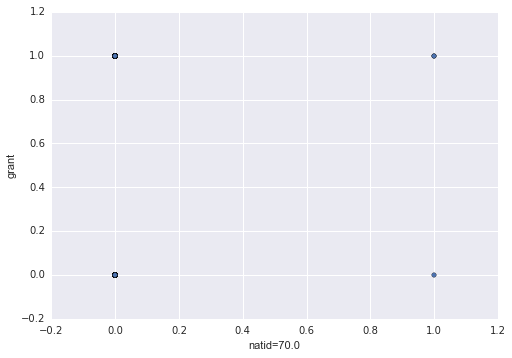

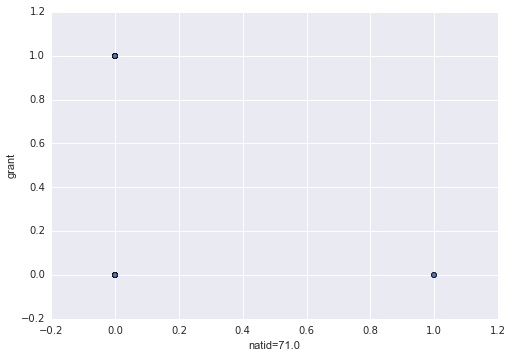

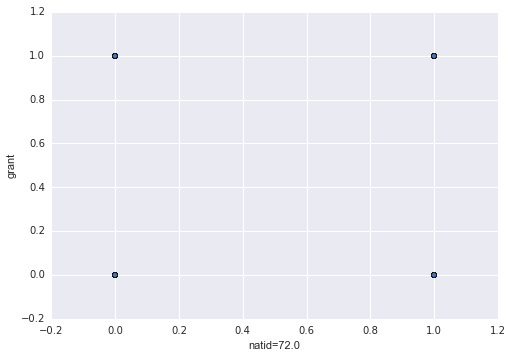

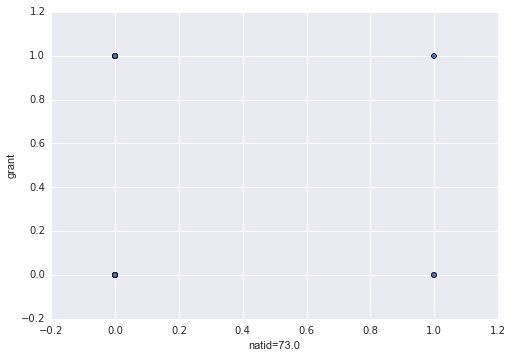

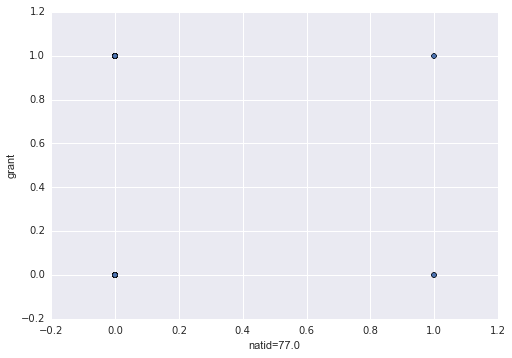

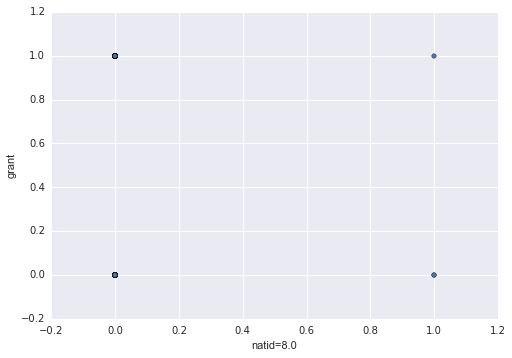

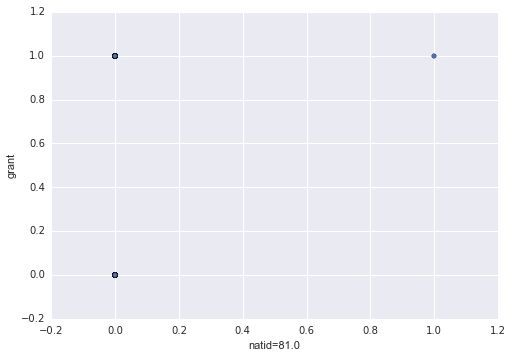

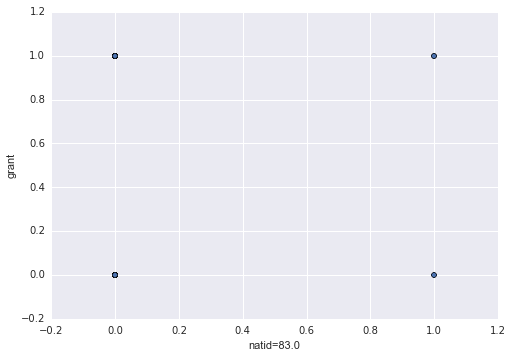

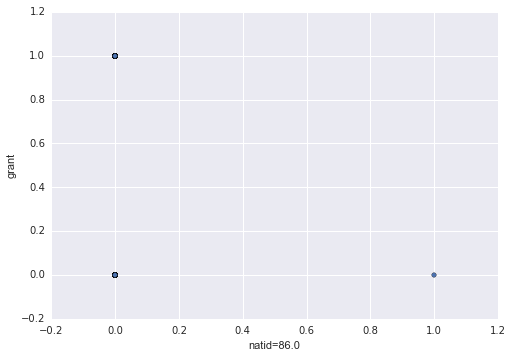

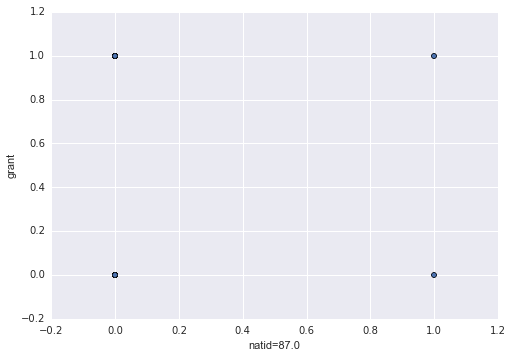

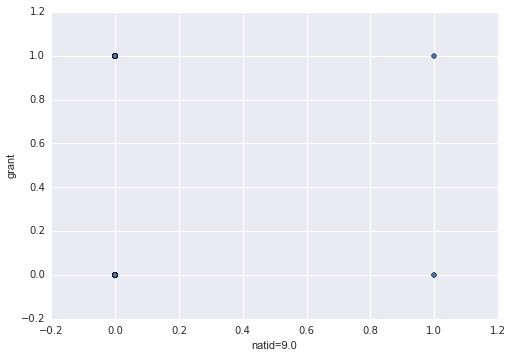

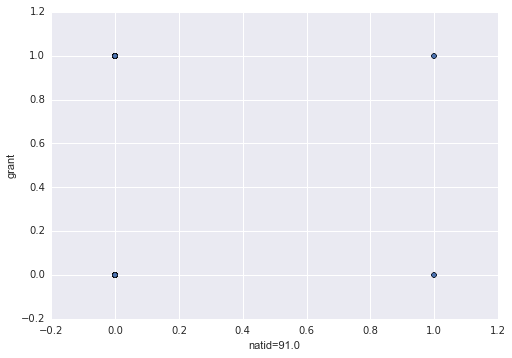

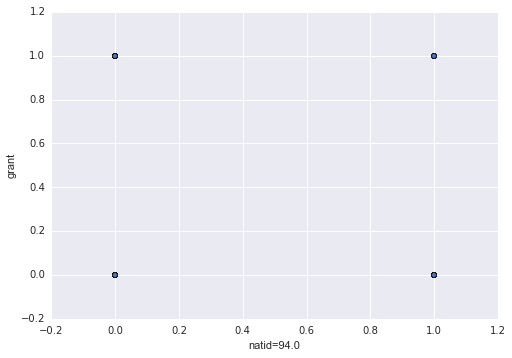

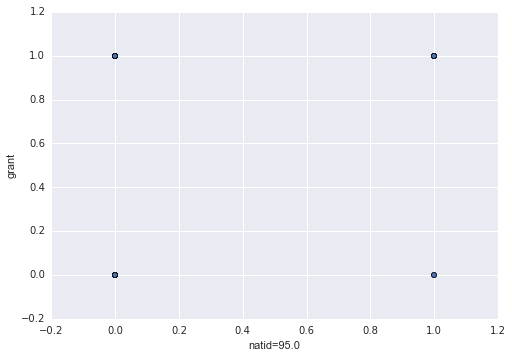

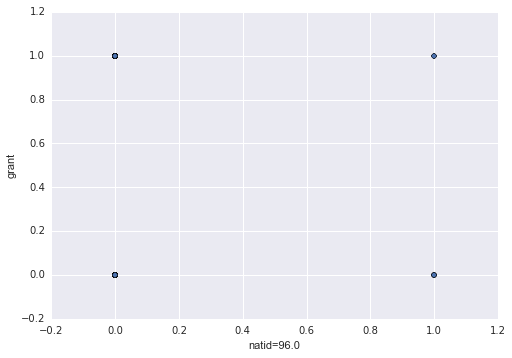

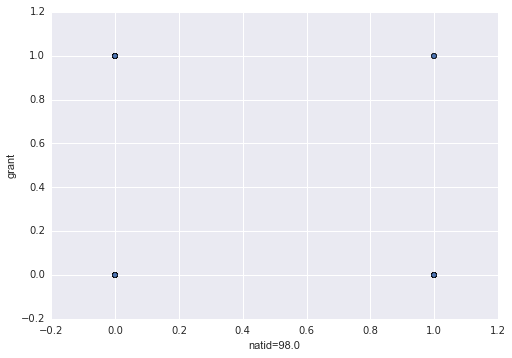

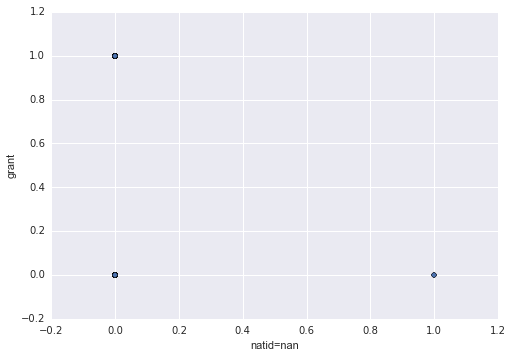

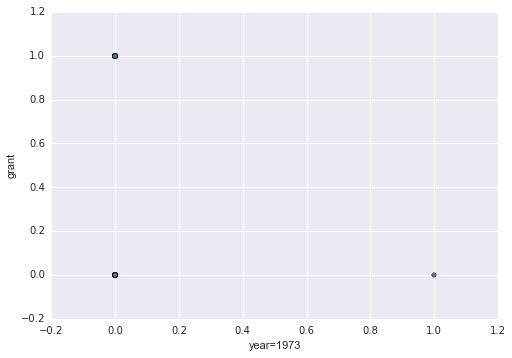

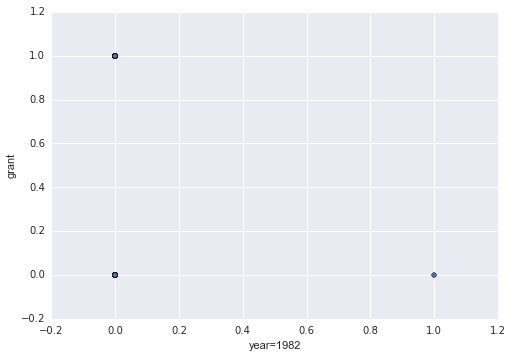

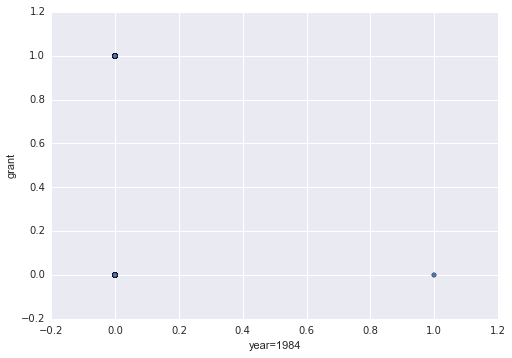

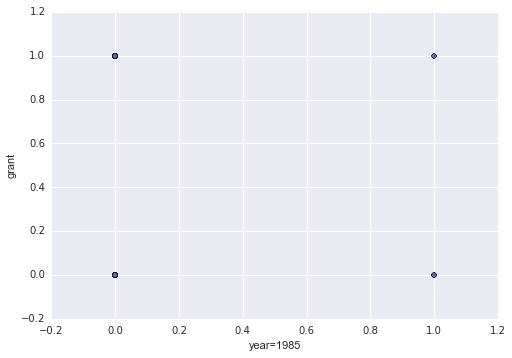

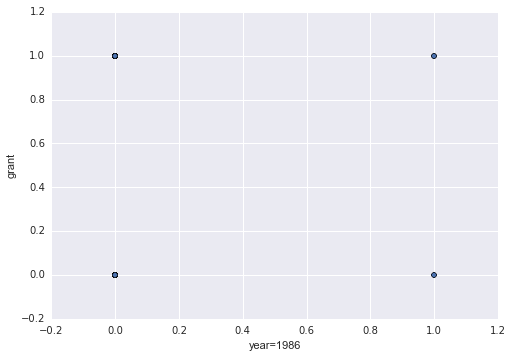

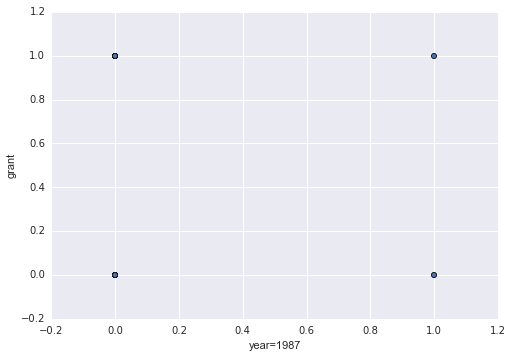

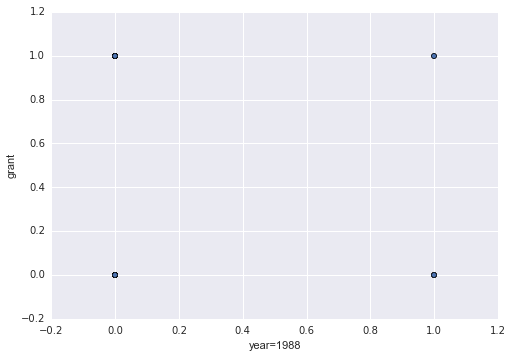

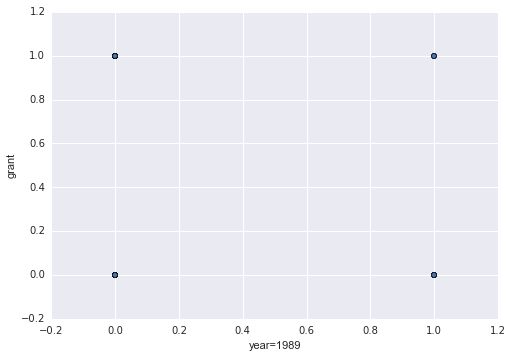

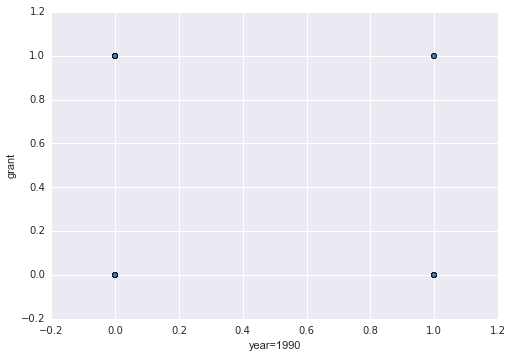

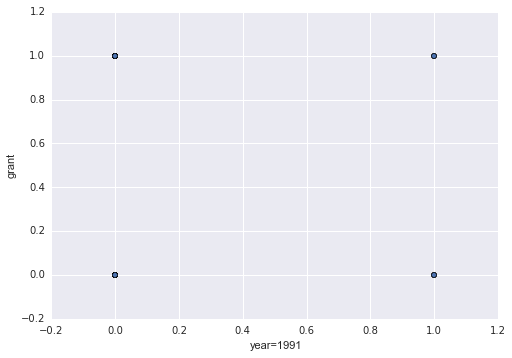

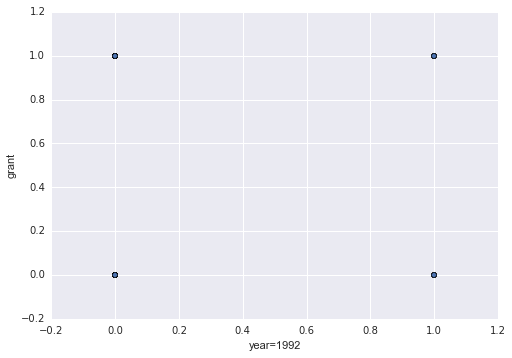

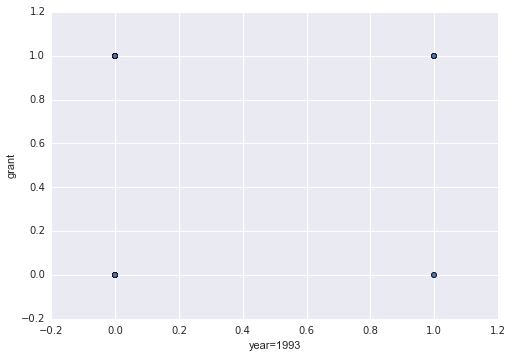

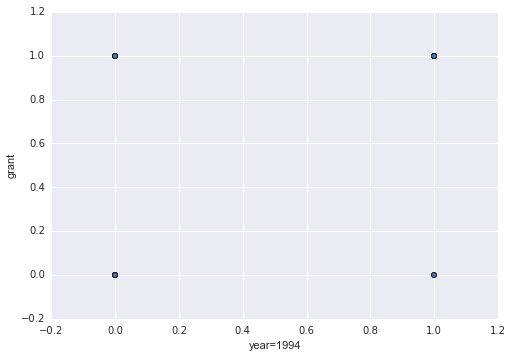

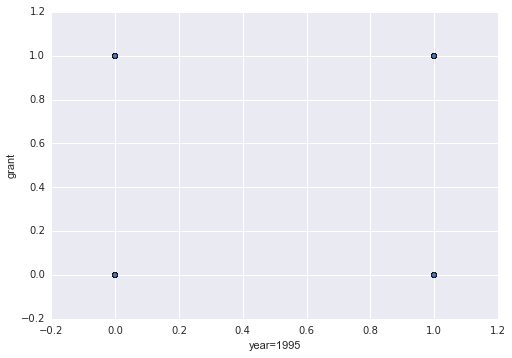

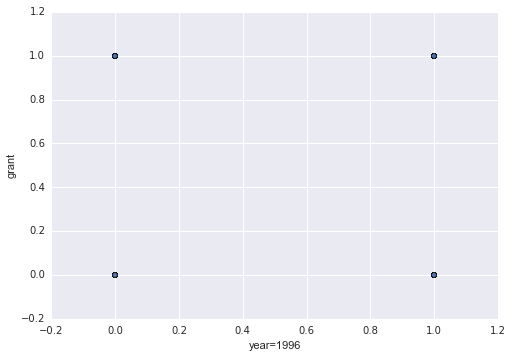

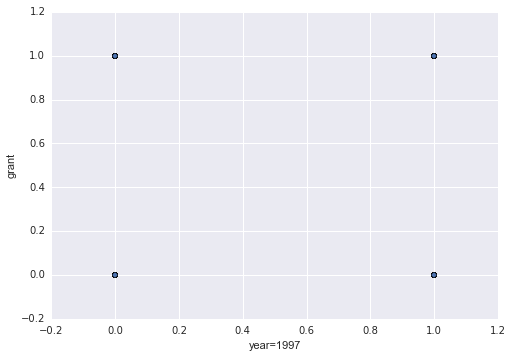

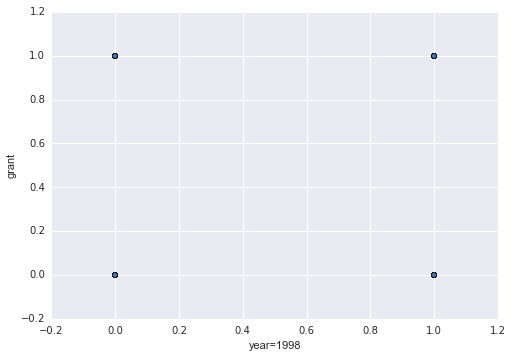

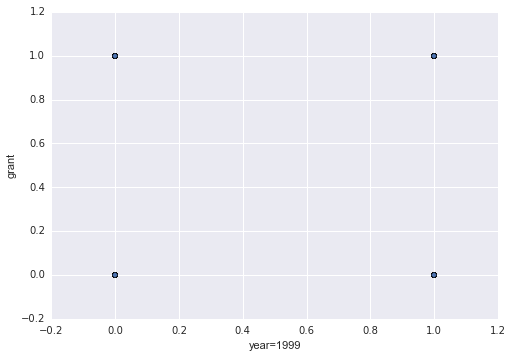

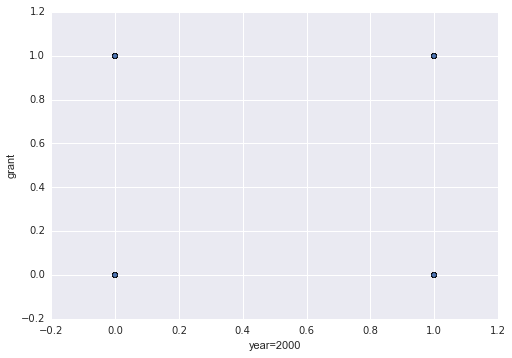

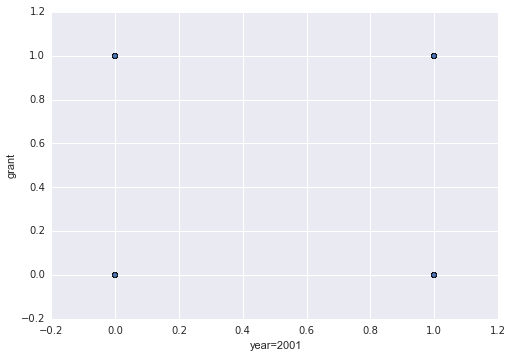

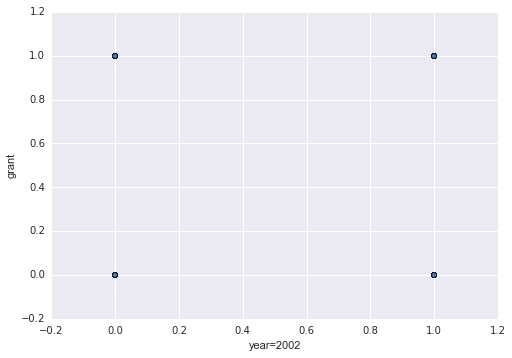

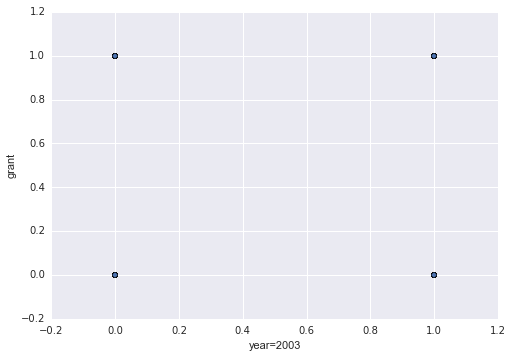

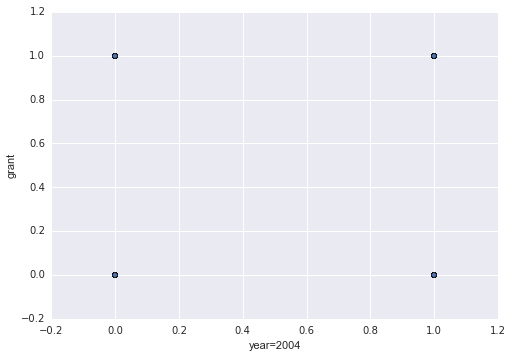

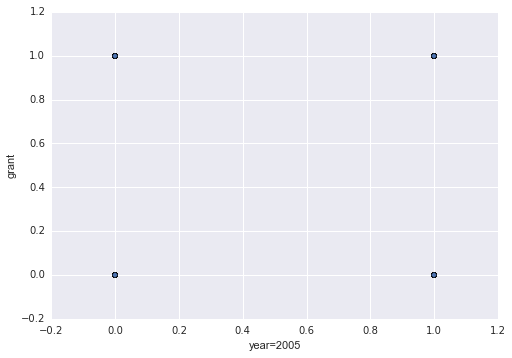

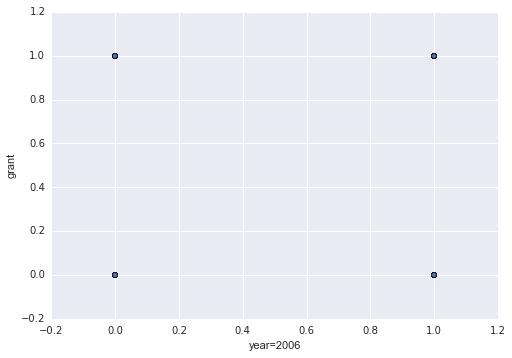

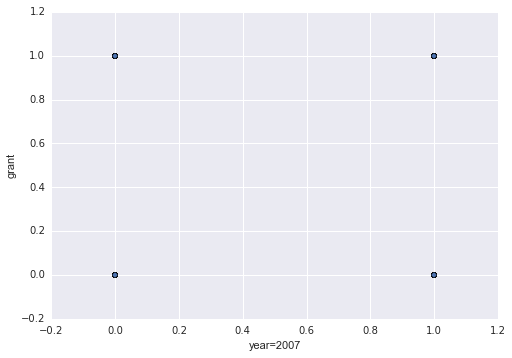

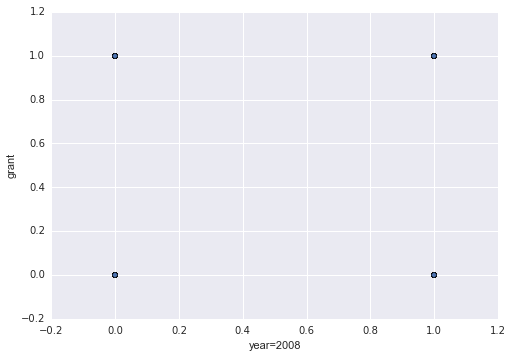

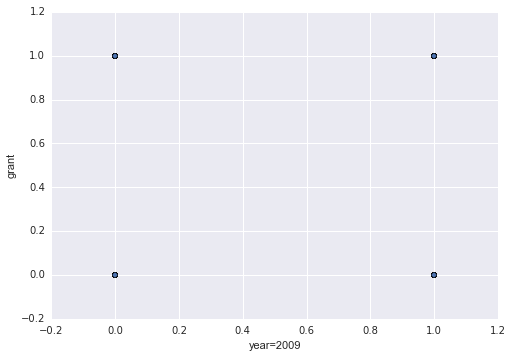

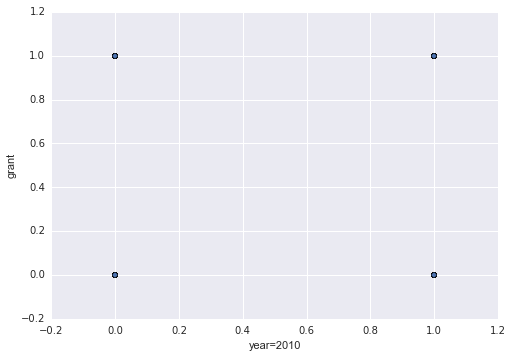

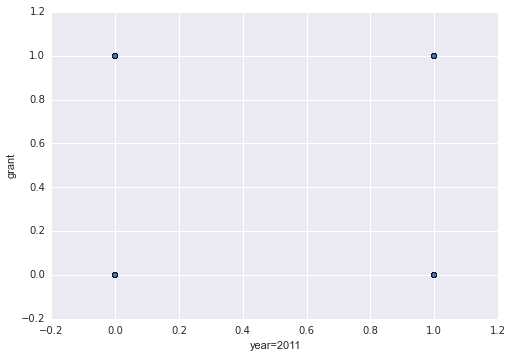

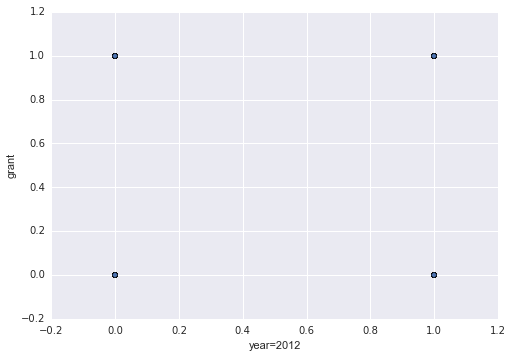

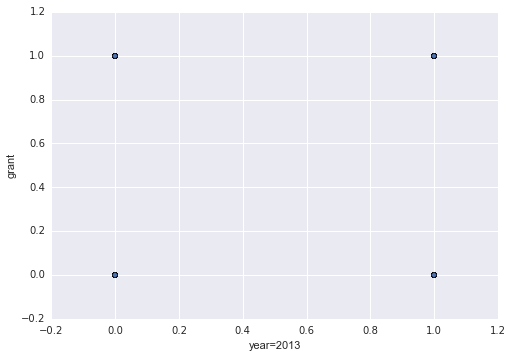

In [39]:
for i in range(601,800):
    df_plot = df_prof[['grant',dummy_columns[i]]]
    df_plot.plot(kind='scatter', x=dummy_columns[i], y='grant')

In [1]:
# all feature dataset weight > 5, logistics l1
All_features_test = ['meangrantraw_judgenatdef','judgemeannatdefyear','meangrant_judgenatdef','meangrantraw_judgenat']

In [42]:
def show_distribution(df,column):
    df_plot = df[['grant',column]]
    bins = np.linspace(0, 1.0, 20)
    df_plot_grant = df_plot[df_plot.grant==1][column]
    df_plot_not_grant = df_plot[df_plot.grant==0][column]
    plt.hist(df_plot_grant.tolist(), bins, alpha=0.5, color='g',label='grant')
    plt.hist(df_plot_not_grant.tolist(), bins, alpha=0.5, color='r',label='not grant')
    plt.legend(loc='upper right')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

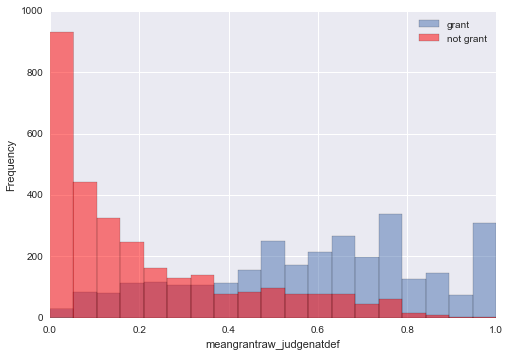

In [35]:
show_distribution(df,All_features_test[0])

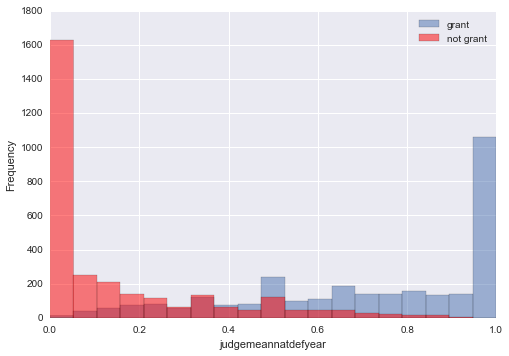

In [36]:
show_distribution(df,All_features_test[1])

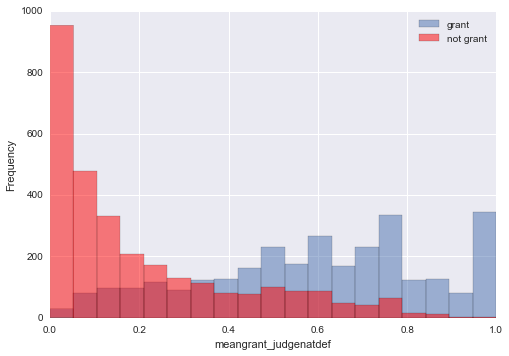

In [37]:
show_distribution(df,All_features_test[2])

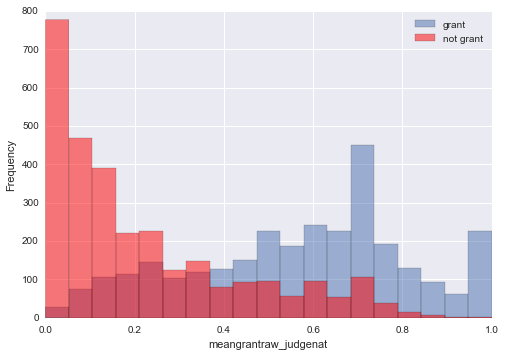

In [38]:
show_distribution(df,All_features_test[3])

In [39]:
Pre_decision_test=['judgemeannatdefyear', 'flag_notfirstproceeding', 'flag_prevprocdeny', 'flag_prevprocgrant']

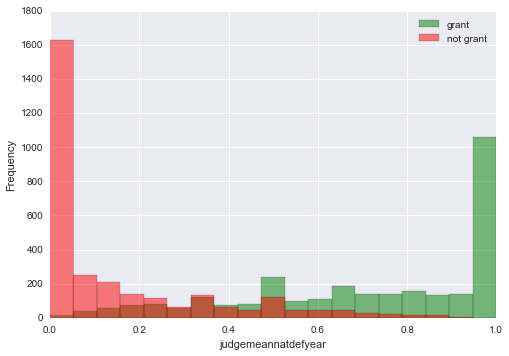

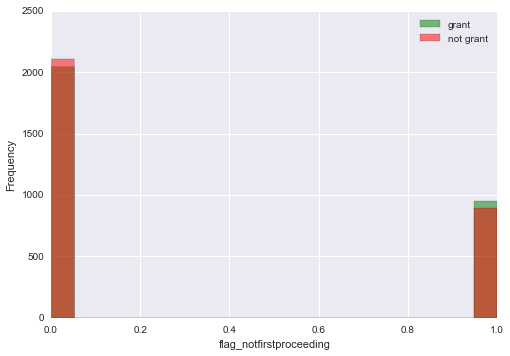

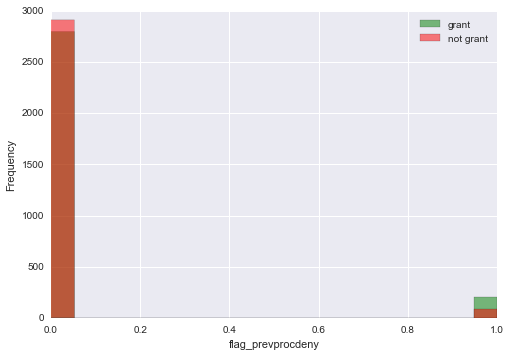

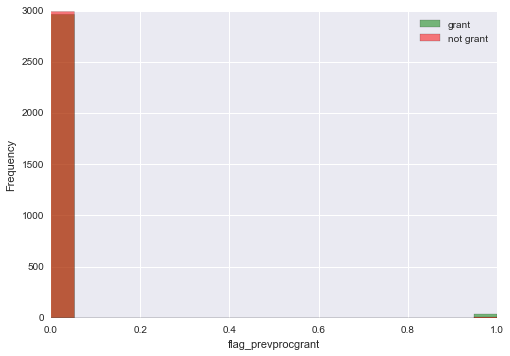

In [44]:
for i in range(len(Pre_decision_test)):
    show_distribution(df,Pre_decision_test[i])

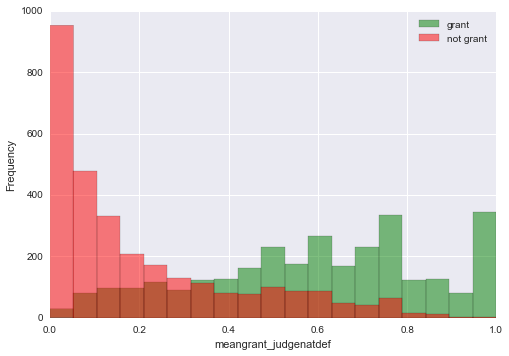

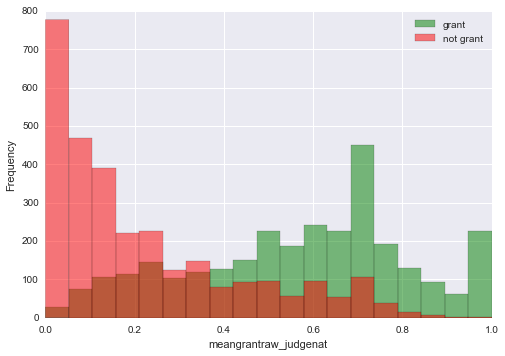

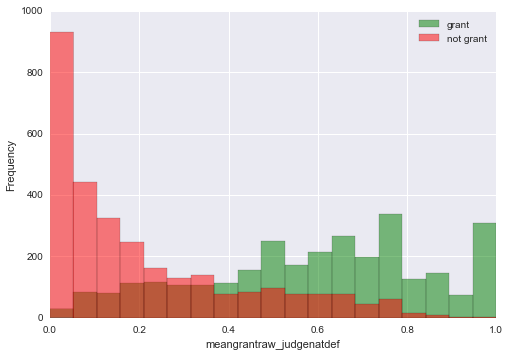

In [47]:
profile_features = ['meangrant_judgenatdef', 'meangrantraw_judgenat', 'meangrantraw_judgenatdef']
for i in range(len(profile_features)):
    show_distribution(df,profile_features[i])

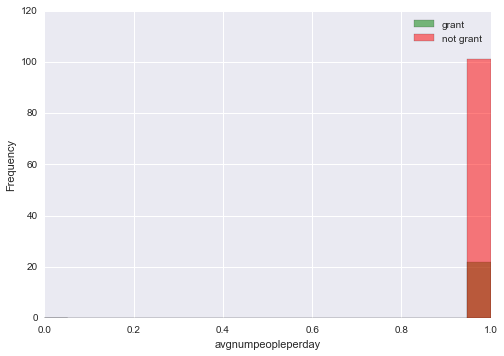

In [50]:
show_distribution(df, u'avgnumpeopleperday')

meangrantraw_judge


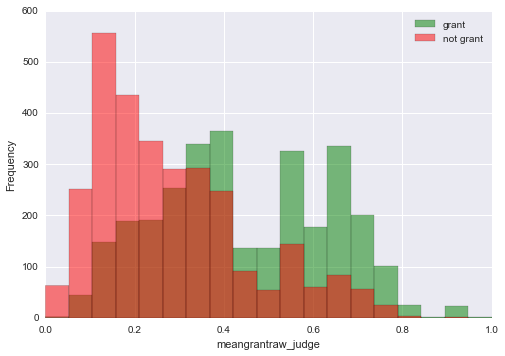

numcases_court_hearing


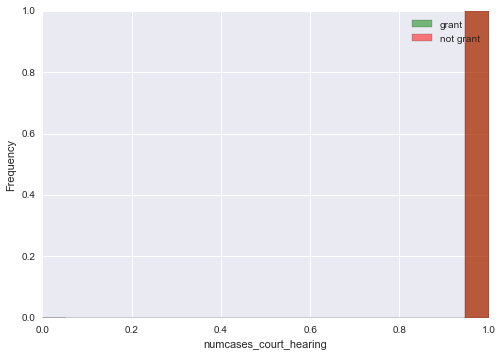

log_private_experience


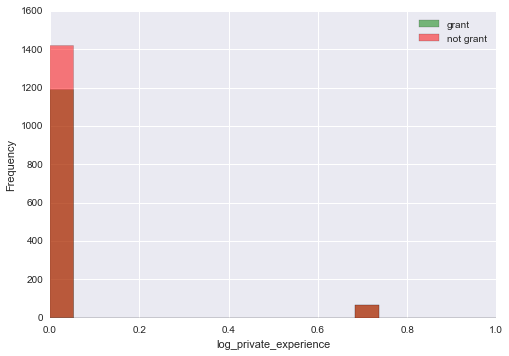

Male_judge


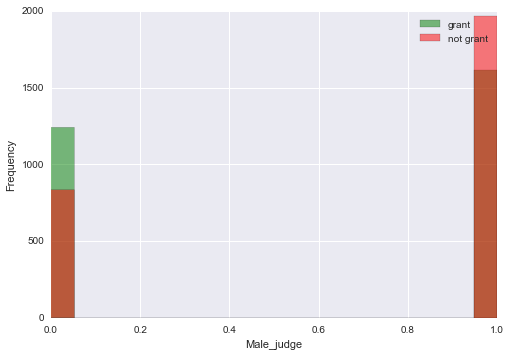

natcourtcode


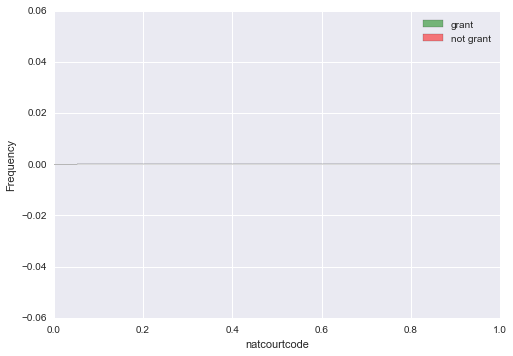

meangrant_judgedef


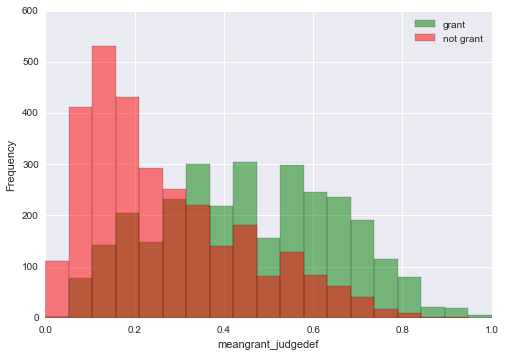

numdecisions_judgenatdef


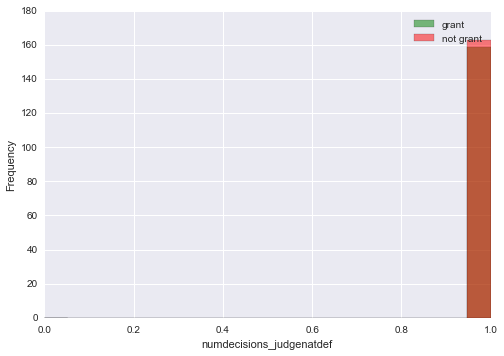

samenat


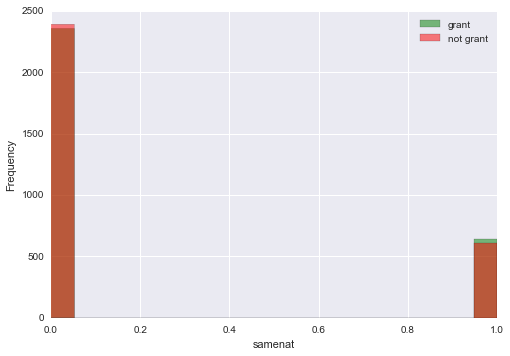

numdecisionsraw_judgelawyer


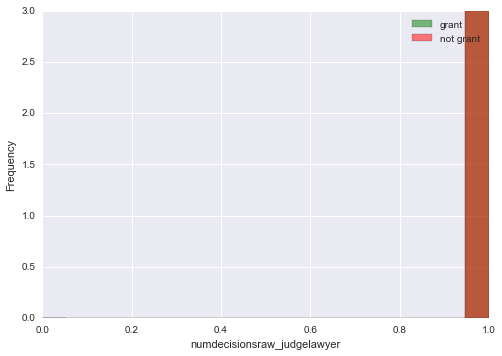

lomeangrantraw_judgenatdef


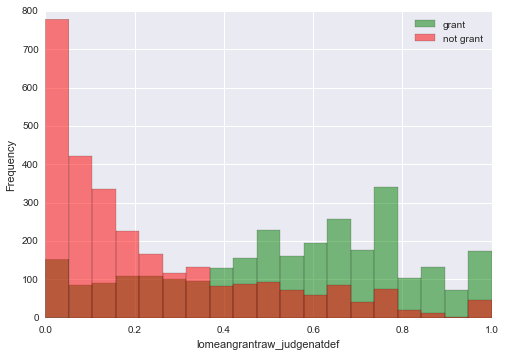

In [71]:
choices = range(len(profile_columns))
np.random.shuffle(choices)
random_column=np.array(profile_columns)[choices[:10]]
for i in range(len(random_column)):
    print random_column[i]
    show_distribution(df,random_column[i])

meangrantraw_judgenat


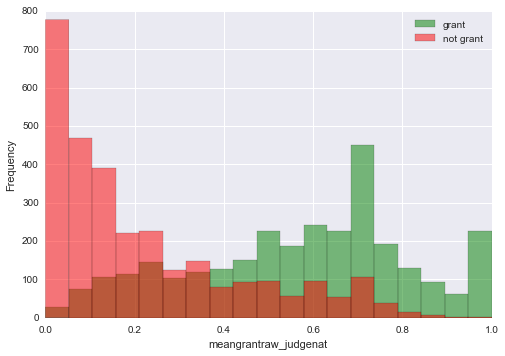

meangrantraw_judgedef


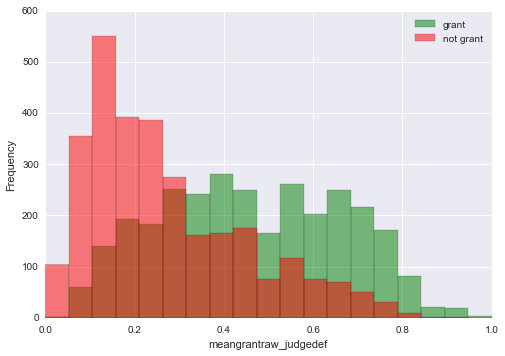

meangrant_judgedef


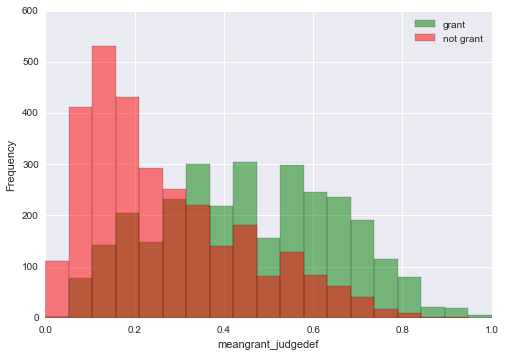

meangrantraw_judgenatdef


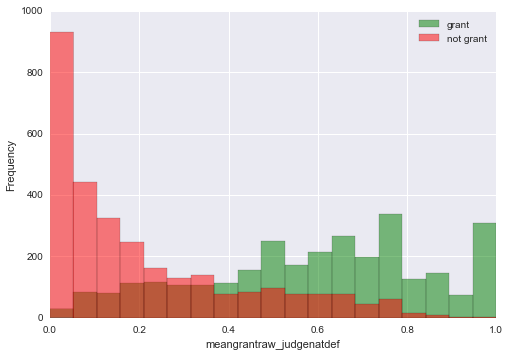

meangrant_judgelawyer


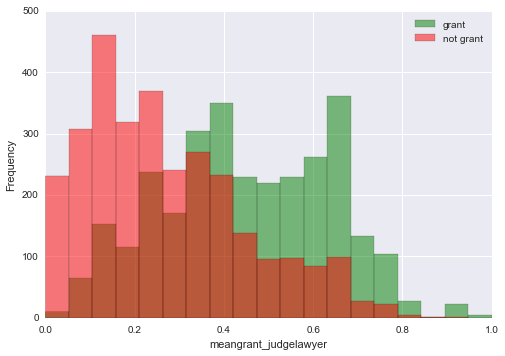

meangrant_judgenatdef


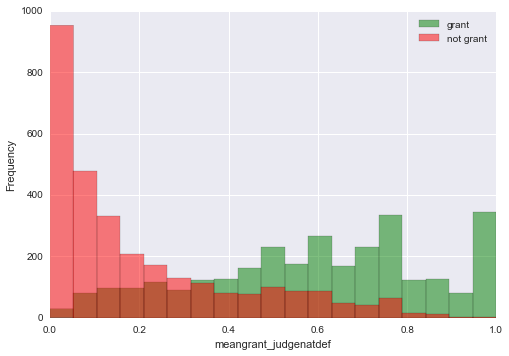

In [72]:
prof_without_dummy_test = ['meangrantraw_judgenat', 'meangrantraw_judgedef', 'meangrant_judgedef',
                           'meangrantraw_judgenatdef', 'meangrant_judgelawyer', 'meangrant_judgenatdef']
for i in range(len(prof_without_dummy_test)):
    print prof_without_dummy_test[i]
    show_distribution(df,prof_without_dummy_test[i])